In [46]:
import pandas as pd

pd.set_option('display.max_rows', None)

In [9]:
path = 'C:\\Users\\leonardo.arrighi\\Documents\\FHG\\R\\results\\metrics\\test\\iris_l5_pv0.0_t2_node_metrics_(crit0).csv'

In [10]:
df = pd.read_csv(path)

In [11]:
df = df.drop(['Node'], axis=1)

In [12]:
df.head()

,Unnamed: 0,Degree,Closeness,Degree nodes,Degree centrality,In degree nodes,In degree centrality,Out degree nodes,Out degree centrality,Bottleneck centrality,Eigenvector centrality,Betweness centrality,Local reaching centrality,Constraint,Label
0,0,2,0.072727,2,0.045455,1,0.022727,1,0.022727,1.000000,0.096166,0.000000,0.033652,0.500000,petal width (cm) <= 1.35
1,1,13,0.430976,13,0.295455,13,0.295455,0,0.000000,0.000000,0.806029,0.000000,0.000000,NaN,Class 1
2,2,5,0.081169,5,0.113636,2,0.045455,3,0.068182,0.666667,0.021615,0.027484,0.083155,0.223366,petal length (cm) > 4.95
3,3,5,0.091450,5,0.113636,2,0.045455,3,0.068182,0.666667,0.002661,0.012685,0.125098,0.395078,petal length (cm) <= 5.05
4,4,5,0.091450,5,0.113636,2,0.045455,3,0.068182,0.666667,0.005321,0.019027,0.111929,0.394233,petal length (cm) > 5.05


In [13]:
df[['Label','Betweness centrality']].sort_values(by=['Betweness centrality'], ascending=False)

,Label,Betweness centrality
10,petal length (cm) > 4.85,0.053383
11,petal length (cm) <= 4.85,0.035941
17,petal width (cm) > 1.55,0.034355
22,sepal length (cm) <= 6.05,0.032241
2,petal length (cm) > 4.95,0.027484
20,petal length (cm) > 4.65,0.022199
7,petal width (cm) <= 1.75,0.021670
18,petal width (cm) <= 1.55,0.020613
41,petal width (cm) > 1.35,0.020085
4,petal length (cm) > 5.05,0.019027


In [40]:
import math
import re

In [42]:
Predecessors = {'Class 0': ['petal width (cm) <= 1.65', 'petal length (cm) <= 2.5', 'petal length (cm) <= 2.45', 'petal width (cm) <= 0.8'], 'Class 1': ['petal width (cm) <= 1.35', 'petal length (cm) > 4.95', 'petal length (cm) <= 4.95', 'petal length (cm) <= 5.05', 'petal length (cm) <= 5.2', 'sepal width (cm) <= 2.9', 'petal length (cm) > 2.45', 'petal length (cm) > 4.65', 'petal length (cm) > 4.85', 'petal width (cm) <= 1.65', 'petal width (cm) <= 1.7', 'petal width (cm) > 1.65', 'sepal length (cm) > 5.75', 'petal length (cm) <= 4.45', 'sepal width (cm) > 2.9', 'sepal length (cm) <= 6.05', 'petal length (cm) <= 4.85', 'sepal length (cm) <= 5.75', 'petal length (cm) > 5.05', 'petal width (cm) > 1.55', 'petal width (cm) <= 1.55', 'petal width (cm) <= 1.75', 'petal length (cm) > 4.45', 'sepal width (cm) > 2.75', 'sepal width (cm) <= 2.75', 'petal width (cm) > 0.8', 'petal width (cm) > 1.35', 'petal length (cm) <= 5.35', 'sepal width (cm) > 3.1', 'sepal length (cm) > 5.25', 'petal width (cm) > 1.75', 'petal length (cm) > 2.5'], 'Class 2': ['petal length (cm) > 4.95', 'petal length (cm) <= 5.05', 'petal length (cm) <= 5.2', 'sepal width (cm) <= 2.9', 'petal length (cm) > 2.45', 'petal length (cm) > 4.65', 'petal length (cm) > 4.85', 'petal width (cm) <= 1.65', 'petal width (cm) <= 1.7', 'petal width (cm) > 1.65', 'sepal length (cm) > 5.75', 'sepal length (cm) > 6.05', 'petal width (cm) > 1.7', 'petal length (cm) > 5.2', 'petal length (cm) > 5.35', 'sepal length (cm) <= 6.05', 'petal length (cm) <= 4.85', 'sepal length (cm) <= 5.75', 'petal length (cm) > 5.05', 'petal width (cm) > 1.55', 'petal width (cm) <= 1.55', 'petal width (cm) <= 1.75', 'petal length (cm) > 4.45', 'sepal width (cm) > 2.75', 'petal length (cm) <= 4.65', 'sepal width (cm) <= 2.75', 'petal width (cm) > 0.8', 'sepal width (cm) <= 3.1', 'petal width (cm) > 1.35', 'sepal length (cm) <= 5.25', 'petal length (cm) <= 5.35', 'petal width (cm) > 1.75', 'petal length (cm) > 2.5']}

In [43]:
def calculate_boundaries(dict):
    # script for decide boundaries of every feature of every class
    boundaries_class = {}
    for key, value in dict.items():
        if ('Class' in key):

            boundaries_class[key] = []
            
            key_set = []
            for i in dict[key]:
                key_set.append(str(re.split(' <= | > ', i)[0]))
            key_set = set(key_set)
            
            for valore_unico in key_set:
                match_list = [math.inf, -math.inf]
                for nodo in dict[key]:
                    if str(re.split(' <= | > ', nodo)[0]) == valore_unico:
                        if '>' in nodo:
                            if float(re.split(' > ', nodo)[1]) < match_list[0]:
                                match_list[0] = float(re.split(' > ', nodo)[1])
                        else:
                            if float(re.split(' <= ', nodo)[1]) > match_list[1]:
                                match_list[1] = float(re.split(' <= ', nodo)[1])

                # save as string the boundaries
                alfa = None
                if match_list[0] == math.inf:
                    alfa = str(valore_unico + " <= " + str(match_list[1]))
                elif match_list[1] == -math.inf:
                    alfa = str(valore_unico + " > " + str(match_list[0]))
                else:
                    alfa = str(str(match_list[0]) + ' < ' + valore_unico + ' <= ' + str(match_list[1]))
                boundaries_class[key].append(alfa)
    return boundaries_class

In [44]:
calculate_boundaries(Predecessors)

{'Class 0': ['petal width (cm) <= 1.65', 'petal length (cm) <= 2.5'],
 'Class 1': ['0.8 < petal width (cm) <= 1.75',
  '5.25 < sepal length (cm) <= 6.05',
  '2.45 < petal length (cm) <= 5.35',
  '2.75 < sepal width (cm) <= 2.9'],
 'Class 2': ['2.45 < petal length (cm) <= 5.35',
  '5.75 < sepal length (cm) <= 6.05',
  '2.75 < sepal width (cm) <= 3.1',
  '0.8 < petal width (cm) <= 1.75']}

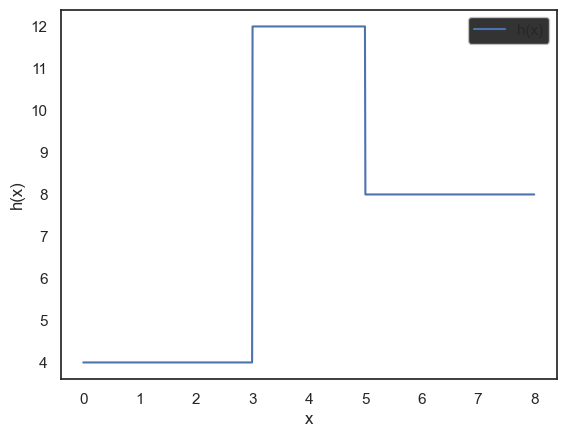

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 4 if x < 5 else 0

def g(x):
    return 8 if x > 3 else 0

def h(x):
    return f(x) + g(x)

# Creare un array di valori x
x_values = np.linspace(0, 8, 1000)

# Calcolare i valori di h(x) per ogni x
h_values = np.vectorize(h)(x_values)

# Disegnare il grafico
plt.plot(x_values, h_values, label='h(x)')

# Aggiungere etichette e legenda
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()

# Mostrare il grafico
plt.show()

In [47]:
path2 = 'C:\\Users\\leonardo.arrighi\\Documents\\FHG\\R\\results\\metrics\\test\\dt_16feat_1ksample_4class_csv_l100_pv0_0_t2_fhg_metrics_crit0.txt'

In [48]:
aa = [{'F14 <= 6.21', 'F10 > -2.25', 'F15 > -2.54', 'F11 <= 1.41', 'F5 <= 0.52', 'F3 > 2.46', 'F6 <= 1.92', 'F8 > -0.02', 'F9 > 2.59', 'F7 > 0.58', 'F1 > -1.61', 'F5 <= 1.48', 'F15 > 1.99', 'F4 <= 0.04', 'F13 > 2.91', 'F2 <= -0.0', 'F12 <= -0.94', 'F11 > 0.77', 'F6 > 0.08', 'F14 > 2.06', 'F11 > -0.59', 'F6 <= 1.15', 'F13 > 1.1', 'F3 > -3.14', 'F5 <= 0.43', 'F16 > -1.55', 'F15 > -0.98', 'F11 > 0.36', 'F9 <= -1.48', 'F16 <= 2.91', 'F14 <= 1.57', 'F7 <= 1.53', 'F16 <= -0.74', 'F8 <= -0.42', 'F1 <= 0.38', 'F15 <= 2.85', 'F1 <= 1.35', 'F14 <= 6.68', 'F4 > -1.02', 'F11 > -1.66', 'F13 > -0.14', 'F4 > -0.6', 'F12 <= 0.0', 'F16 <= 2.05', 'F15 <= 2.21', 'F8 <= -0.11', 'F13 > -1.44', 'F1 > 2.24', 'F4 <= -0.34', 'F1 > 3.03', 'F5 <= 1.1', 'F13 <= 0.76', 'F9 <= 1.11', 'F10 <= 1.03', 'F14 <= 1.18', 'F7 <= 0.26', 'F5 > 0.99', 'F13 > -1.36', 'F2 <= 0.82', 'F13 > -2.21', 'F3 <= -0.11', 'F9 <= -1.84', 'F14 > -2.87', 'F12 <= -1.23', 'F15 > -2.44', 'F15 > 0.23', 'F3 <= -1.84', 'F9 <= 0.44', 'F12 > 0.06', 'F6 <= 0.87', 'F5 > 0.35', 'F14 <= -3.26', 'F6 <= 0.21', 'F7 > -1.14', 'F9 > -0.03', 'F11 > -1.65', 'F4 > -3.15', 'F10 > -0.01', 'F15 <= -1.13', 'F15 > 0.78', 'F3 <= -0.56', 'F2 > -1.29', 'F14 > 3.71', 'F7 <= 0.76', 'F11 <= -1.28', 'F14 <= 2.89', 'F8 <= -1.29', 'F4 > 0.19', 'F6 <= 2.16', 'F8 > 0.32', 'F4 > -0.56', 'F1 > 0.89', 'F7 <= 0.35', 'F9 <= -0.59', 'F1 > -1.99', 'F4 > -1.11', 'F15 <= 1.56', 'F15 > -0.19', 'F12 > -0.52', 'F5 <= 1.39', 'F14 <= 1.78', 'F8 <= -0.92', 'F16 > -1.17', 'F16 > -0.71', 'F8 > -1.21', 'F3 > -0.49', 'F4 > 1.04', 'F3 <= 0.07', 'F8 <= -2.09', 'F8 <= 0.51', 'F14 <= -0.27', 'F1 <= 2.74', 'F14 > 0.24', 'F10 > -1.77', 'F3 <= -0.61', 'F12 <= 0.91', 'F13 > 2.6', 'F6 <= 1.48', 'F13 <= 0.41', 'F14 <= 0.62', 'F1 > -2.29', 'F13 > -0.92', 'F9 <= 0.88', 'F3 > 0.76', 'F1 > -0.9', 'F13 <= 2.2', 'F13 > -2.96', 'F7 <= -0.31', 'F11 <= 0.07', 'F12 > -0.69', 'F12 > 1.19', 'F13 <= 0.43', 'F13 <= 1.88', 'F2 > 1.29', 'F7 > -0.9', 'F16 <= 3.43', 'F8 <= 1.06', 'F11 > -0.53', 'F3 <= 2.46', 'F13 > -0.9', 'F1 <= -0.44', 'F3 > -1.68', 'F11 > -2.29', 'F9 > 0.7', 'F12 <= 0.93', 'F1 <= -0.41', 'F16 > 1.59', 'F7 > -0.52', 'F6 <= 2.06', 'F3 <= -0.85', 'F6 <= -0.04', 'F9 > -0.31', 'F4 > -2.02', 'F4 > 1.69', 'F10 <= 2.01', 'F11 > -0.91', 'F13 > -2.5', 'F6 > 1.3', 'F8 <= -0.71', 'F8 > -3.34', 'F6 <= 0.61', 'F11 <= 2.11', 'F14 <= 3.31', 'F6 <= 0.62', 'F4 <= 1.67', 'F5 <= -0.81', 'F10 <= -0.0', 'F13 <= -1.69', 'F7 > -0.12', 'F8 > -1.25', 'F9 <= -0.73', 'F1 > 4.83', 'F6 <= -0.68', 'F14 <= -3.49', 'F14 > 1.19', 'F8 > 0.4', 'F1 <= 1.9', 'F15 > -0.72', 'F13 <= 1.12', 'F8 <= 2.85', 'F13 <= 1.3', 'F14 <= 4.13', 'F12 > -0.97', 'F4 <= 1.33', 'F12 > 0.23', 'F2 > -0.47', 'F1 <= 4.54', 'F4 > -2.55', 'F14 > 0.33', 'F13 <= 0.07', 'F5 <= -1.28', 'F4 > -1.5', 'F5 > -1.68', 'F12 > -1.02', 'F14 <= 0.02', 'F14 <= 3.03', 'F13 <= 0.9', 'F11 <= -1.35', 'F1 > -0.17', 'F6 <= 0.95', 'F10 > 2.61', 'F11 <= -0.0', 'F7 <= 1.25', 'F3 > 0.58', 'F1 > -1.71', 'F16 <= 3.15', 'F9 <= 0.06', 'F11 <= -1.08', 'F16 > -0.91', 'F5 > 0.01', 'F8 > 0.78', 'F8 > -1.69', 'F3 > -1.75', 'F6 <= 1.8', 'F10 > -2.16', 'F8 <= 1.17', 'F10 > -0.84', 'F15 <= 0.49', 'F2 <= -0.31', 'F3 > -0.64', 'F12 <= 0.65', 'F14 <= -0.77', 'F7 > -0.6', 'F8 <= -0.38', 'F2 <= -0.01', 'F8 <= 0.31', 'F8 > -0.39', 'F14 > -1.94', 'F14 <= 1.04', 'F11 <= 0.36', 'F13 > -1.32', 'F6 <= -1.09', 'F2 > 0.59', 'F1 > 0.93', 'F11 <= 0.35', 'F5 > -1.13', 'F14 <= 1.2', 'F13 <= 2.13', 'F11 <= -0.48', 'F1 <= -0.97', 'F10 <= -1.58', 'F13 > 2.24', 'F13 > 1.05', 'F13 <= -0.76', 'F4 > 1.07', 'F10 > -3.23', 'F6 > 1.51', 'F1 <= -4.12', 'F13 <= -1.22', 'F12 <= 1.0', 'F12 <= -2.21', 'F7 <= -0.2', 'F6 <= 1.17', 'F7 <= -0.63', 'F3 > -0.06', 'F4 <= -0.85', 'F16 <= -0.24', 'F12 <= 0.35', 'F15 > -1.49', 'F5 <= -0.9', 'F2 <= 0.9', 'F3 <= 1.09', 'F10 > 1.81', 'F5 > 1.15', 'F8 <= -2.72', 'F16 <= -1.44', 'F15 > -2.21', 'F6 <= -0.19', 'F12 <= 1.66', 'F7 > 1.47', 'F3 <= 1.89', 'F14 <= -2.02', 'F15 > -0.77', 'F15 > -1.39', 'F16 > 1.12', 'F12 <= 1.99', 'F2 > -1.84', 'F13 > 3.14', 'F5 > -1.77', 'F1 > -1.77', 'F3 <= 1.29', 'F15 <= -2.37', 'F16 > 0.13', 'F4 <= 2.54', 'F13 <= 1.69', 'F6 <= 1.89', 'F11 <= 1.79', 'F15 > 1.28', 'F2 <= 0.26', 'F13 <= -2.45', 'F16 <= 1.1', 'F12 <= 1.51', 'F7 > 1.07', 'F7 > -1.4', 'F10 > -1.01', 'F14 > -1.81', 'F14 <= 1.8', 'F8 <= -0.03', 'F14 <= 0.23', 'F1 > -1.23', 'F8 > -0.63', 'F8 <= -1.43', 'F8 <= 1.81', 'F3 <= -0.17', 'F4 <= -1.93', 'F4 > -0.34', 'F13 <= 2.52', 'F15 <= 0.8', 'F12 <= 1.67', 'F12 <= 0.03', 'F3 > -0.55', 'F15 <= -1.72', 'F12 <= -1.67', 'F9 > -1.16', 'F10 <= -2.26', 'F6 > -1.02', 'F14 <= -1.34', 'F4 <= 2.2', 'F11 > -1.28', 'F1 > -1.17', 'F8 <= 1.88', 'F3 <= -3.21', 'F2 <= -1.76', 'F12 > -0.53', 'F16 <= 1.88', 'F3 > 2.39', 'F2 > 0.35', 'F15 > 2.14', 'F13 > -0.66', 'F8 <= -0.13', 'F6 <= -0.02', 'F16 > -0.12', 'F13 <= 0.48', 'F11 <= -0.99', 'F16 > -1.49', 'F3 > 2.17', 'F5 <= -0.52', 'F8 <= -1.02', 'F1 <= -0.52', 'F16 > 1.62', 'F4 <= 0.34', 'F1 > 2.11', 'F1 <= 2.07', 'F3 > -1.21', 'F16 <= -1.15', 'F4 <= 1.91', 'F2 > -0.34', 'F8 <= 0.06', 'F15 > -3.59', 'F9 <= -0.06', 'F1 <= 3.21', 'F14 > -0.27', 'F3 > -1.45', 'F13 <= 2.12', 'F15 <= 0.88', 'F14 > 1.8', 'F2 > 0.46', 'F13 > -2.14', 'F2 > 0.49', 'F15 <= 3.06', 'F10 <= 1.09', 'F13 <= -0.18', 'F5 <= 0.28', 'F5 > -0.63', 'F14 > 0.05', 'F16 > 0.59', 'F8 <= -0.12', 'F13 <= 1.0', 'F6 > 0.89', 'F5 <= 1.23', 'F13 > 2.63', 'F6 <= 0.24', 'F11 > -0.03', 'F8 <= -0.2', 'F15 > -0.28', 'F12 <= -0.69', 'F13 <= -1.07', 'F5 <= 0.4', 'F16 > 1.26', 'F11 <= -0.68', 'F9 <= 0.77', 'F10 <= -0.52', 'F8 > 0.3', 'F16 <= 0.75', 'F16 > 1.58', 'F6 <= -0.54', 'F4 <= 1.1', 'F4 <= 0.98', 'F13 > 0.73', 'F10 > -3.68', 'F12 <= -1.32', 'F6 > -0.07', 'F1 <= 2.82', 'F14 > -2.57', 'F13 > 0.54', 'F11 > -0.14', 'F9 > -0.59', 'F8 <= -2.35', 'F14 > 1.46', 'F2 <= 0.27', 'F14 > -1.69', 'F3 <= 1.17', 'F4 > 0.83', 'F9 <= 1.12', 'F16 <= -2.97', 'F3 > -0.87', 'F7 <= 0.43', 'F5 > -2.35', 'F13 > 1.57', 'F6 > 0.18', 'F1 > -2.04', 'F11 <= 0.05', 'F13 > -2.65', 'F7 > 0.04', 'F16 > -0.75', 'F1 <= 1.37', 'F1 > -2.31', 'F4 > -0.01', 'F16 > -2.11', 'F7 <= -1.26', 'F10 <= 0.32', 'F4 <= -0.03', 'F3 > 0.92', 'F6 > 0.44', 'F13 > 1.0', 'F16 > 1.19', 'F8 > 0.7', 'F10 <= -1.26', 'F3 > -0.24', 'F4 > 2.12', 'F10 > -0.27', 'F1 <= -1.68', 'F6 > -0.48', 'F15 <= 4.04', 'F7 > -0.94', 'F1 <= -1.06', 'F15 <= 2.54', 'F3 <= 0.19', 'F5 <= -0.4', 'F8 <= 1.48', 'F8 <= -0.01', 'F1 > -2.02', 'F13 > 2.15', 'F4 > -0.71', 'F10 > -0.59', 'F14 > -4.52', 'F2 > 1.57', 'F11 > -1.67', 'F10 <= -2.66', 'F8 > -1.31', 'F7 > -0.57', 'F15 <= 1.17', 'F3 <= -0.32', 'F13 > 0.81', 'F2 <= -1.02', 'F16 > 2.79', 'F3 <= 0.93', 'F6 <= -1.49', 'F14 > -1.46', 'F13 > -1.38', 'F6 <= 0.92', 'F14 > -0.3', 'F4 <= -1.53', 'F8 > 1.56', 'F8 > -0.5', 'F3 <= 0.24', 'F10 <= 2.17', 'F6 > -0.46', 'F12 > -1.97', 'F8 > -0.32', 'F3 > 1.73', 'F12 <= 1.38', 'F3 <= 2.26', 'F7 > -2.69', 'F1 <= -1.53', 'F13 <= 0.2', 'F12 > -2.42', 'F12 <= -0.38', 'F13 <= 2.34', 'F5 <= -1.04', 'F11 > 0.06', 'F13 <= -2.8', 'F2 <= -0.82', 'F9 <= 1.17', 'F13 > -1.18', 'F15 <= -1.16', 'F16 <= 0.13', 'F16 > -1.22', 'F2 <= 1.64', 'F12 > -0.5', 'F11 <= 0.8', 'F5 > -0.13', 'F2 <= -1.52', 'F8 > -1.2', 'F15 <= -1.11', 'F13 <= 1.2', 'F9 <= 2.71', 'F12 <= -1.39', 'F2 <= -0.24', 'F12 > -1.44', 'F9 <= 1.61', 'F15 > 0.81', 'F14 <= -1.67', 'F2 <= 1.73', 'F10 > -1.09', 'F5 > -0.84', 'F3 <= -0.45', 'F7 > 1.25', 'F15 <= 0.85', 'F1 > -0.6', 'F10 <= -2.01', 'F9 <= -0.07', 'F13 > -0.96', 'F1 <= 1.57', 'F2 <= -0.05', 'F4 > 0.72', 'F8 > 0.31', 'F8 > 0.77', 'F13 <= 1.8', 'F15 <= 2.94', 'F3 <= -1.65', 'F16 > -0.89', 'F16 > -3.4', 'F1 > -2.79', 'F3 <= -0.1', 'F8 > -1.06', 'F13 <= -1.92', 'F5 > -0.71', 'F9 <= -2.2', 'F8 > 2.22', 'F3 > -0.19', 'F8 > -2.71', 'F4 <= -1.09', 'F7 > -0.82', 'F12 <= 0.21', 'F10 > 2.51', 'F7 <= 0.93', 'F16 > 0.66', 'F10 > -3.02', 'F16 > 1.02', 'F5 <= -0.35', 'F10 > -0.49', 'F4 > -3.18', 'F14 > -3.32', 'F9 > -0.79', 'F10 <= -1.93', 'F16 > -0.58', 'F5 <= -1.86', 'F8 > 0.98', 'F7 > 0.35', 'F4 <= 1.61', 'F14 > -3.08', 'F8 <= -3.51', 'F9 <= 1.68', 'F1 > 0.44', 'F10 > 1.85', 'F4 > -2.31', 'F13 <= -0.9', 'F3 <= 1.15', 'F13 > -0.88', 'F7 <= -0.41', 'F1 <= -1.18', 'F15 <= -0.14', 'F16 <= 2.55', 'F8 <= -3.18', 'F8 > -1.57', 'F3 <= -1.63', 'F3 <= 0.1', 'F6 > -1.12', 'F14 <= -0.18', 'F3 <= 0.83', 'F8 > -2.78', 'F15 <= 1.84', 'F14 > -3.24', 'F10 <= 3.65', 'F16 <= 0.21', 'F9 <= 1.83', 'F8 > -0.59', 'F4 > -2.0', 'F15 > -2.51', 'F7 <= 0.11', 'F9 <= 0.01', 'F15 <= -0.17', 'F1 > 1.12', 'F5 <= 0.8', 'F9 > -1.53', 'F16 <= -0.14', 'F3 <= -2.03', 'F15 > 1.12', 'F10 > 0.18', 'F2 <= 1.32', 'F10 > -1.64', 'F14 > 0.27', 'F13 > -0.04', 'F6 <= 0.26', 'F9 > -1.22', 'F13 <= 0.7', 'F16 > -0.37', 'F1 > -2.9', 'F13 > 2.37', 'F13 > 2.51', 'F12 > 1.29', 'F11 <= -1.13', 'F8 > 0.46', 'F10 <= -0.6', 'F8 <= -1.07', 'F10 > 3.65', 'F14 <= 4.42', 'F3 > -3.18', 'F7 <= 1.64', 'F1 > 0.65', 'F13 > 1.22', 'F4 <= 2.5', 'F7 <= -0.46', 'F5 <= 0.27', 'F12 <= 1.27', 'F3 > -2.43', 'F4 > -1.36', 'F6 > 0.04', 'F11 > -0.54', 'F14 <= 2.77', 'F6 > 0.14', 'F3 > -1.54', 'F12 > -1.31', 'F13 <= -1.49', 'F2 > -1.67', 'F2 <= 1.06', 'F16 > -1.84', 'F13 > -0.83', 'F6 > 1.78', 'F6 <= 0.68', 'F6 <= 1.44', 'F4 > 1.27', 'F3 > -1.62', 'F13 <= -0.63', 'F9 <= 1.1', 'F15 > -0.49', 'F8 <= -3.28', 'F10 <= 0.61', 'F2 <= 1.19', 'F8 <= 0.9', 'F10 <= -0.67', 'F6 > -1.51', 'F7 <= -1.6', 'F15 <= 2.28', 'F16 > -1.67', 'F8 <= 0.19', 'F4 > 0.25', 'F4 > -0.39', 'F14 <= 1.08', 'F2 > 0.64', 'F15 <= -0.22', 'F14 <= 1.87', 'F10 <= 2.05', 'F4 <= -0.25', 'F5 <= -0.51', 'F15 > 0.49', 'F13 <= 0.94', 'F13 <= -0.13', 'F16 <= -0.08', 'F3 <= -1.52', 'F16 <= 0.43', 'F12 > 0.86', 'F10 > -2.45', 'F1 > -0.21', 'F1 > 0.62', 'F2 > 0.13', 'F8 <= -2.02', 'F1 <= 2.06', 'F16 <= 0.74', 'F5 <= 0.45', 'F1 <= 1.7', 'F15 > -0.57', 'F4 <= 1.03', 'F2 > 1.37', 'F8 > -0.68', 'F9 > 0.18', 'F7 > -0.18', 'F2 > 1.59', 'F15 > -0.03', 'F10 > -2.93', 'F14 <= 0.16', 'F5 > 2.31', 'F6 <= 2.02', 'F15 <= 1.03', 'F3 > -1.71', 'F1 > -5.58', 'F2 > 0.22', 'F1 > 1.36', 'F5 > -1.17', 'F1 <= 0.91', 'F1 > -4.45', 'F13 > 0.03', 'F11 <= -0.58', 'F4 > -1.41', 'F16 > -1.58', 'F6 > -1.85', 'F13 > -3.18', 'F10 > -1.33', 'F8 <= -1.58', 'F13 > 0.71', 'F3 <= 0.65', 'F6 <= 1.04', 'F13 <= -0.46', 'F3 > -0.6', 'F11 <= -1.69', 'F1 > -3.3', 'F10 > -1.23', 'F4 > 1.93', 'F8 > 2.57', 'F13 <= -0.19', 'F4 <= 0.62', 'F1 <= 3.6', 'F5 <= 0.34', 'F16 > -0.08', 'F8 > 0.19', 'F10 > -1.32', 'F13 <= -2.25', 'F13 <= 3.26', 'F13 <= 2.66', 'F13 <= -1.04', 'F14 <= 0.89', 'F16 <= -1.33', 'F7 > 0.66', 'F5 <= 0.26', 'F13 > 1.44', 'F16 <= -0.81', 'F14 > 0.08', 'F12 <= 1.26', 'F5 <= -0.13', 'F6 > 1.15', 'F1 > -1.36', 'F15 > 2.65', 'F7 <= 0.99', 'F4 <= 0.3', 'F4 <= -1.37', 'F3 > -3.09', 'F2 > 0.97', 'F1 <= 0.86', 'F2 > 0.58', 'F1 > 0.57', 'F8 > -1.66', 'F12 > 0.89', 'F7 <= -1.16', 'F4 > 1.08', 'F5 <= 0.05', 'F1 > -2.84', 'F3 > -0.61', 'F12 > 1.43', 'F14 <= 3.75', 'F10 > 0.81', 'F6 <= 0.0', 'F16 <= 0.99', 'F11 <= 1.15', 'F16 <= -1.35', 'F3 <= 0.72', 'F9 > 1.46', 'F2 > 0.09', 'F11 <= 1.04', 'F16 > 1.37', 'F6 <= 1.97', 'F10 > -1.07', 'F6 <= -0.91', 'F6 > -1.26', 'F1 <= -0.14', 'F16 <= -1.74', 'F1 <= -0.72', 'F6 > 1.37', 'F10 > 1.13', 'F10 > -1.29', 'F16 <= 1.71', 'F8 > 1.31', 'F12 <= 1.1', 'F5 > -0.24', 'F15 > -0.01', 'F4 > 0.51', 'F14 <= -3.5', 'F12 <= 0.97', 'F15 <= 1.77', 'F11 > -1.39', 'F2 > 1.21', 'F10 > 0.89', 'F12 <= -1.15', 'F15 > 0.66', 'F13 > -2.86', 'F8 > -0.24', 'F4 > -1.07', 'F12 <= -1.18', 'F11 <= 0.87', 'F9 > -1.97', 'F9 <= 0.69', 'F7 <= 1.48', 'F4 > 0.74', 'F5 > 1.04', 'F13 > -2.09', 'F4 > -2.48', 'F6 <= -1.03', 'F1 > -4.75', 'F8 <= -1.73', 'F16 <= -0.4', 'F8 <= -4.45', 'F8 <= -0.99', 'F6 > -0.74', 'F13 <= -1.11', 'F14 > -1.6', 'F16 > 0.75', 'F12 > -0.94', 'F5 > 2.01', 'F13 > -3.91', 'F15 > 0.89', 'F11 > -1.79', 'F2 > -0.09', 'F7 <= 0.42', 'F14 > 1.39', 'F16 <= 0.58', 'F8 > 0.72', 'F7 > 1.15', 'F13 > 1.52', 'F8 > -0.54', 'F7 <= 1.22', 'F2 <= 0.24', 'F6 > -1.03', 'F15 <= -0.62', 'F14 <= -0.92', 'F5 <= 0.37', 'F8 <= -1.71', 'F10 <= -0.42', 'F8 > 2.56', 'F15 > -3.2', 'F8 <= -1.16', 'F16 > -0.97', 'F16 > -0.09', 'F4 > -1.6', 'F3 > 1.33', 'F5 > 1.02', 'F3 > -1.86', 'F14 > -0.5', 'F12 <= 1.35', 'F12 > -2.23', 'F1 > -1.57', 'F10 > 0.04', 'F13 <= 1.19', 'F9 > -2.02', 'F14 > -0.52', 'F9 <= -1.01', 'F11 <= 0.86', 'F5 > -0.86', 'F14 <= 2.27', 'F5 > -1.49', 'F12 > 0.45', 'F7 <= 0.15', 'F4 <= -0.83', 'F10 > -4.38', 'F13 > 2.82', 'F10 <= 0.11', 'F4 <= 1.3', 'F14 <= 0.09', 'F14 <= 4.18', 'F13 <= -1.0', 'F3 <= 0.95', 'F9 <= -1.05', 'F14 <= 0.28', 'F13 > -0.55', 'F3 <= 1.9', 'F12 > -0.93', 'F6 > -0.36', 'F10 > -1.5', 'F13 > 1.91', 'F4 <= 0.16', 'F12 > -1.54', 'F9 > -1.04', 'F4 > 0.64', 'F15 > -0.07', 'F13 > 2.31', 'F16 > 0.35', 'F10 > 0.45', 'F1 > 3.12', 'F15 <= -0.5', 'F11 > -1.38', 'F2 > -1.46', 'F16 <= -0.76', 'F9 > -0.87', 'F16 <= -1.84', 'F11 <= -0.6', 'F10 <= 3.78', 'F14 > 0.39', 'F9 > -1.58', 'F13 > 1.64', 'F10 > 1.01', 'F5 <= 0.9', 'F1 <= -3.09', 'F5 <= 0.13', 'F13 <= 0.81', 'F12 <= 0.6', 'F8 <= -3.34', 'F4 <= 0.42', 'F13 > -0.6', 'F10 <= 3.08', 'F12 > 0.09', 'F8 <= 0.58', 'F13 > -0.1', 'F8 <= 3.24', 'F2 <= 0.64', 'F13 <= 0.92', 'F9 > -0.23', 'F15 <= 0.78', 'F9 > -1.28', 'F3 <= -1.87', 'F16 <= -1.01', 'F13 > 0.47', 'F1 <= 1.46', 'F16 > 0.64', 'F3 > -0.02', 'F10 <= 1.07', 'F1 <= 1.36', 'F4 > -0.45', 'F3 > -0.17', 'F1 <= 3.77', 'F14 > -3.29', 'F2 <= 0.09', 'F3 <= 1.45', 'F4 > -0.72', 'F3 > -0.47', 'F5 <= 1.37', 'F16 > -1.72', 'F1 <= -2.01', 'F1 > 3.05', 'F1 <= -2.22', 'F10 > -3.24', 'F15 <= 0.07', 'F10 > -0.77', 'F13 <= -0.43', 'F1 > 1.94', 'F12 > -0.57', 'F11 <= 1.48', 'F1 <= -0.17', 'F9 > 0.06', 'F15 <= -0.63', 'F1 > -3.86', 'F16 <= 2.66', 'F14 <= 0.32', 'F14 > -1.13', 'F1 <= -2.31', 'F13 <= -3.59', 'F6 <= 0.91', 'F10 > 0.19', 'F14 > 0.69', 'F9 > 0.19', 'F4 > 0.67', 'F1 <= -1.21', 'F14 > 0.35', 'F13 > -0.33', 'F16 <= -0.11', 'F16 > -2.31', 'F8 > 2.31', 'F5 > -1.71', 'F13 <= -2.06', 'F7 <= -0.39', 'F12 <= -0.05', 'F12 <= 1.2', 'F1 > -2.43', 'F12 > 0.33', 'F16 <= -1.71', 'F2 <= -0.68', 'F8 <= 2.22', 'F9 <= -0.03', 'F1 > -1.05', 'F6 <= 1.29', 'F15 > 1.33', 'F2 > 0.55', 'F6 > -0.61', 'F4 <= 0.77', 'F15 > -1.0', 'F5 <= -1.14', 'F9 <= 1.21', 'F3 > 0.32', 'F4 > 1.01', 'F3 <= -0.74', 'F15 <= 2.09', 'F15 > -2.11', 'F7 <= 0.55', 'F8 > 0.17', 'F1 <= -1.55', 'F8 > 0.49', 'F8 > -0.36', 'F15 <= 0.64', 'F14 > 0.11', 'F2 <= -1.09', 'F8 <= 1.43', 'F8 <= -1.36', 'F12 <= -1.28', 'F9 <= 0.35', 'F12 <= 0.36', 'F5 <= 1.38', 'F1 > -1.48', 'F5 > -0.02', 'F8 > -1.22', 'F9 > -0.51', 'F9 <= -0.18', 'F4 <= 0.19', 'F10 <= 2.58', 'F4 > 1.8', 'F3 <= 0.3', 'F8 <= 4.74', 'F3 > -0.27', 'F14 <= 0.5', 'F11 > -0.86', 'F15 <= -2.24', 'F2 > 0.2', 'F8 <= 0.36', 'F2 > -0.01', 'F3 > -2.21', 'F1 <= -1.63', 'F7 <= 0.86', 'F6 <= 1.21', 'F2 > 0.45', 'F15 > 1.16', 'F1 > -4.08', 'F3 <= 1.27', 'F2 > -0.08', 'F16 <= 0.19', 'F13 > -2.72', 'F14 <= 3.19', 'F9 > -0.76', 'F11 > 0.15', 'F6 > -0.33', 'F11 > -0.7', 'F12 > 0.71', 'F8 <= 1.76', 'F4 > 1.23', 'F10 > -1.15', 'F7 > 0.34', 'F13 <= 0.21', 'F12 <= -2.0', 'F9 <= 1.0', 'F5 > 0.36', 'F3 <= -0.6', 'F13 <= -0.04', 'F7 <= 2.03', 'F3 > 0.42', 'F1 > 1.7', 'F2 > 0.5', 'F8 > 0.08', 'F7 > 0.89', 'F3 <= 0.27', 'F1 <= 2.18', 'F2 > 0.81', 'F1 > -2.89', 'F11 > -0.15', 'F15 <= 0.16', 'F9 > 1.06', 'F10 > -3.59', 'F7 <= 1.35', 'F2 <= 0.57', 'F7 > 0.65', 'F15 <= 0.81', 'F4 <= -1.58', 'F10 > 1.84', 'F12 <= 1.14', 'F11 <= 0.81', 'F11 > -2.08', 'F9 <= -1.04', 'F2 > -1.06', 'F5 > -0.68', 'F15 > -0.67', 'F12 > -1.8', 'F1 > 1.51', 'F2 <= -0.49', 'F10 > -1.59', 'F6 <= 1.32', 'F14 <= 3.2', 'F4 > -3.16', 'F10 <= -0.17', 'F13 > -1.57', 'F4 > -0.23', 'F7 <= 2.1', 'F2 <= -2.07', 'F14 <= 4.7', 'F13 <= 1.11', 'F6 > 0.68', 'F7 > 0.76', 'F12 > -1.95', 'F14 > -1.44', 'F2 <= -0.35', 'F8 <= -0.76', 'F16 > -1.63', 'F3 <= 1.93', 'F16 > -1.61', 'F13 <= 2.32', 'F2 > 0.62', 'F11 > -0.37', 'F15 <= -2.16', 'F1 > -2.34', 'F3 <= -0.68', 'F14 <= 0.41', 'F3 > -4.43', 'F12 <= -0.98', 'F3 > 2.12', 'F10 > 1.24', 'F1 > 2.43', 'F3 <= 0.99', 'F15 <= 2.34', 'F3 <= 0.23', 'F1 <= -0.07', 'F11 <= -1.88', 'F12 > -1.1', 'F1 > -3.08', 'F14 > -0.66', 'F14 > 1.95', 'F3 > -2.02', 'F12 > 0.12', 'F3 > -0.96', 'F1 > 2.02', 'F1 <= -5.76', 'F13 <= 0.23', 'F9 > -0.37', 'F13 <= 0.75', 'F7 <= -1.74', 'F2 <= 0.69', 'F14 <= -3.83', 'F10 <= -0.18', 'F3 <= 1.12', 'F14 <= -1.46', 'F13 > 0.1', 'F9 > -2.05', 'F16 > 1.49', 'F8 > -2.33', 'F6 > 1.46', 'F7 > -0.45', 'F4 > 1.94', 'F7 > -1.01', 'F16 <= -1.89', 'F11 <= -0.42', 'F3 <= -0.27', 'F3 <= -0.39', 'F1 > -2.8', 'F16 <= 1.58', 'F12 <= -0.92', 'F1 <= -1.24', 'F15 <= 1.87', 'F2 <= -0.17', 'F3 <= 1.42', 'F13 > 1.04', 'F1 <= 0.0', 'F6 <= 1.34', 'F7 <= -0.15', 'F4 <= 1.93', 'F2 <= -0.18', 'F8 <= -1.21', 'F12 > -0.6', 'F10 > 0.44', 'F16 > -2.22', 'F9 > -0.11', 'F13 > -0.12', 'F15 <= 0.93', 'F16 <= -0.35', 'F14 > -4.91', 'F8 > 1.03', 'F8 > -1.78', 'F7 <= -0.1', 'F3 > 1.76', 'F15 > 0.52', 'F3 <= 1.19', 'F2 > 0.84', 'F10 > -1.45', 'F2 > -1.08', 'F16 <= 2.31', 'F7 > -2.35', 'F14 <= 0.38', 'F2 <= 1.61', 'F6 > -0.09', 'F3 <= -1.98', 'F7 <= 1.5', 'F9 <= -0.61', 'F8 <= -0.29', 'F3 > -1.81', 'F9 > -1.63', 'F2 > 0.31', 'F13 <= -3.01', 'F4 > -3.24', 'F7 <= 0.72', 'F16 > 2.34', 'F1 <= -3.06', 'F2 <= -1.43', 'F1 > -1.58', 'F16 <= -1.34', 'F11 <= -0.45', 'F12 > 0.54', 'F3 <= 0.01', 'F1 <= 0.57', 'F14 <= 1.3', 'F15 <= 0.23', 'F13 <= -0.98', 'F6 <= 0.75', 'F4 > 1.17', 'F2 > -0.94', 'F4 > -2.96', 'F3 > -1.06', 'F4 > -3.79', 'F1 <= -4.08', 'F10 <= 1.89', 'F8 <= -0.97', 'F1 <= 3.24', 'F3 <= 0.56', 'F15 <= 2.16', 'F4 > -0.59', 'F3 > -1.55', 'F10 <= 1.79', 'F15 > -1.94', 'F5 <= -0.94', 'F10 <= 0.4', 'F4 <= 1.74', 'F6 > 1.6', 'F4 > -0.28', 'F11 <= -1.23', 'F8 <= 1.14', 'F10 <= -2.0', 'F15 <= -1.09', 'F1 > 1.13', 'F1 <= 0.98', 'F1 <= -3.6', 'F7 <= 1.3', 'F4 <= -0.62', 'F14 > 1.08', 'F12 > 1.13', 'F16 > -1.68', 'F14 <= 2.71', 'F2 > 1.41', 'F8 > -2.25', 'F10 > -2.91', 'F3 <= -0.08', 'F13 > -0.7', 'F4 > -1.13', 'F9 > -0.96', 'F1 <= -2.74', 'F3 > -1.87', 'F1 <= -2.91', 'F14 > 2.12', 'F8 <= -4.29', 'F16 > -4.7', 'F15 > 0.32', 'F4 <= -1.1', 'F4 > 1.48', 'F15 <= 3.44', 'F15 > -1.32', 'F16 > -0.43', 'F8 > -0.44', 'F15 <= 1.49', 'F15 > 2.11', 'F7 <= 0.69', 'F16 <= 0.69', 'F14 > -2.58', 'F7 > 0.72', 'F1 <= -0.68', 'F11 <= 1.09', 'F14 > -1.8', 'F8 > -3.04', 'F13 <= 0.35', 'F5 <= 1.66', 'F3 > 1.16', 'F4 <= 1.02', 'F8 > -1.07', 'F3 > -1.91', 'F8 <= 1.79', 'F3 <= -1.97', 'F6 > 1.16', 'F16 > -0.93', 'F9 > -0.5', 'F16 <= 3.51', 'F6 > -1.65', 'F10 <= -3.49', 'F10 <= -0.97', 'F7 > 1.43', 'F4 <= -1.31', 'F16 > -0.4', 'F15 <= 0.98', 'F2 > 0.89', 'F4 <= 2.76', 'F8 <= 0.07', 'F7 > 1.62', 'F2 <= -0.42', 'F3 > -1.19', 'F10 <= 0.2', 'F12 > -0.29', 'F8 > 1.06', 'F3 <= 1.6', 'F10 > 1.07', 'F7 > -0.78', 'F6 <= -0.72', 'F11 > -0.09', 'F8 <= -2.61', 'F12 <= -0.27', 'F10 > 0.99', 'F1 <= -1.36', 'F15 > -1.83', 'F13 <= -1.56', 'F3 <= 0.36', 'F15 <= 0.96', 'F15 <= 0.24', 'F3 > -1.37', 'F13 > -2.0', 'F5 <= 0.73', 'F16 <= 2.69', 'F8 > 0.12', 'F16 <= -0.72', 'F14 <= 1.33', 'F1 <= 2.25', 'F14 <= 0.77', 'F2 > 1.93', 'F15 > 0.56', 'F8 <= 0.73', 'F16 <= 2.48', 'F4 > -1.32', 'F4 > 0.81', 'F5 <= 1.36', 'F14 <= -0.68', 'F13 <= -0.92', 'F8 <= -1.23', 'F11 > -0.29', 'F6 > 0.88', 'F13 > -0.72', 'F2 <= 1.57', 'F10 <= -0.01', 'F2 <= 0.81', 'F16 > 0.01', 'F15 <= -1.37', 'F16 > 3.4', 'F4 <= -1.18', 'F8 <= -0.37', 'F3 > -2.01', 'F10 <= -0.68', 'F14 <= -2.38', 'F8 > 1.64', 'F8 <= -0.46', 'F9 > -0.91', 'F10 > 0.96', 'F13 > 0.88', 'F11 > 2.35', 'F6 <= 0.54', 'F1 > -4.3', 'F8 > -2.95', 'F14 > -0.81', 'F16 > -0.15', 'F14 > -5.29', 'F16 > -1.34', 'F2 > 2.23', 'F3 <= 0.62', 'F4 <= 1.39', 'F8 > 0.16', 'F10 > 1.17', 'F13 > 0.51', 'F6 <= -0.17', 'F3 > -1.17', 'F8 <= 2.63', 'F12 > 0.74', 'F7 > 0.22', 'F13 > 2.11', 'F4 <= 2.22', 'F16 <= 1.86', 'F5 <= 0.33', 'F14 <= -2.42', 'F12 > -1.32', 'F2 > 0.37', 'F7 <= -1.38', 'F4 <= 2.9', 'F8 <= -2.2', 'F5 > -2.34', 'F8 > -4.45', 'F2 > -0.25', 'F15 <= 0.83', 'F11 <= 1.9', 'F1 <= -1.35', 'F5 > -1.19', 'F12 <= -0.65', 'F1 > -2.25', 'F16 > 2.84', 'F11 > -0.47', 'F8 <= -0.02', 'F8 > -0.4', 'F16 > 2.08', 'F1 <= 3.68', 'F1 > -0.31', 'F3 <= 0.41', 'F14 > 0.4', 'F10 > -1.28', 'F11 > 1.23', 'F14 > -1.28', 'F8 > 1.18', 'F1 <= 3.05', 'F8 > 0.44', 'F2 <= -1.27', 'F16 <= 2.36', 'F16 > -1.7', 'F14 <= -0.22', 'F4 > -1.25', 'F2 > -0.07', 'F2 <= 1.78', 'F3 > -2.3', 'F1 > 1.15', 'F9 <= 0.9', 'F4 > 1.2', 'F13 <= 1.28', 'F9 > 0.38', 'F7 > -1.43', 'F4 > -0.74', 'F16 > -2.15', 'F3 > -1.09', 'F5 <= 0.86', 'F13 <= -1.57', 'F16 <= 0.92', 'F5 > -1.88', 'F4 > -0.92', 'F14 <= -1.73', 'F12 <= 1.52', 'F15 <= 1.55', 'F16 <= 2.8', 'F8 <= 3.72', 'F15 > 1.82', 'F10 <= 0.7', 'F11 <= -0.28', 'F5 > -0.0', 'F10 > -1.67', 'F15 > -1.91', 'F14 <= -1.29', 'F1 > -2.57', 'F8 > -0.07', 'F8 > 2.15', 'F3 <= -0.79', 'F7 <= 0.28', 'F15 > 0.7', 'F7 > -0.19', 'F10 <= 0.87', 'F14 <= -2.2', 'F9 > 0.98', 'F10 > 1.31', 'F10 <= 1.14', 'F7 <= -0.6', 'F2 > -1.76', 'F3 <= 0.32', 'F2 <= -0.51', 'F3 > 0.99', 'F5 <= 0.63', 'F4 > -2.59', 'F1 <= 5.55', 'F16 > -0.07', 'F15 <= -1.62', 'F15 <= 0.05', 'F9 > -1.92', 'F8 > -3.03', 'F10 <= 2.87', 'F1 <= -2.37', 'F9 <= -0.71', 'F3 <= 3.35', 'F15 <= -1.97', 'F12 <= 1.29', 'F14 <= -3.76', 'F11 > -1.84', 'F14 <= 3.99', 'F14 <= 2.23', 'F16 > 0.1', 'F4 <= 1.73', 'F3 > -1.2', 'F10 > -3.66', 'F16 > 3.57', 'F14 > -3.39', 'F12 > -0.59', 'F9 > -0.24', 'F3 > 0.72', 'F4 > 1.39', 'F2 <= 1.72', 'F4 > -1.58', 'F4 <= -0.28', 'F4 > 1.05', 'F15 > -0.09', 'F1 > -1.95', 'F3 <= -0.4', 'F3 > 1.0', 'F10 > 2.59', 'F9 > -0.99', 'F13 <= 1.06', 'F15 > -0.66', 'F7 > -0.7', 'F15 > -1.37', 'F7 <= -0.18', 'F14 > -2.95', 'F7 > 0.25', 'F13 > 1.46', 'F1 <= 0.4', 'F16 <= 0.22', 'F15 <= -4.97', 'F10 > -0.34', 'F12 > 0.01', 'F14 <= -1.97', 'F1 <= 4.18', 'F15 <= 1.18', 'F10 <= -1.11', 'F12 <= 1.36', 'F2 > 0.8', 'F16 > 1.7', 'F15 > -1.01', 'F1 <= 2.04', 'F3 > 0.65', 'F12 <= 1.53', 'F3 > -1.41', 'F16 > -1.44', 'F3 > 1.28', 'F4 > -0.12', 'F3 > 0.1', 'F4 <= -0.63', 'F14 > -1.96', 'F9 <= 1.4', 'F16 > 1.6', 'F5 <= 0.93', 'F3 <= -1.76', 'F2 <= -0.99', 'F11 > -0.92', 'F11 > -0.48', 'F3 > -2.19', 'F8 > -1.0', 'F9 <= -0.11', 'F8 > 1.46', 'F13 > -0.15', 'F12 <= -2.04', 'F3 <= -0.21', 'F14 <= 0.33', 'F6 > -0.6', 'F2 <= -1.68', 'F14 <= -1.28', 'F10 <= 1.31', 'F8 > -4.16', 'F14 > -0.63', 'F1 > 0.88', 'F11 > -0.62', 'F7 <= -1.09', 'F14 <= -1.38', 'F4 > -2.38', 'F1 > -0.98', 'F8 <= 0.29', 'F14 <= -0.64', 'F6 > 1.65', 'F4 <= -1.08', 'F12 <= -0.78', 'F14 <= 2.17', 'F9 > 0.01', 'F3 <= 0.58', 'F16 > -0.24', 'F15 > 1.78', 'F3 > 0.29', 'F16 > 1.24', 'F1 <= 0.41', 'F5 > 1.44', 'F1 <= -5.35', 'F2 <= 0.75', 'F12 > -0.34', 'F6 <= 0.45', 'F15 <= 2.83', 'F16 <= 1.26', 'F4 > 1.13', 'F16 <= -0.26', 'F12 <= 0.71', 'F8 <= 2.74', 'F4 <= 0.21', 'F10 > 0.83', 'F5 > -0.36', 'F16 <= -1.12', 'F16 <= 2.32', 'F10 <= 0.81', 'F1 > -1.2', 'F8 <= 0.77', 'F13 <= 1.5', 'F8 > -1.72', 'F9 > 0.88', 'F8 > -0.33', 'F8 > -0.41', 'F4 > -0.27', 'F2 <= 1.23', 'F11 > 0.11', 'F7 <= -0.04', 'F1 > 0.42', 'F16 > -0.1', 'F6 <= 0.5', 'F8 > 1.84', 'F1 > 0.68', 'F12 > -1.75', 'F12 > -0.89', 'F10 <= 1.51', 'F1 > 1.67', 'F13 <= 4.38', 'F10 <= -0.06', 'F10 > 3.78', 'F16 > -2.38', 'F8 > 0.34', 'F8 <= -4.05', 'F16 > 0.11', 'F4 > 0.91', 'F3 > -0.45', 'F8 > 3.59', 'F11 <= -0.61', 'F3 <= 0.59', 'F5 > 1.33', 'F2 > -0.53', 'F1 <= 0.24', 'F4 > -2.39', 'F2 <= 0.48', 'F3 <= -0.16', 'F1 <= 0.66', 'F14 <= 0.58', 'F11 <= -0.32', 'F4 > 0.43', 'F7 > -1.05', 'F7 > 2.03', 'F10 <= 1.68', 'F12 > -0.39', 'F7 <= 1.42', 'F1 <= -0.81', 'F15 > -0.93', 'F1 > -1.1', 'F7 > 1.34', 'F14 > 2.9', 'F15 > -0.25', 'F9 <= 0.1', 'F9 <= 1.85', 'F11 > 0.64', 'F11 > -0.96', 'F1 <= 1.79', 'F14 <= -4.34', 'F11 > -0.04', 'F11 > 0.01', 'F16 > 1.33', 'F15 > -3.0', 'F13 <= 1.26', 'F13 > 2.56', 'F12 > -1.04', 'F14 > -0.05', 'F7 <= -2.82', 'F11 <= 0.55', 'F16 > -3.08', 'F5 > -0.32', 'F6 > -0.68', 'F1 <= 0.68', 'F4 > 1.88', 'F10 <= 0.68', 'F11 > 1.05', 'F3 > 0.44', 'F4 > 0.96', 'F14 > -1.74', 'F8 > -4.59', 'F14 <= 2.21', 'F6 <= 0.23', 'F11 > 0.71', 'F4 > 2.46', 'F14 <= 3.65', 'F1 > -0.97', 'F4 > -0.06', 'F3 <= 0.12', 'F14 > 1.52', 'F6 > 1.71', 'F6 > 0.51', 'F16 <= 0.14', 'F3 <= 2.05', 'F10 <= -1.28', 'F3 > -2.66', 'F9 > 0.1', 'F4 > 0.36', 'F2 <= 0.61', 'F2 > 1.65', 'F12 <= 1.16', 'F16 > 2.51', 'F1 > 0.74', 'F12 <= -0.04', 'F14 > 3.72', 'F11 <= -0.85', 'F6 > -1.19', 'F9 > 0.94', 'F14 <= -1.39', 'F14 > -2.71', 'F4 <= -1.13', 'F11 <= 1.18', 'F14 > -3.35', 'F9 > 0.31', 'F13 <= -0.73', 'F4 <= -0.16', 'F4 <= 0.58', 'F11 > 0.54', 'F11 > -0.52', 'F16 <= -1.09', 'F6 <= -1.5', 'F1 > -3.35', 'F1 <= -2.84', 'F13 <= -0.77', 'F15 > 2.85', 'F4 <= -2.39', 'F3 <= 0.71', 'F15 <= 0.59', 'F4 > -2.28', 'F9 > 0.34', 'F13 <= 2.6', 'F5 <= -1.97', 'F8 <= -1.09', 'F16 <= 1.9', 'F10 > -0.44', 'F10 <= 1.19', 'F2 <= 0.17', 'F6 > 1.18', 'F5 > -1.52', 'F10 <= 1.49', 'F1 > -1.13', 'F12 > -0.25', 'F12 > 0.35', 'F13 <= -3.56', 'F1 <= -2.87', 'F11 <= 2.53', 'F5 <= -1.69', 'F7 > -0.31', 'F13 <= 1.53', 'F14 <= 4.63', 'F6 > -1.92', 'F3 <= -1.82', 'F16 <= -1.78', 'F10 <= -2.38', 'F14 > 1.62', 'F14 <= 2.93', 'F10 <= 0.22', 'F6 > -1.76', 'F8 <= -0.52', 'F12 <= -0.23', 'F14 <= -0.7', 'F16 <= -0.36', 'F2 > 0.39', 'F5 <= -1.1', 'F4 > -2.15', 'F14 > -1.48', 'F9 > 1.89', 'F13 > -2.51', 'F11 > -0.98', 'F15 > 1.02', 'F9 > -0.94', 'F14 > -4.9', 'F6 <= 0.96', 'F13 <= 0.72', 'F7 <= 0.79', 'F4 <= 0.5', 'F4 > 0.02', 'F7 > -1.18', 'F8 <= -1.55', 'F10 <= 0.99', 'F2 > -0.29', 'F4 > -0.37', 'F9 <= -0.22', 'F1 <= -0.9', 'F11 > 0.8', 'F14 > -1.04', 'F5 > 0.63', 'F2 <= -1.61', 'F2 <= 1.08', 'F11 > -0.44', 'F4 > -2.14', 'F10 <= -1.1', 'F3 <= 0.13', 'F8 > 1.33', 'F10 > 2.87', 'F16 > 2.13', 'F4 <= -3.15', 'F11 <= 0.76', 'F15 <= 1.53', 'F16 > -2.83', 'F15 > -1.36', 'F5 <= 0.09', 'F4 <= 1.82', 'F1 > -2.0', 'F11 > 1.79', 'F3 > -0.75', 'F4 > -2.45', 'F6 <= -1.82', 'F14 <= 1.29', 'F3 <= 2.57', 'F3 <= 2.06', 'F1 > -0.11', 'F6 <= 1.6', 'F14 <= -0.6', 'F15 > -1.97', 'F4 <= -0.37', 'F14 <= -0.01', 'F10 > 1.58', 'F15 > 3.13', 'F16 > -4.04', 'F4 > -0.04', 'F12 > -1.39', 'F11 <= 0.01', 'F3 <= 0.46', 'F4 > -0.07', 'F3 > -0.77', 'F8 <= 0.69', 'F10 > 2.72', 'F16 <= -0.1', 'F14 > 0.76', 'F7 <= 0.65', 'F5 <= 2.19', 'F14 <= 0.71', 'F8 <= -0.43', 'F1 > -3.55', 'F14 <= -4.54', 'F3 <= -2.52', 'F5 > -1.65', 'F10 <= 2.12', 'F14 <= -2.06', 'F11 > 1.16', 'F13 > 1.18', 'F11 > -0.25', 'F1 > -0.83', 'F9 > -0.72', 'F13 > -0.24', 'F11 <= 0.37', 'F6 <= -0.44', 'F5 > 0.65', 'F9 <= 0.79', 'F4 > -1.95', 'F3 <= 0.87', 'F15 > -2.4', 'F2 > -0.67', 'F11 <= 1.29', 'F13 > 1.69', 'F3 <= -0.81', 'F10 <= 0.01', 'F9 > -0.07', 'F14 > -3.38', 'F3 <= -3.34', 'F8 > -0.99', 'F4 > -2.06', 'F14 > -1.38', 'F10 > -0.05', 'F4 <= -0.82', 'F10 > 2.58', 'F15 <= 2.48', 'F3 <= -1.96', 'F6 > 0.67', 'F10 > 1.06', 'F4 <= -3.79', 'F8 <= 1.02', 'F4 > 2.5', 'F4 > -0.55', 'F9 > 0.32', 'F4 > -0.33', 'F15 <= -0.71', 'F14 <= 1.88', 'F11 <= -0.21', 'F8 <= -0.72', 'F5 <= 1.97', 'F8 <= -3.05', 'F6 <= -0.33', 'F14 <= 0.54', 'F4 > 0.07', 'F16 <= -0.62', 'F10 <= -1.14', 'F1 > 3.3', 'F3 > -0.54', 'F12 > -0.77', 'F14 > 0.75', 'F1 > -0.94', 'F16 <= 2.88', 'F12 <= 0.06', 'F1 <= -2.25', 'F12 > 0.76', 'F12 > -2.29', 'F4 > 1.25', 'F11 > -0.07', 'F2 <= -2.12', 'F6 <= 0.78', 'F4 <= 0.53', 'F7 <= -0.03', 'F6 <= 0.76', 'F14 > -5.01', 'F4 > -1.47', 'F1 > -3.23', 'F14 > -2.12', 'F15 <= 1.33', 'F10 <= -0.76', 'F13 > -0.77', 'F13 <= -0.34', 'F14 <= 2.79', 'F9 <= -0.23', 'F13 > 1.36', 'F2 <= 0.22', 'F6 <= 1.02', 'F13 > 3.1', 'F13 > -1.14', 'F15 > 0.69', 'F12 <= 2.01', 'F3 <= 1.99', 'F13 <= 1.08', 'F9 > -1.7', 'F2 <= -1.95', 'F9 <= -1.7', 'F14 <= -1.32', 'F8 <= -1.52', 'F6 <= -0.74', 'F10 > -0.78', 'F13 <= -0.91', 'F4 > -1.38', 'F7 <= -1.04', 'F9 <= 0.23', 'F5 > -0.58', 'F3 > -2.34', 'F1 > -0.63', 'F14 > 1.23', 'F8 > 0.82', 'F2 <= -1.34', 'F2 <= 0.32', 'F8 <= 1.46', 'F13 <= 1.6', 'F14 > -2.15', 'F9 > -0.26', 'F3 <= 3.18', 'F3 <= 0.14', 'F2 <= 2.06', 'F3 <= 1.48', 'F3 > -0.58', 'F11 > 0.53', 'F13 <= -1.88', 'F8 <= -0.48', 'F14 <= 1.51', 'F15 > -1.55', 'F9 > -0.18', 'F4 > -1.94', 'F1 > 2.49', 'F1 <= 2.58', 'F14 > 0.28', 'F15 > -0.6', 'F11 <= -0.9', 'F16 <= 2.39', 'F14 <= 1.53', 'F14 > 1.81', 'F5 <= -0.49', 'F1 <= 1.71', 'F14 > 2.33', 'F9 <= 1.25', 'F14 <= -1.75', 'F2 > 1.44', 'F16 <= 0.49', 'F8 <= -0.81', 'F9 > -1.66', 'F7 <= 0.46', 'F15 > -0.14', 'F7 <= 0.87', 'F8 <= 4.37', 'F12 > -1.69', 'F13 <= 2.05', 'F10 > -1.39', 'F6 <= 1.23', 'F10 > -0.3', 'F15 <= 1.61', 'F16 <= 0.31', 'F6 > 1.21', 'F3 > 0.83', 'F4 > -2.92', 'F11 > -0.67', 'F9 > -0.8', 'F15 > -0.47', 'F15 <= 1.5', 'F8 > -0.09', 'F7 <= 1.11', 'F15 <= 3.63', 'F3 > -1.95', 'F16 > 0.74', 'F4 > 1.18', 'F8 > 0.37', 'F1 <= -4.05', 'F7 > -0.09', 'F3 <= -0.42', 'F13 <= 0.88', 'F4 > 0.87', 'F8 > -1.11', 'F15 <= -2.21', 'F2 > 0.53', 'F16 > -0.65', 'F13 > 0.82', 'F13 <= 0.14', 'F3 > -1.79', 'F5 > 0.71', 'F2 <= 0.87', 'F12 > -0.33', 'F2 > -1.94', 'F1 > 1.66', 'F10 > -1.1', 'F13 > 0.22', 'F13 > 0.04', 'F13 > -2.23', 'F4 <= -0.81', 'F2 <= -1.25', 'F2 <= 0.31', 'F13 <= 0.82', 'F14 > 0.68', 'F16 > 2.71', 'F1 <= 0.27', 'F16 <= -0.64', 'F7 > 0.02', 'F12 > -1.07', 'F3 <= 0.97', 'F1 <= 2.41', 'F3 <= 0.4', 'F8 > 0.42', 'F3 <= 0.05', 'F15 > -1.98', 'F13 > -0.35', 'F16 > -1.89', 'F16 <= 2.18', 'F16 > -0.45', 'F14 <= -2.69', 'F14 > -0.97', 'F15 <= 3.46', 'F15 > 1.91', 'F8 > 1.53', 'F9 > 0.41', 'F15 > -1.93', 'F2 <= -0.67', 'F15 > 2.12', 'F1 <= 1.0', 'F3 <= 3.02', 'F2 <= 1.3', 'F12 <= -0.6', 'F12 <= -1.85', 'F3 <= -2.45', 'F15 > -3.02', 'F4 <= 1.27', 'F1 > -1.74', 'F12 <= -1.21', 'F9 <= -0.16', 'F8 > -0.71', 'F7 > -1.24', 'F15 <= -1.03', 'F4 > 1.29', 'F3 > -0.59', 'F7 <= -0.06', 'F16 <= 3.2', 'F4 > -2.23', 'F13 > -1.92', 'F7 > -1.17', 'F7 > 1.46', 'F15 > -0.99', 'F10 > 0.13', 'F3 <= 0.0', 'F4 > -0.25', 'F2 <= -1.11', 'F5 > 0.31', 'F12 > 0.08', 'F14 <= -2.22', 'F8 <= -1.1', 'F15 <= 0.39', 'F9 > 0.16', 'F3 > 1.02', 'F1 <= -1.89', 'F11 <= -0.03', 'F16 <= 1.16', 'F1 <= 1.3', 'F4 > -1.27', 'F5 > 0.2', 'F8 <= 0.82', 'F13 > -0.42', 'F8 > -1.55', 'F15 > -1.11', 'F12 > 1.9', 'F14 <= -0.73', 'F14 <= 2.37', 'F1 <= -1.15', 'F11 <= -1.14', 'F8 <= 2.31', 'F7 <= 1.79', 'F7 > -0.44', 'F10 > -2.98', 'F11 > 0.5', 'F14 <= 0.8', 'F6 > -0.55', 'F12 > -1.28', 'F14 > 2.04', 'F3 > 0.81', 'F3 <= -1.58', 'F7 > -1.85', 'F2 > 0.23', 'F6 <= 1.47', 'F9 > 1.95', 'F3 <= 2.31', 'F15 <= -0.27', 'F3 <= -0.07', 'F12 <= -0.55', 'F1 <= -0.01', 'F4 > -0.83', 'F14 <= 1.21', 'F5 <= -1.02', 'F13 > -0.48', 'F14 > -2.73', 'F3 > 1.53', 'F14 > -1.39', 'F1 <= 1.91', 'F15 > 1.14', 'F1 > 1.5', 'F10 > 2.85', 'F8 > 2.07', 'F14 <= -1.84', 'F10 > -1.47', 'F14 > -1.07', 'F14 > 0.56', 'F16 > 0.54', 'F15 > 0.31', 'F8 <= 1.23', 'F10 <= -0.53', 'F5 <= -2.33', 'F8 > -0.76', 'F16 > 2.26', 'F10 <= 0.49', 'F14 > 0.09', 'F12 > 0.87', 'F16 > -0.86', 'F16 <= 1.59', 'F13 > -1.4', 'F2 > 0.82', 'F12 > 0.36', 'F7 <= 1.4', 'F16 <= -1.61', 'F16 <= 2.97', 'F15 > -1.64', 'F7 > 0.21', 'F1 <= -2.29', 'F15 > 0.75', 'F15 > 1.59', 'F6 > 1.56', 'F6 <= 1.56', 'F11 <= 1.34', 'F6 <= -1.36', 'F1 > 0.41', 'F4 > -2.82', 'F9 > 0.53', 'F1 <= 3.14', 'F1 > 1.57', 'F13 > -3.44', 'F6 > -0.96', 'F4 > -2.9', 'F9 > 0.65', 'F1 > 3.43', 'F8 <= -1.56', 'F4 <= 1.04', 'F16 <= 2.17', 'F9 <= 0.78', 'F15 <= 3.09', 'F1 > -2.27', 'F3 > -1.16', 'F1 <= 0.93', 'F12 <= 0.28', 'F1 > -4.11', 'F9 <= 0.64', 'F8 <= 0.53', 'F14 > -0.84', 'F3 > 0.05', 'F14 > -1.61', 'F15 <= 1.22', 'F16 <= -0.48', 'F14 <= -1.49', 'F10 <= -1.04', 'F8 <= -1.74', 'F15 > -2.0', 'F7 > 0.9', 'F14 > -0.2', 'F1 > 2.05', 'F15 <= 1.32', 'F10 <= 0.39', 'F14 > 1.51', 'F7 <= 2.44', 'F16 > -1.37', 'F8 <= 1.18', 'F5 <= 1.8', 'F4 <= 1.44', 'F5 > -0.37', 'F11 <= 0.28', 'F8 <= 0.7', 'F5 <= -0.15', 'F4 > -0.38', 'F10 <= -1.37', 'F8 <= 1.1', 'F8 > 2.18', 'F8 > -0.38', 'F14 > 0.66', 'F6 <= -0.48', 'F6 <= 0.55', 'F2 <= -0.1', 'F15 > -0.39', 'F14 <= 0.93', 'F2 <= -1.58', 'F4 > 0.17', 'F5 > -0.85', 'F11 <= 1.23', 'F6 <= 0.19', 'F9 > 1.0', 'F16 <= 3.56', 'F13 <= 1.39', 'F8 > -0.53', 'F6 > 0.64', 'F3 > -3.34', 'F15 > -2.33', 'F10 > -0.94', 'F15 > 2.79', 'F14 <= -2.58', 'F1 > 2.94', 'F13 <= -1.02', 'F10 > -0.28', 'F2 <= 1.22', 'F1 > -4.06', 'F2 <= 0.6', 'F4 > -4.8', 'F16 > -1.12', 'F13 > -1.26', 'F1 <= -2.07', 'F14 <= 1.05', 'F8 <= -0.25', 'F1 <= 3.1', 'F7 <= -1.85', 'F5 <= -0.53', 'F8 > 0.87', 'F16 > -2.61', 'F9 > 1.83', 'F3 <= 0.53', 'F10 > 1.73', 'F15 <= -0.61', 'F15 <= 2.2', 'F1 <= -1.22', 'F14 > 2.23', 'F12 > -0.8', 'F11 > -0.18', 'F16 > 0.09', 'F4 > 1.43', 'F6 <= 0.58', 'F5 <= -0.87', 'F7 > 1.84', 'F5 <= -0.31', 'F14 > -2.44', 'F13 > 1.07', 'F4 <= 2.61', 'F10 <= -0.14', 'F10 > -1.89', 'F3 > -0.97', 'F8 <= 3.91', 'F8 <= 2.05', 'F16 > 2.27', 'F13 <= -0.09', 'F8 <= 2.25', 'F12 > -2.15', 'F6 > -0.94', 'F7 > -2.15', 'F10 > 0.07', 'F1 > -1.22', 'F4 <= 1.19', 'F2 > -0.76', 'F2 > -0.24', 'F3 > 1.25', 'F15 <= 1.79', 'F7 <= 0.48', 'F3 <= -0.14', 'F15 <= 1.94', 'F16 <= -3.54', 'F1 > 2.61', 'F3 > -0.12', 'F15 > -1.74', 'F3 > -1.65', 'F12 > 0.42', 'F13 > -1.49', 'F9 <= 1.46', 'F5 <= -0.0', 'F11 > 1.62', 'F3 > 0.31', 'F7 > 0.16', 'F10 > 0.62', 'F16 > 0.52', 'F5 > 1.82', 'F8 > -2.31', 'F1 > -1.91', 'F7 > -0.2', 'F13 <= -1.46', 'F8 <= 1.31', 'F10 > -0.92', 'F5 <= 1.54', 'F13 <= 1.74', 'F10 <= -1.39', 'F1 <= -1.96', 'F10 > -2.0', 'F2 <= -0.45', 'F7 <= -1.19', 'F1 > 2.55', 'F13 > 0.23', 'F2 > 1.64', 'F14 > -1.42', 'F15 > 0.63', 'F8 > -2.96', 'F13 <= -0.74', 'F1 > -2.64', 'F9 <= 0.41', 'F10 <= 0.34', 'F13 <= 1.84', 'F10 <= 5.31', 'F13 <= -2.17', 'F9 > 0.56', 'F4 <= 0.54', 'F1 > 2.6', 'F6 > -1.06', 'F13 <= 0.27', 'F10 <= -0.38', 'F2 > 1.63', 'F4 > -1.77', 'F6 > 0.29', 'F14 <= -1.71', 'F13 <= -0.96', 'F14 > 1.21', 'F8 <= 1.01', 'F16 <= 0.46', 'F12 <= 1.08', 'F12 <= -0.89', 'F13 <= -0.06', 'F1 > -2.87', 'F16 <= 0.93', 'F14 <= 6.46', 'F1 > -0.14', 'F9 > -0.28', 'F1 <= -0.12', 'F4 > 0.58', 'F6 > -1.86', 'F3 > -0.68', 'F7 > -1.26', 'F3 > 0.17', 'F2 <= -0.5', 'F15 <= 0.9', 'F2 <= 1.41', 'F16 > 0.21', 'F16 <= 1.75', 'F16 <= -1.31', 'F1 > 2.17', 'F7 <= 0.63', 'F6 > 0.82', 'F13 <= -2.3', 'F1 <= 0.44', 'F15 > 2.37', 'F13 <= -1.87', 'F1 <= -0.73', 'F12 <= 0.05', 'F2 > -0.97', 'F4 <= -0.93', 'F13 <= -0.1', 'F8 > -0.82', 'F4 > -1.0', 'F13 <= 1.94', 'F1 > -2.1', 'F10 <= 1.72', 'F13 > 1.83', 'F9 > -1.11', 'F16 <= -1.91', 'F5 > 1.23', 'F10 > -1.41', 'F11 > -1.21', 'F11 <= -0.2', 'F9 > 1.42', 'F7 > -0.43', 'F13 > 2.62', 'F1 <= 2.75', 'F14 > -0.85', 'F13 > -0.94', 'F1 <= 0.14', 'F4 <= -0.38', 'F3 > -0.88', 'F7 > -0.8', 'F3 <= 0.16', 'F5 > -1.55', 'F11 > 0.99', 'F5 > -1.33', 'F14 > -1.29', 'F3 > 0.06', 'F14 <= 1.86', 'F10 <= 0.97', 'F16 <= -1.66', 'F1 > 0.17', 'F4 > -2.64', 'F8 <= 1.33', 'F7 <= 1.29', 'F6 <= 0.89', 'F14 <= -4.6', 'F1 <= -2.39', 'F8 > 1.11', 'F14 <= -1.98', 'F16 <= -1.26', 'F1 > 1.6', 'F2 <= 2.54', 'F3 <= 1.86', 'F16 <= 1.98', 'F14 > 0.31', 'F8 <= -1.45', 'F16 <= 0.81', 'F4 > -0.22', 'F11 <= 2.03', 'F14 > -0.75', 'F6 <= 0.53', 'F6 <= -1.19', 'F14 > -2.42', 'F5 > 0.21', 'F16 <= 2.74', 'F14 > -0.55', 'F14 <= -2.53', 'F10 <= -3.33', 'F1 > 1.74', 'F1 <= -1.25', 'F13 > 1.43', 'F16 <= 0.98', 'F3 <= -0.72', 'F1 <= 4.33', 'F1 > 1.95', 'F1 <= -1.51', 'F13 <= -0.35', 'F11 <= 1.68', 'F3 <= -0.24', 'F16 > 0.43', 'F8 > -2.09', 'F16 <= 1.46', 'F9 <= 0.81', 'F1 <= 0.02', 'F14 > -4.31', 'F9 > -1.46', 'F5 > 0.94', 'F13 > 1.95', 'F15 <= -2.03', 'F14 > 2.29', 'F12 > 0.97', 'F5 <= -1.59', 'F7 <= 1.61', 'F6 > -2.04', 'F13 > 2.69', 'F1 > 1.73', 'F16 > -1.32', 'F13 <= 1.05', 'F7 > -0.37', 'F7 > -0.29', 'F14 <= -1.16', 'F13 > 2.67', 'F4 <= 1.31', 'F10 <= 1.17', 'F14 <= 0.24', 'F1 > 2.39', 'F8 <= -0.74', 'F16 <= 2.42', 'F11 <= 0.31', 'F12 <= 1.44', 'F15 <= 1.36', 'F16 <= 0.72', 'F8 <= 0.95', 'F10 > -2.97', 'F9 <= 1.07', 'F1 > 3.14', 'F10 <= 0.36', 'F12 > -0.73', 'F12 <= 0.74', 'F7 <= -1.01', 'F15 <= 1.83', 'F15 > -0.08', 'F14 > 3.86', 'F1 > 2.89', 'F8 <= 2.33', 'F10 > -1.71', 'F14 > -2.19', 'F13 <= 3.3', 'F14 > 0.77', 'F2 > 0.3', 'F14 <= -1.0', 'F16 <= 0.94', 'F10 > 0.3', 'F12 > 1.59', 'F3 > 1.56', 'F9 > -1.33', 'F14 <= 2.57', 'F9 <= -1.22', 'F9 > -1.17', 'F10 > 2.57', 'F8 <= -2.95', 'F1 > -0.39', 'F8 <= 1.11', 'F15 <= -0.77', 'F11 <= 0.74', 'F16 <= 0.51', 'F4 <= 2.46', 'F14 <= 4.01', 'F10 <= 0.89', 'F5 > -0.54', 'F6 <= -1.3', 'F8 > -2.34', 'F16 > -1.3', 'F11 > 0.57', 'F10 <= 1.62', 'F15 > -0.95', 'F11 > -0.4', 'F15 > -0.58', 'F1 <= 2.87', 'F11 <= -1.07', 'F12 <= 2.09', 'F7 <= -1.06', 'F1 > 1.77', 'F2 > -1.51', 'F1 <= -1.91', 'F9 <= -0.19', 'F3 > 0.38', 'F7 <= 0.02', 'F13 > 0.33', 'F2 > -1.11', 'F8 <= 0.75', 'F15 > 3.07', 'F14 <= 0.51', 'F6 <= -1.51', 'F15 <= 1.52', 'F2 > -1.05', 'F3 > -1.85', 'F12 > 0.18', 'F15 > -2.26', 'F3 <= 0.9', 'F1 > 0.87', 'F4 <= 1.08', 'F13 > -2.28', 'F10 > 2.1', 'F15 <= -1.93', 'F9 > -0.92', 'F9 > -0.17', 'F4 > 1.42', 'F4 > -2.27', 'F15 <= 4.19', 'F8 <= 0.11', 'F8 <= 0.48', 'F2 <= -1.36', 'F9 > -0.02', 'F3 <= -0.15', 'F3 > 1.2', 'F13 > -1.82', 'F1 > 0.61', 'F3 <= -0.86', 'F1 > -4.76', 'F5 <= 0.14', 'F3 > -0.46', 'F14 <= -2.04', 'F14 <= -1.48', 'F7 > 0.29', 'F16 > 1.9', 'F6 <= -0.13', 'F9 <= -0.86', 'F3 > -0.78', 'F13 > -1.96', 'F9 > -0.41', 'F6 > -0.15', 'F14 <= 1.23', 'F8 <= -1.08', 'F11 <= 0.43', 'F13 > 2.75', 'F7 > 0.82', 'F5 <= 0.83', 'F16 <= 1.91', 'F9 > 0.15', 'F2 <= -0.62', 'F16 > 0.18', 'F8 > 0.8', 'F14 <= 2.3', 'F8 > 0.92', 'F6 > -0.23', 'F3 > -2.0', 'F5 <= -1.33', 'F8 <= 0.18', 'F9 <= -0.21', 'F5 > 1.05', 'F1 <= 3.04', 'F13 <= -2.86', 'F13 > -1.64', 'F6 > -1.58', 'F16 <= 1.3', 'F8 > -1.46', 'F12 > 0.6', 'F15 > -2.57', 'F16 > -1.04', 'F15 <= 1.02', 'F2 > 1.88', 'F13 <= 1.35', 'F9 > -0.22', 'F16 > 1.72', 'F5 <= -1.17', 'F6 <= 1.5', 'F14 > -0.26', 'F10 > 1.44', 'F12 <= 1.05', 'F9 <= -1.21', 'F4 <= 0.83', 'F5 > 0.41', 'F15 <= -4.46', 'F7 > -0.07', 'F6 <= 0.18', 'F3 > 1.27', 'F13 <= 0.54', 'F1 <= 3.93', 'F9 <= -0.4', 'F8 > -2.18', 'F4 > -1.74', 'F9 > 1.84', 'F2 > 0.29', 'F3 > 0.96', 'F12 > -0.23', 'F2 > -0.7', 'F13 > -0.91', 'F7 > 0.24', 'F10 > 1.36', 'F1 <= -2.55', 'F1 <= 3.55', 'F7 <= 1.62', 'F7 > 0.32', 'F4 > -1.24', 'F10 > -0.46', 'F3 <= -0.92', 'F3 <= 0.96', 'F9 > -1.05', 'F4 > 0.53', 'F2 <= 0.04', 'F8 > -3.18', 'F8 <= 0.55', 'F9 > 0.48', 'F6 > 0.39', 'F9 <= 1.52', 'F14 <= -0.17', 'F10 <= -0.93', 'F15 > -0.1', 'F15 > -0.61', 'F2 > -1.14', 'F11 > 0.24', 'F13 <= 2.64', 'F16 <= -1.95', 'F3 <= -1.09', 'F4 > 1.12', 'F13 <= 1.15', 'F15 <= 2.51', 'F10 <= 0.71', 'F9 > 1.48', 'F3 > 0.51', 'F10 > -1.03', 'F3 > 2.18', 'F4 > 0.0', 'F6 <= -0.8', 'F3 > -0.29', 'F8 <= 1.65', 'F15 <= 1.29', 'F11 > -0.42', 'F16 > -2.92', 'F4 <= 0.73', 'F13 <= 0.12', 'F9 > -1.64', 'F16 > 0.8', 'F1 > 1.83', 'F11 <= 1.11', 'F1 <= 1.18', 'F3 > 1.54', 'F10 > -0.47', 'F16 <= 0.26', 'F11 <= 0.02', 'F13 <= 0.55', 'F6 <= -1.59', 'F10 > -2.79', 'F11 > -2.41', 'F7 <= -0.62', 'F3 > -1.69', 'F14 <= -0.33', 'F7 > -1.6', 'F3 > -2.2', 'F11 > -2.12', 'F14 > -0.78', 'F1 > -2.14', 'F9 > 0.13', 'F14 > -1.19', 'F13 <= 3.67', 'F3 > -0.32', 'F9 <= 0.15', 'F13 <= -1.19', 'F12 <= 2.37', 'F12 <= 0.5', 'F12 > -0.85', 'F16 <= -1.65', 'F3 > -2.46', 'F3 <= -1.25', 'F16 > 2.42', 'F1 > -1.03', 'F2 <= -1.53', 'F12 > -0.22', 'F10 <= -2.57', 'F1 > -1.8', 'F2 <= 1.49', 'F4 > 0.47', 'F16 > -3.36', 'F14 <= -0.1', 'F1 > -1.9', 'F8 <= 2.82', 'F1 <= -0.63', 'F4 <= -1.82', 'F15 <= 2.26', 'F15 > 1.23', 'F1 <= 3.01', 'F10 > -1.2', 'F10 > 0.79', 'F14 > -2.01', 'F10 <= 1.38', 'F16 <= -1.25', 'F3 <= -1.64', 'F12 <= 0.68', 'F15 > -0.7', 'F13 <= 1.03', 'F14 <= -1.09', 'F9 > 0.23', 'F7 <= 0.24', 'F15 > 0.15', 'F11 <= -1.37', 'F13 > -0.13', 'F8 > -1.05', 'F16 <= 0.8', 'F10 <= 1.74', 'F15 <= -1.96', 'F5 <= -0.36', 'F16 <= -0.73', 'F3 > -1.49', 'F8 > 1.89', 'F15 > -1.13', 'F15 > -1.61', 'F9 <= 0.6', 'F1 > 2.47', 'F16 <= 2.21', 'F16 <= 1.89', 'F5 <= -1.35', 'F4 <= 1.92', 'F6 > -1.57', 'F7 > -0.96', 'F3 <= -2.12', 'F1 > -1.55', 'F10 > 1.67', 'F11 <= 0.34', 'F14 > -1.84', 'F15 <= 0.43', 'F7 > -1.71', 'F10 <= 0.04', 'F2 > -0.92', 'F13 > 0.92', 'F4 > -0.64', 'F14 > -3.59', 'F2 <= 0.25', 'F10 <= 2.86', 'F1 > -0.69', 'F14 <= 1.07', 'F4 <= -0.91', 'F5 <= -1.45', 'F5 > 0.97', 'F8 > 1.8', 'F13 <= 3.01', 'F13 <= -0.84', 'F7 <= -0.52', 'F14 <= -2.07', 'F8 > 1.32', 'F13 <= 0.1', 'F8 <= -0.39', 'F8 > -0.26', 'F13 > 0.9', 'F13 <= -2.01', 'F16 > -0.39', 'F10 > 1.97', 'F5 <= 0.29', 'F15 <= 0.48', 'F16 > 0.26', 'F8 <= -0.96', 'F16 > 2.06', 'F14 > -2.2', 'F10 > 0.98', 'F4 <= 0.38', 'F8 <= 2.09', 'F9 <= -0.68', 'F11 > -0.41', 'F14 <= 2.14', 'F5 > -0.56', 'F2 > 0.38', 'F4 <= 0.07', 'F6 > -1.05', 'F2 > 1.85', 'F6 > -0.99', 'F1 > -2.17', 'F4 <= -0.43', 'F11 <= 0.68', 'F10 <= -0.99', 'F15 > -1.88', 'F10 <= 0.33', 'F15 > -1.53', 'F5 > 0.37', 'F14 <= -1.76', 'F12 <= 1.98', 'F1 > 3.04', 'F10 <= -2.25', 'F1 > 0.72', 'F3 <= -1.91', 'F4 <= -0.6', 'F8 > -1.87', 'F9 > 0.64', 'F4 <= 1.69', 'F13 > -2.3', 'F1 > -2.46', 'F3 <= 0.54', 'F9 > -1.99', 'F8 <= -0.58', 'F2 > 1.17', 'F10 > 1.45', 'F4 <= 0.61', 'F6 > -0.02', 'F9 > 1.73', 'F12 > -0.16', 'F11 <= -0.65', 'F10 > -0.66', 'F12 > -1.0', 'F15 > -3.32', 'F3 > -0.52', 'F11 <= 0.24', 'F15 <= -2.69', 'F4 > 0.73', 'F10 <= 0.19', 'F3 > -1.27', 'F14 > 0.72', 'F14 <= -0.04', 'F4 > 1.36', 'F14 <= -1.03', 'F10 > -0.75', 'F14 > 0.02', 'F7 <= -2.34', 'F16 <= 2.68', 'F2 > 0.72', 'F11 <= -0.62', 'F10 <= 4.08', 'F6 <= 0.71', 'F1 <= -1.2', 'F5 > -1.15', 'F15 > -0.12', 'F1 <= -2.23', 'F5 <= 0.89', 'F7 > 0.86', 'F2 > 1.26', 'F3 <= 0.37', 'F5 <= 0.51', 'F10 > -0.16', 'F4 > -2.12', 'F1 > 1.46', 'F4 > -2.65', 'F1 <= 1.67', 'F2 > -1.64', 'F9 <= -1.64', 'F13 <= -0.88', 'F14 > 5.07', 'F10 <= -2.35', 'F10 <= -0.21', 'F10 <= -0.61', 'F11 <= 1.02', 'F6 <= 1.7', 'F6 <= -0.22', 'F12 > 1.0', 'F15 <= 2.46', 'F8 <= -3.32', 'F13 <= 1.66', 'F10 <= 1.5', 'F13 > 2.19', 'F4 > 0.18', 'F1 > 1.84', 'F7 <= -1.24', 'F14 > 1.07', 'F14 > 1.05', 'F8 > -0.78', 'F15 <= 2.69', 'F1 <= -0.92', 'F16 > -3.77', 'F5 <= -1.65', 'F3 > -1.4', 'F2 > -2.31', 'F12 > 0.61', 'F8 <= -1.54', 'F2 <= 0.08', 'F16 <= 0.83', 'F16 > -1.59', 'F10 > 0.64', 'F16 > -0.28', 'F3 <= -2.14', 'F4 <= 1.7', 'F11 > -1.55', 'F5 > -2.11', 'F14 <= -0.25', 'F5 <= 1.92', 'F16 <= 1.31', 'F16 <= 1.74', 'F4 <= 1.22', 'F12 > -0.17', 'F6 > 1.5', 'F2 > -2.33', 'F6 <= 0.15', 'F12 > 0.37', 'F3 <= -0.54', 'F10 <= -0.43', 'F1 > -0.45', 'F8 > -0.86', 'F16 <= 0.18', 'F6 > -1.54', 'F4 <= 1.13', 'F14 <= 2.53', 'F3 > -1.47', 'F15 > 1.44', 'F14 > -1.88', 'F16 > 1.55', 'F5 <= 0.5', 'F2 > -1.9', 'F3 > 0.03', 'F13 <= -0.64', 'F4 <= 2.13', 'F4 <= 2.36', 'F3 <= 1.2', 'F1 <= -1.9', 'F9 <= -2.17', 'F6 > -0.59', 'F7 > -0.4', 'F4 > 1.19', 'F15 <= 1.37', 'F5 > -1.9', 'F2 > -2.03', 'F10 <= 1.86', 'F10 > -3.1', 'F2 <= 0.07', 'F6 <= -0.26', 'F14 <= -2.44', 'F10 > -0.19', 'F8 <= 1.32', 'F5 > -1.72', 'F11 <= 0.99', 'F6 <= -1.99', 'F9 <= -0.76', 'F4 > 1.66', 'F3 > -0.71', 'F13 <= 3.61', 'F13 > -3.01', 'F16 > 0.5', 'F8 > -2.19', 'F16 <= -1.63', 'F14 <= 2.67', 'F5 > 1.2', 'F16 > -0.19', 'F8 > -0.93', 'F8 <= 0.04', 'F3 <= 0.44', 'F14 <= -2.97', 'F6 <= -1.21', 'F13 <= 0.85', 'F12 > 1.56', 'F3 <= 2.77', 'F9 > 1.9', 'F9 > -0.12', 'F13 > 1.03', 'F5 <= 0.95', 'F13 <= 1.41', 'F6 > 0.56', 'F16 > -3.02', 'F13 > -0.86', 'F4 > 0.42', 'F5 <= 0.46', 'F3 <= -0.94', 'F8 > -0.94', 'F14 > 0.73', 'F6 > -0.91', 'F14 <= 1.37', 'F10 > 0.88', 'F11 > 0.27', 'F9 <= 1.56', 'F15 > 0.68', 'F15 > -1.19', 'F6 <= 1.22', 'F8 <= 0.79', 'F16 > -0.02', 'F1 > -3.59', 'F1 <= -1.33', 'F1 <= 4.46', 'F2 > 1.25', 'F4 <= -0.51', 'F7 <= -1.14', 'F8 <= 0.61', 'F8 > -3.01', 'F3 <= -0.7', 'F15 > -2.63', 'F12 > -0.51', 'F1 > -1.18', 'F4 > -1.1', 'F7 > -1.65', 'F8 > -1.08', 'F14 <= 2.52', 'F3 <= 0.38', 'F10 <= -0.2', 'F15 <= -1.85', 'F13 > -1.75', 'F14 > 0.94', 'F13 > -0.58', 'F4 > 3.2', 'F16 <= 1.53', 'F15 > -1.92', 'F10 > -0.63', 'F5 <= -0.19', 'F8 <= -1.65', 'F12 <= -0.29', 'F13 <= 3.05', 'F1 > 0.25', 'F15 > 0.33', 'F3 <= 2.12', 'F5 > -0.15', 'F1 > 1.45', 'F15 <= -0.16', 'F8 <= 0.92', 'F1 > 2.4', 'F14 > 3.31', 'F6 > -0.77', 'F3 > -0.83', 'F9 > -0.42', 'F14 > -2.13', 'F13 <= 0.59', 'F6 > -2.12', 'F15 <= 0.75', 'F8 > 3.38', 'F10 > 0.16', 'F5 > -0.88', 'F14 > 0.47', 'F10 <= 0.02', 'F2 <= -0.03', 'F4 <= 1.07', 'F8 <= 2.7', 'F1 <= 0.76', 'F15 <= 2.42', 'F16 <= -1.72', 'F12 <= -0.24', 'F7 <= -0.51', 'F10 > -0.0', 'F15 > -0.88', 'F9 <= -1.02', 'F16 > -1.6', 'F7 > 0.48', 'F15 > -1.56', 'F4 > -0.78', 'F15 <= -1.64', 'F16 <= 2.0', 'F13 <= -0.24', 'F15 <= 2.66', 'F10 <= 1.36', 'F4 <= 0.39', 'F15 <= 0.15', 'F8 > -2.65', 'F8 > -0.16', 'F2 > 0.02', 'F13 > -0.82', 'F5 > -1.67', 'F15 > 0.04', 'F13 > -0.75', 'F9 <= -1.63', 'F10 > -3.18', 'F4 > 0.2', 'F7 <= 0.68', 'F3 <= -0.96', 'F13 > -1.5', 'F12 > 0.38', 'F2 > -0.95', 'F10 <= 0.66', 'F3 > 2.03', 'F1 > 0.91', 'F9 > -2.2', 'F13 <= 0.93', 'F14 <= -1.36', 'F16 > -1.01', 'F8 > 2.36', 'F5 > -1.6', 'F7 <= -0.86', 'F14 > 2.56', 'F14 <= -1.2', 'F6 <= -0.57', 'F12 > -0.55', 'F16 > -0.55', 'F10 <= 2.71', 'F10 > 0.69', 'F14 > -0.68', 'F2 > -0.57', 'F13 > -0.56', 'F16 <= -2.0', 'F15 > 2.83', 'F7 <= -2.05', 'F8 <= 0.68', 'F1 > 0.1', 'F10 <= 2.83', 'F1 <= -1.94', 'F4 <= -0.96', 'F7 > 0.45', 'F13 <= 2.62', 'F10 <= 1.1', 'F12 > -0.04', 'F10 <= 2.11', 'F8 <= 0.01', 'F3 <= 1.67', 'F1 > -1.24', 'F3 > -0.94', 'F7 > -0.67', 'F10 > -2.04', 'F7 <= 1.56', 'F6 <= -1.44', 'F8 > -1.34', 'F1 > 2.67', 'F1 > 1.05', 'F13 <= 1.63', 'F10 <= 0.08', 'F3 > 0.36', 'F4 <= 1.42', 'F15 <= 1.26', 'F11 <= -1.42', 'F1 > -2.06', 'F10 > 0.43', 'F14 <= 0.31', 'F11 > 0.37', 'F3 > -1.83', 'F1 > -2.18', 'F10 > 0.97', 'F15 <= -1.87', 'F5 > -0.42', 'F4 <= 0.87', 'F14 > -4.34', 'F13 <= -0.41', 'F4 <= 0.74', 'F16 > 2.99', 'F11 > -1.14', 'F1 > -1.12', 'F13 <= 2.76', 'F1 <= -0.96', 'F11 > 2.37', 'F2 > -0.54', 'F1 > -2.54', 'F6 > -1.49', 'F14 <= 0.72', 'F7 > 0.53', 'F8 > 1.02', 'F10 <= 1.88', 'F15 > -0.73', 'F13 > 0.48', 'F5 > -0.61', 'F10 <= 1.05', 'F7 <= -0.13', 'F10 > 1.4', 'F9 > -1.02', 'F9 > 0.02', 'F1 > -3.0', 'F4 <= 1.0', 'F1 <= -1.19', 'F12 <= 0.01', 'F16 <= 2.95', 'F14 > -1.78', 'F4 <= 1.96', 'F1 <= 5.1', 'F2 > -2.39', 'F12 <= 0.09', 'F5 > -1.21', 'F1 > 1.1', 'F14 > -4.55', 'F4 > -0.91', 'F8 <= -1.72', 'F7 > 0.95', 'F3 <= 2.81', 'F2 <= 1.94', 'F11 <= -0.44', 'F8 > 1.9', 'F6 <= 0.84', 'F16 <= 0.88', 'F13 > -0.41', 'F11 > 0.14', 'F10 <= 1.53', 'F3 <= -0.93', 'F7 > -1.38', 'F10 <= -1.29', 'F16 > -0.14', 'F11 > -1.87', 'F2 <= 0.78', 'F9 <= 2.03', 'F9 > -1.72', 'F4 > -1.86', 'F2 <= -0.64', 'F2 > -1.43', 'F15 > -0.62', 'F6 > -0.78', 'F4 <= -0.88', 'F3 > -2.06', 'F15 <= -0.56', 'F15 > 1.67', 'F16 <= -0.15', 'F14 <= -1.8', 'F10 <= -0.32', 'F16 > 1.86', 'F1 > 0.3', 'F13 > 0.27', 'F16 <= 1.67', 'F16 <= 1.92', 'F2 <= -1.19', 'F15 <= -0.91', 'F14 > 0.34', 'F11 > 0.07', 'F14 > -0.76', 'F12 <= 1.02', 'F3 > -1.36', 'F12 > -1.19', 'F5 <= 0.41', 'F10 > -1.19', 'F6 <= 0.74', 'F14 > 4.19', 'F1 <= -1.64', 'F8 <= 1.08', 'F16 <= 1.68', 'F15 <= 3.89', 'F7 <= -0.61', 'F8 > -2.35', 'F10 <= -0.28', 'F5 > -0.25', 'F10 <= 1.39', 'F15 > -0.63', 'F15 > 1.72', 'F15 <= -1.46', 'F4 > -0.17', 'F1 > -4.09', 'F10 <= 2.8', 'F3 > -3.32', 'F4 <= -1.91', 'F14 > 1.13', 'F8 > 0.22', 'F10 <= 1.76', 'F13 <= 0.5', 'F4 <= -0.74', 'F9 <= -0.57', 'F16 <= -1.59', 'F13 > 0.72', 'F7 > 0.99', 'F9 > -1.67', 'F5 <= -0.61', 'F1 > -1.67', 'F8 <= -2.82', 'F3 > 0.08', 'F12 > -0.18', 'F15 > 0.05', 'F12 <= 1.13', 'F13 <= 1.87', 'F16 <= 2.27', 'F3 <= 1.53', 'F2 <= -1.33', 'F14 <= 1.61', 'F14 > 2.5', 'F9 > -0.01', 'F8 <= -1.51', 'F14 > 1.06', 'F11 <= -1.03', 'F4 <= 0.86', 'F16 > 0.17', 'F14 > -4.53', 'F12 > -0.99', 'F8 <= -0.59', 'F10 <= 0.84', 'F10 > -0.65', 'F13 > 2.53', 'F5 > 0.3', 'F2 <= -1.15', 'F12 <= 0.76', 'F14 <= -0.71', 'F11 > 0.59', 'F11 > -2.58', 'F13 > -0.21', 'F3 <= 1.88', 'F11 > -1.75', 'F13 <= -0.29', 'F4 > 1.84', 'F11 <= 0.79', 'F16 <= 1.94', 'F3 > 1.09', 'F6 <= -0.95', 'F13 <= -1.4', 'F8 > -0.52', 'F1 <= 2.36', 'F13 > -2.12', 'F8 <= -2.34', 'F14 <= 2.55', 'F4 <= 1.36', 'F15 <= 1.12', 'F4 > 0.52', 'F2 > -0.77', 'F1 > 0.92', 'F6 > 0.24', 'F5 > -1.66', 'F1 <= 1.01', 'F14 > 1.31', 'F1 <= -1.01', 'F14 > 1.36', 'F2 > -0.56', 'F1 > -1.34', 'F4 <= 0.69', 'F3 > 0.11', 'F11 <= 0.53', 'F15 <= -0.37', 'F10 <= 0.42', 'F14 > -0.19', 'F3 <= 3.4', 'F16 > -1.24', 'F14 <= -1.96', 'F13 <= 2.57', 'F13 > -2.53', 'F13 <= -0.8', 'F13 <= 0.74', 'F12 <= 0.98', 'F16 <= -0.61', 'F8 <= -3.04', 'F11 <= 0.0', 'F10 <= -1.31', 'F15 <= 2.56', 'F2 > -1.61', 'F5 <= 0.77', 'F1 <= 0.65', 'F13 > 1.17', 'F16 <= 0.52', 'F15 > -1.59', 'F2 <= -0.57', 'F2 <= 0.62', 'F10 <= -1.94', 'F4 <= 0.41', 'F1 <= -2.3', 'F10 > -3.48', 'F1 > -0.26', 'F1 <= -3.81', 'F14 > -4.92', 'F14 <= -3.36', 'F14 > -4.37', 'F15 <= -0.21', 'F14 <= -5.23', 'F7 <= 0.33', 'F14 <= -1.14', 'F15 > 1.24', 'F15 > 0.94', 'F15 > 1.5', 'F14 <= 0.68', 'F10 > 1.32', 'F4 > -3.31', 'F8 > 1.78', 'F6 <= -1.06', 'F3 <= 1.01', 'F7 > -0.0', 'F14 > 0.79', 'F3 > 0.19', 'F7 <= -2.15', 'F6 > 2.01', 'F3 > 2.74', 'F8 > -1.16', 'F7 > -0.38', 'F11 > -0.87', 'F11 <= 0.69', 'F13 <= -0.83', 'F13 > -1.61', 'F4 <= 0.78', 'F14 > -0.4', 'F11 > -1.04', 'F9 > -1.4', 'F12 > 0.3', 'F12 > -0.65', 'F4 <= 1.38', 'F15 > -0.26', 'F10 > -0.6', 'F5 > -2.16', 'F15 <= 3.41', 'F3 <= 1.47', 'F14 > 5.28', 'F10 <= 1.43', 'F16 <= 0.96', 'F1 > 2.73', 'F3 > -0.7', 'F8 <= 0.26', 'F12 <= 0.54', 'F4 <= 0.12', 'F12 <= 1.72', 'F2 > -0.96', 'F4 <= 0.36', 'F1 <= -2.44', 'F9 <= -0.62', 'F11 <= 0.49', 'F16 > 0.99', 'F2 > 0.18', 'F3 > 1.04', 'F16 <= -1.07', 'F13 <= 1.91', 'F6 <= 2.24', 'F4 <= -2.28', 'F4 > 2.08', 'F13 > 1.94', 'F1 > 0.43', 'F9 <= -0.46', 'F5 <= 0.01', 'F1 > 1.03', 'F14 > -6.37', 'F14 <= -2.18', 'F7 <= -0.16', 'F15 <= 2.33', 'F1 > -4.13', 'F14 <= 4.48', 'F3 > -1.61', 'F8 <= 0.05', 'F13 <= -0.65', 'F3 <= 1.06', 'F4 > 0.26', 'F11 <= 0.85', 'F14 <= 1.36', 'F16 > -1.2', 'F3 <= -1.71', 'F1 <= 0.17', 'F16 > -1.39', 'F11 > -0.46', 'F11 <= 0.22', 'F14 <= -2.43', 'F15 <= 2.0', 'F1 <= -0.57', 'F9 <= -1.24', 'F10 > 0.34', 'F11 > -2.13', 'F13 > -1.01', 'F10 > -2.38', 'F3 > 1.8', 'F7 <= 0.82', 'F15 > -0.17', 'F8 > -0.1', 'F1 <= -1.61', 'F1 <= 2.14', 'F12 > 1.71', 'F14 <= 1.39', 'F7 > 0.43', 'F11 <= -0.12', 'F7 > 1.64', 'F13 > -2.07', 'F2 <= -0.78', 'F14 <= 2.82', 'F7 <= 0.78', 'F13 <= -1.52', 'F6 > -1.13', 'F16 > 1.68', 'F14 > -2.3', 'F5 <= -1.01', 'F12 > 1.35', 'F6 > -1.37', 'F12 > 0.39', 'F3 <= 0.35', 'F15 <= -0.34', 'F2 <= 2.09', 'F11 <= -1.57', 'F3 <= -0.03', 'F5 > -0.97', 'F13 <= -1.8', 'F10 <= 2.51', 'F6 <= -0.11', 'F2 <= -1.22', 'F4 > -1.65', 'F16 <= -1.4', 'F14 > 0.36', 'F8 <= 0.98', 'F3 <= 0.68', 'F7 <= 0.66', 'F13 > -4.28', 'F1 > 2.8', 'F15 > 2.69', 'F16 <= -0.17', 'F5 <= -0.54', 'F14 > 4.39', 'F4 > 0.78', 'F1 > -3.25', 'F9 <= 1.09', 'F14 > -1.01', 'F5 <= 1.04', 'F10 > -0.23', 'F1 > -2.35', 'F16 > 0.04', 'F13 <= 0.3', 'F13 > 2.13', 'F15 > 1.32', 'F3 <= -0.47', 'F1 > -3.74', 'F10 <= -0.9', 'F6 <= 1.25', 'F2 <= 2.33', 'F7 > -0.69', 'F1 <= 3.0', 'F4 <= 0.9', 'F12 <= 1.54', 'F12 <= -0.08', 'F16 <= 0.6', 'F4 <= -1.12', 'F15 <= 3.64', 'F12 > 0.69', 'F9 <= -1.71', 'F4 > -1.87', 'F15 <= 3.03', 'F13 <= 2.36', 'F7 > -1.2', 'F4 <= -0.26', 'F4 <= 3.01', 'F10 <= 0.05', 'F6 <= -1.16', 'F15 > -1.04', 'F8 > -2.32', 'F12 <= 1.74', 'F2 > -1.58', 'F10 <= 1.58', 'F4 <= -1.79', 'F12 > 0.65', 'F10 <= 2.19', 'F16 > 1.3', 'F16 > 0.76', 'F7 <= 1.67', 'F10 <= -1.19', 'F1 > 2.34', 'F3 > 0.5', 'F16 > -0.94', 'F7 <= -1.75', 'F13 <= 0.51', 'F14 > 0.85', 'F16 <= 2.85', 'F11 > -0.77', 'F1 <= 2.03', 'F10 > 0.01', 'F2 <= -1.23', 'F1 > 1.71', 'F11 <= 0.89', 'F12 > -0.9', 'F10 <= 1.04', 'F6 <= -0.92', 'F4 > -2.93', 'F14 > -3.83', 'F8 <= -3.49', 'F10 > -1.74', 'F5 <= -0.17', 'F10 > -0.5', 'F4 > 0.69', 'F2 <= 0.85', 'F4 > 0.41', 'F2 > -0.4', 'F7 <= -0.81', 'F8 <= -0.69', 'F8 > -0.65', 'F11 > -0.94', 'F15 <= 1.01', 'F16 <= 0.63', 'F16 > 0.16', 'F8 <= 1.44', 'F11 > 0.86', 'F16 > 0.61', 'F3 > 0.7', 'F1 <= 1.14', 'F11 > -2.02', 'F13 <= -0.07', 'F8 > 1.81', 'F7 > -0.21', 'F13 <= 2.09', 'F13 > 1.66', 'F13 > -0.99', 'F13 > 2.36', 'F6 <= -0.71', 'F16 <= -1.38', 'F9 <= 0.65', 'F14 > -0.25', 'F16 <= 0.66', 'F9 > 0.35', 'F15 > -0.5', 'F4 > 0.68', 'F7 > -0.87', 'F8 <= 2.1', 'F1 > -3.97', 'F8 <= -0.95', 'F14 > -0.16', 'F1 > 1.18', 'F3 > 1.71', 'F9 <= -1.32', 'F4 <= 0.67', 'F15 <= -0.11', 'F13 <= 2.61', 'F9 <= -0.28', 'F5 > 0.89', 'F7 > -1.94', 'F8 > -0.01', 'F11 > 0.29', 'F5 > -0.7', 'F5 <= 0.49', 'F11 <= 0.46', 'F14 <= 1.06', 'F1 <= 1.24', 'F9 > -1.06', 'F10 > 2.68', 'F1 <= 2.89', 'F8 > -1.6', 'F3 <= 0.7', 'F2 > -0.39', 'F13 > 1.61', 'F11 <= -1.1', 'F14 > -2.97', 'F1 > 2.75', 'F16 <= -0.16', 'F6 <= -0.1', 'F13 <= 1.46', 'F12 > 1.45', 'F2 <= 0.84', 'F8 > -1.61', 'F12 <= -1.24', 'F10 <= -2.63', 'F6 > 0.99', 'F16 <= -2.05', 'F15 <= 0.32', 'F4 > 0.98', 'F14 <= 1.09', 'F2 <= -1.29', 'F15 <= 1.59', 'F10 > -0.99', 'F4 <= 2.37', 'F11 <= 0.54', 'F14 > -0.7', 'F4 <= -2.09', 'F15 <= 3.11', 'F3 > -2.23', 'F3 > 1.38', 'F6 > 0.75', 'F15 > 0.84', 'F11 <= 1.81', 'F1 > 1.29', 'F6 > -1.71', 'F2 > 1.19', 'F9 > -0.33', 'F4 > 2.8', 'F7 > -0.33', 'F7 > -2.21', 'F3 <= -0.02', 'F13 <= -0.49', 'F5 > -0.73', 'F9 > 1.05', 'F14 <= 0.88', 'F10 > -4.66', 'F13 <= 1.22', 'F15 <= -2.67', 'F11 <= 2.19', 'F15 <= 0.52', 'F14 <= 0.47', 'F8 <= 1.29', 'F8 <= -1.59', 'F7 > -1.22', 'F9 > -2.23', 'F8 <= -2.48', 'F1 <= -1.7', 'F16 <= 3.4', 'F13 > 0.2', 'F3 > -0.74', 'F1 <= -1.95', 'F6 > 1.22', 'F15 <= 3.07', 'F7 > -1.15', 'F5 <= 2.01', 'F13 > -1.07', 'F11 > -1.91', 'F14 > 3.44', 'F15 > -0.34', 'F1 <= 0.3', 'F4 > -4.08', 'F7 <= 0.71', 'F14 > 2.13', 'F8 <= -1.82', 'F3 <= -0.05', 'F5 > 2.1', 'F14 > 2.01', 'F1 <= 4.28', 'F16 > -0.06', 'F10 <= 1.96', 'F9 > 0.58', 'F14 <= -2.92', 'F12 > -0.71', 'F5 <= -0.71', 'F9 > -0.85', 'F7 > -1.36', 'F6 <= 0.38', 'F1 <= 2.42', 'F5 <= -0.85', 'F6 > 0.69', 'F16 <= 0.2', 'F7 > 1.23', 'F10 > 1.55', 'F2 > 0.83', 'F3 <= 1.28', 'F1 > 0.67', 'F7 > -0.89', 'F15 > -2.16', 'F13 > -1.73', 'F16 > -0.9', 'F9 <= 0.86', 'F9 <= -0.91', 'F7 <= -0.79', 'F13 <= -0.97', 'F16 > -1.1', 'F14 <= 1.11', 'F5 > -1.04', 'F10 > 1.14', 'F3 <= -0.46', 'F15 > 0.24', 'F7 <= -0.99', 'F9 <= -0.8', 'F13 > -1.71', 'F11 > -1.1', 'F4 > -2.83', 'F6 > -1.7', 'F3 <= -1.06', 'F15 > -2.79', 'F7 > -1.02', 'F4 <= 0.56', 'F6 > 1.74', 'F3 > 0.45', 'F6 > 0.71', 'F8 <= 0.81', 'F11 > 0.32', 'F16 <= -1.3', 'F3 <= -1.3', 'F7 <= -1.84', 'F3 > -1.56', 'F7 <= 0.7', 'F2 > -0.41', 'F7 <= 0.07', 'F2 > -2.43', 'F15 > 0.17', 'F6 > -0.11', 'F3 <= -2.46', 'F16 > -1.07', 'F13 <= 1.99', 'F16 <= 0.59', 'F14 <= -2.17', 'F4 <= 0.95', 'F10 > -2.7', 'F3 > -2.56', 'F4 <= 0.6', 'F2 > -0.03', 'F10 > -0.64', 'F11 > 1.46', 'F1 > 0.81', 'F3 > -1.58', 'F7 <= 2.04', 'F7 > 0.78', 'F7 <= -2.53', 'F12 > 0.96', 'F8 <= -3.01', 'F11 > 1.29', 'F5 <= 0.53', 'F3 > -1.33', 'F9 <= 0.25', 'F12 > -1.83', 'F12 <= -0.28', 'F13 > -1.31', 'F7 > -0.5', 'F8 <= 0.85', 'F1 <= 1.68', 'F13 > 1.12', 'F3 <= 0.88', 'F5 <= -0.43', 'F11 > 1.43', 'F15 <= -1.89', 'F13 <= -2.99', 'F12 <= -1.02', 'F4 <= -1.36', 'F15 <= 1.7', 'F11 <= 1.86', 'F1 <= -2.41', 'F2 <= 1.86', 'F8 <= -0.4', 'F2 <= 0.52', 'F7 > -0.81', 'F10 <= 3.32', 'F10 <= 1.18', 'F11 > 1.53', 'F6 > -0.18', 'F6 > -0.73', 'F9 > -0.46', 'F16 > 2.12', 'F14 <= 0.79', 'F16 <= 3.0', 'F3 <= 0.66', 'F14 <= 2.04', 'F10 <= 0.55', 'F10 > -0.09', 'F16 <= 0.57', 'F15 <= -2.57', 'F7 <= -0.58', 'F3 <= 2.48', 'F12 <= -0.52', 'F13 > 1.27', 'F3 <= 1.0', 'F10 <= 1.9', 'F1 > 2.42', 'F4 > -0.47', 'F14 > -1.45', 'F11 > -0.64', 'F14 <= -2.47', 'F6 <= -1.01', 'F8 <= 1.75', 'F16 > -0.26', 'F11 > -1.86', 'F14 > 0.37', 'F7 > -1.87', 'F11 > -0.16', 'F14 <= -1.54', 'F16 > -1.15', 'F15 <= 0.42', 'F14 > -0.86', 'F15 <= -0.2', 'F8 <= 1.84', 'F11 <= 0.96', 'F13 > -2.18', 'F3 > 1.88', 'F8 <= -1.92', 'F1 > 1.68', 'F9 <= 1.84', 'F13 <= -0.4', 'F3 <= 0.31', 'F2 > 0.66', 'F10 <= -0.3', 'F4 <= 0.45', 'F2 <= 1.2', 'F14 > 0.63', 'F6 > 0.83', 'F16 <= 1.8', 'F13 > 0.76', 'F8 <= -3.27', 'F13 <= 1.17', 'F7 > -1.11', 'F9 <= -1.4', 'F8 <= -2.07', 'F2 > 0.85', 'F1 <= -1.74', 'F13 > 1.09', 'F11 > -0.75', 'F14 <= -1.93', 'F13 > -0.84', 'F14 > -4.6', 'F8 <= 0.99', 'F7 <= 1.38', 'F4 > -2.98', 'F14 <= -0.07', 'F1 <= -2.51', 'F14 > -2.38', 'F2 > -0.1', 'F8 > -1.03', 'F7 > 0.31', 'F2 > 0.87', 'F15 > 1.79', 'F16 > 1.53', 'F13 <= 0.84', 'F10 > -3.84', 'F10 > -1.42', 'F3 > 1.51', 'F5 <= -2.0', 'F8 > -1.12', 'F16 <= 0.64', 'F8 <= -1.03', 'F7 > -2.6', 'F3 > -2.22', 'F15 <= 3.81', 'F6 > 0.84', 'F4 <= -2.55', 'F13 <= 1.43', 'F8 <= 0.52', 'F4 <= 0.43', 'F10 > -0.17', 'F8 > -1.86', 'F2 > 1.43', 'F2 > -1.54', 'F10 <= -0.46', 'F9 > 1.43', 'F13 > 0.17', 'F12 > 0.28', 'F4 <= -0.8', 'F5 > -0.45', 'F4 > -1.43', 'F13 > 0.99', 'F9 <= -0.79', 'F5 <= 2.0', 'F15 <= 2.65', 'F1 <= -0.6', 'F9 <= -0.17', 'F16 > 1.13', 'F15 > 0.09', 'F13 <= 0.78', 'F16 <= 2.19', 'F8 <= -1.05', 'F1 > 0.09', 'F15 <= 1.82', 'F4 <= -0.72', 'F1 <= 1.89', 'F15 > -0.69', 'F8 <= -1.12', 'F10 > -2.05', 'F10 <= 1.27', 'F9 <= 2.59', 'F1 <= 2.17', 'F9 <= 1.72', 'F7 <= -0.69', 'F10 > -1.78', 'F14 > 0.46', 'F2 > -0.55', 'F10 > -0.14', 'F16 > 2.78', 'F6 <= 1.18', 'F7 <= 1.24', 'F3 > 0.69', 'F10 <= 0.54', 'F12 > 1.36', 'F11 <= -1.0', 'F16 <= 0.08', 'F10 <= 1.13', 'F7 > -1.58', 'F7 <= -1.0', 'F11 > -1.93', 'F6 <= 2.14', 'F13 > 1.93', 'F11 > 1.86', 'F7 > -0.06', 'F14 <= 4.07', 'F9 <= -0.9', 'F7 > -0.65', 'F14 > 2.71', 'F7 > -1.09', 'F7 <= 0.8', 'F16 <= 3.03', 'F14 <= 2.26', 'F13 <= -1.06', 'F10 <= -1.34', 'F16 <= 2.53', 'F1 <= -3.0', 'F13 <= -0.5', 'F4 > 1.09', 'F16 > 0.49', 'F9 <= 0.17', 'F16 > -3.0', 'F16 > 0.73', 'F2 <= -0.36', 'F14 > -0.69', 'F1 > 0.96', 'F7 <= 0.34', 'F15 <= 3.21', 'F4 <= -0.24', 'F15 > -0.37', 'F9 <= -0.15', 'F7 <= 1.86', 'F3 <= 2.47', 'F9 <= -1.46', 'F16 <= -1.6', 'F13 <= 0.31', 'F3 <= -0.0', 'F5 > -2.04', 'F5 <= 0.96', 'F12 <= 1.9', 'F12 > 0.07', 'F15 > -2.7', 'F5 > -0.5', 'F8 <= -1.66', 'F3 <= 0.77', 'F2 <= -0.19', 'F14 <= -2.8', 'F10 > -0.08', 'F12 <= -0.12', 'F11 > 1.9', 'F8 <= 0.97', 'F1 > 2.96', 'F12 <= -1.2', 'F16 > 0.93', 'F13 > 1.38', 'F6 > 0.12', 'F4 > -0.19', 'F13 <= 0.16', 'F11 <= 1.47', 'F11 > -0.63', 'F3 <= 0.39', 'F1 <= 3.36', 'F8 > -3.05', 'F14 > 1.3', 'F2 <= 0.49', 'F13 > -0.4', 'F5 <= 0.18', 'F16 <= -0.05', 'F5 > -0.23', 'F16 <= 1.93', 'F3 > 0.53', 'F10 > -1.87', 'F5 > -1.58', 'F6 > -0.26', 'F16 > 0.56', 'F1 <= 2.49', 'F14 > 1.74', 'F15 <= 2.12', 'F15 <= -1.6', 'F7 <= 2.05', 'F2 > 0.67', 'F3 > 0.63', 'F8 <= -1.28', 'F6 > -0.13', 'F9 <= -0.12', 'F16 <= 0.56', 'F10 <= 2.15', 'F9 <= -0.26', 'F3 <= -0.18', 'F8 <= 2.57', 'F8 > -1.17', 'F10 > 2.98', 'F8 > -1.28', 'F1 > 0.31', 'F12 <= 0.38', 'F4 > -0.99', 'F10 > -1.31', 'F6 <= -1.62', 'F7 > 1.08', 'F4 <= 1.88', 'F3 <= 0.81', 'F13 <= -0.21', 'F6 > 0.57', 'F8 <= 2.15', 'F14 <= 1.79', 'F10 > -3.16', 'F10 > -0.43', 'F14 > 1.33', 'F13 <= -1.65', 'F5 > -0.22', 'F8 > -0.69', 'F9 <= -0.13', 'F3 > 1.48', 'F3 <= -1.16', 'F6 <= 1.05', 'F10 <= 1.24', 'F12 > -0.14', 'F15 <= 0.1', 'F12 <= -0.63', 'F2 <= -0.86', 'F13 <= -2.14', 'F14 > 0.42', 'F9 > -1.15', 'F11 > 1.24', 'F14 <= 4.22', 'F11 <= 0.41', 'F3 > 0.37', 'F14 <= -2.36', 'F8 > -2.29', 'F5 <= -1.66', 'F1 <= 2.11', 'F2 <= -0.41', 'F9 <= 0.61', 'F12 > 1.24', 'F14 <= -2.0', 'F14 <= -2.05', 'F10 > 1.05', 'F15 > -2.83', 'F9 <= -1.6', 'F4 <= 1.29', 'F13 > -1.39', 'F8 > 0.52', 'F5 <= 1.64', 'F10 > -0.4', 'F9 <= 0.27', 'F4 <= -0.64', 'F7 > 0.52', 'F13 > -3.16', 'F12 > 0.1', 'F16 > 2.09', 'F9 > -0.44', 'F15 <= 1.62', 'F3 > -1.46', 'F1 <= -2.78', 'F5 > 0.51', 'F3 <= -0.82', 'F9 > -2.4', 'F5 <= -0.82', 'F14 <= -0.57', 'F16 > -3.54', 'F1 > -2.37', 'F15 > -2.42', 'F10 > -2.3', 'F3 > -0.9', 'F8 > -1.76', 'F1 <= -0.58', 'F12 <= 1.59', 'F6 > 0.73', 'F14 <= 0.08', 'F10 > -2.21', 'F4 <= -2.72', 'F4 > -0.95', 'F12 > 0.59', 'F11 > -0.3', 'F11 > 0.85', 'F8 > 1.26', 'F7 <= -1.22', 'F8 <= -1.31', 'F1 <= 0.6', 'F10 <= 2.67', 'F12 <= -0.74', 'F8 <= -0.55', 'F15 <= 2.08', 'F8 <= 1.42', 'F8 <= 1.39', 'F8 > -1.79', 'F12 <= 0.4', 'F15 > -2.47', 'F9 <= 0.28', 'F2 <= 1.01', 'F3 <= -0.48', 'F8 <= -2.53', 'F15 > -0.54', 'F14 <= -1.5', 'F3 > -2.05', 'F13 <= 2.44', 'F8 > 0.94', 'F3 > -4.75', 'F10 <= 0.31', 'F7 <= 1.19', 'F6 > -0.52', 'F14 <= 0.78', 'F12 <= 0.9', 'F5 <= 1.05', 'F16 <= -1.37', 'F12 > -1.66', 'F16 > 2.3', 'F11 > 1.67', 'F9 <= -0.81', 'F3 <= -0.87', 'F14 > 2.1', 'F7 <= 0.84', 'F8 > -3.71', 'F2 <= -0.33', 'F11 <= -0.36', 'F1 <= -0.27', 'F2 <= 1.65', 'F10 <= 0.23', 'F9 <= 0.04', 'F9 > 1.97', 'F16 > 0.71', 'F7 <= 1.12', 'F14 > 1.72', 'F3 > -1.82', 'F2 > 1.38', 'F6 > -0.56', 'F6 <= -0.3', 'F14 <= 0.85', 'F15 <= 3.66', 'F1 > -2.19', 'F14 > 1.66', 'F9 <= 0.63', 'F10 > 1.19', 'F1 > 1.62', 'F13 > -2.06', 'F11 <= 2.35', 'F3 <= -0.36', 'F3 > -2.16', 'F8 <= 3.75', 'F4 > -2.26', 'F7 <= 1.1', 'F15 > 0.58', 'F4 > -4.79', 'F12 > 1.62', 'F11 <= 0.73', 'F4 > -0.32', 'F16 > 3.24', 'F11 > -1.22', 'F5 > -1.24', 'F1 <= -4.19', 'F4 <= -0.7', 'F3 > -0.37', 'F5 > 0.11', 'F1 > -0.85', 'F3 <= -2.43', 'F15 > -1.75', 'F13 > -0.47', 'F5 <= -1.9', 'F8 <= -0.34', 'F10 <= -2.11', 'F7 <= -1.4', 'F3 > -2.44', 'F9 > 0.54', 'F10 <= 2.88', 'F14 > -2.17', 'F8 <= 0.34', 'F4 > -0.93', 'F3 > -2.83', 'F1 <= -1.48', 'F12 > -0.81', 'F7 > -1.12', 'F5 <= -0.58', 'F13 <= 1.04', 'F4 <= -2.95', 'F10 > -0.07', 'F1 > -1.78', 'F8 <= -0.8', 'F5 <= 0.67', 'F11 > 2.01', 'F15 <= -2.82', 'F8 <= 0.66', 'F1 <= 0.01', 'F5 > -0.98', 'F2 > 1.4', 'F12 <= 0.62', 'F15 > 1.69', 'F11 > -0.24', 'F10 > 2.38', 'F13 > -1.84', 'F12 <= -0.44', 'F7 <= 0.5', 'F8 <= -0.64', 'F5 <= 0.81', 'F11 > -0.27', 'F12 <= -0.11', 'F2 > -0.16', 'F13 > 0.94', 'F14 > 0.58', 'F6 > -1.97', 'F9 <= 1.42', 'F10 <= 5.43', 'F3 > -1.72', 'F13 > 1.6', 'F1 <= 3.74', 'F12 <= -0.87', 'F9 > -0.66', 'F6 <= 0.14', 'F1 <= 2.76', 'F3 > -2.03', 'F15 <= 0.27', 'F6 <= 1.76', 'F11 > -0.76', 'F16 > 1.01', 'F14 > -0.8', 'F1 <= 2.37', 'F14 > 0.7', 'F1 <= 1.31', 'F16 > -2.51', 'F5 > 0.12', 'F11 <= 0.63', 'F16 <= 2.92', 'F9 <= 0.87', 'F1 <= -1.31', 'F12 <= 0.96', 'F11 <= 1.73', 'F14 <= 0.4', 'F14 <= 0.35', 'F2 > 2.33', 'F15 > 2.56', 'F12 > 0.21', 'F10 <= -1.98', 'F14 > 6.25', 'F8 > -4.62', 'F13 > 3.61', 'F14 > -1.31', 'F10 <= 2.1', 'F14 > -2.09', 'F6 > -2.14', 'F10 > 1.0', 'F12 <= -0.18', 'F5 <= 1.01', 'F6 <= -0.34', 'F16 > -1.54', 'F4 > 0.86', 'F1 > 1.07', 'F11 <= 0.13', 'F4 > 0.12', 'F11 > -0.73', 'F14 <= -0.14', 'F8 <= 3.07', 'F4 <= 0.75', 'F3 <= 1.8', 'F14 > 0.2', 'F16 > 2.98', 'F12 > 1.86', 'F9 > -0.53', 'F14 > -0.14', 'F9 <= -0.32', 'F3 > -0.35', 'F15 <= -2.19', 'F14 > -1.0', 'F8 > 2.71', 'F13 <= -0.11', 'F12 <= 0.17', 'F13 > -1.8', 'F1 > -1.0', 'F4 <= 1.85', 'F6 <= 0.67', 'F5 <= 1.91', 'F7 <= 2.15', 'F11 <= 0.56', 'F6 <= 0.11', 'F8 <= 2.11', 'F7 > -1.7', 'F1 <= 4.83', 'F5 <= 0.72', 'F11 <= -0.41', 'F15 > 1.0', 'F15 > -0.83', 'F9 <= -0.48', 'F2 > -1.35', 'F2 <= 0.45', 'F16 > -0.01', 'F2 > -0.5', 'F7 <= 0.17', 'F13 > -0.97', 'F7 > -1.06', 'F10 > 0.27', 'F10 > -2.24', 'F2 > -0.45', 'F1 <= 1.21', 'F11 > 1.51', 'F16 <= 1.04', 'F10 > -3.06', 'F13 <= 2.04', 'F11 <= -1.61', 'F6 <= 0.31', 'F5 <= 1.61', 'F14 <= 2.19', 'F13 <= 1.56', 'F12 <= 2.03', 'F3 <= 0.11', 'F3 > -1.89', 'F8 <= 1.6', 'F8 > -0.45', 'F13 <= 1.36', 'F12 > -1.87', 'F11 <= 1.35', 'F2 <= -1.06', 'F9 <= -0.14', 'F13 > -1.35', 'F4 <= 0.55', 'F4 > -0.8', 'F5 <= -0.84', 'F1 <= -2.09', 'F14 > 0.86', 'F3 <= 2.36', 'F9 > -0.78', 'F5 <= -0.95', 'F16 > -0.77', 'F16 <= 3.34', 'F4 > -1.29', 'F8 > -0.42', 'F10 > -1.9', 'F14 <= 0.63', 'F1 > -3.09', 'F8 <= -0.47', 'F9 <= -0.25', 'F9 <= -1.67', 'F10 <= 2.98', 'F1 <= 1.27', 'F3 <= 0.42', 'F10 > 2.86', 'F15 <= -0.49', 'F16 <= -0.51', 'F9 > -1.19', 'F4 <= 2.73', 'F16 > 2.04', 'F7 > -2.05', 'F11 > 0.7', 'F13 > 2.74', 'F1 <= 0.62', 'F10 <= 4.32', 'F5 > 0.32', 'F3 <= -0.44', 'F5 <= -0.08', 'F10 > -0.21', 'F10 <= 1.22', 'F13 > 0.56', 'F8 <= 1.57', 'F16 > 0.33', 'F16 > -3.55', 'F16 > 2.95', 'F1 > -3.46', 'F3 > -1.66', 'F15 > 0.26', 'F14 > -1.02', 'F3 > 0.21', 'F16 <= 1.7', 'F10 > 0.29', 'F16 > 0.69', 'F9 > -1.01', 'F1 > 1.39', 'F1 > -1.47', 'F10 > 0.41', 'F7 > -0.05', 'F2 <= -0.8', 'F12 > -0.01', 'F8 <= 1.37', 'F14 > -1.68', 'F3 > -0.41', 'F6 > -0.86', 'F8 > -0.95', 'F9 <= 1.19', 'F4 <= -1.62', 'F3 <= -0.35', 'F3 > -1.44', 'F14 <= -0.55', 'F8 <= -0.33', 'F10 <= -1.32', 'F4 <= -0.99', 'F8 > 0.58', 'F4 <= 3.52', 'F8 > 1.15', 'F7 <= 1.23', 'F12 <= 0.3', 'F12 > -1.14', 'F1 <= -0.42', 'F14 <= -2.21', 'F15 > -3.13', 'F3 > -1.08', 'F16 <= -2.46', 'F12 <= -0.32', 'F16 > -1.62', 'F13 > -0.38', 'F8 <= 1.27', 'F10 <= -0.98', 'F6 <= -1.04', 'F1 <= 1.93', 'F8 <= -0.94', 'F10 > 0.26', 'F15 > 1.8', 'F5 > -1.97', 'F11 <= -1.21', 'F15 <= 1.86', 'F8 > 0.73', 'F16 > 3.16', 'F15 > 1.74', 'F16 > 0.19', 'F11 > -1.7', 'F4 <= 1.8', 'F5 > 0.38', 'F16 > 0.03', 'F10 > -0.73', 'F10 <= 1.99', 'F16 > -0.16', 'F1 > -0.64', 'F3 <= -0.65', 'F9 > 0.42', 'F7 <= -0.89', 'F6 > 1.45', 'F11 <= -1.02', 'F1 <= 3.12', 'F12 > -0.98', 'F16 > 2.92', 'F12 <= 1.73', 'F4 <= 0.0', 'F16 > 2.74', 'F3 > -2.52', 'F4 > -0.44', 'F16 <= -0.86', 'F13 <= -3.1', 'F5 <= -0.28', 'F14 > -0.42', 'F4 > -0.65', 'F1 <= 3.26', 'F16 > -0.5', 'F8 <= 3.0', 'F13 <= 0.26', 'F9 <= -0.35', 'F13 > 2.04', 'F12 <= 0.57', 'F13 <= -1.53', 'F10 > -2.48', 'F10 <= -1.23', 'F1 > 1.91', 'F8 > -0.51', 'F6 <= 0.3', 'F1 > 0.05', 'F2 > -1.89', 'F1 > -2.12', 'F2 <= 1.88', 'F11 <= -0.88', 'F13 > -2.15', 'F8 > 3.72', 'F9 > -0.49', 'F14 <= -3.55', 'F1 > -1.07', 'F3 > -4.64', 'F12 <= -1.11', 'F15 > -1.96', 'F7 > -2.02', 'F8 <= 1.16', 'F7 > -0.41', 'F15 > 0.62', 'F5 <= -0.64', 'F1 > 3.75', 'F11 <= 0.57', 'F7 <= -1.36', 'F16 > 0.62', 'F4 <= -0.06', 'F1 <= 0.13', 'F9 > -0.98', 'F1 <= 0.72', 'F2 <= 1.87', 'F16 > -0.17', 'F16 <= 0.5', 'F14 <= -0.84', 'F4 <= 0.18', 'F6 > 0.91', 'F8 <= -0.04', 'F14 > -0.99', 'F14 > -2.36', 'F13 > -1.11', 'F1 > -3.43', 'F11 <= 0.77', 'F12 > -2.21', 'F3 > 1.15', 'F8 > 2.74', 'F10 > 0.09', 'F4 > -1.09', 'F3 > 0.68', 'F6 > 1.12', 'F1 > 0.49', 'F15 > 1.49', 'F12 <= -2.37', 'F9 <= 0.7', 'F11 > -0.58', 'F6 <= 0.73', 'F10 > 2.63', 'F1 <= -2.19', 'F1 > 1.79', 'F11 <= -0.11', 'F5 > 0.98', 'F3 > 0.87', 'F3 <= 3.45', 'F16 <= -0.98', 'F8 > -0.64', 'F8 > 1.49', 'F16 <= 1.51', 'F13 <= 2.15', 'F2 <= 1.28', 'F4 > -0.85', 'F6 <= -0.87', 'F7 > 0.27', 'F11 <= 1.74', 'F1 > -1.08', 'F1 > 2.76', 'F2 > -1.63', 'F13 > 3.02', 'F14 > 0.82', 'F5 <= 0.88', 'F4 > 3.32', 'F16 <= 0.65', 'F13 <= 2.39', 'F10 > -2.18', 'F12 > 1.72', 'F5 <= 0.24', 'F3 > -0.92', 'F8 <= -2.31', 'F7 <= 0.88', 'F6 > -0.41', 'F16 > 1.63', 'F2 > -0.59', 'F3 <= -1.15', 'F1 > -2.38', 'F16 <= -2.08', 'F7 <= -0.37', 'F2 <= -0.98', 'F15 <= -1.95', 'F5 > 0.14', 'F1 <= 1.76', 'F14 <= -1.68', 'F10 <= -2.41', 'F2 <= 0.97', 'F12 > 1.17', 'F1 <= -0.31', 'F13 <= -2.2', 'F7 > -0.08', 'F8 <= 0.1', 'F6 <= -1.28', 'F13 > 0.61', 'F16 <= -1.62', 'F9 <= 0.24', 'F7 > -1.33', 'F12 <= -1.08', 'F15 > -1.05', 'F9 <= -1.2', 'F9 <= 0.96', 'F6 <= 1.42', 'F10 > -2.51', 'F6 > 0.63', 'F13 <= 0.04', 'F8 <= 1.53', 'F14 > 6.82', 'F5 > 0.28', 'F3 > 0.57', 'F8 > -1.67', 'F3 > -1.43', 'F11 <= 0.51', 'F10 <= 1.12', 'F13 <= 2.56', 'F15 > -0.97', 'F9 <= -0.99', 'F3 <= -0.67', 'F9 > 0.11', 'F16 <= 2.45', 'F13 > -1.41', 'F14 > 2.21', 'F5 <= 1.06', 'F4 <= -0.42', 'F1 <= 2.94', 'F6 <= -0.31', 'F13 <= -2.88', 'F6 > -1.29', 'F7 > 1.63', 'F8 <= -0.26', 'F16 <= -0.89', 'F9 <= 0.92', 'F1 > -1.94', 'F14 > -2.04', 'F10 > -2.11', 'F7 > -1.92', 'F10 <= -1.17', 'F10 <= 1.64', 'F5 <= 1.77', 'F6 <= -1.25', 'F13 <= 1.59', 'F1 > -0.29', 'F3 <= -1.2', 'F11 > 0.34', 'F12 <= -0.01', 'F12 > -2.09', 'F8 > -0.72', 'F8 > -3.51', 'F8 <= 3.34', 'F3 > -1.01', 'F3 > 0.3', 'F1 <= 1.74', 'F2 > -2.32', 'F14 > -2.35', 'F3 <= 1.04', 'F3 > 0.59', 'F8 <= -2.96', 'F8 <= 0.59', 'F5 > -0.12', 'F5 <= 0.85', 'F8 <= 2.02', 'F8 > 1.21', 'F9 > 0.29', 'F8 <= -0.17', 'F14 > -4.62', 'F13 > -2.05', 'F14 > -4.11', 'F11 > 1.3', 'F10 > -1.37', 'F1 <= -0.05', 'F1 > 3.66', 'F15 > -2.96', 'F11 > -1.09', 'F2 <= -0.47', 'F10 > -4.54', 'F14 <= -2.11', 'F13 > -3.25', 'F7 <= 1.87', 'F10 > -2.4', 'F3 > 1.95', 'F1 <= 0.85', 'F6 > -1.0', 'F16 > 2.85', 'F9 > 0.92', 'F4 > 2.93', 'F1 <= -1.27', 'F13 > 0.5', 'F4 > -1.18', 'F1 > -0.42', 'F9 <= 1.35', 'F3 > -1.84', 'F8 > -1.98', 'F13 <= 2.69', 'F9 <= 0.83', 'F14 <= 0.75', 'F14 > -0.74', 'F16 <= -1.56', 'F6 <= -0.38', 'F15 > -0.27', 'F13 <= -1.54', 'F10 > 2.25', 'F10 > -1.92', 'F4 > 0.95', 'F16 > -1.5', 'F13 > 0.83', 'F14 <= -0.79', 'F3 > -1.93', 'F10 > -2.02', 'F8 <= -1.2', 'F12 > -1.48', 'F1 > 2.15', 'F6 > 0.1', 'F7 > 0.77', 'F15 <= -2.08', 'F16 > 0.31', 'F15 > -2.73', 'F14 > 1.84', 'F6 > -0.66', 'F15 > 1.46', 'F15 <= -2.79', 'F2 <= 0.55', 'F1 > 0.18', 'F3 > -2.45', 'F5 <= 0.11', 'F8 <= -0.3', 'F9 > 0.6', 'F4 > -2.76', 'F8 <= -0.68', 'F16 <= 1.83', 'F15 <= 1.09', 'F3 > -1.59', 'F1 <= -0.62', 'F8 <= 1.64', 'F7 > -0.56', 'F8 <= 1.21', 'F10 <= 2.48', 'F15 <= 2.62', 'F15 <= 3.04', 'F4 > 1.26', 'F6 <= 2.05', 'F12 <= -1.09', 'F14 <= 0.82', 'F8 <= 3.7', 'F9 > 2.03', 'F10 <= 3.99', 'F3 > -0.31', 'F4 > -2.54', 'F5 > 1.71', 'F7 > -0.53', 'F7 > -1.27', 'F11 <= 1.43', 'F13 > 2.34', 'F11 > 0.97', 'F10 <= -0.27', 'F10 <= 2.59', 'F16 <= 0.17', 'F1 > 1.11', 'F2 <= 1.04', 'F1 <= -0.84', 'F2 <= 0.66', 'F11 <= 1.05', 'F11 > 0.04', 'F6 > 0.7', 'F9 > -0.25', 'F7 <= -0.25', 'F11 > 0.78', 'F1 > -1.04', 'F4 <= 0.48', 'F5 > -1.22', 'F16 > -0.76', 'F12 <= 0.25', 'F1 <= 3.39', 'F1 > -2.45', 'F2 <= -0.96', 'F14 <= -4.56', 'F6 <= -0.69', 'F3 > -0.56', 'F16 > -0.29', 'F6 <= 2.58', 'F6 <= -0.55', 'F3 > -1.15', 'F10 > -1.72', 'F10 <= 2.57', 'F7 > 0.3', 'F15 <= 1.43', 'F7 <= 0.05', 'F3 <= -0.69', 'F3 > 0.07', 'F16 > 1.98', 'F12 <= -0.03', 'F13 <= 1.7', 'F1 <= 2.39', 'F10 <= 1.2', 'F13 > 2.02', 'F5 <= -1.06', 'F3 <= 2.43', 'F16 > -0.95', 'F13 <= -0.25', 'F6 > 1.14', 'F13 > -2.04', 'F2 <= -0.87', 'F8 > -2.42', 'F8 <= 1.49', 'F15 > 2.33', 'F9 > 0.03', 'F16 <= 0.84', 'F15 > 0.76', 'F1 > 1.19', 'F9 <= -1.44', 'F8 > -1.82', 'F16 > -0.6', 'F11 > -1.68', 'F9 <= -0.42', 'F16 > 3.85', 'F11 > -0.83', 'F1 > -1.68', 'F6 <= 0.77', 'F10 > 0.86', 'F14 <= -1.3', 'F12 <= 0.31', 'F15 > 2.61', 'F13 > -2.87', 'F1 <= -1.14', 'F13 <= -0.82', 'F14 > -0.6', 'F11 <= 1.38', 'F8 > -0.46', 'F15 > -0.24', 'F10 <= -0.34', 'F13 > -2.77', 'F2 > 1.12', 'F8 > -1.7', 'F1 > 2.48', 'F1 <= 3.64', 'F11 > -0.57', 'F14 <= -3.15', 'F10 <= 0.07', 'F3 > -0.84', 'F6 <= 1.74', 'F15 <= 1.73', 'F5 <= -1.73', 'F4 > -2.97', 'F15 > -0.16', 'F15 <= -3.75', 'F6 <= -1.42', 'F1 <= 0.97', 'F14 > -3.82', 'F14 > 0.48', 'F4 > -2.43', 'F7 > 1.18', 'F16 > -0.62', 'F3 > -1.38', 'F4 <= -0.22', 'F1 <= -4.37', 'F8 <= 0.5', 'F15 > 1.66', 'F16 <= 0.54', 'F15 > -0.74', 'F5 > 0.26', 'F3 > -0.91', 'F7 <= 0.45', 'F14 > -2.05', 'F8 <= -1.11', 'F13 > 2.23', 'F2 <= 2.61', 'F8 <= -0.21', 'F10 <= 1.52', 'F10 > 1.47', 'F13 > -1.55', 'F13 > -2.03', 'F13 <= -1.14', 'F8 > 0.23', 'F13 <= 2.65', 'F14 > -0.02', 'F16 <= 0.47', 'F13 <= -0.38', 'F8 > -4.55', 'F14 > 4.18', 'F14 > 6.46', 'F11 <= -1.43', 'F13 <= 0.86', 'F10 > 2.54', 'F11 > -1.6', 'F5 <= 0.66', 'F14 > 2.08', 'F14 > 0.59', 'F8 <= 0.38', 'F2 <= -0.97', 'F16 <= -1.85', 'F1 <= 0.59', 'F2 <= -0.02', 'F10 > -2.31', 'F5 <= -0.78', 'F13 > 1.96', 'F16 > 1.95', 'F15 <= -0.9', 'F13 <= 1.93', 'F7 <= 1.03', 'F8 > -2.01', 'F3 > 0.46', 'F9 <= 0.46', 'F11 <= 1.76', 'F13 > 1.98', 'F14 <= -2.91', 'F1 > 2.14', 'F13 <= 1.29', 'F16 > 0.97', 'F3 > 0.97', 'F12 <= 0.56', 'F14 <= 4.25', 'F14 > -2.18', 'F15 > 1.36', 'F14 <= 0.84', 'F11 > 0.08', 'F3 > -2.07', 'F5 > -0.64', 'F16 > 2.2', 'F11 <= 2.86', 'F9 > -1.45', 'F3 <= -1.27', 'F7 > 2.35', 'F1 > -2.5', 'F11 <= -0.24', 'F14 > -2.84', 'F5 <= -1.54', 'F8 <= -3.15', 'F14 <= 0.48', 'F9 > -0.58', 'F3 > -0.69', 'F14 <= 1.4', 'F9 > -1.65', 'F2 <= -1.03', 'F7 <= -1.59', 'F11 <= -0.04', 'F12 <= -0.21', 'F3 > -0.65', 'F3 > -5.24', 'F16 <= 2.84', 'F13 > 1.31', 'F9 <= 0.42', 'F15 <= 1.06', 'F1 <= 0.29', 'F4 > -2.58', 'F11 > -0.05', 'F15 > 1.05', 'F16 > 1.18', 'F8 > 0.48', 'F8 <= -0.77', 'F8 <= -3.41', 'F4 > -1.21', 'F12 > -0.37', 'F10 <= 1.41', 'F3 > 0.23', 'F16 <= -1.08', 'F8 <= 1.12', 'F3 > 1.01', 'F9 <= 1.95', 'F1 > 1.69', 'F7 <= 0.04', 'F3 > -2.97', 'F13 > -2.75', 'F9 > -0.27', 'F6 <= 0.05', 'F11 > -0.17', 'F4 <= 1.54', 'F1 <= -1.12', 'F13 <= -3.14', 'F11 <= -0.39', 'F6 <= 0.8', 'F4 > 1.7', 'F15 <= 2.68', 'F13 > 1.15', 'F5 > -0.79', 'F7 > 2.44', 'F12 > 0.93', 'F14 > 4.13', 'F14 > -1.56', 'F6 <= -0.63', 'F11 <= 1.36', 'F1 > 2.53', 'F1 <= 1.81', 'F10 <= 0.16', 'F16 > -0.44', 'F6 > 0.55', 'F1 > 2.87', 'F16 > -2.06', 'F4 <= -2.59', 'F1 <= -1.29', 'F16 <= 2.51', 'F9 > 0.96', 'F15 <= -1.98', 'F4 > -0.42', 'F1 <= 0.52', 'F7 <= -0.43', 'F3 <= 1.25', 'F16 > 0.45', 'F11 <= 1.97', 'F14 <= -1.88', 'F10 <= -0.19', 'F13 > 1.89', 'F1 <= -1.16', 'F14 > 1.45', 'F15 <= -2.14', 'F14 <= -1.51', 'F9 > 0.36', 'F5 > 0.54', 'F12 > 0.03', 'F6 > -0.79', 'F13 > -0.74', 'F7 > 0.54', 'F4 > 1.49', 'F1 > 4.77', 'F15 > 3.14', 'F1 > -3.07', 'F10 > -2.88', 'F14 <= 2.99', 'F10 > -0.81', 'F11 <= 0.19', 'F12 <= -1.74', 'F2 > -1.2', 'F16 > 3.32', 'F15 <= -1.17', 'F16 <= 2.54', 'F8 <= 3.8', 'F8 <= -1.69', 'F1 <= -2.61', 'F16 > -0.84', 'F7 > 0.33', 'F2 > -1.68', 'F2 > -1.36', 'F15 <= 0.69', 'F4 > 0.77', 'F14 > -1.93', 'F4 <= -0.73', 'F2 > -0.65', 'F16 <= -0.45', 'F16 <= 2.99', 'F6 > -1.32', 'F16 <= -0.2', 'F16 <= 2.13', 'F13 <= 2.83', 'F14 <= -1.42', 'F5 > 0.15', 'F14 > -2.43', 'F11 > -0.85', 'F10 <= 3.55', 'F15 > 2.21', 'F8 > 2.05', 'F8 > -0.21', 'F8 <= -0.45', 'F16 <= 0.87', 'F1 <= -0.7', 'F2 <= -0.16', 'F10 > -1.63', 'F12 > 0.41', 'F15 <= -1.99', 'F6 <= -0.05', 'F16 > 1.94', 'F16 <= 1.41', 'F14 <= -4.48', 'F12 > -2.07', 'F13 <= 1.73', 'F1 <= -0.16', 'F10 <= 1.33', 'F13 > -1.2', 'F14 <= -0.36', 'F11 <= -1.52', 'F10 <= -1.6', 'F7 <= -0.83', 'F6 > -0.4', 'F3 > -1.8', 'F4 <= 0.2', 'F11 <= 1.27', 'F15 > -3.69', 'F11 <= 1.1', 'F10 > 3.66', 'F15 > 0.39', 'F8 <= -0.6', 'F13 <= -0.42', 'F1 > 1.8', 'F5 > -0.96', 'F8 > 1.23', 'F15 > 3.89', 'F14 <= -3.38', 'F5 > -0.08', 'F2 > -1.07', 'F2 <= -1.04', 'F8 <= 0.03', 'F3 > -2.17', 'F11 > -0.65', 'F9 <= -0.53', 'F2 > -0.99', 'F15 <= -0.81', 'F14 > 1.02', 'F4 > -2.91', 'F4 > -1.63', 'F10 > 2.62', 'F7 <= 1.77', 'F12 <= -0.59', 'F14 > 4.07', 'F13 > 0.74', 'F15 <= 0.19', 'F16 > 0.82', 'F7 > 0.13', 'F16 > 1.1', 'F8 <= 0.94', 'F13 > 2.33', 'F3 > 1.61', 'F15 > 1.75', 'F15 <= 1.63', 'F13 > 0.89', 'F8 <= 0.64', 'F5 <= 1.11', 'F10 <= 1.75', 'F12 > 0.2', 'F11 > -1.73', 'F3 <= 0.45', 'F11 > -1.49', 'F9 <= -0.3', 'F10 <= 3.37', 'F2 > -0.35', 'F16 <= -0.09', 'F2 <= -1.4', 'F13 > 1.56', 'F4 > -4.26', 'F5 > 0.96', 'F1 > 3.74', 'F1 > -0.48', 'F4 <= 2.02', 'F1 <= 2.99', 'F6 > -0.42', 'F5 <= 0.23', 'F4 <= -0.07', 'F5 > -0.29', 'F13 > 1.88', 'F10 > -4.65', 'F2 <= 0.54', 'F10 > -1.79', 'F9 > -0.77', 'F3 > -0.44', 'F4 <= -0.14', 'F5 <= -1.64', 'F1 > -0.84', 'F16 <= -3.0', 'F6 <= -0.03', 'F9 <= -0.34', 'F13 <= 0.22', 'F13 <= 0.89', 'F16 > 1.99', 'F10 <= -1.91', 'F2 > -0.23', 'F4 <= 0.26', 'F10 > 1.33', 'F5 <= -0.42', 'F16 <= -2.18', 'F1 > -2.09', 'F15 > -2.41', 'F14 <= 0.36', 'F11 <= 2.0', 'F15 > -2.53', 'F15 > -1.12', 'F1 > 4.03', 'F16 <= -0.88', 'F16 > -1.56', 'F6 > -1.22', 'F10 <= 1.08', 'F3 > -1.74', 'F11 <= 0.92', 'F15 <= -0.38', 'F7 > 1.52', 'F12 <= 1.18', 'F4 <= 1.53', 'F1 <= 0.21', 'F16 > 1.0', 'F5 <= -1.25', 'F4 > -1.57', 'F12 > 0.11', 'F11 <= 0.4', 'F3 > -0.08', 'F13 <= -1.93', 'F9 <= 0.89', 'F5 <= 1.58', 'F13 > -1.19', 'F5 <= 0.07', 'F16 > 1.76', 'F7 > -0.16', 'F12 > 0.8', 'F1 > 2.7', 'F4 > -1.06', 'F3 <= 2.34', 'F14 <= 0.87', 'F5 <= 0.78', 'F3 <= -0.12', 'F12 > 1.83', 'F4 > -3.73', 'F8 <= -0.23', 'F3 > 1.46', 'F3 > -3.61', 'F4 > 0.9', 'F10 > -0.55', 'F2 <= -1.88', 'F11 <= -1.48', 'F15 <= 2.49', 'F8 <= -1.34', 'F16 > -2.72', 'F4 <= -0.27', 'F1 > 2.37', 'F9 <= -1.59', 'F3 > -1.23', 'F1 > -3.38', 'F7 <= 0.1', 'F3 <= 0.21', 'F5 <= 1.43', 'F13 > 3.71', 'F6 <= -0.43', 'F12 <= -0.17', 'F11 > 0.56', 'F5 <= -0.03', 'F16 > -1.57', 'F10 > 2.6', 'F13 <= 1.52', 'F10 <= 2.54', 'F2 <= 2.03', 'F4 > -2.84', 'F11 <= 1.25', 'F6 <= -0.97', 'F10 <= 1.94', 'F11 > -1.61', 'F8 > -0.55', 'F3 > 0.88', 'F4 > -1.05', 'F5 <= -0.12', 'F16 <= -0.07', 'F12 > -1.09', 'F6 > -0.75', 'F1 > 0.04', 'F14 > 0.21', 'F10 <= 0.59', 'F11 > 0.18', 'F2 > 0.76', 'F5 > 1.64', 'F5 > 0.07', 'F11 <= 2.43', 'F14 > 1.86', 'F10 <= 0.62', 'F5 <= -0.68', 'F14 > -5.03', 'F12 > -0.38', 'F8 <= 1.03', 'F16 <= 1.95', 'F1 > -4.04', 'F8 > -0.91', 'F6 > 1.93', 'F6 > 0.6', 'F13 <= 2.73', 'F9 <= -0.92', 'F3 > -1.94', 'F15 > -0.43', 'F1 <= -2.27', 'F16 > -0.34', 'F4 <= -1.41', 'F13 > 2.52', 'F14 <= 2.11', 'F10 <= 2.6', 'F4 > -0.84', 'F14 > -1.3', 'F8 <= 0.14', 'F2 <= 0.95', 'F4 <= -1.44', 'F3 > -0.09', 'F10 <= -0.08', 'F8 <= -1.46', 'F5 <= 1.95', 'F11 > -0.79', 'F1 <= -1.34', 'F13 > 0.79', 'F7 <= 0.91', 'F14 > -3.47', 'F16 <= 1.18', 'F1 <= 1.15', 'F10 <= 1.59', 'F4 <= 0.85', 'F4 > -1.91', 'F11 <= -1.12', 'F3 > 2.48', 'F2 <= 1.54', 'F8 <= 0.23', 'F7 > 0.42', 'F4 > -2.13', 'F2 > -1.33', 'F4 > -1.31', 'F14 > 2.39', 'F15 <= -0.26', 'F13 > -1.22', 'F15 <= -0.73', 'F4 > -1.82', 'F1 <= -0.4', 'F14 > -0.07', 'F1 <= 1.73', 'F5 <= 1.18', 'F7 > -1.74', 'F10 > 0.39', 'F4 > -2.08', 'F2 <= -1.26', 'F16 <= 2.03', 'F7 <= 0.51', 'F13 <= -2.42', 'F11 > -1.56', 'F5 > -0.19', 'F16 > -1.33', 'F10 <= -1.79', 'F1 <= -2.2', 'F4 > -2.67', 'F10 <= 0.46', 'F3 > -2.12', 'F8 > -0.96', 'F4 > -2.99', 'F12 <= -0.85', 'F2 > 0.25', 'F9 <= 1.99', 'F14 > -0.22', 'F7 > 0.6', 'F14 <= 1.55', 'F14 <= -3.43', 'F8 > 0.65', 'F13 <= -2.19', 'F10 <= 1.44', 'F6 > -0.8', 'F10 <= -3.16', 'F6 > 1.47', 'F10 <= 0.18', 'F14 <= 1.75', 'F9 > -1.41', 'F8 > -2.06', 'F11 > -1.76', 'F3 <= 0.49', 'F5 <= -0.02', 'F1 > 0.86', 'F4 <= -1.94', 'F11 > 0.09', 'F4 <= -1.95', 'F10 > -1.94', 'F13 > -0.68', 'F6 <= 0.36', 'F9 > -1.24', 'F3 <= 3.49', 'F16 > -1.96', 'F7 <= -0.35', 'F16 > 1.75', 'F10 <= -2.05', 'F4 > 0.88', 'F5 > -0.81', 'F6 <= -1.85', 'F5 > 0.59', 'F11 <= 0.33', 'F2 <= -1.74', 'F16 <= -0.28', 'F7 <= -1.15', 'F8 > -0.3', 'F16 > 1.52', 'F15 > 1.22', 'F16 > 0.15', 'F9 <= -1.26', 'F6 > -1.16', 'F4 > -2.09', 'F10 > -1.13', 'F9 > 0.85', 'F9 <= 0.85', 'F3 > -0.82', 'F9 > -1.32', 'F11 > -1.11', 'F5 <= 0.38', 'F2 > 0.96', 'F4 > 0.84', 'F2 > -1.99', 'F13 <= -0.54', 'F10 > 2.24', 'F3 > -1.22', 'F3 <= 0.69', 'F2 <= -0.58', 'F5 > -1.8', 'F3 <= 0.18', 'F6 <= -1.39', 'F9 > -0.61', 'F14 > -1.87', 'F12 > -0.64', 'F3 <= 1.52', 'F14 > -0.18', 'F4 > 0.15', 'F2 <= 0.11', 'F7 <= 2.07', 'F3 <= 0.76', 'F12 <= 0.07', 'F13 <= 2.38', 'F10 > -0.42', 'F10 <= -1.76', 'F13 <= 1.78', 'F8 > -3.13', 'F11 <= -0.15', 'F15 <= -1.45', 'F11 > -1.57', 'F15 <= -1.29', 'F3 <= 2.11', 'F8 > 0.29', 'F4 <= 1.11', 'F9 > 0.25', 'F14 > -3.81', 'F10 <= 2.07', 'F1 <= 2.15', 'F15 > -0.22', 'F1 > 1.02', 'F9 <= -0.58', 'F8 > 1.27', 'F7 > 0.46', 'F7 <= -0.09', 'F10 <= -0.73', 'F10 <= -0.74', 'F15 > -3.78', 'F14 > -3.5', 'F15 > -2.89', 'F5 <= -0.16', 'F9 > -0.13', 'F13 <= 2.29', 'F14 <= 0.7', 'F3 <= 1.1', 'F1 > 1.92', 'F1 > 0.27', 'F15 <= 2.29', 'F7 <= 2.35', 'F13 <= -0.37', 'F13 <= 1.57', 'F13 <= -0.14', 'F6 > -0.17', 'F2 > -0.3', 'F11 <= -0.07', 'F10 <= -0.09', 'F9 > -0.3', 'F11 <= -0.34', 'F10 > -3.17', 'F15 <= -1.42', 'F4 <= 3.38', 'F4 <= 0.84', 'F4 <= -1.26', 'F11 <= -0.35', 'F1 <= -1.02', 'F6 > 0.17', 'F15 <= 0.34', 'F6 > 0.61', 'F10 <= 0.51', 'F13 > 2.5', 'F1 <= -1.26', 'F16 > 3.03', 'F14 > -0.98', 'F13 > -2.68', 'F2 <= 0.56', 'F3 > -0.63', 'F12 > 0.63', 'F15 > 0.28', 'F7 <= -1.49', 'F13 > 0.34', 'F1 <= -2.08', 'F11 <= 0.04', 'F15 <= 0.51', 'F14 <= -2.75', 'F4 <= 2.83', 'F15 <= -1.0', 'F5 <= 1.71', 'F4 <= -0.12', 'F10 > -1.3', 'F10 <= -1.45', 'F8 <= -0.87', 'F10 <= 0.21', 'F16 <= 2.06', 'F13 > 4.38', 'F12 <= 1.34', 'F9 > 1.41', 'F8 <= -2.9', 'F12 <= 1.79', 'F2 > -2.45', 'F14 <= 3.02', 'F15 <= 3.52', 'F5 <= 0.87', 'F15 <= -2.0', 'F8 <= -0.93', 'F12 <= 1.46', 'F8 <= -3.03', 'F6 <= 0.42', 'F14 <= -2.99', 'F1 > 2.51', 'F11 > 1.11', 'F8 > 0.79', 'F6 > 0.37', 'F15 <= 0.97', 'F16 <= -2.42', 'F14 <= -6.4', 'F1 <= 1.85', 'F12 <= -0.72', 'F6 <= 1.65', 'F13 > -2.74', 'F11 > 0.38', 'F14 > -0.79', 'F14 <= -1.19', 'F15 <= 0.28', 'F15 > 1.86', 'F3 <= 1.46', 'F8 <= 2.38', 'F14 <= -1.92', 'F10 > -0.62', 'F5 <= -0.25', 'F16 <= 0.91', 'F9 <= -0.94', 'F11 <= -0.22', 'F13 <= -0.12', 'F5 > 1.24', 'F15 > -2.82', 'F4 <= -0.02', 'F2 > 0.69', 'F15 > 1.68', 'F14 <= 1.72', 'F11 > -1.96', 'F4 > 0.06', 'F15 <= 1.99', 'F8 > 0.47', 'F16 <= 2.86', 'F2 > 1.5', 'F14 > 1.09', 'F10 > 1.43', 'F11 > 0.12', 'F10 > 0.11', 'F6 > -1.15', 'F15 > -0.38', 'F12 > -1.01', 'F6 > 0.33', 'F4 > -0.62', 'F2 <= -0.39', 'F12 <= -0.57', 'F6 > -1.55', 'F2 > -0.71', 'F6 > -0.57', 'F13 > -2.42', 'F15 <= 0.68', 'F5 > 0.64', 'F7 <= 2.17', 'F14 > -0.43', 'F16 <= -1.27', 'F14 <= -0.76', 'F14 <= -1.01', 'F10 <= 1.97', 'F8 <= -0.14', 'F6 <= 0.82', 'F10 <= 2.73', 'F5 > -0.78', 'F15 <= 2.91', 'F9 > 0.74', 'F14 > -0.64', 'F2 > -0.58', 'F11 <= 2.01', 'F5 > -0.95', 'F8 > 1.09', 'F12 > -1.79', 'F1 > -2.55', 'F5 <= 1.33', 'F5 <= 1.28', 'F10 > 3.22', 'F4 > -2.5', 'F1 > 2.82', 'F8 <= -1.68', 'F5 > -1.35', 'F11 > -1.53', 'F8 <= -2.55', 'F9 <= 1.88', 'F16 > 0.4', 'F3 <= 0.06', 'F13 <= 1.37', 'F5 > 0.44', 'F15 <= -0.45', 'F4 <= 2.0', 'F6 > 0.11', 'F2 > -0.93', 'F6 <= -1.38', 'F3 <= 1.21', 'F11 <= 0.06', 'F2 > 0.42', 'F8 <= 1.86', 'F1 <= -1.67', 'F2 > -1.25', 'F9 <= 1.01', 'F1 <= -3.22', 'F4 <= 0.72', 'F3 > -1.0', 'F15 <= -2.3', 'F4 > 1.21', 'F13 <= 1.61', 'F13 > 0.95', 'F13 <= -1.43', 'F12 <= -0.68', 'F4 > -1.89', 'F6 <= 1.68', 'F3 > -1.05', 'F6 > -0.28', 'F4 <= 1.81', 'F4 > -0.9', 'F5 > -1.1', 'F16 > -1.31', 'F13 <= 5.01', 'F12 > 0.94', 'F11 <= 1.46', 'F16 <= -0.34', 'F3 <= 0.09', 'F1 <= -0.11', 'F13 > -1.24', 'F11 <= 0.1', 'F11 > -0.35', 'F13 > -1.97', 'F15 > -0.56', 'F16 > -0.48', 'F16 <= 2.63', 'F4 > -0.43', 'F13 > 1.48', 'F6 > 1.17', 'F16 > 0.14', 'F13 > 0.75', 'F5 > 0.78', 'F11 > 0.66', 'F7 > -1.34', 'F13 > -1.66', 'F10 > 0.48', 'F1 > -1.66', 'F8 > -0.84', 'F13 <= 1.14', 'F1 <= 1.28', 'F2 > -0.05', 'F15 <= 1.31', 'F6 > -2.1', 'F1 > 0.76', 'F15 > 0.79', 'F4 <= 1.98', 'F14 <= -0.82', 'F10 <= 2.85', 'F1 <= -1.99', 'F5 <= 0.99', 'F13 > 3.2', 'F15 > -1.87', 'F15 <= 0.21', 'F15 <= 2.96', 'F13 > 2.83', 'F6 <= 1.28', 'F14 <= -0.24', 'F13 <= 1.38', 'F9 > 0.76', 'F3 > -0.95', 'F15 <= -0.04', 'F8 <= -1.35', 'F12 > 1.67', 'F5 > -1.34', 'F1 > 1.86', 'F9 <= -2.06', 'F13 <= 0.06', 'F15 <= -2.56', 'F16 > -1.4', 'F14 > -4.54', 'F11 > 1.26', 'F6 > -0.95', 'F15 <= 2.18', 'F10 > 1.82', 'F1 > -1.52', 'F5 <= 1.7', 'F2 <= 0.76', 'F4 <= 0.13', 'F12 > -1.17', 'F16 > -3.89', 'F10 <= -0.55', 'F10 > -1.98', 'F10 > 0.17', 'F8 <= 1.24', 'F13 > -0.78', 'F2 > -0.22', 'F15 > -0.78', 'F2 <= 0.8', 'F2 > -1.57', 'F14 <= -0.89', 'F7 <= 1.39', 'F1 <= 1.1', 'F2 <= 0.12', 'F8 > -1.65', 'F4 > -1.9', 'F15 <= 0.3', 'F10 <= 1.32', 'F6 > 1.35', 'F3 > -0.39', 'F6 <= 2.11', 'F2 <= 0.88', 'F12 > -1.18', 'F8 > 1.01', 'F8 > -1.5', 'F5 <= 0.97', 'F16 <= 3.16', 'F4 > -1.81', 'F16 <= 3.46', 'F1 > -5.69', 'F4 > -1.2', 'F2 <= -1.8', 'F1 <= -0.39', 'F16 <= -2.23', 'F10 > 2.01', 'F13 <= -3.25', 'F5 <= -0.24', 'F14 <= 2.25', 'F1 <= -4.87', 'F5 <= -1.92', 'F7 > -0.79', 'F11 > 1.98', 'F12 > -0.87', 'F16 > -1.74', 'F4 > -0.5', 'F10 <= 1.01', 'F8 <= 1.09', 'F14 > -1.82', 'F8 <= 0.93', 'F1 <= -2.52', 'F10 > 0.22', 'F1 > 2.88', 'F13 > 1.11', 'F15 <= 1.57', 'F13 <= -1.58', 'F16 <= 1.57', 'F7 <= 0.77', 'F8 > 0.28', 'F3 <= -2.53', 'F3 <= 2.7', 'F12 <= 2.07', 'F7 <= 0.6', 'F9 <= 0.16', 'F10 <= -2.07', 'F15 > -1.2', 'F14 <= 0.59', 'F10 <= 0.76', 'F6 > -1.43', 'F16 <= -0.65', 'F13 > 1.42', 'F1 <= 0.99', 'F4 > 0.13', 'F9 > 0.08', 'F14 > -0.67', 'F2 <= -1.1', 'F11 <= 0.6', 'F10 > 2.92', 'F1 > 1.65', 'F1 <= 5.72', 'F16 <= 4.52', 'F6 <= 1.06', 'F4 > 1.53', 'F9 <= 1.05', 'F15 <= 2.22', 'F3 <= 1.75', 'F15 <= -0.12', 'F16 <= 2.12', 'F15 > 0.74', 'F8 > 0.55', 'F3 > 0.12', 'F7 <= -0.07', 'F14 <= -2.14', 'F9 <= 0.12', 'F4 <= 2.1', 'F3 <= 1.73', 'F3 > -0.42', 'F3 > -2.49', 'F3 > 0.73', 'F13 > 0.3', 'F12 <= 0.78', 'F2 <= 1.12', 'F1 > -4.66', 'F11 > -0.06', 'F8 > 1.08', 'F1 <= 1.07', 'F3 <= 0.51', 'F10 > -3.62', 'F1 > -1.15', 'F3 <= 0.64', 'F2 > 1.87', 'F1 <= -0.28', 'F15 <= -0.54', 'F14 > -3.26', 'F15 <= -1.2', 'F15 > -1.42', 'F3 > 1.05', 'F14 > 2.66', 'F12 > 0.67', 'F4 > 0.5', 'F1 <= -3.21', 'F15 <= 1.91', 'F6 <= 1.35', 'F3 > 1.1', 'F16 <= -1.32', 'F11 <= 0.78', 'F4 > 1.31', 'F15 <= 0.04', 'F14 <= 1.82', 'F3 > -2.61', 'F6 > -2.29', 'F4 > 2.2', 'F1 <= -0.22', 'F13 <= -0.47', 'F2 > -1.66', 'F10 <= 0.09', 'F6 > -0.38', 'F6 <= -1.08', 'F14 <= 0.57', 'F14 > -2.65', 'F1 > -2.66', 'F3 <= -0.51', 'F4 <= -0.48', 'F10 <= 0.57', 'F9 <= 0.93', 'F14 > 2.15', 'F14 <= 5.42', 'F6 <= 0.83', 'F12 <= 1.3', 'F2 <= -2.03', 'F14 > 0.89', 'F10 > 2.07', 'F15 <= -2.5', 'F2 > -0.13', 'F5 <= -2.44', 'F10 > -1.34', 'F2 > -0.82', 'F10 <= -0.96', 'F15 > 1.07', 'F6 <= -0.51', 'F10 > -0.52', 'F15 > -3.48', 'F1 <= -0.87', 'F4 <= 1.18', 'F14 <= -4.15', 'F10 > -2.01', 'F13 > -2.38', 'F14 > -5.53', 'F1 <= -2.43', 'F10 > 0.95', 'F5 <= -1.71', 'F12 <= 2.05', 'F14 > 0.71', 'F5 > -1.09', 'F6 <= 0.22', 'F6 <= 0.69', 'F15 <= -0.95', 'F5 <= 1.31', 'F11 > -1.89', 'F16 > 0.46', 'F4 > -3.96', 'F9 > 1.14', 'F11 > -0.32', 'F13 <= 1.64', 'F12 > -2.06', 'F9 <= 1.62', 'F6 > -0.69', 'F12 <= -1.66', 'F3 > 0.67', 'F5 <= -1.36', 'F16 <= -1.68', 'F9 <= -1.72', 'F10 > 0.31', 'F7 > 0.59', 'F8 > -0.92', 'F7 > 1.38', 'F16 > -3.21', 'F11 > -2.0', 'F13 <= 0.46', 'F12 <= 1.19', 'F14 > -2.21', 'F16 > 0.23', 'F10 <= -0.12', 'F2 <= -0.08', 'F7 <= 1.0', 'F8 <= 1.25', 'F12 > -0.13', 'F13 <= 1.44', 'F8 <= 0.89', 'F7 <= 0.59', 'F10 <= -1.72', 'F9 > -0.19', 'F10 > 2.0', 'F11 > -1.25', 'F8 > -2.26', 'F5 > -0.62', 'F9 <= 0.33', 'F1 <= -2.99', 'F4 > -1.44', 'F14 <= -0.43', 'F3 > -0.25', 'F8 > 0.01', 'F3 <= 1.44', 'F5 > 1.11', 'F2 <= -1.67', 'F3 <= -1.67', 'F4 <= -1.8', 'F7 <= -0.5', 'F8 > 2.21', 'F13 > 0.86', 'F3 > -0.21', 'F1 <= -0.47', 'F6 > 1.39', 'F13 > 0.02', 'F12 <= 0.24', 'F14 > -1.71', 'F3 <= -1.75', 'F15 <= -1.33', 'F1 > -1.45', 'F3 > 1.91', 'F14 > 3.64', 'F8 > -0.03', 'F13 > -3.08', 'F15 <= 0.54', 'F4 <= 3.31', 'F14 > -4.41', 'F13 > 1.06', 'F8 <= 0.2', 'F1 > 0.29', 'F10 <= 0.88', 'F1 <= 0.58', 'F9 > 0.89', 'F7 <= -1.78', 'F16 <= 2.59', 'F16 > 1.44', 'F13 <= 0.4', 'F11 > 0.02', 'F3 <= 2.08', 'F4 <= -1.64', 'F16 > 2.22', 'F3 > -0.51', 'F8 <= 0.08', 'F13 > 2.86', 'F15 <= -1.68', 'F1 > -3.28', 'F1 <= 0.67', 'F1 > -0.82', 'F7 <= 0.73', 'F8 > 0.38', 'F14 > 3.41', 'F10 > -1.38', 'F8 > -1.58', 'F15 > 1.61', 'F16 <= 1.63', 'F11 <= 1.83', 'F3 > -2.32', 'F7 <= -0.65', 'F11 <= -0.1', 'F16 > -1.51', 'F10 <= 1.25', 'F10 > 1.39', 'F4 <= -1.06', 'F16 <= 1.76', 'F6 > 0.45', 'F12 <= -1.99', 'F5 <= 0.98', 'F13 > 2.12', 'F3 <= -0.06', 'F15 > 1.55', 'F8 <= 0.87', 'F14 <= -2.09', 'F10 > 2.14', 'F3 <= 2.44', 'F13 <= -1.09', 'F2 > 0.78', 'F3 > -1.67', 'F2 <= -0.85', 'F15 <= 0.38', 'F11 > 0.69', 'F13 > -2.62', 'F14 > -0.77', 'F1 > -5.45', 'F1 > 3.39', 'F3 <= -1.81', 'F2 > -2.3', 'F5 > -1.25', 'F8 > -1.32', 'F15 > -0.15', 'F3 <= 1.16', 'F1 > -5.35', 'F16 > -1.13', 'F15 <= 1.24', 'F8 > 0.61', 'F10 > -4.04', 'F1 <= 2.21', 'F10 > 1.11', 'F4 > -1.35', 'F10 > 0.6', 'F5 > -1.69', 'F14 <= 1.42', 'F4 <= -0.67', 'F13 > -0.54', 'F13 > -1.59', 'F14 <= 1.19', 'F10 <= -3.06', 'F9 > -0.08', 'F16 <= 1.44', 'F15 <= -2.42', 'F12 > -0.24', 'F8 <= 0.54', 'F13 > -1.54', 'F6 > 1.66', 'F16 > 1.07', 'F14 > 1.68', 'F10 > 0.02', 'F5 <= 0.31', 'F8 > -1.01', 'F7 > -0.03', 'F2 > 1.47', 'F16 > 0.47', 'F4 > -0.53', 'F15 <= 2.01', 'F2 <= -0.95', 'F11 > 1.92', 'F11 > 1.42', 'F14 <= -4.52', 'F3 > -1.03', 'F1 <= -1.13', 'F7 > -2.82', 'F15 <= 0.56', 'F14 <= -0.05', 'F16 > 2.67', 'F3 <= 1.51', 'F6 > -1.28', 'F6 <= -0.47', 'F4 > 1.67', 'F9 <= 0.53', 'F9 <= 0.98', 'F8 <= 1.69', 'F8 <= -1.25', 'F10 > 0.87', 'F1 <= 2.96', 'F14 > 0.49', 'F11 <= 0.39', 'F9 <= -1.29', 'F2 > 1.33', 'F9 > -0.73', 'F13 <= -0.69', 'F11 <= -0.91', 'F15 > 1.03', 'F8 <= -0.41', 'F12 > -1.2', 'F2 <= -1.89', 'F1 > 1.93', 'F11 > -1.43', 'F10 > 0.91', 'F3 <= -1.69', 'F6 > 0.5', 'F14 <= -4.91', 'F3 > 0.24', 'F4 > -2.74', 'F16 > 0.2', 'F4 <= 0.99', 'F1 <= 1.62', 'F2 <= -0.44', 'F1 > 1.31', 'F14 <= 0.37', 'F2 > -0.17', 'F3 > -1.26', 'F14 <= 1.76', 'F10 > 0.2', 'F1 > -1.46', 'F10 > 1.04', 'F14 > -3.76', 'F14 > -0.54', 'F14 > -1.73', 'F11 <= 1.32', 'F16 <= -0.6', 'F1 <= 2.54', 'F1 <= -5.45', 'F4 > 1.14', 'F1 > -1.63', 'F10 > 0.61', 'F9 > -1.14', 'F7 <= -0.98', 'F6 <= -1.94', 'F8 > 1.37', 'F5 > -0.39', 'F16 <= -2.14', 'F14 <= -0.65', 'F3 <= 0.29', 'F8 > -3.27', 'F13 > -1.77', 'F14 > -0.82', 'F1 <= 3.31', 'F15 > -1.84', 'F15 > -0.11', 'F9 <= 1.6', 'F14 > -1.49', 'F12 > -1.58', 'F5 <= -0.73', 'F4 > -2.25', 'F10 > -3.11', 'F14 > 0.16', 'F4 > 2.13', 'F4 <= 0.63', 'F12 <= 0.75', 'F11 > 0.46', 'F9 <= 0.57', 'F11 <= 0.71', 'F5 <= 1.2', 'F14 <= -2.73', 'F16 > 0.95', 'F3 <= -0.01', 'F5 > -0.57', 'F4 <= -0.56', 'F1 <= 3.13', 'F15 <= -2.45', 'F8 <= 1.15', 'F16 <= -0.02', 'F13 > -3.1', 'F1 <= -1.09', 'F1 <= 1.51', 'F14 > -0.56', 'F8 <= -0.67', 'F11 > -0.33', 'F2 <= 1.92', 'F15 <= -2.46', 'F14 <= -0.78', 'F7 <= 0.54', 'F6 <= 0.16', 'F8 <= -3.4', 'F6 <= -1.05', 'F3 <= 3.75', 'F4 > -0.68', 'F13 > -1.05', 'F5 > 0.22', 'F14 <= -0.31', 'F2 > 0.07', 'F12 > 1.44', 'F1 <= 1.54', 'F2 > -0.85', 'F15 > 0.21', 'F10 <= -1.57', 'F10 > -0.04', 'F8 <= -1.89', 'F10 > -0.33', 'F2 <= -0.56', 'F5 > 0.45', 'F16 <= 2.67', 'F2 <= 0.02', 'F12 <= -1.31', 'F16 <= -2.06', 'F4 <= -1.32', 'F15 > 1.39', 'F4 <= -0.61', 'F13 > 0.21', 'F4 <= 0.05', 'F14 <= 2.13', 'F3 > -2.94', 'F4 > -0.51', 'F9 > -0.83', 'F3 <= 0.52', 'F14 > 0.54', 'F14 > -2.93', 'F5 <= 0.58', 'F5 > -0.21', 'F5 > 0.05', 'F6 <= 0.09', 'F13 <= 0.87', 'F6 > -0.67', 'F1 > 3.36', 'F3 > 0.79', 'F3 > -1.6', 'F4 <= 1.25', 'F13 > -1.08', 'F1 <= 4.75', 'F6 <= -1.02', 'F4 > 0.48', 'F13 <= 0.79', 'F1 > -1.54', 'Class 2', 'F11 <= 2.09', 'F7 > 1.11', 'F12 > -0.91', 'F7 > -0.64', 'F1 > 2.06', 'F13 > 2.46', 'F14 <= -0.09', 'F2 > 0.48', 'F14 <= 1.97', 'F1 > -3.6', 'F9 > -1.85', 'F5 > -1.54', 'F4 > 1.33', 'F2 <= 1.17', 'F5 > -0.44', 'F6 <= -0.98', 'F2 > -2.64', 'F10 <= -0.49', 'F2 <= -0.46', 'F9 > -1.73', 'F5 <= 0.84', 'F14 > -1.2', 'F4 > 1.35', 'F14 > 1.16', 'F10 > 0.23', 'F3 <= -0.75', 'F14 <= -5.29', 'F1 > 1.23', 'F7 > -0.84', 'F14 > 0.83', 'F1 <= 0.81', 'F11 <= 0.48', 'F1 <= 2.44', 'F10 <= 0.83', 'F14 <= -0.66', 'F15 > -0.81', 'F14 > -1.09', 'F14 <= 1.31', 'F10 > -1.22', 'F6 <= 0.02', 'F7 <= 1.44', 'F14 <= 2.73', 'F13 > -2.26', 'F9 > -0.06', 'F13 <= 0.61', 'F10 > 0.54', 'F8 <= -1.44', 'F6 > 0.35', 'F4 > -0.41', 'F16 > 0.67', 'F14 <= -3.29', 'F1 <= 4.93', 'F14 > 3.03', 'F16 <= -0.53', 'F3 <= -1.62', 'F11 <= -0.94', 'F12 > 0.19', 'F4 > 0.16', 'F7 <= 0.22', 'F9 <= -1.41', 'F4 <= 0.91', 'F13 <= 2.86', 'F8 <= 3.52', 'F3 > 3.07', 'F14 <= 1.83', 'F8 > 0.81', 'F1 <= -1.32', 'F13 > 3.93', 'F9 <= 0.58', 'F6 <= -0.7', 'F7 > 1.09', 'F3 <= 1.97', 'F5 > -1.47', 'F10 > 0.55', 'F1 <= 2.62', 'F13 > -0.98', 'F1 > -2.69', 'F8 > -0.58', 'F15 <= -0.58', 'F15 > -2.98', 'F5 <= 1.22', 'F15 <= 0.31', 'F8 <= -0.44', 'F10 <= 0.96', 'F14 > 1.75', 'F13 > 1.32', 'F7 <= 0.57', 'F1 <= -4.76', 'F14 <= -2.95', 'F5 <= -1.46', 'F11 > -1.06', 'F14 <= 2.56', 'F11 <= 0.45', 'F5 > -0.03', 'F2 <= -0.04', 'F16 > 0.07', 'F3 <= -1.89', 'F5 > 0.47', 'F1 <= -0.26', 'F8 > -0.73', 'F14 > 0.53', 'F2 <= 0.94', 'F10 > 1.16', 'F14 > -0.24', 'F15 <= 2.7', 'F13 <= -0.48', 'F7 > 1.27', 'F4 <= -2.15', 'F11 <= 0.84', 'F14 > -1.98', 'F15 > -0.87', 'F2 > -0.37', 'F11 > -2.07', 'F14 <= 1.32', 'F10 <= 0.79', 'F1 > 4.75', 'F10 <= -0.85', 'F1 <= -0.04', 'F14 <= 1.02', 'F4 > -1.53', 'F15 <= 0.77', 'F16 <= -0.43', 'F10 > -1.7', 'F8 <= 1.5', 'F4 > -2.2', 'F4 > -2.86', 'F8 <= -1.32', 'F8 <= 1.19', 'F14 <= 1.16', 'F3 > -2.33', 'F8 > -0.22', 'F12 <= 0.66', 'F10 > -1.57', 'F13 <= 2.11', 'F2 <= 0.5', 'F13 <= 0.39', 'F15 <= -2.88', 'F8 > 1.88', 'F11 <= 0.75', 'F4 > 1.54', 'F9 <= -1.8', 'F8 <= -1.14', 'F6 <= 1.43', 'F13 <= 2.19', 'F6 <= 1.37', 'F1 > 2.62', 'F13 <= -2.33', 'F15 > 0.35', 'F7 <= 0.98', 'F15 <= 2.57', 'F10 > 1.08', 'F1 > 0.02', 'F16 > -1.36', 'F12 > 0.56', 'F11 <= -0.93', 'F8 > -0.48', 'F4 <= 0.49', 'F8 > -0.31', 'F9 <= -0.44', 'F15 > 3.03', 'F3 > 0.2', 'F15 <= 2.61', 'F13 > -1.09', 'F1 <= 2.45', 'F7 > 0.37', 'F10 > -1.04', 'F12 <= -0.16', 'F4 > 2.39', 'F5 > 0.7', 'F2 > 0.92', 'F6 <= 1.39', 'F2 <= 1.0', 'F14 <= -0.2', 'F12 <= -1.49', 'F1 > 3.1', 'F11 > -0.51', 'F16 > -1.8', 'F4 <= 0.89', 'F12 <= 0.37', 'F8 <= 2.43', 'F16 <= -1.28', 'F15 <= 0.74', 'F16 <= -0.63', 'F9 <= 1.06', 'F1 > -0.4', 'F15 <= 1.65', 'F4 <= 1.17', 'F7 > 0.26', 'F1 > -1.82', 'F9 <= -1.82', 'F3 <= 1.54', 'F5 > 0.33', 'F8 > 1.17', 'F5 > -1.36', 'F3 <= -0.76', 'F3 <= 1.02', 'F3 > -1.24', 'F13 <= 0.56', 'F11 <= 1.24', 'F10 > -3.75', 'F8 <= -1.61', 'F3 <= -2.15', 'F2 <= 0.3', 'F14 <= 0.18', 'F11 <= -0.37', 'F1 <= -0.19', 'F13 <= 0.17', 'F12 <= 0.64', 'F6 > -1.08', 'F8 > -0.13', 'F7 > -1.04', 'F13 <= -0.45', 'F7 > 1.79', 'F2 > -1.38', 'F8 <= 2.47', 'F14 > -2.16', 'F16 <= 3.72', 'F11 > 0.28', 'F4 > -3.06', 'F8 <= -0.79', 'F3 > -2.04', 'F1 > -1.79', 'F4 > -3.69', 'F9 > -0.04', 'F14 <= 1.71', 'F13 <= 0.8', 'F8 > -0.74', 'F16 > 0.78', 'F1 > 1.78', 'F16 > -2.43', 'F1 <= -4.06', 'F12 > -0.68', 'F16 <= 1.54', 'F2 > -1.13', 'F4 > 0.75', 'F14 > -2.53', 'F15 <= 1.04', 'F3 <= -0.19', 'F1 > -1.51', 'F16 > 0.44', 'F6 > 0.76', 'F7 > -0.95', 'F4 <= 0.44', 'F16 > -1.27', 'F3 > -2.57', 'F6 > 1.06', 'F3 > 2.65', 'F3 > -1.97', 'F13 > 1.74', 'F6 > 0.8', 'F2 > -0.6', 'F12 > -0.74', 'F10 <= -1.95', 'F14 > -1.92', 'F1 > 0.78', 'F16 <= 1.39', 'F13 <= -1.25', 'F5 > -1.4', 'F3 <= 0.63', 'F4 > -0.97', 'F15 > 0.59', 'F5 <= 2.02', 'F10 > -1.17', 'F13 <= -1.33', 'F4 <= 0.52', 'F9 > -1.49', 'F9 <= 0.09', 'F10 <= -3.48', 'F8 > 2.53', 'F10 > 2.06', 'F14 <= -1.21', 'F15 > 0.54', 'F15 <= 0.13', 'F7 > -1.21', 'F3 <= -1.19', 'F2 <= 2.36', 'F7 > 1.71', 'F11 <= 0.97', 'F14 > -5.99', 'F12 <= -0.13', 'F13 > -1.46', 'F3 <= -0.55', 'F16 <= 0.61', 'F15 > -0.84', 'F1 <= -1.03', 'F4 > 1.87', 'F9 <= -1.35', 'F15 <= -1.67', 'F8 > 0.54', 'F5 > -0.4', 'F10 > -0.54', 'F13 > -0.16', 'F12 <= -0.81', 'F6 <= -0.4', 'F13 > -1.56', 'F6 <= 1.13', 'F2 <= 1.27', 'F14 > 0.8', 'F16 > 0.57', 'F15 <= 1.54', 'F4 <= -0.92', 'F5 <= 0.92', 'F8 <= 1.99', 'F1 > -3.21', 'F7 <= 1.14', 'F6 > -0.53', 'F12 > -0.21', 'F1 <= 1.83', 'F15 > 0.6', 'F9 > -0.69', 'F14 <= -0.72', 'F5 <= -0.33', 'F4 <= -0.4', 'F7 > -1.95', 'F13 > -1.43', 'F12 <= -0.99', 'F10 <= 0.5', 'F12 <= 1.33', 'F4 > 2.0', 'F11 <= -0.13', 'F6 > -0.12', 'F1 > 0.69', 'F8 <= -1.67', 'F5 <= 0.12', 'F13 <= -1.61', 'F13 > 0.85', 'F8 > -0.77', 'F3 > 0.49', 'F5 > -1.02', 'F7 > 0.47', 'F4 <= -0.53', 'F7 <= -0.78', 'F16 > -0.74', 'F1 > 1.9', 'F4 > 0.38', 'F3 > -2.72', 'F12 > -0.75', 'F1 <= 0.04', 'F5 > -1.14', 'F14 <= -1.31', 'F11 > 1.1', 'F16 <= 0.78', 'F4 > -0.1', 'F3 <= 1.05', 'F12 <= -1.42', 'F1 > -2.61', 'F6 <= -1.63', 'F16 > 1.88', 'F6 > -0.84', 'F8 <= -1.0', 'F16 > -0.33', 'F3 <= -1.26', 'F13 <= 1.65', 'F16 > -0.56', 'F7 > -0.02', 'F1 <= -2.93', 'F5 <= -0.29', 'F13 <= -1.47', 'F11 > -1.8', 'F15 <= 2.71', 'F10 > -1.05', 'F7 > 0.84', 'F10 <= -0.77', 'F1 <= 1.6', 'F3 > -2.53', 'F7 > 0.8', 'F15 > -2.84', 'F3 > -0.67', 'F7 <= 0.58', 'F5 <= 0.74', 'F4 <= 0.57', 'F15 <= 1.46', 'F14 > -5.77', 'F7 <= -0.02', 'F11 > 0.21', 'F11 <= -0.4', 'F16 > 0.65', 'F3 > -0.8', 'F3 <= 1.65', 'F14 > -3.55', 'F2 <= -0.37', 'F4 > -2.51', 'F1 <= 0.77', 'F8 <= -0.51', 'F8 <= -0.66', 'F4 > -2.95', 'F6 > 0.19', 'F14 > -0.72', 'F1 > -2.73', 'F10 > -1.35', 'F15 > -0.64', 'F2 <= 0.18', 'F8 > -0.81', 'F6 > 1.11', 'F14 <= 0.92', 'F1 <= -0.94', 'F10 <= -1.51', 'F15 <= 1.66', 'F13 <= -1.64', 'F13 > -4.12', 'F5 > -0.69', 'F3 <= 3.1', 'F1 > 3.01', 'F14 <= 2.07', 'F8 > -0.29', 'F8 > -0.43', 'F12 > -1.08', 'F14 > -3.63', 'F8 > -1.29', 'F3 <= 1.78', 'F6 <= -1.13', 'F9 <= 1.16', 'F2 > 1.73', 'F8 > -1.81', 'F3 > 1.37', 'F2 > 1.01', 'F11 > 0.03', 'F14 <= -3.81', 'F8 <= 0.65', 'F15 <= -0.93', 'F9 > 0.27', 'F14 <= -0.3', 'F10 > -2.59', 'F7 <= 0.31', 'F13 > -3.14', 'F15 <= 1.21', 'F15 <= 0.53', 'F16 > 2.69', 'F3 <= 0.91', 'F6 > -0.34', 'F7 <= -0.33', 'F2 <= -0.15', 'F6 > 0.47', 'F14 <= -2.66', 'F10 <= -3.18', 'F11 > -1.34', 'F7 > -0.97', 'F3 <= -2.27', 'F8 > -1.36', 'F9 <= -2.23', 'F10 > -0.37', 'F14 > -0.21', 'F16 > -2.97', 'F3 <= -1.21', 'F4 <= -0.41', 'F2 <= -1.45', 'F10 <= -0.5', 'F8 <= -1.17', 'F3 > -1.77', 'F8 > 0.67', 'F6 > -0.31', 'F9 > -0.9', 'F2 > -1.23', 'F12 > -1.6', 'F14 > 2.48', 'F13 > 1.65', 'F8 <= 0.84', 'F10 > 0.24', 'F16 > -0.13', 'F11 <= -0.27', 'F12 <= 0.77', 'F5 > 0.88', 'F6 <= -0.93', 'F12 > 0.24', 'F11 <= 0.91', 'F4 > -0.13', 'F10 > 1.26', 'F1 <= 1.16', 'F10 <= -1.88', 'F8 > 2.63', 'F13 > -0.19', 'F3 <= 0.17', 'F1 > -2.74', 'F15 > 1.57', 'F3 > 0.74', 'F1 > 1.28', 'F2 > -2.52', 'F16 <= 0.62', 'F6 > 0.23', 'F1 <= -0.75', 'F15 > 2.66', 'F12 <= 0.89', 'F15 <= -1.57', 'F2 <= -1.2', 'F14 <= -0.8', 'F13 <= 1.83', 'F14 > 2.25', 'F5 > 2.44', 'F6 <= -0.62', 'F5 > -1.03', 'F9 <= 0.54', 'F1 > 0.34', 'F14 <= -0.13', 'F9 > -1.2', 'F2 > 0.52', 'F8 > -0.11', 'F8 > 0.36', 'F12 > -1.13', 'F13 <= -2.69', 'F16 <= 1.96', 'F7 <= -1.13', 'F12 > -1.56', 'F14 <= -1.07', 'F2 <= -1.56', 'F6 > 1.25', 'F10 <= 0.15', 'F3 <= -1.01', 'F10 > -0.1', 'F5 <= -0.26', 'F14 <= 3.9', 'F1 <= -3.24', 'F8 <= -1.38', 'F7 <= 0.3', 'F13 > 2.39', 'F2 > -0.43', 'F5 > -0.05', 'F14 > -1.34', 'F1 > -1.32', 'F15 <= 0.5', 'F8 > -0.05', 'F14 > 2.3', 'F13 <= 0.66', 'F13 > 0.78', 'F6 > -0.83', 'F14 > -3.27', 'F14 <= 1.35', 'F10 > -0.06', 'F16 > 0.36', 'F14 <= 2.01', 'F11 > 1.19', 'F12 <= 0.84', 'F10 > -1.26', 'F7 <= 2.38', 'F9 > 1.85', 'F8 <= -2.19', 'F9 > -0.45', 'F10 <= -0.1', 'F12 > 1.98', 'F13 <= -2.72', 'F16 <= 0.48', 'F16 <= 0.02', 'F13 <= -1.94', 'F8 <= -1.06', 'F9 > -1.39', 'F13 <= -0.32', 'F12 <= -0.77', 'F9 <= -1.94', 'F14 > 0.81', 'F4 <= 3.92', 'F10 > 1.86', 'F16 <= -1.47', 'F6 <= -2.14', 'F13 > -0.8', 'F10 > -3.36', 'F12 > 0.25', 'F5 <= -1.24', 'F8 <= -3.67', 'F1 <= -0.45', 'F10 > -3.21', 'F1 > 2.38', 'F4 <= -0.44', 'F15 > 2.98', 'F2 > -0.98', 'F7 <= -1.12', 'F12 > 0.9', 'F2 > -0.38', 'F4 > -0.66', 'F15 <= 0.76', 'F10 > 3.29', 'F13 <= -0.3', 'F4 > -1.71', 'F14 <= -1.26', 'F13 <= 3.18', 'F15 > 0.12', 'F11 <= 1.16', 'F4 <= -0.39', 'F1 <= -2.14', 'F13 <= -0.08', 'F7 > -1.78', 'F2 > 0.26', 'F11 > -0.23', 'F7 > 0.06', 'F2 > 0.86', 'F12 <= 0.41', 'F6 > 0.41', 'F6 <= 0.44', 'F15 > 1.56', 'F1 > 0.01', 'F14 > -3.09', 'F3 <= -1.0', 'F16 > 3.46', 'F10 <= -1.0', 'F16 > 1.51', 'F15 <= 1.76', 'F13 > -1.52', 'F8 > -2.13', 'F4 <= -1.33', 'F6 <= -1.11', 'F11 <= -1.77', 'F4 <= 0.17', 'F7 <= -0.08', 'F12 > -0.42', 'F7 > 0.4', 'F8 <= -0.36', 'F15 <= -1.12', 'F8 <= -4.12', 'F2 > -0.2', 'F2 > 1.76', 'F14 > 2.36', 'F14 <= 1.68', 'F4 > 1.45', 'F1 > -0.22', 'F13 > 0.87', 'F10 <= 3.59', 'F14 <= 0.55', 'F13 <= -0.05', 'F14 <= -0.26', 'F13 <= 1.1', 'F10 <= 0.58', 'F2 > -0.48', 'F4 <= -1.42', 'F10 > -0.74', 'F14 <= 4.35', 'F16 > -1.35', 'F6 > -0.47', 'F15 <= 3.51', 'F11 <= -0.55', 'F5 > -0.48', 'F11 <= 1.3', 'F3 <= -0.71', 'F4 <= -0.68', 'F11 > -1.63', 'F16 <= 3.07', 'F16 <= 0.67', 'F11 > -0.9', 'F1 <= 0.34', 'F10 <= -1.44', 'F13 <= -1.95', 'F14 <= 3.07', 'F14 > -4.17', 'F9 > -1.38', 'F16 <= 1.72', 'F9 > -0.21', 'F4 > -3.61', 'F3 > 1.26', 'F14 <= 0.9', 'F3 <= -1.04', 'F8 > -0.62', 'F4 > -1.92', 'F8 > 0.41', 'F8 > -1.47', 'F8 > 0.45', 'F2 > 2.22', 'F7 <= 0.89', 'F13 > -0.34', 'F11 <= -0.19', 'F8 > 0.18', 'F4 > -1.15', 'F5 <= 1.51', 'F1 > 1.3', 'F10 <= -1.96', 'F16 <= 0.07', 'F10 <= -0.07', 'F4 > -1.46', 'F3 > -3.97', 'F9 <= -0.02', 'F5 <= 1.5', 'F14 <= -1.78', 'F3 > 0.4', 'F10 > 0.66', 'F16 > 0.85', 'F1 <= 3.46', 'F14 > -1.54', 'F8 > 0.89', 'F16 > 1.46', 'F5 > 1.26', 'F10 > 1.21', 'F15 <= 3.77', 'F4 <= 1.21', 'F9 <= -0.63', 'F15 > -3.3', 'F13 <= 2.02', 'F16 > -1.26', 'F5 <= 2.31', 'F1 > -2.08', 'F5 > -0.51', 'F1 <= 3.66', 'F11 > 0.52', 'F16 <= 2.24', 'F4 <= -0.9', 'F13 <= 2.46', 'F11 > -1.5', 'F14 <= -0.42', 'F4 <= -0.65', 'F5 <= -0.98', 'F11 <= -0.96', 'F9 <= 1.67', 'F1 <= -1.17', 'F13 <= -1.01', 'F4 > -2.07', 'F15 > -1.8', 'F16 > -2.27', 'F9 > 1.25', 'F9 > -1.52', 'F14 <= -1.74', 'F4 <= 1.14', 'F6 <= 0.86', 'F16 <= -0.22', 'F15 > -4.46', 'F5 > 0.06', 'F6 > 0.31', 'F4 <= -0.94', 'F1 > -3.78', 'F15 <= 1.8', 'F14 <= 2.66', 'F4 <= -0.66', 'F15 <= 2.25', 'F10 <= 0.13', 'F16 <= 2.77', 'F13 <= 1.25', 'F1 > 0.22', 'F7 <= -0.96', 'F7 > 2.08', 'F1 <= -1.78', 'F15 > 1.41', 'F5 <= -0.22', 'F10 <= 0.3', 'F1 <= -1.38', 'F4 > 0.99', 'F9 <= -0.08', 'F3 <= -0.59', 'F9 <= 0.74', 'F3 > 0.39', 'F10 > -2.41', 'F7 > -0.26', 'F12 <= -0.75', 'F4 > 1.1', 'F5 > 0.55', 'F9 > -2.25', 'F8 <= -0.54', 'F10 <= 1.55', 'F13 > -0.39', 'F1 <= 2.35', 'F10 > -1.76', 'F2 <= 1.35', 'F9 > -2.01', 'F15 <= -0.76', 'F2 <= 1.9', 'F16 > 1.06', 'F13 <= 0.95', 'F13 > 2.38', 'F4 > 1.11', 'F7 <= 2.02', 'F5 > -1.82', 'F11 > -1.59', 'F10 > 0.73', 'F6 > 1.67', 'F13 <= 3.21', 'F9 <= 1.3', 'F10 <= 0.56', 'F7 <= -1.33', 'F4 > 2.45', 'F16 > 2.01', 'F15 > 0.96', 'F11 <= 2.05', 'F10 <= -0.75', 'F10 > -1.65', 'F10 > -3.01', 'F2 <= -0.63', 'F11 <= -1.27', 'F14 > -1.32', 'F14 <= -0.15', 'F15 > -1.5', 'F12 <= 0.42', 'F12 > -0.07', 'F14 > -3.77', 'F7 <= -0.45', 'F4 > -1.12', 'F10 > -0.38', 'F10 > 0.05', 'F3 > -0.36', 'F2 <= 1.74', 'F16 > 2.05', 'F8 > 0.9', 'F15 > 1.17', 'F5 > -0.14', 'F1 <= -0.8', 'F13 > -0.65', 'F2 <= 0.86', 'F8 <= -0.86', 'F9 <= -0.0', 'F5 > -0.27', 'F12 > -1.85', 'F10 > -0.18', 'F14 <= -0.4', 'F13 > -3.04', 'F9 > -1.03', 'F14 <= -2.83', 'F4 > -2.6', 'F7 > 1.04', 'F4 > 0.3', 'F1 <= -4.66', 'F10 > -1.49', 'F10 <= 0.43', 'F9 > -0.86', 'F12 <= 0.81', 'F14 > 0.07', 'F14 > 1.9', 'F16 > -3.14', 'F15 <= 2.19', 'F9 > 1.52', 'F11 <= -1.4', 'F4 > -0.58', 'F16 > -1.78', 'F1 <= 3.71', 'F2 <= -1.14', 'F2 <= 1.52', 'F7 <= -0.82', 'F3 > -1.76', 'F14 > -4.68', 'F8 <= -1.01', 'F3 > -3.39', 'F13 > 0.41', 'F2 <= -0.71', 'F11 <= -0.54', 'F4 <= 1.05', 'F13 > -2.32', 'F1 <= 1.02', 'F1 > -1.44', 'F3 > -2.14', 'F15 <= -1.9', 'F8 > -0.98', 'F10 > 0.5', 'F7 > 0.17', 'F9 <= 0.45', 'F14 <= 3.84', 'F7 <= 0.41', 'F15 > -0.42', 'F4 <= -0.18', 'F13 > -1.94', 'F16 <= -1.1', 'F11 <= 1.93', 'F9 > -0.2', 'F11 > 0.47', 'F9 > -1.29', 'F13 <= 0.63', 'F12 <= 1.09', 'F1 > -0.73', 'F14 <= -0.85', 'F14 <= -3.23', 'F4 > -0.69', 'F6 > 0.34', 'F16 <= 1.5', 'F14 > -0.73', 'F2 <= -1.46', 'F9 <= -0.09', 'F16 > -0.35', 'F8 > -0.79', 'F10 > -2.57', 'F13 <= -0.71', 'F10 <= -1.35', 'F11 > 0.43', 'F4 > 0.21', 'F2 <= 1.25', 'F16 <= 0.15', 'F13 <= 0.73', 'F5 > -0.1', 'F5 > 0.48', 'F15 <= 0.66', 'F14 > -2.06', 'F16 > 0.96', 'F2 > -0.0', 'F16 > -0.36', 'F1 > -0.27', 'F5 > 0.16', 'F9 > 0.33', 'F8 <= 0.49', 'F9 > 0.24', 'F15 <= 2.79', 'F13 <= -1.05', 'F8 > 0.2', 'F13 <= -0.99', 'F6 <= 0.98', 'F2 <= 0.47', 'F5 <= 1.46', 'F6 <= -0.21', 'F6 <= -0.27', 'F16 <= -0.75', 'F16 <= 2.08', 'F12 <= 1.7', 'F13 > 0.43', 'F15 <= 2.81', 'F1 <= 0.61', 'F3 > -1.28', 'F12 <= 0.94', 'F1 > 0.63', 'F10 <= 2.32', 'F6 > -0.49', 'F1 > -0.19', 'F6 <= 2.07', 'F4 > -1.33', 'F1 > 4.07', 'F7 > 0.08', 'F15 > -1.17', 'F13 > 1.35', 'F1 > -3.04', 'F11 > -0.38', 'F7 <= 1.33', 'F4 <= -0.5', 'F5 > 0.46', 'F8 > -2.9', 'F14 > -2.83', 'F15 > -1.16', 'F6 <= -0.46', 'F12 > -1.71', 'F10 > -1.81', 'F10 <= -0.48', 'F15 <= -0.99', 'F9 > -1.71', 'F3 > 0.14', 'F8 <= -0.78', 'F13 <= -0.15', 'F4 > -1.37', 'F15 <= -0.39', 'F15 > 0.61', 'F12 <= 0.55', 'F13 <= -1.41', 'F7 <= -0.21', 'F7 > -0.14', 'F3 > 0.47', 'F13 <= 1.16', 'F15 > -1.72', 'F10 > -3.33', 'F1 <= 1.03', 'F3 > 3.18', 'F7 <= 0.37', 'F1 <= 1.82', 'F5 <= 1.69', 'F6 > -0.54', 'F10 > -0.53', 'F2 <= -0.12', 'F8 > -0.97', 'F13 <= 1.72', 'F1 > -0.09', 'F1 <= 0.75', 'F3 > -0.26', 'F4 > 2.4', 'F8 <= -3.38', 'F4 <= -1.4', 'F12 <= 0.08', 'F14 > 2.44', 'F5 > 0.27', 'F1 > 0.45', 'F14 > 3.51', 'F15 > 0.92', 'F5 <= -0.89', 'F5 > 0.68', 'F4 > -0.82', 'F9 > 1.8', 'F4 > 3.38', 'F8 <= 1.91', 'F7 > -1.29', 'F3 <= 2.51', 'F16 <= 3.32', 'F4 <= -1.14', 'F8 > -1.1', 'F5 <= -0.69', 'F14 > -1.97', 'F13 > 0.84', 'F14 > -2.75', 'F10 > 1.88', 'F3 > -1.63', 'F2 > 1.92', 'F16 > 0.25', 'F11 <= -0.18', 'F1 > -1.96', 'F4 > -0.7', 'F13 > 2.49', 'F11 > 1.93', 'F11 > -0.34', 'F4 > -3.88', 'F9 > 0.62', 'F4 > -0.54', 'F8 <= -1.53', 'F11 > 0.25', 'F1 > -2.99', 'F13 > 0.62', 'F10 <= 1.85', 'F13 <= 0.83', 'F13 <= 1.48', 'F2 > -1.15', 'F8 <= -3.29', 'F8 > 2.34', 'F6 <= -0.81', 'F2 > 0.77', 'F4 <= 2.35', 'F8 > 0.14', 'F4 > 2.27', 'F14 <= 2.41', 'F14 > -2.69', 'F16 > 2.65', 'F14 <= -2.19', 'F1 <= -0.71', 'F3 <= -1.85', 'F8 > 0.05', 'F8 <= 0.96', 'F16 <= 0.45', 'F3 > -2.15', 'F1 <= 2.43', 'F5 <= -1.75', 'F13 > -2.19', 'F16 <= 1.61', 'F13 > 0.08', 'F13 > -1.58', 'F8 > -4.05', 'F11 > 0.51', 'F6 <= 1.26', 'F14 <= -3.35', 'F4 <= -1.16', 'F10 > -0.88', 'F4 > -2.87', 'F1 <= -0.48', 'F3 > 1.65', 'F9 > 1.08', 'F15 <= 2.8', 'F4 > -0.63', 'F16 <= 1.35', 'F2 > 0.05', 'F3 > 1.89', 'F4 > -1.78', 'F7 <= 1.71', 'F4 > -1.99', 'F4 <= -1.2', 'F5 <= -0.39', 'F5 > 0.83', 'F3 <= 0.34', 'F3 <= 1.14', 'F16 <= -0.84', 'F13 > -1.53', 'F12 <= 1.24', 'F3 > -0.79', 'F10 <= -0.23', 'F1 > -0.87', 'F8 > -0.34', 'F8 <= -4.62', 'F8 <= 1.77', 'F10 > -0.98', 'F9 <= -1.47', 'F16 > -0.46', 'F10 > -1.6', 'F2 <= -0.54', 'F15 <= 2.4', 'F11 <= -1.04', 'F10 > 2.34', 'F15 > -2.78', 'F5 > -0.76', 'F6 <= 1.84', 'F13 <= -0.87', 'F2 > -0.8', 'F5 > -0.34', 'F16 <= 1.01', 'F15 <= 2.52', 'F9 <= -1.58', 'F13 > -2.35', 'F13 <= -1.82', 'F14 <= 1.43', 'F16 > -1.99', 'F8 > 0.11', 'F13 <= 0.08', 'F10 <= 1.4', 'F9 <= -0.78', 'F3 > -0.22', 'F6 <= 1.2', 'F14 > -3.43', 'F3 <= 1.95', 'F13 <= -0.94', 'F14 <= -0.32', 'F13 > -1.79', 'F8 <= -2.3', 'F7 > 1.05', 'F10 > 2.17', 'F8 > -1.23', 'F9 > 0.57', 'F6 <= 0.6', 'F16 > 0.6', 'F4 <= -0.78', 'F15 <= -1.61', 'F8 > 0.91', 'F6 > -1.04', 'F16 > -0.81', 'F8 > -1.02', 'F2 > 0.54', 'F3 <= 2.73', 'F12 <= -0.51', 'F2 <= -0.26', 'F16 <= 2.56', 'F4 > -2.57', 'F8 <= 2.07', 'F13 > 0.7', 'F8 <= 3.3', 'F3 > 0.22', 'F1 <= 3.03', 'F14 > 0.93', 'F9 > 1.16', 'F16 > -1.66', 'F14 > 0.64', 'F9 > -0.71', 'F10 > -1.99', 'F16 > -0.8', 'F15 > 0.37', 'F14 <= -2.84', 'F13 <= 0.25', 'F9 <= -0.82', 'F11 <= -1.15', 'F14 > 1.42', 'F10 > -2.26', 'F9 <= 1.08', 'F9 <= 0.43', 'F6 > -0.35', 'F3 > 1.08', 'F8 > 3.12', 'F1 <= 3.25', 'F13 > 0.14', 'F10 <= -3.66', 'F8 > 0.51', 'F15 > -0.45', 'F15 <= 0.18', 'F13 > -0.25', 'F16 > -2.29', 'F5 <= 0.68', 'F2 <= 1.84', 'F14 > 0.78', 'F8 > -2.91', 'F8 > 0.99', 'F9 <= -0.85', 'F8 <= 0.4', 'F8 > -1.35', 'F3 > 0.27', 'F2 <= 1.21', 'F2 > -0.02', 'F2 <= 0.65', 'F15 > 0.47', 'F2 > 0.61', 'F4 <= -0.01', 'F3 > 1.22', 'F3 > 1.07', 'F4 > 1.57', 'F8 > -1.09', 'F9 > 1.3', 'F1 > -1.4', 'F4 > -2.66', 'F13 <= -0.6', 'F8 > 0.27', 'F6 <= -1.34', 'F10 > 3.33', 'F16 > -0.61', 'F9 > 1.24', 'F6 <= 0.12', 'F15 <= -0.09', 'F10 <= -2.59', 'F11 <= 1.28', 'F15 > -0.9', 'F9 > 0.52', 'F4 > -0.48', 'F16 > 2.6', 'F15 <= 1.25', 'F8 <= 0.83', 'F3 > -3.31', 'F12 <= 1.45', 'F8 > 0.03', 'F9 <= 0.52', 'F16 <= 2.79', 'F12 <= -0.71', 'F7 <= 0.56', 'F16 > -0.32', 'F6 <= 1.51', 'F1 <= -2.63', 'F1 <= 0.22', 'F13 <= -1.23', 'F1 <= 2.53', 'F4 <= -1.51', 'F3 > 0.41', 'F2 <= 1.43', 'F16 <= -1.69', 'F3 <= 1.66', 'F7 <= 1.06', 'F4 > -0.29', 'F5 > -1.12', 'F1 > 3.27', 'F14 > 0.99', 'F10 > -0.7', 'F1 > -0.78', 'F6 <= -0.77', 'F7 <= -0.91', 'F12 > -0.48', 'F14 > -2.14', 'F14 <= 4.2', 'F14 > -2.11', 'F11 > 0.13', 'F1 > 1.43', 'F15 <= 0.12', 'F13 > -0.69', 'F14 > 0.51', 'F11 <= 0.09', 'F6 <= -0.6', 'F2 > -1.37', 'F15 > 0.98', 'F5 <= 0.32', 'F4 <= -1.29', 'F13 > -0.43', 'F6 > -0.29', 'F4 <= -2.91', 'F12 > -0.15', 'F14 > 1.29', 'F14 > -6.4', 'F8 > -3.88', 'F14 <= -0.16', 'F7 <= 0.4', 'F14 <= 2.15', 'F12 > -0.08', 'F3 <= -0.29', 'F13 > -2.31', 'F12 > -0.79', 'F15 <= -0.43', 'F15 <= 2.82', 'F16 <= 1.07', 'F4 <= 0.33', 'F3 > -2.09', 'F2 <= -1.44', 'F2 <= -1.47', 'F8 <= 2.18', 'F8 <= -0.7', 'F11 <= -0.01', 'F14 > 0.38', 'F8 <= -0.83', 'F13 <= 2.81', 'F1 <= 1.11', 'F4 > 0.56', 'F4 > 1.16', 'F16 <= 3.24', 'F2 > 0.47', 'F1 > 1.53', 'F7 <= -1.05', 'F16 <= 2.2', 'F16 <= -0.9', 'F1 > 1.61', 'F9 <= 1.54', 'F12 > 0.47', 'F2 > -0.64', 'F1 > 0.4', 'F7 > -1.57', 'F1 > 0.51', 'F5 > 0.17', 'F1 <= 1.56', 'F6 <= 0.39', 'F15 <= 0.63', 'F15 <= 3.13', 'F14 > -0.0', 'F1 <= 2.61', 'F5 > 1.1', 'F11 > 0.45', 'F8 <= 1.26', 'F11 > -1.3', 'F14 <= 0.91', 'F5 <= -0.5', 'F16 <= 1.79', 'F15 <= 1.08', 'F4 > -1.4', 'F4 > -0.24', 'F10 > 0.21', 'F3 <= 2.1', 'F8 <= -0.9', 'F7 <= 1.37', 'F6 <= 0.1', 'F13 <= 0.28', 'F14 > 2.03', 'F9 > 1.72', 'F6 <= -1.58', 'F4 <= -0.45', 'F10 > -0.87', 'F8 <= -1.57', 'F15 > 2.18', 'F11 <= 1.56', 'F15 <= -1.22', 'F13 > -2.8', 'F4 <= -0.05', 'F2 <= -1.85', 'F7 <= 0.95', 'F3 <= 0.03', 'F14 <= 0.73', 'F13 <= -2.56', 'F7 > -0.13', 'F3 <= 1.22', 'F4 > 0.44', 'F14 <= -1.02', 'F3 > 1.24', 'F8 > -4.56', 'F14 <= 6.25', 'F10 <= -1.48', 'F13 <= -0.33', 'F2 > 0.88', 'F5 > 0.6', 'F8 > 2.86', 'F5 > -1.11', 'F8 <= 0.76', 'F10 > 1.2', 'F13 > 2.41', 'F2 > -0.72', 'F6 > -0.08', 'F4 <= -0.29', 'F8 <= -1.75', 'F14 > -4.15', 'F12 > -1.47', 'F4 <= 3.79', 'F1 <= 0.51', 'F3 > 0.9', 'F2 <= 2.04', 'F8 <= 1.13', 'F8 <= -1.22', 'F1 <= -2.34', 'F1 > 1.06', 'F4 > -0.18', 'F13 > 1.19', 'F8 <= 2.32', 'F3 <= -1.34', 'F13 <= 2.92', 'F8 > -0.8', 'F10 <= 1.0', 'F15 <= 1.27', 'F3 <= 1.24', 'F16 <= 1.38', 'F14 <= -2.13', 'F6 <= 1.01', 'F9 > 0.75', 'F5 <= -2.35', 'F4 > 0.7', 'F16 <= 2.35', 'F2 <= 0.19', 'F8 > 1.94', 'F3 > 2.71', 'F1 > 1.24', 'F1 > 2.18', 'F8 <= 0.3', 'F8 <= 0.8', 'F12 > -0.95', 'F14 <= -3.2', 'F9 <= 1.89', 'F13 <= -0.56', 'F4 > -2.34', 'F1 > -1.02', 'F7 > -2.55', 'F11 > 1.41', 'F3 > -0.1', 'F1 > 2.01', 'F14 > -3.58', 'F1 > 0.16', 'F1 > -1.59', 'F11 <= 0.67', 'F16 > 4.03', 'F9 > -0.4', 'F6 <= -0.9', 'F4 <= 0.4', 'F2 > -0.52', 'F10 > 0.74', 'F12 > 0.13', 'F1 <= 3.98', 'F4 <= 1.15', 'F1 > 0.75', 'F15 > 0.19', 'F6 <= 0.29', 'F11 <= -1.5', 'F10 <= 1.66', 'F4 <= -0.13', 'F2 <= -0.09', 'F16 > 0.02', 'F6 > -0.2', 'F5 <= -1.57', 'F16 > 0.72', 'F16 <= 2.83', 'F11 > -1.23', 'F8 > -0.04', 'F13 <= 2.67', 'F10 <= -1.3', 'F16 > -2.01', 'F1 <= 1.86', 'F1 <= 0.35', 'F8 <= 0.47', 'F14 > 0.92', 'F11 <= 1.33', 'F7 > 1.3', 'F8 > 0.83', 'F15 > -0.04', 'F5 > -1.59', 'F9 > 1.66', 'F8 <= -1.39', 'F12 > -0.84', 'F14 > -2.66', 'F8 > -3.25', 'F8 <= -0.07', 'F6 <= 1.49', 'F1 <= -1.39', 'F11 <= 0.98', 'F15 <= 0.94', 'F12 <= 1.8', 'F14 <= -0.86', 'F7 > 0.88', 'F14 > 2.41', 'F15 > 0.51', 'F6 <= 0.37', 'F9 <= 1.14', 'F15 <= -2.05', 'F14 <= 2.06', 'F6 > 0.02', 'F14 <= -0.67', 'F15 > 1.18', 'F12 <= 1.71', 'F7 <= 1.69', 'F4 > 0.66', 'F4 > -0.16', 'F8 > -2.43', 'F3 > 2.77', 'F15 > 1.31', 'F1 <= 2.69', 'F4 <= 0.7', 'F13 > 3.13', 'F3 <= 0.33', 'F7 <= -0.94', 'F15 > 0.77', 'F4 > -1.28', 'F4 <= 2.12', 'F1 > 2.46', 'F8 > 0.35', 'F11 <= 0.38', 'F8 > 0.71', 'F15 > 0.0', 'F11 <= 1.26', 'F15 <= 2.17', 'F15 <= 3.2', 'F11 <= -0.66', 'F1 <= 0.96', 'F5 <= -1.77', 'F5 > 0.23', 'F4 <= -0.69', 'F1 > 1.89', 'F8 <= 3.38', 'F8 > 0.64', 'F5 > 0.1', 'F1 > -1.29', 'F3 <= 1.57', 'F10 > -1.51', 'F12 <= 0.61', 'F8 > -0.2', 'F11 <= -0.23', 'F14 <= -0.44', 'F16 > -0.92', 'F2 <= 1.29', 'F3 > -0.85', 'F3 > 0.33', 'F14 > 1.87', 'F16 <= 2.52', 'F16 <= -0.95', 'F4 > -3.38', 'F4 > 1.65', 'F10 <= 2.9', 'F14 <= 2.33', 'F2 <= -1.86', 'F13 <= 1.18', 'F2 <= 0.44', 'F5 <= -0.6', 'F4 <= 1.78', 'F12 > 0.64', 'F3 > 1.12', 'F4 <= 0.35', 'F14 <= -1.56', 'F14 > 4.7', 'F1 > 1.56', 'F8 <= -0.98', 'F13 <= -0.68', 'F15 <= 2.72', 'F2 > 0.11', 'F3 <= -0.09', 'F7 > 0.19', 'F10 <= 0.17', 'F8 <= -1.6', 'F7 <= -1.39', 'F12 > -0.27', 'F4 > -1.85', 'F14 > 0.84', 'F14 <= -1.04', 'F8 <= 0.35', 'F6 > -0.24', 'F15 > 0.8', 'F1 <= 0.45', 'F16 > -1.23', 'F16 <= 1.66', 'F3 <= 2.71', 'F8 <= -1.87', 'F8 <= 1.67', 'F11 <= 0.5', 'F8 <= 3.37', 'F8 > -0.37', 'F5 > -0.16', 'F2 <= 0.01', 'F12 > 1.28', 'F4 > 1.02', 'F10 > 3.36', 'F10 <= 2.06', 'F10 > 0.93', 'F1 > 0.99', 'F14 > 1.96', 'F13 > -3.85', 'F1 > -1.39', 'F3 <= 1.38', 'F14 > -1.67', 'F15 > 1.1', 'F1 <= 3.76', 'F13 > 0.8', 'F9 > 0.07', 'F13 > 3.56', 'F6 <= 1.31', 'F15 > -1.76', 'F14 <= -2.03', 'F15 <= 0.37', 'F1 > 2.04', 'F4 <= 0.09', 'F1 > 0.58', 'F10 > -3.49', 'F8 <= 0.37', 'F3 <= 0.67', 'F16 <= 3.04', 'F11 <= -0.64', 'F8 > -3.15', 'F15 > -0.91', 'F12 > 0.62', 'F16 > 0.48', 'F8 <= -1.91', 'F16 > 1.79', 'F15 > 0.13', 'F4 > -0.35', 'F9 <= -0.24', 'F1 <= 1.44', 'F3 <= 2.87', 'F13 > -2.11', 'F1 > 0.26', 'F14 <= 0.39', 'F3 <= 1.96', 'F3 > -1.25', 'F14 > 0.5', 'F10 > -0.97', 'F16 <= 2.65', 'F4 > 0.57', 'F12 > -0.47', 'F15 <= -0.07', 'F4 <= 0.32', 'F1 <= 4.27', 'F1 <= -2.45', 'F9 > -0.16', 'F2 <= 0.73', 'F13 <= 1.32', 'F5 > -1.92', 'F13 <= 2.54', 'F4 > -2.72', 'F13 > 0.05', 'F14 <= 2.35', 'F15 > -3.75', 'F8 <= -2.12', 'F15 > -0.76', 'F3 > 0.56', 'F3 > 0.93', 'F13 <= -1.31', 'F2 <= 1.45', 'F16 <= -1.04', 'F15 > 2.27', 'F1 <= -5.87', 'F16 > -0.64', 'F15 > 0.9', 'F4 <= -0.19', 'F13 > 0.01', 'F2 > -0.49', 'F4 > -0.36', 'F4 > -1.93', 'F16 <= 1.24', 'F7 > -1.64', 'F11 <= -2.29', 'F9 <= 0.34', 'F14 <= 2.2', 'F10 <= -2.34', 'F4 > -2.52', 'F5 > 0.34', 'F16 > -1.25', 'F7 <= 2.23', 'F6 <= -1.69', 'F1 > 1.27', 'F7 <= -1.58', 'F2 > -2.06', 'F1 <= 0.87', 'F7 > 0.1', 'F11 > -0.2', 'F5 > -1.46', 'F5 <= -0.1', 'F1 > -1.33', 'F1 <= -1.08', 'F10 > -1.88', 'F7 > 1.26', 'F1 <= -0.83', 'F4 <= -0.17', 'F4 > 0.23', 'F14 > -1.1', 'F14 > 1.56', 'F2 > -0.11', 'F1 <= -1.23', 'F6 <= 0.51', 'F10 > 0.1', 'F7 > -0.62', 'F12 <= 1.77', 'F9 <= 0.07', 'F15 > -2.45', 'F5 <= -0.65', 'F15 <= -1.94', 'F11 <= 1.42', 'F8 > -1.74', 'F1 > -4.12', 'F16 > 1.22', 'F12 <= -1.47', 'F5 > -0.35', 'F4 > 0.89', 'F1 <= -0.23', 'F3 <= 0.5'}, {'F4 > -3.09', 'F10 > 1.94', 'F1 > 1.16', 'F14 > 2.65', 'F4 > 0.93', 'F14 <= -1.05', 'F16 <= -2.56', 'F15 > 2.51', 'F10 > 0.58', 'F1 <= -5.58', 'F14 > 2.05', 'F4 <= -4.01', 'F7 > 0.56', 'F14 <= 3.8', 'F1 <= 1.26', 'F8 <= -1.7', 'F1 > 4.46', 'F1 > -2.78', 'F6 <= -0.78', 'F8 <= 1.2', 'F10 <= 2.72', 'F1 > 0.5', 'F1 > -0.71', 'F5 <= -1.41', 'F10 > -1.11', 'F12 <= -0.82', 'F10 > 2.46', 'F4 > 2.11', 'F15 > 0.91', 'F9 > -2.06', 'F14 <= 3.43', 'F6 <= 1.14', 'F2 > 0.56', 'F3 <= 0.08', 'F12 > 1.58', 'F12 > 1.25', 'F7 <= -1.45', 'F2 <= -0.6', 'F16 <= -3.38', 'F10 <= 0.41', 'F3 <= -3.15', 'F7 > 0.69', 'F10 > 1.25', 'F3 <= -0.28', 'F16 <= 2.14', 'F3 <= -1.55', 'F10 <= 1.69', 'F11 <= -2.0', 'F1 > 3.26', 'F14 > 2.27', 'F14 > -2.98', 'F13 <= 3.93', 'F4 <= -2.52', 'F5 <= -0.7', 'F13 > -0.57', 'F8 <= -1.26', 'F9 <= -2.01', 'F8 > 3.0', 'F14 > 2.17', 'F14 > -2.67', 'F7 > 0.41', 'F3 <= -1.1', 'F12 <= 2.11', 'F12 <= 0.34', 'F10 > 0.51', 'F3 <= -2.09', 'F1 <= -1.75', 'F14 > -1.37', 'F3 > -0.34', 'F2 <= 0.83', 'F4 > -0.05', 'F10 > -1.24', 'F9 > 0.51', 'F14 > -0.44', 'F4 > 2.9', 'F14 > 0.22', 'F8 <= -0.35', 'F2 <= 0.92', 'F3 <= -2.22', 'F13 > 1.13', 'F2 <= -0.14', 'F14 <= -1.6', 'F4 <= -1.45', 'F1 <= 0.54', 'F13 > 1.2', 'F8 <= -2.33', 'F4 <= 1.65', 'F8 <= -1.98', 'F5 <= -0.62', 'F6 <= -0.28', 'F13 <= 3.13', 'F15 <= 0.86', 'F16 <= 2.3', 'F15 > 0.43', 'F11 > -0.19', 'F16 > 1.04', 'F2 <= -1.99', 'F4 <= -1.85', 'F8 <= -2.43', 'F1 <= -0.13', 'F11 <= -0.86', 'F11 > -0.01', 'F12 > -0.7', 'F14 <= 1.45', 'F2 > 1.16', 'F15 <= 1.16', 'F10 > 0.59', 'F4 <= -0.71', 'F15 > 1.04', 'F7 <= 1.63', 'F4 > 0.32', 'F16 <= 1.78', 'F4 > 0.85', 'F9 <= 1.91', 'F5 <= 0.62', 'F16 > 2.19', 'F1 <= -3.35', 'F13 <= -0.85', 'F8 > -0.18', 'F10 <= -3.11', 'F11 > 0.81', 'F6 > 1.54', 'F13 <= 0.02', 'F4 <= -2.54', 'F3 <= -1.11', 'F8 <= 1.56', 'F10 > 2.05', 'F12 > 1.55', 'F13 > 2.03', 'F15 <= -0.66', 'F10 > -3.74', 'F12 > 1.21', 'F1 <= 1.95', 'F9 > 1.74', 'F6 > 1.53', 'F16 > 3.37', 'F4 > -1.14', 'F15 <= -0.46', 'F6 > -1.99', 'F6 <= -0.37', 'F16 <= -1.7', 'F16 > 3.52', 'F8 > -1.39', 'F8 <= -0.18', 'F1 > -3.06', 'F2 > 1.61', 'F12 <= -1.84', 'F1 > 0.38', 'F6 > 2.14', 'F12 <= -1.0', 'F10 > 1.49', 'F12 <= 1.28', 'F14 <= 1.03', 'F9 <= 0.67', 'F16 > 2.24', 'F9 <= -1.03', 'F15 <= -0.64', 'F11 <= 2.29', 'F14 <= 0.27', 'F4 <= 2.23', 'F15 <= 2.53', 'F1 <= 3.75', 'F12 > -0.1', 'F12 <= -0.64', 'F4 <= -3.94', 'F1 <= 2.05', 'F15 <= 0.46', 'F2 > -2.14', 'F13 <= 3.1', 'F1 <= 5.74', 'F11 > 1.25', 'F6 > 0.98', 'F11 > 1.48', 'F1 <= -1.07', 'F6 <= 0.49', 'F16 <= 1.14', 'F14 <= -1.87', 'F13 > -0.36', 'F15 > 2.78', 'F3 > 1.52', 'F5 <= -1.8', 'F2 > -1.01', 'F13 <= 0.0', 'F14 <= -4.68', 'F9 <= 0.95', 'F10 <= -2.97', 'F9 > 0.9', 'F4 > 1.15', 'F4 > -1.42', 'F4 <= 2.01', 'F3 <= -2.57', 'F4 <= 1.55', 'F11 > -1.58', 'F15 <= -0.74', 'F9 <= -1.39', 'F7 <= 1.26', 'F7 > 1.45', 'F12 > 0.57', 'F12 > -0.12', 'F13 > 0.93', 'F7 > -1.67', 'F13 > 2.66', 'F5 <= -0.44', 'F6 <= -0.15', 'F11 <= -1.73', 'F12 > -2.05', 'F3 <= -2.16', 'F3 <= -1.08', 'F1 > 1.81', 'F10 <= 1.67', 'F13 > 0.66', 'F9 > -1.6', 'F8 <= -0.06', 'F13 > 1.08', 'F4 > -0.89', 'F8 <= -2.08', 'F4 > 1.89', 'F9 > -0.05', 'F11 <= -0.92', 'F13 > -1.95', 'F9 > -0.67', 'F10 > 1.3', 'F6 > -0.64', 'F1 <= 0.37', 'F7 <= -0.4', 'F15 > 1.13', 'F1 > 2.29', 'F15 > 3.2', 'F10 > 2.65', 'F10 <= -0.7', 'F1 <= 1.13', 'F5 <= 0.56', 'F1 <= 4.03', 'F13 <= 3.56', 'F11 > -1.05', 'F1 > 1.64', 'F12 <= 0.11', 'F14 <= 1.69', 'F15 <= -0.69', 'F9 <= 0.32', 'F14 <= 1.24', 'F10 <= -0.54', 'F14 <= 5.28', 'F16 <= -2.55', 'F13 > -1.02', 'F15 <= 1.35', 'F6 > -1.4', 'F14 > -0.29', 'F1 <= 2.7', 'F7 > 0.83', 'F8 <= -3.71', 'F15 <= 0.87', 'F1 > -4.02', 'F3 <= -3.61', 'F10 <= 2.24', 'F8 <= -2.69', 'F16 <= 0.06', 'F2 > 0.34', 'F1 > -0.05', 'F4 <= -4.18', 'F14 > -3.49', 'F12 <= 1.43', 'F9 <= -1.92', 'F2 <= -1.65', 'F15 > 0.3', 'F16 > 1.27', 'F10 <= -3.02', 'F8 > 0.97', 'F13 <= 1.4', 'F3 <= -1.72', 'F11 <= 0.3', 'F15 > 1.77', 'F1 > 0.9', 'F14 <= 2.5', 'F15 > 0.02', 'F8 <= -1.13', 'F8 > 0.85', 'F9 > -1.81', 'F13 > -2.25', 'F11 <= -1.2', 'F15 > 0.99', 'F14 <= 0.42', 'F4 <= 2.27', 'F15 > -2.46', 'F14 > -1.25', 'F11 > 1.97', 'F5 <= -1.07', 'F5 <= 0.59', 'F12 > -0.19', 'F11 > -1.36', 'F8 <= 0.44', 'F9 <= 0.11', 'F3 > 1.19', 'F1 <= 0.11', 'F14 > 3.07', 'F16 > -0.63', 'F13 > -3.56', 'F4 > 0.61', 'F9 > 1.17', 'F4 > 0.54', 'F16 <= -1.99', 'F2 <= -1.57', 'F1 <= 0.82', 'F15 <= -1.21', 'F5 > 1.01', 'F5 > 0.62', 'F15 > 2.36', 'F9 <= 0.71', 'F9 <= 2.35', 'F12 > -2.0', 'F11 <= -1.24', 'F16 <= -3.56', 'F16 <= -3.55', 'F10 > -0.91', 'F11 > -0.11', 'F1 <= -3.54', 'F12 <= -0.88', 'F14 <= 3.01', 'F9 <= 1.9', 'F14 <= -2.12', 'F6 > 2.24', 'F9 <= -0.45', 'F7 > -0.17', 'F12 > 1.32', 'F13 <= -2.26', 'F8 > -2.02', 'F2 > -1.27', 'F12 > -0.45', 'F12 > 1.54', 'F7 > -0.11', 'F12 <= -0.07', 'F13 > -1.25', 'F16 > 3.77', 'F12 > 1.23', 'F8 <= -2.56', 'F6 <= 0.28', 'F6 <= 1.45', 'F7 > 1.0', 'F6 > -1.31', 'F14 > 0.43', 'F16 > 0.98', 'F7 <= 1.51', 'F8 > 0.66', 'F1 <= -5.79', 'F16 > 2.18', 'F1 > -1.7', 'F2 > -0.46', 'F14 > -0.35', 'F15 > 3.21', 'F10 <= 0.75', 'F2 <= 0.74', 'F3 <= 1.11', 'F12 > -1.23', 'F2 <= 2.23', 'F13 > -1.6', 'F3 <= -1.83', 'F3 <= -2.39', 'F1 > 3.59', 'F10 > 1.9', 'F12 <= 0.39', 'F2 <= 0.91', 'F6 > 0.05', 'F16 > 3.18', 'F14 <= -1.55', 'F16 > -2.42', 'F14 > 3.91', 'F16 > 0.32', 'F1 <= 0.89', 'F16 <= -3.83', 'F12 <= -0.26', 'F2 <= 0.46', 'F1 > 3.13', 'F5 <= -1.34', 'F15 > 4.04', 'F1 <= -2.36', 'F13 > -1.63', 'F12 > -0.44', 'F10 <= 0.48', 'F12 > 2.37', 'F14 > 1.32', 'F13 <= -1.86', 'F10 > 0.47', 'F1 <= -4.75', 'F16 > 1.96', 'F14 > -0.51', 'F6 > 0.16', 'F1 > 3.46', 'F5 > 0.77', 'F14 <= 6.37', 'F5 > 1.19', 'F15 <= 2.84', 'F7 <= 1.98', 'F14 > 0.95', 'F13 <= 3.14', 'F7 <= 0.53', 'F9 > 1.68', 'F7 <= -0.34', 'F4 > -1.3', 'F10 <= 1.84', 'F5 > 0.08', 'F15 <= -0.88', 'F5 > 0.03', 'F15 > 2.26', 'F3 <= 0.85', 'F12 > 1.27', 'F7 <= 0.83', 'F6 <= -0.24', 'F5 > 1.48', 'F6 <= -1.6', 'F1 <= -1.58', 'F2 > -0.78', 'F14 > -1.08', 'F2 > -0.18', 'F3 > -0.18', 'F4 > 0.55', 'F11 <= 1.17', 'F8 <= -2.71', 'F14 <= -0.54', 'F14 > 5.42', 'F15 > 0.34', 'F2 <= 0.2', 'F13 > -1.28', 'F1 > 3.0', 'F14 > 1.24', 'F11 <= -1.74', 'F8 > 0.95', 'F7 > -1.1', 'F8 > 1.91', 'F6 <= -0.66', 'F10 <= 0.85', 'F11 <= -2.87', 'F2 <= 0.29', 'F1 <= -4.02', 'F14 <= -2.68', 'F8 <= -0.63', 'F11 > -1.19', 'F16 <= -2.22', 'F6 > -1.41', 'F1 > -4.05', 'F7 > 0.91', 'F16 > -0.49', 'F8 <= -3.25', 'F12 > 2.01', 'F15 > 1.15', 'F3 > -1.52', 'F14 <= 3.13', 'F4 <= -3.24', 'F15 <= 0.26', 'F16 <= -3.35', 'F7 > 1.61', 'F5 > 1.7', 'F8 <= -0.84', 'F11 <= -1.01', 'F9 > -0.56', 'F16 > 2.5', 'F7 > 2.15', 'F7 <= -2.23', 'F3 <= -0.83', 'F10 <= 1.16', 'F8 <= -2.79', 'F10 > 1.69', 'F7 <= -1.18', 'F4 <= -2.34', 'F1 <= -1.66', 'F6 <= -0.94', 'F1 > -0.76', 'F15 > 0.14', 'F12 > 1.18', 'F12 <= -1.98', 'F4 > -1.34', 'F8 > -1.75', 'F14 > 0.23', 'F2 <= 1.26', 'F10 <= -1.69', 'F14 > 2.37', 'F8 <= 1.04', 'F6 <= -1.67', 'F14 <= -0.96', 'F5 <= 1.29', 'F3 <= -2.01', 'F10 > 0.15', 'F15 > 2.72', 'F11 > -0.69', 'F10 > 1.03', 'F8 <= -2.32', 'F1 > 2.1', 'F8 > 2.79', 'F16 <= -2.11', 'F9 <= 1.48', 'F13 <= 1.82', 'F7 <= -1.92', 'F6 > 1.48', 'F13 > -1.27', 'F7 > 1.94', 'F15 > 1.7', 'F12 > 0.66', 'F12 > -0.32', 'F16 > 1.64', 'F8 > -1.56', 'F5 > 0.85', 'F12 <= 0.51', 'F12 > 0.81', 'F5 <= -0.99', 'F1 > 5.55', 'F6 <= 1.12', 'F11 <= 0.25', 'F16 > -1.85', 'F1 <= -3.3', 'F3 <= 0.61', 'F14 > 1.97', 'F1 > 2.08', 'F5 > -0.09', 'F15 > 2.06', 'F4 <= -0.04', 'F16 > -1.28', 'F3 <= -1.93', 'F4 <= -2.76', 'F16 > 2.73', 'F11 <= -0.89', 'F2 > 1.05', 'F16 > -1.86', 'F12 <= -0.7', 'F15 <= 3.55', 'F1 <= -3.04', 'F14 <= -1.15', 'F11 <= 0.95', 'F11 <= -1.59', 'F3 <= 0.78', 'F15 <= 3.62', 'F13 <= -1.36', 'F6 <= -0.35', 'F3 <= -0.22', 'F10 <= -3.58', 'F14 > 1.71', 'F5 > -1.37', 'F8 > 2.4', 'F4 <= -3.31', 'F4 <= -2.65', 'F12 > -0.56', 'F10 <= 1.91', 'F16 <= -2.38', 'F7 <= -0.66', 'F10 > 3.32', 'F15 > 3.41', 'F8 > 2.96', 'F16 <= -2.07', 'F12 > 1.65', 'F10 <= -0.92', 'F16 <= -2.02', 'F5 > 1.75', 'F8 <= -0.24', 'F8 <= 1.51', 'F10 > 0.57', 'F10 > -1.0', 'F16 <= 0.05', 'F4 > 1.76', 'F14 > -1.83', 'F16 <= -0.01', 'F6 > 0.49', 'F14 > 3.9', 'F7 <= -2.21', 'F6 <= -0.01', 'F8 > -3.28', 'F8 > 2.24', 'F1 > 3.25', 'F14 <= 4.85', 'F6 > 0.65', 'F13 <= 0.58', 'F1 <= 1.77', 'F8 <= -1.42', 'F15 <= -1.55', 'F15 <= -0.65', 'F1 > -2.39', 'F9 > 0.61', 'F8 <= 1.7', 'F13 > 0.98', 'F9 <= 0.02', 'F5 > -0.87', 'F2 <= -1.63', 'F15 <= 0.79', 'F16 > 2.57', 'F3 > -2.24', 'F15 > 1.01', 'F4 > 0.14', 'F11 > 0.94', 'F14 > 2.82', 'F4 > 1.98', 'F12 > 1.03', 'F6 > 0.3', 'F2 > -0.26', 'F7 <= 1.84', 'F11 <= 0.9', 'F16 <= 0.77', 'F9 <= -0.66', 'F11 > 0.72', 'F8 <= 0.6', 'F5 > 1.5', 'F6 > -2.0', 'F12 <= -1.69', 'F14 > -0.13', 'F15 <= 0.17', 'F15 <= -0.24', 'F11 <= -1.18', 'F2 <= -1.91', 'F14 <= 1.15', 'F7 > 0.79', 'F12 <= -0.45', 'F5 > 2.3', 'F8 <= -2.25', 'F2 <= -2.64', 'F4 <= -4.26', 'F15 <= -1.35', 'F13 > -2.37', 'F12 <= -0.73', 'F12 > -1.25', 'F5 <= -1.82', 'F15 > 2.09', 'F16 <= 2.89', 'F11 > 1.81', 'F1 <= -3.68', 'F11 <= -1.53', 'F8 > -2.0', 'F16 <= -1.0', 'F11 > -0.56', 'F2 <= -2.3', 'F14 > -1.51', 'F5 <= -2.16', 'F3 <= -0.38', 'F8 > -3.49', 'F7 > 2.17', 'F3 > -2.68', 'F8 <= 0.32', 'F4 > 2.44', 'F5 > -0.89', 'F7 <= -2.02', 'F6 <= 0.43', 'F13 > -0.63', 'F15 > 2.45', 'F16 <= 3.53', 'F15 <= 1.51', 'F16 <= 2.6', 'F14 <= -4.76', 'F15 > -1.46', 'F3 > -2.11', 'F14 > 2.24', 'F8 > 1.42', 'F14 > -2.63', 'F12 <= -0.83', 'F13 > 0.25', 'F2 > 1.2', 'F15 > 2.54', 'F15 <= -1.24', 'F8 <= 0.17', 'F10 <= 0.03', 'F4 <= -0.46', 'F14 > -0.32', 'F5 > 1.31', 'F10 > -2.95', 'F15 > -1.33', 'F6 > -1.62', 'F16 <= 1.12', 'F1 > 0.84', 'F16 <= 3.76', 'F8 > -1.73', 'F1 > 0.85', 'F3 <= -1.74', 'F16 <= 3.36', 'F1 > 3.76', 'F15 > -1.58', 'F12 > -1.06', 'F13 > 1.29', 'F13 > 1.37', 'F9 > -1.78', 'F12 <= -1.07', 'F8 <= 0.12', 'F16 > 2.63', 'F10 > 1.1', 'F14 > 1.2', 'F9 <= 1.04', 'F3 <= 0.47', 'F13 <= 2.75', 'F14 > 0.96', 'F7 <= 2.47', 'F9 <= 0.37', 'F9 > -0.15', 'F8 <= -2.46', 'F1 <= -0.15', 'F13 > 3.18', 'F1 <= -3.97', 'F12 <= -1.8', 'F2 > -0.75', 'F14 <= 7.76', 'F14 <= -3.34', 'F10 <= -2.92', 'F11 > 2.3', 'F8 <= 0.16', 'F10 > 1.99', 'F11 > -1.17', 'F14 > -3.44', 'F16 > 2.48', 'F14 <= 2.08', 'F1 <= 0.79', 'F14 > 2.93', 'F14 > 1.55', 'F10 <= 0.94', 'F15 > -0.52', 'F1 <= -3.4', 'F15 <= -2.83', 'F14 > -0.65', 'F14 <= 3.4', 'F15 > -1.31', 'F14 > 2.14', 'F4 > -0.75', 'F13 > 2.65', 'F11 <= -1.66', 'F11 <= 0.7', 'F8 <= -0.32', 'F3 <= -0.77', 'F15 > 3.36', 'F16 <= 2.94', 'F11 <= 1.01', 'F3 <= -1.51', 'F7 <= -1.21', 'F16 <= -1.06', 'F3 <= -0.04', 'F5 <= -1.44', 'F16 <= -2.27', 'F15 <= 1.85', 'F11 <= 0.2', 'F6 > -1.94', 'F2 > -0.19', 'F13 > 0.28', 'F13 <= -2.96', 'F6 > -1.34', 'F8 > 0.39', 'F6 <= 0.01', 'F1 <= -0.61', 'F4 > -0.94', 'F4 <= -0.1', 'F8 <= -1.37', 'F11 > -1.13', 'F4 > 0.29', 'F1 <= -0.65', 'F11 <= -0.25', 'F9 > -0.32', 'F3 <= -2.19', 'F3 <= 1.13', 'F7 <= 1.15', 'F14 > -2.74', 'F9 > -1.91', 'F5 > 1.3', 'F5 <= -0.97', 'F16 > 1.15', 'F10 <= 0.12', 'F16 > 4.52', 'F8 > 0.93', 'F10 <= -1.67', 'F9 <= -1.06', 'F1 > -0.66', 'F5 > -1.45', 'F11 <= -0.79', 'F10 <= 0.52', 'F8 <= 2.21', 'F12 > 0.29', 'F1 <= -4.3', 'F13 <= 0.62', 'F7 > 2.23', 'F4 > -2.63', 'F12 > 1.84', 'F6 > 0.0', 'F16 <= -3.08', 'F8 > -4.29', 'F2 <= -2.39', 'F4 > -3.23', 'F7 > -1.45', 'F4 > 2.23', 'F9 <= -1.42', 'F14 > 1.94', 'F16 > 1.31', 'F11 > -1.54', 'F15 <= -2.96', 'F11 > -0.55', 'F4 > -1.96', 'F1 <= 1.29', 'F5 > 1.03', 'F15 > -1.62', 'F1 > 2.63', 'F11 <= 1.62', 'F2 <= 0.58', 'F14 <= 1.95', 'F13 > 1.84', 'F8 > -1.92', 'F4 <= -1.81', 'F14 <= 0.34', 'F6 > -1.44', 'F14 <= -0.56', 'F9 > -0.65', 'F9 <= 0.31', 'F1 <= 1.47', 'F5 <= -0.21', 'F1 <= -3.37', 'F15 > 2.75', 'F16 > 3.51', 'F16 > -1.38', 'F5 > 1.68', 'F13 > 0.58', 'F13 > -1.37', 'F4 <= -1.89', 'F9 > -0.14', 'F2 > 0.51', 'F8 > -3.32', 'F7 > -0.34', 'F4 <= 2.59', 'F5 > -1.38', 'F1 <= -4.13', 'F13 > -2.7', 'F16 <= -4.04', 'F12 <= -1.29', 'F14 > -0.28', 'F4 > -0.21', 'F2 > -1.0', 'F10 > -1.16', 'F5 > 2.41', 'F2 > 0.94', 'F3 <= -2.83', 'F16 <= -2.43', 'F12 > -1.15', 'F3 <= -1.18', 'F1 <= -3.46', 'F16 > 2.86', 'F10 > 2.73', 'F9 <= -0.33', 'F5 <= -1.91', 'F4 <= -3.06', 'F15 > 1.62', 'F16 > 0.87', 'F6 <= 0.32', 'F3 <= -3.97', 'F11 <= -2.58', 'F14 > 3.02', 'F15 <= 2.87', 'F1 > 4.93', 'F14 > -0.31', 'F8 <= -2.0', 'F6 > -0.97', 'F16 <= 1.55', 'F1 <= 0.15', 'F8 <= -0.65', 'F9 <= 0.91', 'F13 > -2.88', 'F3 <= -2.04', 'F1 > 5.72', 'F2 <= 1.95', 'F15 > -1.21', 'F3 <= -2.97', 'F8 > -1.89', 'F2 > 0.4', 'F9 > -1.27', 'F15 <= 3.42', 'F16 > 1.67', 'F4 > -0.02', 'F15 <= -1.5', 'F4 > -0.4', 'F3 <= -2.61', 'F11 <= 0.15', 'F4 > -1.67', 'F15 <= -0.52', 'F10 <= -2.7', 'F10 > -0.35', 'F7 > 1.12', 'F10 > -0.24', 'F15 <= -0.08', 'F10 > -4.71', 'F14 > 3.16', 'F1 > -0.47', 'F14 <= 1.48', 'F11 <= -1.65', 'F16 > 1.03', 'F4 <= -0.89', 'F13 > -3.46', 'F4 > -0.61', 'F10 > 1.5', 'F15 > 1.89', 'F16 <= 0.82', 'F8 > -3.67', 'F4 > -0.26', 'F12 <= -1.44', 'F10 <= 2.91', 'F14 > -2.47', 'F16 <= -3.84', 'F7 <= 1.9', 'F9 > 0.4', 'F14 <= 3.91', 'F13 > -3.59', 'F5 > -0.8', 'F4 <= 2.82', 'F1 > 1.85', 'F4 <= -4.79', 'F2 <= 0.05', 'F6 > -1.38', 'F15 > 1.21', 'F11 <= -2.07', 'F13 <= 2.51', 'F1 <= -0.55', 'F16 > 2.23', 'F11 <= -2.08', 'F1 <= 0.36', 'F16 <= 2.61', 'F11 > -0.93', 'F8 <= -2.15', 'F4 > -0.76', 'F12 > 1.14', 'F10 <= -2.22', 'F12 <= -1.13', 'F15 <= 3.26', 'F15 > 2.03', 'F14 > -3.56', 'F3 <= -3.18', 'F6 > -1.17', 'F10 <= -1.55', 'F13 > 1.7', 'F8 > -3.38', 'F15 > -2.03', 'F6 > -1.36', 'F15 > 2.4', 'F10 <= -1.46', 'F9 > 1.54', 'F12 > -1.22', 'F10 > 0.36', 'F3 <= -2.78', 'F5 <= -0.56', 'F4 <= -2.36', 'F10 > -0.61', 'F15 > 2.48', 'F3 <= -2.31', 'F2 <= 0.77', 'F15 <= -1.51', 'F6 <= 0.03', 'F15 <= -3.13', 'F6 <= 0.27', 'F4 > 0.27', 'F7 > 0.57', 'F14 <= 1.58', 'F9 <= 0.97', 'F4 <= -2.99', 'F9 > -0.0', 'F2 > -1.45', 'F16 <= 0.79', 'F14 > 3.75', 'F15 <= -0.98', 'F2 > 1.34', 'F14 > 0.62', 'F16 > -1.65', 'F1 > 1.88', 'F7 > -1.69', 'F9 <= 0.19', 'F2 <= 0.41', 'F15 <= -3.48', 'F2 > 0.19', 'F9 > -0.68', 'F11 > -0.02', 'F3 <= 0.2', 'F12 <= 0.46', 'F11 > 0.31', 'F16 > 1.82', 'F5 > -0.47', 'F16 <= 1.82', 'F6 <= -0.52', 'F14 <= -0.11', 'F6 > 1.89', 'F5 > 1.8', 'F13 > -2.56', 'F4 <= -1.28', 'F1 <= -3.23', 'F5 <= -0.45', 'F3 <= -0.63', 'F2 <= -2.32', 'F9 > -0.09', 'F16 <= -0.23', 'F5 > -0.43', 'F7 <= 1.46', 'F6 <= 0.88', 'F16 <= 0.44', 'F7 <= 0.52', 'F2 <= -0.07', 'F7 > 0.36', 'F13 > -0.59', 'F4 > -0.2', 'F8 > 2.16', 'F4 <= -4.08', 'F1 <= -2.38', 'F8 > -0.6', 'F13 > -1.04', 'F13 > 0.69', 'F3 <= -3.87', 'F8 > -1.84', 'F5 > 2.71', 'F5 > -0.46', 'F5 > -0.33', 'F7 > -1.53', 'F5 > -0.3', 'F10 > -1.93', 'F9 <= 1.97', 'F14 <= 0.03', 'F9 > 1.01', 'F7 <= 1.45', 'F3 <= 0.02', 'F3 > -2.69', 'F14 > 0.3', 'F9 > 0.2', 'F1 > -0.62', 'F5 > 1.37', 'F10 > 2.04', 'F3 > -1.18', 'F8 > -0.61', 'F3 <= -0.3', 'F1 > -4.37', 'F12 > -2.34', 'F1 > -4.63', 'F14 <= 2.22', 'F11 > 1.18', 'F16 <= 2.44', 'F8 > 1.76', 'F8 > -2.58', 'F4 <= -2.97', 'F14 <= 1.62', 'F7 <= 1.52', 'F12 > 0.58', 'F15 > 3.26', 'F12 > 1.63', 'F13 > 0.52', 'F13 <= 4.44', 'F13 > 2.05', 'F14 <= 1.74', 'F1 > 3.68', 'F9 > 0.72', 'F8 <= -3.88', 'F16 <= 0.9', 'F6 <= 1.71', 'F10 <= -1.01', 'F11 <= -0.76', 'F5 <= 1.14', 'F12 <= -1.19', 'F3 <= -0.57', 'F2 > 1.74', 'F4 > -1.72', 'F10 <= 1.63', 'F16 > -2.89', 'F7 > 0.03', 'F14 <= 1.52', 'F9 > 0.46', 'F4 <= -2.02', 'F16 <= 2.01', 'F9 > -0.52', 'F5 > 1.59', 'F14 > 2.52', 'F1 > -0.99', 'F7 > 0.38', 'F10 > 0.84', 'F4 > -0.03', 'F3 <= -0.43', 'F7 <= 1.21', 'F11 <= -0.72', 'F3 <= 0.82', 'F12 > -0.3', 'F15 <= 1.44', 'F6 <= 0.04', 'F2 <= 0.98', 'F12 > -0.72', 'F1 > -0.74', 'F15 > 1.71', 'F4 <= 2.29', 'F15 > 2.82', 'F13 <= -2.35', 'F8 <= -4.55', 'F13 <= -2.21', 'F15 > -0.2', 'F1 <= -0.21', 'F13 <= -3.18', 'F15 <= 2.37', 'F7 <= -1.94', 'F9 > -0.43', 'F14 > 1.89', 'F12 > 1.33', 'F7 <= -0.9', 'F10 > 0.75', 'F1 <= -2.4', 'F12 <= -1.57', 'F3 <= 1.3', 'F10 > -2.28', 'F5 > 0.81', 'F4 <= -3.18', 'F16 > 1.74', 'F13 <= 2.48', 'F11 <= -2.13', 'F1 > 3.93', 'F13 <= 1.86', 'F2 <= 1.44', 'F3 <= -1.99', 'F8 > 1.44', 'F9 > 0.97', 'F10 <= -1.63', 'F4 <= 1.68', 'F5 <= -0.34', 'F1 > -0.81', 'F15 <= -0.84', 'F10 <= 2.62', 'F6 > 1.29', 'F13 > 2.47', 'F8 > 1.2', 'F16 > 0.94', 'F6 > 0.07', 'F14 > 2.57', 'F4 > -1.16', 'F7 > -0.98', 'F12 > 1.77', 'F12 <= -1.77', 'F13 > -2.46', 'F6 <= 0.7', 'F9 > -0.55', 'F13 <= -0.62', 'F11 <= -1.55', 'F13 <= 2.35', 'F2 <= -1.92', 'F10 > 2.88', 'F6 <= -1.17', 'F12 <= 0.15', 'F3 <= -2.0', 'F4 <= -4.56', 'F7 <= -1.07', 'F14 > 1.88', 'F13 > -0.62', 'F1 > 3.71', 'F12 > -1.74', 'F6 > 0.22', 'F7 <= -0.97', 'F4 > 1.3', 'F14 <= -2.98', 'F2 <= 1.15', 'F5 > 2.19', 'F16 > 0.22', 'F5 > 1.91', 'F7 <= -1.42', 'F7 <= -2.27', 'F13 <= 2.33', 'F13 <= -1.81', 'F14 <= -0.69', 'F14 > 2.07', 'F16 > -2.23', 'F15 <= -0.28', 'F1 > -0.28', 'F2 > -1.19', 'F14 > -1.14', 'F8 <= -4.56', 'F2 > -1.74', 'F6 > -1.09', 'F16 <= 1.52', 'F2 <= -1.07', 'F8 <= 1.59', 'F8 <= 1.55', 'F8 > -0.87', 'F9 > -1.12', 'F14 <= -2.63', 'F8 > -3.41', 'F14 > 0.88', 'F15 > 1.63', 'F1 <= -2.96', 'F15 > 2.57', 'F13 > 0.0', 'F9 <= 1.03', 'F14 > 0.65', 'F7 > -0.1', 'F5 > 0.82', 'F5 <= 0.15', 'F1 <= 2.77', 'F7 > 2.04', 'F11 > 0.84', 'F16 <= 3.85', 'F13 > 2.92', 'F9 <= 0.36', 'F13 > 0.11', 'F15 > 1.65', 'F1 > 1.96', 'F4 <= 1.84', 'F12 <= -0.33', 'F1 <= 4.07', 'F12 > -1.33', 'F13 > -0.11', 'F6 > 0.74', 'F4 <= -2.93', 'F14 > 3.4', 'F15 <= 3.14', 'F12 > -1.11', 'F10 <= -1.64', 'F4 > 1.52', 'F8 <= 0.15', 'F14 > 1.76', 'F3 <= 0.94', 'F1 <= 0.43', 'F16 > 3.72', 'F13 > -1.87', 'F8 > 0.88', 'F13 > 0.35', 'F7 > 1.19', 'F4 > 0.82', 'F8 > 0.96', 'F8 <= 2.23', 'F5 <= 1.68', 'F11 > 1.36', 'F15 > 2.32', 'F13 <= -0.28', 'F11 <= -1.25', 'F15 <= -1.01', 'F9 > 0.47', 'F5 <= 0.76', 'F9 <= -1.19', 'F15 > -0.29', 'F8 <= -0.5', 'F1 <= -2.13', 'F12 > 1.1', 'F13 <= 0.42', 'F2 > 0.79', 'F8 > 2.08', 'F12 > 0.83', 'F4 <= -5.15', 'F12 <= -1.6', 'F7 > 2.05', 'F10 > 2.16', 'F11 > -1.47', 'F2 > 0.68', 'F12 > -0.88', 'F7 > -1.42', 'F16 > -0.03', 'F15 > 0.42', 'F5 <= -1.12', 'F1 > 1.09', 'F12 <= -0.15', 'F13 > 1.99', 'F1 > -1.25', 'F16 <= -3.02', 'F15 <= -3.0', 'F3 <= -1.77', 'F10 > -1.96', 'F3 > 2.29', 'F2 <= -0.38', 'F11 > -1.4', 'F4 <= -4.02', 'F10 <= 1.81', 'F14 > 2.55', 'F16 <= -0.42', 'F15 > 1.11', 'F2 > -1.32', 'F8 <= 4.07', 'F15 <= -1.58', 'F5 > 0.66', 'F13 > -2.58', 'F4 > 1.61', 'F12 > 0.4', 'F13 > 3.26', 'F15 > 0.11', 'F2 <= 0.13', 'F3 <= -4.43', 'F16 <= -1.19', 'F7 > 1.03', 'F13 <= -0.31', 'F6 > -1.3', 'F16 > 3.0', 'F15 > -0.82', 'F16 <= -3.58', 'F2 > 1.15', 'F13 > -4.08', 'F1 > -1.86', 'F6 <= -0.73', 'F4 > 0.09', 'F16 <= -1.57', 'F13 > 1.87', 'F11 <= -0.82', 'F6 <= -2.2', 'F7 <= -0.19', 'F9 > 1.45', 'F2 <= 1.4', 'F13 <= -2.77', 'F1 > -1.92', 'F13 > -0.05', 'F1 > 1.35', 'F3 <= 2.17', 'F4 <= -2.87', 'F3 <= -2.2', 'F13 <= 0.24', 'F1 > 4.28', 'F4 > 2.61', 'F16 > -0.11', 'F2 > 1.32', 'F14 > -3.54', 'F5 <= 1.47', 'F3 <= -1.95', 'F1 > -2.3', 'F8 > -1.68', 'F12 > 1.16', 'F13 > 2.72', 'F7 > 1.32', 'F16 > -1.71', 'F10 > 0.71', 'F4 > -0.0', 'F6 <= -1.12', 'F14 > 4.63', 'F13 > 1.26', 'F12 > -1.36', 'F9 <= 0.73', 'F7 > -0.77', 'F14 > -1.76', 'F15 <= -1.79', 'F1 > 2.36', 'F14 <= 1.26', 'F4 > 1.91', 'F1 <= 0.09', 'F6 <= 0.17', 'F2 > 1.18', 'F14 > 2.35', 'F6 <= -0.5', 'F3 <= -2.3', 'F15 > -1.82', 'F10 > 0.72', 'F13 > 1.73', 'F10 > -4.0', 'F3 <= 1.37', 'F5 > 0.56', 'F14 <= -3.73', 'F14 <= 1.73', 'F14 > 2.85', 'F4 > -0.98', 'F2 <= -2.45', 'F3 <= -1.79', 'F3 <= -0.73', 'F5 > -0.18', 'F3 <= 1.77', 'F8 > -3.4', 'F15 > 2.52', 'F7 > 0.68', 'F7 > 0.71', 'F9 <= 1.41', 'F3 <= 2.76', 'F15 <= 1.45', 'F12 <= -0.79', 'F16 <= -1.67', 'F3 > 0.09', 'F3 <= -3.22', 'F8 > 0.07', 'F1 <= -3.72', 'F13 <= 2.37', 'F12 > 1.05', 'F14 <= 2.48', 'F8 <= -3.23', 'F11 <= 0.64', 'F4 <= -1.76', 'F1 > 3.24', 'F13 <= 0.98', 'F1 > 4.54', 'F4 <= -3.93', 'F13 > 0.06', 'F2 > -1.26', 'F14 <= 5.07', 'F6 <= -0.65', 'F13 > 0.19', 'F13 > -1.99', 'F1 <= -2.57', 'F12 <= 1.23', 'F14 > -0.1', 'F2 > -0.86', 'F4 <= -1.92', 'F4 > 0.62', 'F3 <= -0.97', 'F14 > 2.77', 'F1 > -2.22', 'F14 <= 1.54', 'F4 <= -1.97', 'F7 > 1.02', 'F1 > 4.33', 'F11 > -0.8', 'F1 <= -4.09', 'F8 <= 0.28', 'F11 <= -1.84', 'F6 <= 1.24', 'F10 <= 1.02', 'F1 <= 1.69', 'F6 <= -0.75', 'F6 > 1.44', 'F8 > 0.75', 'F14 <= 3.72', 'F14 > 0.1', 'F8 > 1.67', 'F16 > -0.82', 'F2 <= -0.83', 'F5 > -1.01', 'F13 <= -0.0', 'F6 > 1.04', 'F1 <= 2.01', 'F3 > -3.25', 'F2 <= 1.37', 'F5 <= 1.0', 'F14 <= 3.41', 'F2 <= -0.28', 'F7 <= 0.16', 'F5 > 1.55', 'F15 <= 3.17', 'F4 > 0.08', 'F8 > 0.56', 'F4 > 2.73', 'F3 <= -3.32', 'F7 > 2.38', 'F13 <= -4.12', 'F14 > -1.21', 'F2 > -0.68', 'F2 <= -0.76', 'F4 > 1.32', 'F2 <= 0.7', 'F2 <= -1.75', 'F12 <= -0.36', 'F7 > -1.31', 'F3 <= -2.02', 'F13 <= -0.55', 'F2 <= 0.0', 'F14 > -3.25', 'F16 <= -2.15', 'F3 <= -1.37', 'F1 <= -3.74', 'F14 > 1.37', 'F3 > -1.04', 'F1 > -0.86', 'F15 <= -2.47', 'F7 > -1.52', 'F13 > 0.68', 'F10 > 0.33', 'F16 <= -2.36', 'F1 > 3.55', 'F10 > 1.41', 'F6 <= 0.65', 'F16 > -2.64', 'F16 <= -1.43', 'F2 <= 1.5', 'F13 <= -2.98', 'F4 <= -2.1', 'F8 > -0.14', 'F7 <= 1.43', 'F10 > -2.86', 'F16 > 1.39', 'F15 > 1.43', 'F5 > 1.34', 'F1 <= -1.04', 'F14 <= 3.33', 'F16 > 0.84', 'F5 > -1.85', 'F11 > 0.42', 'F8 <= -4.16', 'F1 <= -4.04', 'F14 > -3.01', 'F1 <= 1.53', 'F7 > 0.18', 'F14 > -0.48', 'F1 <= -0.74', 'F13 > 2.57', 'F6 <= 1.57', 'F10 > 2.71', 'F8 > 1.41', 'F10 <= 2.68', 'F8 > -1.94', 'F7 <= -0.54', 'F6 <= -1.57', 'F4 <= -0.21', 'F10 <= 2.61', 'F2 > 0.24', 'F1 > -2.91', 'F15 <= -2.34', 'F14 <= 1.81', 'F9 <= 0.75', 'F14 <= -0.46', 'F13 > 0.39', 'F13 > 1.8', 'F12 > -1.99', 'F15 > 0.83', 'F6 <= -2.07', 'F11 > -1.15', 'F8 <= -4.59', 'F7 <= -0.56', 'F10 > 2.36', 'F4 > -2.46', 'F13 > -1.85', 'F11 <= 2.25', 'F11 <= 1.67', 'F4 > 2.59', 'F7 <= -1.17', 'F12 <= -0.19', 'F15 > 1.25', 'F8 <= 1.82', 'F7 > 1.4', 'F1 <= 0.84', 'F16 > -0.23', 'F4 > 0.65', 'F2 <= 1.48', 'F10 > 1.79', 'F9 > -1.13', 'F8 > 1.92', 'F16 > 1.23', 'F11 <= 0.16', 'F1 <= -2.46', 'F13 > 1.72', 'F4 <= -2.08', 'F14 > -0.15', 'F7 > -0.25', 'F15 <= -2.17', 'F12 > 0.17', 'F12 > 1.37', 'F8 <= -1.27', 'F16 > 0.81', 'F5 > 1.54', 'F1 > 3.83', 'F1 > 1.97', 'F10 <= 0.92', 'F14 > -3.31', 'F9 <= -1.14', 'F3 <= -2.17', 'F3 > 1.13', 'F11 > -1.02', 'F5 > 1.38', 'F10 > -0.86', 'F2 > 1.82', 'F15 > 2.96', 'F13 > -0.73', 'F8 <= 0.02', 'F15 <= -2.59', 'F14 <= 4.39', 'F11 > -1.29', 'F2 > 1.54', 'F7 > -1.59', 'F12 > -1.05', 'F1 > 4.27', 'F14 <= 3.38', 'F14 > -2.03', 'F2 > -1.52', 'F16 <= 3.09', 'F3 <= -2.32', 'F7 <= -2.01', 'F16 <= 1.25', 'F9 <= 1.65', 'F5 > 2.0', 'F3 <= -2.94', 'F6 > 0.72', 'F3 <= -0.53', 'F14 > 3.25', 'F2 > 2.36', 'F14 > 2.2', 'F13 > 2.61', 'F10 <= 4.27', 'F9 <= 1.44', 'F6 > -1.69', 'F8 > -1.91', 'F13 > 2.44', 'F3 <= 2.18', 'F10 <= 1.28', 'F11 > 0.2', 'F1 > 2.03', 'F2 <= 0.67', 'F8 <= 1.54', 'F1 <= -1.73', 'F4 <= -2.67', 'F16 <= 0.25', 'F4 > 0.01', 'F4 <= -2.74', 'F5 > 0.93', 'F5 > 1.95', 'F4 > 0.45', 'F1 > 0.47', 'F3 > 2.44', 'F14 > -1.55', 'F13 > -2.01', 'F8 <= 0.39', 'F5 <= 0.64', 'F1 > -0.96', 'F5 <= 0.19', 'F2 <= 1.76', 'F1 > 3.58', 'F12 > -0.09', 'F6 <= 0.66', 'F14 <= -3.06', 'F5 > -0.93', 'F12 <= 1.56', 'F16 > -1.19', 'F2 > -0.28', 'F10 <= 1.06', 'F14 <= 1.66', 'F14 > 1.79', 'F14 <= 5.75', 'F10 <= 3.29', 'F13 > -2.78', 'F15 > 1.96', 'F8 <= -0.16', 'F8 <= 0.13', 'F2 <= -1.81', 'F13 <= -0.75', 'F6 > -0.1', 'F16 > -1.09', 'F1 > -1.14', 'F10 > -1.21', 'F4 <= -2.9', 'F16 > -0.25', 'F15 <= -0.41', 'F1 > 2.58', 'F8 > 1.7', 'F13 > 2.76', 'F4 <= -1.03', 'F15 > 3.09', 'F3 <= -2.33', 'F2 > -0.15', 'F15 > 2.43', 'F2 <= 1.38', 'F11 <= 1.13', 'F9 > 0.39', 'F3 <= 0.43', 'F1 > -0.04', 'F16 <= 1.87', 'F4 > 3.45', 'F16 > -2.3', 'F9 > -0.64', 'F7 > 2.02', 'F1 > 3.28', 'F4 > -0.14', 'F11 <= -0.02', 'F7 > -0.15', 'F1 <= -2.5', 'F14 > -0.83', 'F11 <= -0.7', 'F11 > 1.77', 'F10 <= -0.4', 'F12 > 2.11', 'F10 > -3.7', 'F14 > 1.04', 'F14 <= 5.55', 'F4 <= -1.17', 'F4 > 0.63', 'F5 > -1.32', 'F13 <= 4.45', 'F4 > 0.71', 'F4 > -0.73', 'F5 > -0.6', 'F16 > 2.59', 'F11 > 2.05', 'F3 <= -2.4', 'F14 <= 0.69', 'F8 <= 0.22', 'F16 <= -0.46', 'F16 <= -0.66', 'F1 > 0.95', 'F13 > 1.16', 'F4 <= -2.31', 'F5 > 0.52', 'F7 > 1.66', 'F15 > 1.08', 'F2 <= -2.06', 'F10 > 2.48', 'F1 <= -3.25', 'F8 > 1.24', 'F15 <= -0.97', 'F14 <= 3.51', 'F12 > 1.08', 'F1 <= 2.68', 'F8 > 2.61', 'F3 > -3.08', 'F11 <= 1.53', 'F10 <= 1.29', 'F8 <= 2.36', 'F14 <= 1.22', 'F7 > 1.77', 'F7 <= -1.29', 'F16 <= 1.48', 'F4 > 1.82', 'F1 <= -0.18', 'F15 <= -2.63', 'F13 <= 4.97', 'F5 <= 0.39', 'F15 <= 3.01', 'F7 > -1.13', 'F8 <= -3.13', 'F11 > -1.18', 'F8 <= -2.29', 'F10 > 0.56', 'F3 > 2.58', 'F3 > 0.18', 'F1 > -2.03', 'F9 <= -1.34', 'F7 > -0.91', 'F10 <= -1.15', 'F1 > 4.9', 'F10 > 0.85', 'F16 <= 2.43', 'F4 <= -2.27', 'F14 > 0.13', 'F5 > -0.53', 'F16 > 3.07', 'F15 <= 1.3', 'F4 > 0.11', 'F14 <= -3.27', 'F7 > 1.5', 'F3 <= -0.84', 'F14 <= 4.19', 'F16 <= -3.4', 'F7 > -0.42', 'F6 > 1.31', 'F16 > 1.2', 'F15 <= -2.33', 'F2 > 0.27', 'F14 <= 3.87', 'F9 > -2.16', 'F1 > 1.47', 'F1 <= -2.69', 'F1 <= -3.43', 'F14 <= -0.41', 'F15 > -1.9', 'F6 <= 1.16', 'F7 <= -0.36', 'F10 > 0.76', 'F5 > 1.62', 'F14 <= -2.57', 'F16 <= 2.07', 'F3 <= -1.47', 'F15 <= -0.53', 'F12 <= 0.83', 'F3 > -0.72', 'F15 <= 1.78', 'F11 > -0.21', 'F14 <= -3.59', 'F11 > 2.27', 'F2 > -1.91', 'F4 > 1.58', 'F2 > 0.1', 'F2 <= 2.63', 'F6 <= -1.92', 'F13 <= 0.37', 'F13 > 2.95', 'F11 <= -1.87', 'F14 > -1.72', 'F8 <= 0.62', 'F9 <= -1.53', 'F10 > -1.55', 'F3 <= -3.05', 'F3 > 2.75', 'F15 <= 0.47', 'F14 > -0.58', 'F10 > 2.89', 'F14 > -3.6', 'F16 <= -3.14', 'F11 <= 0.26', 'F15 <= 1.9', 'F6 <= -0.99', 'F8 <= -2.65', 'F1 <= -1.49', 'F5 <= -1.13', 'F16 > -1.52', 'F8 <= -0.82', 'F6 <= -0.14', 'F16 > 1.11', 'F11 <= 0.08', 'F13 > 1.67', 'F3 <= 0.55', 'F4 <= 1.46', 'F13 > 1.82', 'F15 <= 3.84', 'F6 <= 1.07', 'F10 > 3.55', 'F6 <= 0.07', 'F11 > 0.22', 'F4 > 0.39', 'F16 <= 0.27', 'F13 > -1.47', 'F8 <= 0.27', 'F6 > 1.83', 'F4 <= -2.96', 'F4 <= -2.2', 'F16 <= 2.57', 'F14 <= 2.9', 'F15 <= 1.1', 'F2 <= 0.89', 'F14 > 3.43', 'F16 > 0.06', 'F10 <= -0.15', 'F14 <= 3.6', 'F7 > 0.7', 'F13 <= 2.74', 'F6 > 1.23', 'F2 <= -2.0', 'F3 <= -1.43', 'F7 > 0.73', 'F11 <= -2.4', 'F8 <= -2.1', 'F10 > -1.73', 'F8 <= -2.59', 'F2 > -1.44', 'F1 > 3.77', 'F15 <= 0.06', 'F4 > -2.24', 'F3 <= 0.92', 'F4 <= -3.95', 'F13 > 3.28', 'F1 <= -2.62', 'F15 > 0.18', 'F8 <= 3.31', 'F5 <= 0.2', 'F2 <= 1.02', 'F15 <= -2.73', 'F4 <= -2.16', 'F4 <= -1.0', 'F15 > 0.88', 'F12 > 0.85', 'F9 <= 0.49', 'F15 > 1.76', 'F13 > -0.76', 'F15 <= -0.42', 'F1 > -5.87', 'F3 <= -1.32', 'F3 <= -2.11', 'F13 <= 3.2', 'F11 > 2.03', 'F11 <= 0.62', 'F15 <= -3.2', 'F14 > 0.91', 'F5 <= 1.09', 'F9 > 1.34', 'F14 <= 8.33', 'F8 > 3.75', 'F13 <= 0.68', 'F5 > 1.66', 'F8 > -2.86', 'F14 > 0.6', 'F11 <= -0.53', 'F11 <= -0.71', 'F3 > -3.21', 'F4 <= -2.86', 'F6 > 0.28', 'F16 <= 2.02', 'F12 > -0.82', 'F3 <= 1.35', 'F5 > 1.46', 'F2 <= 1.05', 'F13 <= 0.34', 'F2 > 0.71', 'F11 > 0.16', 'F5 > -2.15', 'F9 <= 1.15', 'F4 > 1.0', 'F2 <= 0.72', 'F10 <= -1.22', 'F13 <= -2.91', 'F14 > -2.4', 'F1 <= -2.73', 'F1 > -4.93', 'F13 > 1.5', 'F1 > 0.55', 'F4 <= 1.57', 'F15 > 3.63', 'F2 <= -1.54', 'F5 <= 0.71', 'F4 <= -2.94', 'F11 <= -0.78', 'F4 <= -3.73', 'F5 <= -0.05', 'F14 > 2.99', 'F14 > 1.58', 'F15 > -1.52', 'F13 > -0.32', 'F2 > 0.08', 'F4 > 0.4', 'F9 <= 1.66', 'F12 <= -0.58', 'F13 <= -0.23', 'F5 <= 1.86', 'F16 > 2.0', 'F5 <= 0.35', 'F15 > -1.43', 'F8 > -1.43', 'F13 > 1.28', 'F8 <= 0.42', 'F12 <= 0.48', 'F16 > -0.2', 'F5 > 0.42', 'F7 > -1.28', 'F16 > 1.4', 'F15 > 2.46', 'F8 <= -3.93', 'F13 > 1.78', 'F1 > -1.28', 'F10 <= 0.98', 'F14 <= 0.06', 'F6 <= -2.29', 'F15 > 3.06', 'F4 <= -4.8', 'F15 <= -0.87', 'F11 > -1.08', 'F14 <= 1.96', 'F10 <= 1.95', 'F3 <= -1.36', 'F2 > 1.45', 'F14 > -2.64', 'F6 <= -0.45', 'F1 <= -0.67', 'F14 > -0.46', 'F9 > 1.99', 'F5 > 1.22', 'F9 <= 0.21', 'F5 > -0.65', 'F16 <= -2.73', 'F4 <= -0.15', 'F2 > -1.21', 'F3 <= -0.33', 'F16 <= -0.41', 'F5 <= -1.52', 'F4 > 1.55', 'F7 > -0.83', 'F11 <= 1.19', 'F5 <= -0.2', 'F10 <= 0.77', 'F14 <= 1.98', 'F4 > 1.78', 'F6 > -0.98', 'F4 > 3.79', 'F3 <= -1.8', 'F6 > -0.71', 'F7 > 0.75', 'F4 <= -2.63', 'F4 <= -2.26', 'F1 <= 3.17', 'F1 > 2.44', 'F12 <= -1.62', 'F16 > 2.31', 'F4 <= -3.69', 'F16 > 1.05', 'F16 <= 0.23', 'F12 <= -0.97', 'F16 > 0.55', 'Class 0', 'F10 <= 0.86', 'F8 <= -2.78', 'F4 <= -3.75', 'F1 <= -1.79', 'F5 <= -0.48', 'F13 <= -2.71', 'F10 <= -2.91', 'F1 > -1.01', 'F8 <= 1.0', 'F11 > 2.09', 'F12 > -0.03', 'F7 <= -0.48', 'F11 <= -2.85', 'F3 <= -1.68', 'F1 <= 0.78', 'F15 <= -1.92', 'F3 <= 0.74', 'F10 <= 2.08', 'F16 > 2.52', 'F3 <= -2.06', 'F4 > 2.47', 'F14 > 1.69', 'F8 > -3.57', 'F10 > -0.02', 'F3 > 1.9', 'F4 > -0.49', 'F16 <= -0.8', 'F3 > -0.66', 'F4 <= -3.96', 'F10 <= -1.77', 'F7 <= -1.65', 'F12 <= -0.91', 'F1 > -1.26', 'F5 > -2.0', 'F11 <= -2.12', 'F10 > 3.08', 'F6 <= 0.94', 'F13 <= 2.5', 'F16 > 1.89', 'F7 > 1.2', 'F4 <= -2.07', 'F14 > -0.62', 'F4 <= -1.5', 'F10 > 1.22', 'F3 <= 0.75', 'F14 > 1.61', 'F14 > 4.97', 'F15 > 1.26', 'F13 <= -1.5', 'F6 <= -1.43', 'F8 > 2.32', 'F1 <= -3.07', 'F7 > -0.88', 'F9 > -1.84', 'F9 <= 0.39', 'F8 <= -0.91', 'F7 > 1.42', 'F11 > 0.6', 'F3 > 0.52', 'F11 > 0.48', 'F14 > -0.92', 'F15 > -0.06', 'F11 > -0.12', 'F16 <= -0.58', 'F16 > -2.0', 'F4 <= 2.45', 'F9 <= 1.75', 'F3 > 1.32', 'F3 <= -2.72', 'F3 <= -2.49', 'F3 <= -0.2', 'F1 > 3.98', 'F11 <= -1.32', 'F12 > -0.78', 'F16 > 2.61', 'F11 > 1.39', 'F3 <= -2.66', 'F14 > 1.03', 'F5 <= 0.65', 'F5 > 1.61', 'F14 > 0.01', 'F16 <= -2.82', 'F5 <= -0.83', 'F4 <= 1.66', 'F10 > 1.89', 'F15 > 2.01', 'F13 > 3.21', 'F14 <= 7.61', 'F10 > 1.38', 'F4 > 1.85', 'F4 > 1.22', 'F12 > 0.05', 'F13 > 1.53', 'F6 <= 1.93', 'F5 > 2.02', 'F5 > -0.49', 'F13 <= 3.24', 'F9 > 0.5', 'F2 > 2.03', 'F14 > 0.87', 'F2 <= -0.11', 'F15 <= -0.47', 'F15 > 2.94', 'F3 <= -1.94', 'F16 > -0.98', 'F8 > -2.53', 'F16 <= 1.99', 'F5 > 0.95', 'F15 <= 2.27', 'F13 > 2.43', 'F10 > 0.42', 'F2 <= 1.63', 'F9 <= 1.34', 'F1 > 2.45', 'F15 <= 1.68', 'F7 > 0.98', 'F16 <= 3.27', 'F5 <= 1.19', 'F14 <= -1.81', 'F16 <= 1.28', 'F4 <= 1.76', 'F3 <= 1.08', 'F16 <= 1.23', 'F4 <= -1.34', 'F1 <= -5.69', 'F5 > 1.21', 'F15 <= -1.19', 'F15 <= -0.18', 'F3 <= -1.29', 'F2 > 0.7', 'F2 <= -1.38', 'F5 > -2.23', 'F6 > 1.42', 'F5 <= -0.32', 'F7 > -0.93', 'F5 > -0.82', 'F2 <= -1.64', 'F2 > 0.01', 'F8 <= 1.05', 'F6 <= -0.32', 'F13 > 0.77', 'F15 <= -2.11', 'F1 <= -4.72', 'F16 <= 3.18', 'F7 <= -0.92', 'F15 > -1.85', 'F14 > 3.65', 'F14 > -3.91', 'F4 <= -0.57', 'F16 > 0.88', 'F15 <= 2.43', 'F7 <= -0.67', 'F6 <= -0.16', 'F7 > 1.74', 'F8 <= -1.47', 'F5 > 1.97', 'F1 <= -1.83', 'F4 > 1.38', 'F6 > 1.05', 'F14 > -3.07', 'F11 > 0.26', 'F9 > 2.02', 'F3 <= -1.38', 'F13 > -0.29', 'F13 > 0.16', 'F12 > 0.78', 'F11 <= 0.29', 'F5 > -0.94', 'F14 <= 2.29', 'F8 <= 2.58', 'F11 <= 1.22', 'F6 > 0.54', 'F10 > -2.1', 'F15 > 1.09', 'F10 > 1.27', 'F12 > 1.02', 'F7 > 1.67', 'F11 > 1.73', 'F1 <= -1.88', 'F8 > -1.37', 'F3 > 2.11', 'F14 > 0.18', 'F7 > 1.1', 'F14 <= -0.08', 'F14 <= -0.0', 'F7 <= 0.23', 'F6 <= 0.64', 'F14 > -0.34', 'F2 <= -2.33', 'F10 <= -0.45', 'F9 <= -1.74', 'F13 > -0.0', 'F1 > 4.18', 'F12 > -0.0', 'F3 <= -2.64', 'F10 <= -0.47', 'F3 <= -1.03', 'F16 <= 1.64', 'F13 <= 2.98', 'F14 > 2.09', 'F10 <= 3.62', 'F1 > 0.36', 'F14 > 2.53', 'F16 > 2.88', 'F4 <= 1.12', 'F1 <= -0.35', 'F13 > 2.09', 'F16 <= -0.37', 'F10 <= 0.78', 'F13 <= 2.31', 'F3 <= -2.37'}, {'F10 > 0.68', 'F13 <= -2.15', 'F7 <= 0.03', 'F8 > 1.77', 'F13 > -0.81', 'F7 > -0.61', 'F8 > 2.81', 'F14 <= 3.64', 'F16 <= 2.26', 'F4 > -0.31', 'F10 <= -2.61', 'F1 <= -3.55', 'F3 > 2.43', 'F5 <= 0.1', 'F3 <= -1.35', 'F16 > 2.35', 'F2 <= -0.59', 'F13 > -2.33', 'F11 > 0.76', 'F4 <= 2.44', 'F15 > 3.77', 'F6 > 1.92', 'F10 <= 3.22', 'F10 > -2.56', 'F12 > 1.8', 'F1 > -2.01', 'F15 > 1.73', 'F11 > -0.28', 'F1 <= -1.43', 'F10 > -2.29', 'F4 > 2.35', 'F3 <= 0.57', 'F4 > -4.02', 'F2 > 0.0', 'F12 <= 0.47', 'F15 <= -1.8', 'F1 > -0.23', 'F3 <= -2.34', 'F4 > 2.76', 'F15 <= 2.06', 'F9 > 0.17', 'F7 <= 1.18', 'F6 <= 1.09', 'F1 <= 2.6', 'F16 <= -0.93', 'F1 <= 0.05', 'F16 <= 0.95', 'F5 <= -0.3', 'F2 > 0.15', 'F10 > 2.3', 'F2 <= -1.08', 'F8 > -1.51', 'F4 <= -2.06', 'F1 > 0.03', 'F16 > -2.82', 'F12 > -1.96', 'F1 > -1.21', 'F10 <= -0.35', 'F10 <= -1.07', 'F4 > 0.22', 'F8 > -2.2', 'F4 <= -0.84', 'F15 > 0.36', 'F16 > 2.17', 'F11 > -0.6', 'F11 <= 0.52', 'F13 <= -2.18', 'F9 > 0.95', 'F12 > 1.66', 'F3 <= -0.95', 'F13 > -1.72', 'F1 > 3.17', 'F8 > 3.65', 'F5 > 1.14', 'F13 > 3.01', 'F3 <= -1.61', 'F6 <= -0.08', 'F2 > 0.33', 'F15 > -1.79', 'F13 <= 2.95', 'F14 <= 2.65', 'F16 <= 1.62', 'F1 > -4.72', 'F15 > 3.44', 'F15 > 0.93', 'F14 <= 1.13', 'F2 <= 0.28', 'F4 <= -2.38', 'F13 <= -1.97', 'F10 > 2.08', 'F7 <= -0.87', 'F16 > -1.83', 'F16 <= 2.23', 'F13 <= -0.16', 'F15 > 1.93', 'F9 > -1.07', 'F14 > -0.36', 'F8 > -3.23', 'F15 > 3.0', 'F5 > -0.26', 'F4 > -3.08', 'F6 > 2.58', 'F11 > 0.92', 'F14 <= 3.71', 'F1 <= -4.11', 'F8 > 1.6', 'F1 <= -1.85', 'F14 <= -3.77', 'F7 <= -1.31', 'F3 > 2.73', 'F7 <= -0.7', 'F1 > 0.21', 'F15 > -4.97', 'F14 > -1.06', 'F8 <= -2.91', 'F12 > 0.16', 'F4 <= -0.98', 'F9 <= -1.11', 'F4 > -1.51', 'F13 > -1.81', 'F6 > 0.95', 'F15 > -1.99', 'F3 <= -1.46', 'F5 > -1.76', 'F16 > 1.25', 'F16 <= 2.09', 'F14 <= -0.35', 'F6 > 0.38', 'F7 <= -0.0', 'F8 <= 3.25', 'F12 <= -1.4', 'F10 <= -3.29', 'F16 > 1.35', 'F7 <= 0.08', 'F5 > -1.81', 'F13 > 0.31', 'F14 <= -3.22', 'F13 <= -1.99', 'F8 > 3.53', 'F15 > 0.48', 'F11 > -0.13', 'F1 <= -1.3', 'F9 <= -1.45', 'F12 > -2.37', 'F8 <= 0.46', 'F7 > 1.98', 'F11 <= -2.11', 'F7 <= 1.83', 'F2 > 0.41', 'F8 <= -2.41', 'F16 <= -1.13', 'F11 > 0.49', 'F1 > -2.51', 'F10 > -1.12', 'F4 <= -0.76', 'F2 > 0.91', 'F8 > -2.8', 'F7 <= 0.01', 'F1 > -1.98', 'F14 > 1.22', 'F5 <= -0.63', 'F15 <= 3.56', 'F13 > 0.46', 'F11 <= -1.17', 'F2 > 0.73', 'F13 > 0.6', 'F2 <= 1.11', 'F4 <= -2.14', 'F11 > 0.88', 'F15 <= -1.04', 'F13 > 2.73', 'F3 > -0.2', 'F1 > -2.11', 'F10 <= -2.06', 'F16 <= -1.54', 'F16 > 2.8', 'F13 > -3.75', 'F14 > 1.26', 'F12 > 1.73', 'F10 > 1.91', 'F7 > -1.39', 'F15 > 3.25', 'F4 > -1.68', 'F6 > 1.59', 'F13 <= 2.53', 'F3 <= -0.8', 'F13 > 2.0', 'F4 <= -2.46', 'F1 > -3.37', 'F5 > -0.83', 'F4 > 1.92', 'F14 > -3.36', 'F16 > -2.73', 'F15 > 3.52', 'F14 <= 0.01', 'F3 > 2.7', 'F10 > -1.95', 'F6 > 0.13', 'F8 > 3.31', 'F16 <= -0.5', 'F4 > -0.67', 'F6 > -0.7', 'F4 > -1.52', 'F4 <= 1.48', 'F8 > -0.17', 'F1 <= 0.5', 'F1 <= 0.42', 'F16 > 1.38', 'F11 <= -0.09', 'F15 <= -1.08', 'F1 <= 1.88', 'F4 > -1.26', 'F6 <= -0.96', 'F10 > 2.19', 'F1 > -1.73', 'F10 > -3.07', 'F13 <= -3.16', 'F3 <= -1.23', 'F11 <= 1.77', 'F9 > -1.43', 'F3 <= -1.39', 'F11 > 1.61', 'F11 > 1.06', 'F11 <= -0.14', 'F11 <= -1.09', 'F8 > 0.15', 'F3 <= -0.31', 'F3 > 3.02', 'F13 <= -2.62', 'F13 <= -1.13', 'F14 <= -1.79', 'F12 > 2.08', 'F12 > -0.86', 'F11 > 2.86', 'F10 > 5.31', 'F10 > 0.94', 'F16 > 2.14', 'F14 > -0.41', 'F11 > 1.27', 'F1 <= 3.59', 'F14 > 5.55', 'F7 > -0.22', 'F15 <= -0.86', 'F15 > 1.58', 'F5 > 1.69', 'F3 <= -1.73', 'F16 <= 0.71', 'F9 > 0.26', 'F9 > 1.39', 'F5 <= 2.3', 'F14 > 3.85', 'F15 <= 3.37', 'F4 <= 1.49', 'F3 <= -2.42', 'F1 <= 1.61', 'F5 > 0.43', 'F16 > 2.02', 'F6 > 1.97', 'F9 > 1.1', 'F8 > -1.14', 'F16 <= -2.85', 'F5 > -0.01', 'F15 > -0.48', 'F2 <= -0.74', 'F5 <= 1.26', 'F16 > 2.94', 'F10 > 0.37', 'F1 > 1.59', 'F14 > 3.01', 'F10 <= -2.84', 'F5 > 0.72', 'F2 > 1.13', 'F5 > 0.5', 'F14 <= -3.09', 'F12 <= 0.58', 'F15 <= 0.84', 'F16 <= -1.49', 'F4 > 2.01', 'F12 > 2.03', 'F4 > 0.46', 'F4 <= 0.82', 'F11 > -0.72', 'F14 > 0.32', 'F3 <= -0.23', 'F13 <= -1.29', 'F5 > 0.86', 'F14 > -5.16', 'F10 > 2.15', 'F5 <= 0.03', 'F9 > 0.37', 'F8 > -1.53', 'F10 > 0.77', 'F15 <= -0.31', 'F1 <= 2.81', 'F13 > -3.53', 'F8 > 3.24', 'F8 > 3.37', 'F16 > 2.45', 'F8 > 0.69', 'F1 > 2.69', 'F13 > -0.85', 'F13 <= -2.03', 'F2 > 1.0', 'F16 > 1.08', 'F12 <= 1.37', 'F16 <= -0.13', 'F15 <= 2.58', 'F1 > -2.2', 'F10 <= -1.21', 'F15 > -2.59', 'F3 <= 2.32', 'F1 <= 2.2', 'F16 <= -0.97', 'F3 <= -1.59', 'F8 > -2.69', 'F14 <= -0.93', 'F5 <= -1.03', 'F2 > -1.39', 'F10 > -2.27', 'F12 > -1.24', 'F2 <= -0.89', 'F16 <= -1.39', 'F8 <= 2.16', 'F3 <= -0.25', 'F15 <= 1.69', 'F13 <= -2.0', 'F3 <= -0.91', 'F16 > 2.16', 'F11 <= 0.66', 'F16 > 1.83', 'F4 <= -0.47', 'F3 > -2.55', 'F7 > -2.53', 'F9 > -1.35', 'F15 > -1.09', 'F10 > -2.03', 'F3 > 0.75', 'F4 > 2.83', 'F4 <= -3.88', 'F3 > -0.11', 'F13 <= -1.75', 'F16 > 1.57', 'F10 <= 1.15', 'F16 > 2.89', 'F2 > -1.77', 'F16 <= 2.04', 'F14 > -0.08', 'F13 > -0.07', 'F1 <= -1.4', 'F16 > 1.14', 'F13 <= 0.91', 'F11 > -0.71', 'F2 > 0.99', 'F2 <= 0.4', 'F1 <= -1.71', 'F11 > 0.87', 'F16 > -3.84', 'F7 <= -1.7', 'F15 > 1.45', 'F1 > -1.49', 'F4 <= -2.48', 'F5 > -0.2', 'F12 > -0.06', 'F11 <= -2.41', 'F16 > 2.54', 'F5 <= 0.55', 'F13 > 1.59', 'F14 > 2.31', 'F13 <= -2.04', 'F4 <= 3.2', 'F2 <= -1.98', 'F4 <= -1.71', 'F10 <= -0.51', 'F11 > -1.32', 'F8 <= 1.92', 'F8 <= 2.17', 'F9 <= -2.19', 'F14 <= -0.51', 'F12 > -1.46', 'F12 <= -1.75', 'F16 > 1.91', 'F3 <= -2.21', 'F12 <= 1.65', 'F5 > -0.72', 'F15 > 3.66', 'F12 > -0.58', 'F10 <= 2.89', 'F12 > -0.92', 'F9 <= -1.33', 'F16 <= 1.29', 'F12 <= 2.08', 'F3 <= 1.79', 'F4 <= -1.02', 'F13 <= -1.73', 'F14 > -5.09', 'F10 > 0.82', 'F1 <= -0.78', 'F8 > -0.23', 'F12 > -2.04', 'F15 <= -1.84', 'F12 > -1.41', 'F3 > -0.43', 'F7 <= 1.74', 'F2 > 0.95', 'F15 <= -1.49', 'F9 <= -1.68', 'F15 > 2.53', 'F15 <= 1.11', 'F12 <= 1.06', 'F16 <= 0.3', 'F15 <= -1.39', 'F6 <= 0.13', 'F1 > -0.12', 'F9 <= -0.56', 'F10 > 2.75', 'F10 > -1.75', 'F4 > 2.24', 'F5 > -0.92', 'F10 > 0.78', 'F16 > 0.0', 'F6 <= -0.12', 'F13 > -0.08', 'F16 > 1.34', 'F14 > -4.29', 'F1 > 1.14', 'F1 <= 1.12', 'F6 > 1.26', 'F15 <= -1.74', 'F10 <= -2.49', 'F4 <= 0.06', 'F8 <= 1.89', 'F14 > 1.4', 'F16 > 1.71', 'F8 <= 2.71', 'F9 > -2.17', 'F1 > -3.68', 'F12 > 0.75', 'F3 > 2.47', 'F6 > -0.3', 'F16 <= 1.49', 'F15 > 3.55', 'F10 > 0.65', 'F9 > 0.44', 'F16 > -2.56', 'F13 <= -2.32', 'F10 <= -1.74', 'F10 > 1.18', 'F7 > 1.69', 'F14 > -3.16', 'F15 <= -0.15', 'F1 > 0.13', 'F5 <= -2.2', 'F11 > 0.67', 'F11 > -1.51', 'F7 > -0.92', 'F14 <= -2.6', 'F12 <= 0.87', 'F9 <= 1.27', 'F10 > 1.96', 'F15 <= -2.68', 'F1 <= 1.23', 'F5 > -1.43', 'F16 > 1.69', 'F14 <= 2.05', 'F3 <= 2.04', 'F10 > -0.56', 'F8 > 0.26', 'F14 > 3.13', 'F13 <= 1.96', 'F14 <= 0.64', 'F8 <= 4.68', 'F1 <= -1.57', 'F1 <= -3.86', 'F12 > 1.2', 'F12 <= -1.25', 'F1 <= 0.33', 'F15 > 2.1', 'F1 > -2.86', 'F9 <= 1.8', 'F13 <= 1.31', 'F6 <= -2.0', 'F6 > 0.36', 'F7 <= -0.88', 'F10 > -0.68', 'F15 > 2.68', 'F12 <= -1.97', 'F11 <= -0.77', 'F3 > 1.68', 'F5 <= 0.47', 'F14 > 1.57', 'F14 > -1.65', 'F2 <= -0.13', 'F3 > 0.8', 'F12 > 1.52', 'F9 <= -1.43', 'F10 > 1.02', 'F5 > 1.92', 'F8 <= -1.81', 'F5 > -2.61', 'F1 <= 3.27', 'F8 > 2.01', 'F4 > 0.31', 'F14 > -3.22', 'F9 > 1.29', 'F10 <= -1.12', 'F10 > -0.26', 'F6 <= 0.81', 'F3 > 0.66', 'F6 > -1.01', 'F12 > 1.5', 'F15 <= 0.41', 'F1 <= 3.87', 'F6 <= -0.82', 'F6 <= -0.39', 'F1 <= -1.56', 'F16 <= 1.37', 'F13 <= -1.98', 'F10 <= 0.9', 'F9 <= -0.95', 'F10 > -0.31', 'F13 > -1.48', 'F14 <= -2.9', 'F5 <= -0.47', 'F12 > 2.09', 'F2 > -1.81', 'F2 <= -0.92', 'F12 > -0.05', 'F5 <= -2.23', 'F16 <= -1.23', 'F8 > -1.71', 'F1 > -2.44', 'F16 > 2.32', 'F12 <= 0.79', 'F7 <= -0.42', 'F14 > -1.15', 'F9 <= -0.49', 'F9 <= 2.02', 'F4 > 0.49', 'F2 > -1.34', 'F14 <= -0.5', 'F10 > -0.79', 'F2 <= 0.34', 'F11 <= -1.91', 'F10 > -0.82', 'F3 > 2.87', 'F8 <= -0.05', 'F9 <= -1.36', 'F4 > 1.24', 'F9 <= -0.52', 'F2 > -0.91', 'F15 > 2.88', 'F10 <= 3.36', 'F3 <= 0.48', 'F3 <= 1.26', 'F13 <= -1.63', 'F12 <= -0.5', 'F8 <= -0.09', 'F9 > 1.02', 'F14 > -0.57', 'F3 > -2.78', 'F7 > 2.47', 'F15 > 0.16', 'F10 <= 0.65', 'F16 > -1.47', 'F2 > -0.32', 'F6 > -0.51', 'F2 <= -0.23', 'F13 <= 0.99', 'F1 > 2.2', 'F10 > 1.52', 'F2 > 0.28', 'F8 <= 1.45', 'F9 <= -1.08', 'F14 <= 5.17', 'F14 > -4.46', 'F5 <= -0.57', 'F15 <= 1.2', 'F6 > 2.03', 'F8 > 2.1', 'F14 <= -1.63', 'F1 > -2.93', 'F11 <= -1.3', 'F5 > 0.75', 'F4 > 1.03', 'F10 > -2.72', 'F2 > 1.9', 'F11 <= -0.87', 'F13 > -1.67', 'F4 <= -1.52', 'F5 <= 0.08', 'F14 <= -1.99', 'F7 > 1.37', 'F2 <= 1.18', 'F14 <= -2.4', 'F6 <= -1.97', 'F14 > -1.4', 'F9 > -1.34', 'F16 > 1.92', 'F9 <= 1.36', 'F9 <= 0.51', 'F9 <= 1.31', 'F11 <= -0.3', 'F2 <= -0.22', 'F7 <= -0.84', 'F3 <= -0.9', 'F15 > -0.41', 'F14 <= -1.1', 'F9 <= 0.66', 'F6 > 0.53', 'F2 <= 1.82', 'F13 > -1.76', 'F12 <= 0.14', 'F5 <= -2.15', 'F15 <= -2.84', 'F16 <= 3.05', 'F10 > -2.12', 'F15 <= 1.14', 'F12 > 1.34', 'F5 > 0.67', 'F13 <= 0.33', 'F10 > -2.33', 'F10 > -0.32', 'F5 > 0.57', 'F15 > 2.08', 'F16 <= -2.92', 'F5 > -0.55', 'F7 <= -1.87', 'F6 > 0.03', 'F5 > 0.4', 'F14 <= 0.1', 'F5 <= 1.59', 'F4 <= -2.58', 'Class 3', 'F11 > -0.66', 'F9 > 0.79', 'F5 > 1.06', 'F6 <= 0.4', 'F14 <= 1.94', 'F1 <= -2.16', 'F14 <= -2.93', 'F10 <= -2.4', 'F13 <= -1.32', 'F7 > 0.5', 'F12 > -1.34', 'F11 <= -1.05', 'F15 > -0.86', 'F3 > 1.75', 'F13 > -1.15', 'F9 > 0.22', 'F8 > 2.12', 'F14 > 0.55', 'F8 <= -2.63', 'F9 <= 0.84', 'F7 > 0.96', 'F5 <= 1.03', 'F5 <= -0.37', 'F6 > 2.0', 'F15 > -1.51', 'F7 > 0.15', 'F5 <= -0.72', 'F2 > 0.9', 'F4 > -1.79', 'F7 <= -0.01', 'F3 <= -1.33', 'F10 > -3.29', 'F1 <= 1.78', 'F11 <= -1.89', 'F9 <= -1.0', 'F16 <= -2.75', 'F10 > 1.61', 'F13 > -0.64', 'F1 > 2.07', 'F16 > -0.04', 'F15 <= 1.07', 'F4 <= -3.61', 'F12 <= 0.45', 'F16 > 2.77', 'F3 > 1.7', 'F3 > -0.14', 'F7 > -1.07', 'F6 <= -1.33', 'F4 > 2.37', 'F5 > 0.04', 'F9 <= 0.82', 'F6 > 0.25', 'F2 > -1.22', 'F14 <= -4.09', 'F4 <= -1.98', 'F14 <= 3.25', 'F5 <= -0.41', 'F5 <= -1.32', 'F9 > -1.94', 'F2 <= -0.9', 'F14 <= -2.78', 'F11 > 1.02', 'F8 > 3.74', 'F2 <= 0.38', 'F12 <= -1.95', 'F1 > -3.81', 'F16 > 0.58', 'F1 > -1.93', 'F5 > 0.92', 'F13 <= -2.09', 'F1 > 2.77', 'F4 > -1.45', 'F11 <= 2.37', 'F4 > 2.02', 'F9 > -1.26', 'F2 > -0.31', 'F8 > 1.75', 'F10 <= -2.83', 'F13 <= -2.7', 'F6 > 0.42', 'F7 > 1.24', 'F5 <= -1.58', 'F10 <= -2.32', 'F13 > -4.13', 'F14 > 2.19', 'F4 <= -1.63', 'F2 > -1.65', 'F15 <= 1.6', 'F8 > 0.25', 'F13 > -0.49', 'F2 > 1.28', 'F7 > 0.63', 'F5 <= -1.67', 'F4 <= -0.0', 'F13 <= 0.03', 'F10 <= -0.39', 'F7 <= 0.85', 'F5 <= 1.3', 'F7 <= 0.2', 'F10 <= 0.44', 'F16 > 0.08', 'F4 <= 0.11', 'F14 > -2.24', 'F4 > -3.75', 'F15 > -2.91', 'F15 <= 1.72', 'F7 > 1.13', 'F1 <= 0.03', 'F12 <= -0.25', 'F1 > -0.24', 'F6 <= 0.72', 'F9 <= -0.04', 'F15 > -0.36', 'F4 <= -1.39', 'F1 <= 1.65', 'F5 <= 0.04', 'F15 > -1.57', 'F8 <= -0.22', 'F2 <= -2.14', 'F12 <= -0.76', 'F8 > -2.72', 'F6 <= 1.27', 'F9 > 1.03', 'F14 <= -4.32', 'F1 <= 0.55', 'F14 > 1.82', 'F1 <= -1.0', 'F10 <= 0.14', 'F15 > -0.18', 'F14 > 1.78', 'F14 <= -0.29', 'F13 <= -1.27', 'F10 > -0.2', 'F10 > -1.61', 'F15 <= 1.95', 'F15 <= -1.69', 'F3 > 0.13', 'F4 <= 1.23', 'F12 > -1.42', 'F9 > 0.63', 'F5 <= -1.49', 'F9 <= -2.05', 'F1 <= -1.82', 'F13 > 0.24', 'F15 > 1.51', 'F3 > 0.91', 'F16 > -2.4', 'F3 <= -1.5', 'F13 <= -1.28', 'F11 > -0.82', 'F16 > -2.03', 'F6 > 0.9', 'F10 <= 2.46', 'F12 > -1.62', 'F8 <= 2.49', 'F10 > 2.26', 'F13 > 0.53', 'F3 <= 2.0', 'F14 <= -1.41', 'F16 > -0.73', 'F12 <= 1.63', 'F4 > 0.05', 'F2 <= -0.27', 'F15 <= -3.3', 'F7 <= -0.85', 'F9 <= 0.2', 'F2 > 1.27', 'F9 > -1.42', 'F4 <= -1.84', 'F1 > -3.2', 'F3 > 1.93', 'F10 <= 2.27', 'F11 <= -0.16', 'F1 > -1.09', 'F11 > 0.74', 'F14 > 1.53', 'F10 > 0.9', 'F13 > 2.54', 'F9 <= -1.81', 'F11 > 1.83', 'F11 > -1.01', 'F6 > 2.08', 'F2 > 1.14', 'F8 <= -1.76', 'F7 > -0.86', 'F4 <= 1.43', 'F10 <= 1.21', 'F7 <= 2.08', 'F14 <= -0.52', 'F16 > -0.53', 'F5 <= -1.76', 'F14 > -2.0', 'F13 <= 1.01', 'F12 <= 1.03', 'F8 <= -2.26', 'F16 <= 0.85', 'F1 <= 2.73', 'F3 <= 2.03', 'F9 <= -0.87', 'F12 > -0.43', 'F8 > 0.59', 'F4 > 0.34', 'F6 > 1.07', 'F14 > -5.04', 'F10 <= 2.04', 'F1 <= -1.84', 'F6 > 0.46', 'F12 > -0.28', 'F7 <= -1.34', 'F8 <= 1.07', 'F3 <= -1.66', 'F15 <= 0.92', 'F12 > 1.46', 'F15 <= -1.59', 'F8 > 2.77', 'F16 > -1.88', 'F15 > 0.46', 'F16 <= -3.51', 'F2 <= -0.3', 'F4 > 2.22', 'F10 > -0.15', 'F2 <= -1.77', 'F5 <= 1.62', 'F11 <= -1.75', 'F13 <= -3.52', 'F8 <= -1.95', 'F7 > -0.63', 'F1 <= 2.88', 'F9 <= -1.12', 'F5 > -2.33', 'F14 <= -2.74', 'F5 > -0.9', 'F3 <= -3.25', 'F14 <= 0.15', 'F6 > 0.58', 'F13 <= 0.53', 'F12 <= -0.3', 'F8 <= -0.1', 'F1 <= -0.99', 'F9 > 1.31', 'F6 <= -0.49', 'F8 <= 1.52', 'F16 > -1.98', 'F4 > -1.17', 'F11 > 0.68', 'F15 <= 1.0', 'F15 <= -0.1', 'F12 <= -1.71', 'F4 <= -0.31', 'F9 <= 1.43', 'F13 <= -4.28', 'F14 > 0.41', 'F6 <= -0.41', 'F4 > -3.94', 'F4 <= 1.58', 'F15 <= -3.23', 'F12 > 0.22', 'F15 <= -0.05', 'F13 <= 0.69', 'F6 > -1.82', 'F6 > 0.32', 'F6 <= 1.78', 'F4 <= -0.35', 'F15 <= -0.19', 'F8 <= 1.74', 'F3 > -0.5', 'F11 <= 2.07', 'F9 <= -0.75', 'F9 <= 0.08', 'F15 > 1.83', 'F16 <= 2.34', 'F2 <= 1.34', 'F7 > -1.0', 'F16 > 3.56', 'F5 <= -1.95', 'F15 <= 3.36', 'F3 > -1.64', 'F10 <= 2.36', 'F4 > 3.15', 'F15 <= 0.4', 'F4 <= -2.24', 'F16 <= 0.89', 'F14 > -2.77', 'F15 > -1.78', 'F15 <= -0.7', 'F3 > 2.06', 'F15 > 2.0', 'F4 > 2.36', 'F9 > 1.96', 'F4 <= 0.01', 'F8 > 1.4', 'F11 <= 0.82', 'F9 > -0.62', 'F9 > -1.48', 'F1 > -2.26', 'F8 <= 3.22', 'F10 <= -0.79', 'F6 > -0.92', 'F10 > 1.12', 'F4 <= 4.37', 'F15 <= -3.69', 'F1 <= -1.45', 'F1 > 0.82', 'F8 <= 1.36', 'F14 <= -2.46', 'F8 <= 0.88', 'F7 <= 1.27', 'F13 <= 1.98', 'F9 <= -0.38', 'F16 <= 1.0', 'F6 > 1.57', 'F15 <= -1.56', 'F13 <= -2.23', 'F3 <= -1.17', 'F15 > 1.35', 'F13 > -1.23', 'F3 <= -1.28', 'F13 > -2.91', 'F11 <= -1.63', 'F16 <= 3.77', 'F4 <= -3.23', 'F5 <= 0.21', 'F5 <= 1.21', 'F1 > 2.21', 'F13 > -2.48', 'F6 > 2.09', 'F13 <= -1.78', 'F13 <= 1.95', 'F10 > -1.69', 'F4 <= -0.75', 'F14 <= -2.67', 'F6 <= -1.14', 'F8 <= 2.79', 'F10 <= -1.09', 'F11 > 1.03', 'F14 <= -0.88', 'F1 > -3.54', 'F16 > -1.08', 'F16 <= -2.88', 'F10 > 1.66', 'F13 <= -0.58', 'F5 <= -0.93', 'F9 > 1.44', 'F10 <= -1.02', 'F14 > -7.31', 'F1 > -1.38', 'F9 <= -0.83', 'F11 > 0.62', 'F7 > -0.66', 'F14 > -4.56', 'F11 > -1.35', 'F6 > -0.63', 'F11 <= -0.52', 'F2 <= -0.53', 'F1 <= -2.21', 'F16 > -1.87', 'F12 <= 1.25', 'F2 <= 0.51', 'F16 > 3.17', 'F10 > 3.59', 'F3 > 0.16', 'F8 <= -2.13', 'F14 <= 0.43', 'F8 > 1.82', 'F8 > 2.25', 'F1 <= 1.09', 'F15 > 2.16', 'F6 <= -1.78', 'F15 <= 3.0', 'F14 > -5.95', 'F11 > 1.21', 'F1 > 0.54', 'F12 <= -0.22', 'F7 <= -0.55', 'F2 <= 1.66', 'F11 <= 1.89', 'F13 > -1.42', 'F4 <= 3.32', 'F9 <= -0.74', 'F8 <= 1.96', 'F14 <= 2.09', 'F9 > 1.37', 'F9 > 1.62', 'F11 > 1.33', 'F5 <= -0.18', 'F2 <= 0.39', 'F2 <= -0.7', 'F14 <= -2.15', 'F6 > 0.87', 'F5 <= 2.41', 'F13 <= -0.59', 'F14 > -1.26', 'F8 > 1.05', 'F8 <= -1.84', 'F16 <= 2.5', 'F14 > -3.02', 'F5 <= 0.69', 'F10 > -2.63', 'F2 > 0.6', 'F15 > 2.7', 'F8 <= -3.57', 'F6 > -1.5', 'F8 <= 2.6', 'F2 <= -0.52', 'F10 > -0.93', 'F6 > 1.79', 'F16 > -0.85', 'F1 > 3.6', 'F4 > 1.74', 'F3 <= -1.42', 'F13 > -1.0', 'F14 <= -0.19', 'F12 > 1.74', 'F7 <= -1.03', 'F15 > 0.5', 'F8 > 0.84', 'F14 > -1.86', 'F11 > 2.19', 'F14 <= -0.28', 'F1 <= -0.76', 'F2 > 1.09', 'F6 > -0.03', 'F14 <= -0.63', 'F7 <= -0.75', 'F12 <= 0.67', 'F3 <= -5.38', 'F7 <= 1.13', 'F8 <= 2.0', 'F15 > 1.97', 'F3 > -3.05', 'F15 > 2.84', 'F9 <= -1.54', 'F3 > 2.4', 'F1 > -3.22', 'F15 > -1.1', 'F14 <= 3.85', 'F7 <= -1.43', 'F16 <= -0.04', 'F2 <= 1.62', 'F4 <= -2.6', 'F16 > 3.53', 'F16 <= -3.21', 'F13 <= -3.34', 'F15 <= -0.29', 'F16 > -3.69', 'F11 <= -0.05', 'F5 > 1.53', 'F12 <= -1.83', 'F15 > 1.54', 'F1 > -1.16', 'F12 <= -0.41', 'F7 > 1.48', 'F10 <= 2.16', 'F15 > -2.17', 'F3 <= -3.14', 'F15 <= 0.14', 'F16 <= 0.36', 'F1 > -0.35', 'F15 > 1.98', 'F15 > 3.64', 'F12 <= -1.22', 'F13 <= -1.2', 'F2 <= -0.25', 'F5 > -0.91', 'F15 > -0.21', 'F10 > 1.34', 'F16 > 2.91', 'F1 <= -0.95', 'F11 <= -0.83', 'F4 > -2.21', 'F4 > -4.18', 'F15 <= -3.32', 'F3 <= -1.41', 'F3 > 2.26', 'F16 > -2.05', 'F15 <= -1.14', 'F13 > 0.64', 'F4 <= -2.5', 'F1 > 0.33', 'F1 > 2.66', 'F4 <= 0.65', 'F6 <= -0.83', 'F9 <= -1.97', 'F14 > -2.96', 'F16 > 1.87', 'F8 > -1.45', 'F5 <= 0.17', 'F11 > -0.26', 'F7 <= 1.05', 'F10 > 1.8', 'F4 > 0.03', 'F13 <= 2.49', 'F12 <= -1.56', 'F4 <= -1.65', 'F2 > 1.22', 'F16 <= -2.83', 'F11 <= -0.56', 'F14 <= 8.06', 'F14 > -1.5', 'F1 <= -1.93', 'F15 > 1.9', 'F9 <= -1.52', 'F15 <= 1.15', 'F5 <= 1.34', 'F11 > -1.77', 'F13 > 1.51', 'F7 <= 0.36', 'F2 > 1.02', 'F13 > -1.65', 'F16 <= 0.1', 'F4 <= -3.13', 'F1 <= -0.82', 'F2 > -0.89', 'F13 <= 2.72', 'F13 <= -1.37', 'F9 <= -1.31', 'F8 > -1.52', 'F8 > 1.36', 'F13 > 1.41', 'F9 > 0.77', 'F11 <= -1.68', 'F9 <= -1.15', 'F16 > 1.28', 'F12 <= 0.27', 'F11 > -1.69', 'F16 <= -0.55', 'F14 <= 1.85', 'F14 > -5.55', 'F4 <= 1.09', 'F15 > 2.42', 'F2 <= 0.42', 'F15 <= -0.36', 'F5 <= -1.47', 'F7 <= 1.34', 'F14 > -4.76', 'F11 <= -1.51', 'F2 <= -1.18', 'F11 <= -1.11', 'F12 <= -2.29', 'F3 <= -2.69', 'F6 > 0.27', 'F6 > 2.02', 'F16 <= 1.84', 'F7 <= -1.08', 'F10 <= -1.5', 'F4 > -0.57', 'F11 > -1.52', 'F16 > -1.43', 'F1 > -2.96', 'F7 > -0.36', 'F10 > -1.84', 'F1 <= -1.86', 'F3 > 2.0', 'F10 > 0.06', 'F13 <= 2.7', 'F14 <= 1.46', 'F1 <= -1.05', 'F1 > -2.28', 'F1 > -2.21', 'F1 <= 1.96', 'F1 <= -1.52', 'F2 <= -0.75', 'F2 > 0.32', 'F12 > 1.51', 'F15 <= -2.51', 'F13 > 0.38', 'F13 > -0.61', 'F14 > 0.06', 'F6 > 0.21', 'F11 > 0.63', 'F8 <= 1.83', 'F14 <= 3.93', 'F1 > -1.89', 'F8 > -1.27', 'F8 > -2.12', 'F9 <= -0.27', 'F15 <= 1.13', 'F15 > 3.31', 'F7 <= -0.05', 'F4 > 0.94', 'F13 > 1.25', 'F8 <= 2.19', 'F2 <= 1.1', 'F9 <= 2.08', 'F6 > 0.77', 'F13 <= 3.71', 'F16 > 1.93', 'F9 <= 0.59', 'F1 <= -0.98', 'F1 <= 1.64', 'F7 <= -0.93', 'F9 > 1.65', 'F6 > -1.21', 'F15 <= -2.89', 'F14 <= -0.12', 'F15 > -0.8', 'F1 <= -1.81', 'F6 > -0.87', 'F15 <= -0.79', 'F6 <= -0.76', 'F11 <= -1.6', 'F16 > 2.25', 'F9 > -1.59', 'F1 <= 2.38', 'F10 > 2.27', 'F1 > 0.6', 'F6 > 2.16', 'F2 <= 1.39', 'F11 > 1.31', 'F14 <= 0.14', 'F5 > 1.43', 'F11 > -0.89', 'F1 <= -0.66', 'F5 > 1.28', 'F14 > 6.68', 'F13 > 0.4', 'F15 > -1.14', 'F3 <= -1.56', 'F10 <= 0.72', 'F6 > 2.05', 'F3 <= -4.47', 'F3 > 3.22', 'F10 > 2.91', 'F6 <= -0.84', 'F13 <= -0.66', 'F14 > -0.95', 'F3 <= -2.56', 'F13 <= -2.47', 'F2 > 1.1', 'F1 > -0.44', 'F2 > 0.65', 'F10 > 3.37', 'F8 > 1.04', 'F10 <= 1.73', 'F6 > 0.66', 'F3 <= -1.54', 'F9 > 0.91', 'F11 > 2.77', 'F1 <= -0.86', 'F9 > -1.74', 'F1 <= 0.69', 'F14 > -1.36', 'F14 <= 2.24', 'F10 > 1.63', 'F13 > -0.18', 'F2 > -1.24', 'F4 > -3.93', 'F12 > 1.39', 'F15 > 1.6', 'F4 <= -1.67', 'F16 <= -2.29', 'F9 > 0.28', 'F7 <= 1.31', 'F2 > 1.42', 'F9 <= 0.22', 'F7 > -1.19', 'F2 > 1.86', 'F10 > -1.48', 'F16 <= 0.55', 'F14 <= -2.01', 'F9 <= 0.3', 'F9 > 1.12', 'F15 <= -2.91', 'F7 <= -1.95', 'F9 <= -1.93', 'F13 <= -1.66', 'F9 > -0.38', 'F10 > -1.91', 'F11 > 0.0', 'F12 > 1.26', 'F1 > -0.25', 'F10 > 2.56', 'F10 > 3.62', 'F16 <= 2.98', 'F14 <= -3.91', 'F2 > 0.57', 'F13 <= -1.21', 'F5 > 0.76', 'F8 > -2.07', 'F2 <= -0.77', 'F3 > -2.27', 'F5 > -1.28', 'F5 > -1.41', 'F7 <= -0.53', 'F1 > -2.07', 'F11 <= -0.29', 'F10 <= 1.8', 'F2 <= 1.31', 'F12 > 1.53', 'F13 <= -0.57', 'F6 > -0.05', 'F7 > 1.9', 'F10 > 1.29', 'F6 > -0.5', 'F10 <= 2.65', 'F12 <= -1.1', 'F11 > 2.0', 'F15 <= -0.48', 'F12 <= -1.79', 'F9 > 1.67', 'F16 > 3.09', 'F5 <= -2.61', 'F15 <= -0.51', 'F4 <= 0.66', 'F12 > 0.32', 'F1 > -3.24', 'F3 <= -3.31', 'F3 <= -1.45', 'F8 > -3.93', 'F15 <= 0.09', 'F15 <= -1.44', 'F14 > -4.77', 'F7 <= -1.52', 'F14 > 3.38', 'F13 <= -1.71', 'F8 > 2.23', 'F12 <= 0.59', 'F3 <= 0.73', 'F9 <= -2.4', 'F15 > 3.17', 'F15 > 0.06', 'F2 <= -1.83', 'F4 > 1.68', 'F8 > -1.95', 'F14 > -0.12', 'F5 > 0.18', 'F13 > 1.14', 'F10 > -0.45', 'F8 > 0.21', 'F6 <= 1.79', 'F10 > 2.9', 'F9 <= -1.17', 'F4 > 0.04', 'F2 <= -1.66', 'F9 > 2.25', 'F11 > -2.87', 'F8 > 2.58', 'F15 > 0.53', 'F11 <= -1.26', 'F11 > 1.76', 'F9 <= -0.67', 'F8 > -0.83', 'F7 > 1.29', 'F10 > 0.52', 'F12 <= 0.33', 'F10 > 3.99', 'F14 <= 2.85', 'F9 > 1.09', 'F8 > 1.13', 'F15 <= 0.33', 'F2 <= -0.2', 'F13 <= 2.41', 'F13 > -1.34', 'F5 > -1.44', 'F1 > -3.02', 'F14 <= 1.89', 'F16 > 2.07', 'F9 > -1.93', 'F15 <= 2.36', 'F1 <= 2.51', 'F2 <= 0.16', 'F14 > 1.11', 'F13 <= -0.61', 'F11 <= -0.26', 'F16 <= -0.47', 'F4 > 2.65', 'F10 > 5.43', 'F11 > -1.48', 'F13 > -1.98', 'F15 > -1.38', 'F3 > -0.73', 'F14 > -2.91', 'F15 <= -1.91', 'F1 > -0.57', 'F13 <= 2.91', 'F10 <= 0.0', 'F1 > -4.87', 'F15 > -0.46', 'F1 <= 1.84', 'F14 > -0.33', 'F2 <= 1.85', 'F7 <= -1.2', 'F11 <= -1.7', 'F13 > 2.64', 'F11 > 2.29', 'F14 <= -0.53', 'F7 <= 0.27', 'F10 > 1.09', 'F5 <= 1.17', 'F16 > 1.45', 'F4 <= 0.46', 'F1 > -1.87', 'F16 <= 1.06', 'F16 <= -0.54', 'F2 > 0.44', 'F3 > 0.0', 'F5 <= -1.37', 'F11 <= -0.67', 'F16 > 2.66', 'F2 <= 0.36', 'F8 > 1.69', 'F13 <= -1.85', 'F1 > 1.82', 'F14 <= -1.11', 'F10 > 2.11', 'F6 <= -1.54', 'F8 > -0.25', 'F1 <= -1.92', 'F13 <= 1.09', 'F11 > -0.22', 'F13 <= 2.03', 'F14 > -1.7', 'F6 <= -1.7', 'F3 <= 2.16', 'F13 <= -2.51', 'F2 <= 0.59', 'F4 <= 2.93', 'F1 <= -2.26', 'F15 <= 0.91', 'F7 <= -0.17', 'F15 <= -1.34', 'F14 > -0.49', 'F16 <= -0.94', 'F15 <= -0.72', 'F3 <= -0.37', 'F11 <= -1.19', 'F12 > 2.05', 'F3 <= -1.4', 'F4 > 0.97', 'F11 > 0.39', 'F12 <= 0.53', 'F3 <= 1.61', 'F16 > 0.12', 'F11 <= -1.29', 'F3 > -3.33', 'F14 > -0.96', 'F1 <= 2.4', 'F14 > 0.29', 'F9 <= -0.93', 'F9 > 0.81', 'F8 > -4.12', 'F15 <= 2.59', 'F9 <= 0.76', 'F14 <= -0.94', 'F16 > 3.2', 'F11 > -0.31', 'F6 > 1.28', 'F2 > -1.85', 'F1 <= 0.95', 'F4 <= -1.15', 'F4 <= -1.04', 'F14 > -4.85', 'F1 > -0.68', 'F1 <= 0.88', 'F6 <= -0.61', 'F2 <= -0.43', 'F15 <= 2.98', 'F14 <= -4.79', 'F12 > 1.79', 'F11 > 0.9', 'F10 > -2.32', 'F2 <= 1.16', 'F11 > -1.24', 'F1 <= -0.85', 'F7 > 0.05', 'F6 <= 0.9', 'F16 > -1.69', 'F15 > 1.29', 'F11 <= -0.98', 'F4 <= 0.64', 'F7 <= 0.13', 'F15 <= -2.2', 'F15 <= 4.5', 'F10 <= -0.83', 'F16 <= -0.56', 'F5 > -0.06', 'F15 > 1.85', 'F7 > -2.27', 'F5 <= -1.11', 'F5 > 1.0', 'F10 > -0.41', 'F1 > -2.6', 'F10 <= -1.25', 'F13 <= -3.44', 'F1 <= 0.49', 'F13 <= -3.27', 'F15 > 0.27', 'F8 <= 0.43', 'F10 > -2.34', 'F6 > 0.43', 'F16 <= 1.13', 'F4 > 2.89', 'F5 <= 0.48', 'F1 > 2.56', 'F14 > -1.95', 'F13 <= -2.57', 'F11 > -1.97', 'F14 > 3.2', 'F12 > 1.09', 'F5 > -0.52', 'F13 <= 1.89', 'F11 <= 1.98', 'F10 > 2.83', 'F8 > -2.46', 'F12 > 1.85', 'F16 <= 2.22', 'F6 <= -1.55', 'F14 > 1.73', 'F5 > -1.95', 'F3 > 1.96', 'F9 > -0.39', 'F1 > -1.35', 'F9 <= 1.47', 'F16 > 4.12', 'F2 > -1.92', 'F2 > -0.42', 'F1 > 0.77', 'F14 <= -0.98', 'F10 <= 1.3', 'F11 > 1.35', 'F12 <= 1.83', 'F10 > 0.32', 'F10 <= -3.23', 'F8 <= 2.34', 'F4 <= -2.43', 'F11 > 0.79', 'F11 <= 1.45', 'F9 <= 0.47', 'F13 > 1.3', 'F16 > -0.42', 'F9 <= -1.09', 'F14 > 2.84', 'F4 <= 0.08', 'F1 > -0.95', 'F2 > -0.04', 'F15 > 0.41', 'F13 <= -2.74', 'F12 <= -0.06', 'F5 <= -1.88', 'F4 <= -1.77', 'F2 > 1.78', 'F9 <= 0.55', 'F14 <= -5.01', 'F4 <= -0.95', 'F1 > -1.3', 'F3 <= 0.22', 'F12 > -0.41', 'F6 <= 0.34', 'F14 > -3.73', 'F1 > -3.72', 'F16 > 0.77', 'F15 <= 2.11', 'F1 <= -3.47', 'F6 <= -0.06', 'F4 > -2.94', 'F1 <= -3.19', 'F11 > 1.69', 'F13 <= 2.43', 'F7 > 0.87', 'F14 > 1.83', 'F9 > -1.82', 'F8 > -0.7', 'F6 > -0.81', 'F12 <= -1.87', 'F16 > 2.53', 'F3 <= -1.07', 'F2 <= -0.79', 'F1 <= -2.06', 'F2 <= 1.46', 'F6 > 1.86', 'F6 > -0.65', 'F12 > -0.67', 'F9 > 1.04', 'F12 <= 0.22', 'F4 <= -0.54', 'F8 <= 0.71', 'F15 <= 1.05', 'F13 > -0.31', 'F13 <= -2.65', 'F16 <= 0.09', 'F10 <= -0.36', 'F1 > 0.79', 'F10 > 2.42', 'F6 > 1.7', 'F10 > -0.51', 'F11 <= -1.44', 'F10 > 0.7', 'F1 > 2.35', 'F3 <= -4.75', 'F3 <= -0.58', 'F9 > 1.56', 'F5 <= 0.36', 'F14 <= -4.55', 'F12 <= 0.49', 'F3 <= -0.52', 'F7 <= -1.28', 'F1 <= 0.18', 'F16 > 3.27', 'F7 > 1.56', 'F4 <= -1.66', 'F15 > 2.34', 'F14 > -3.06', 'F12 > -0.36', 'F16 <= 1.19', 'F9 > -1.09', 'F2 > 0.06', 'F6 <= -0.86', 'F5 <= 1.55', 'F3 > -0.3', 'F8 > 3.7', 'F13 <= 2.06', 'F2 <= 1.07', 'F14 <= -5.77', 'F15 > 3.81', 'F15 <= -2.77', 'F2 > 1.62', 'F8 > 1.48', 'F16 > 1.78', 'F11 > 0.05', 'F2 <= 0.37', 'F9 > 1.58', 'F13 > -0.5', 'F15 > 0.29', 'F9 > -0.81', 'F7 > -0.35', 'F9 > 0.43', 'F13 > -1.86', 'F9 <= 1.73', 'F13 <= -1.55', 'F3 <= -1.88', 'F3 <= -0.5', 'F5 > 0.53', 'F13 > 0.57', 'F15 <= -1.82', 'F6 <= 1.83', 'F7 > 2.1', 'F4 <= 2.09', 'F16 > 0.91', 'F12 <= 0.2', 'F9 > -1.47', 'F16 > 0.9', 'F8 > -2.59', 'F1 > 0.52', 'F1 <= -1.8', 'F13 > -0.23', 'F16 <= 3.52', 'F2 > 0.21', 'F8 <= 2.56', 'F1 <= -3.08', 'F15 <= -1.36', 'F6 <= 1.67', 'F15 > 3.84', 'F11 <= -1.97', 'F6 <= -0.64', 'F16 > -3.83', 'F15 <= -3.11', 'F13 <= -1.44', 'F15 <= -1.52', 'F6 > -1.84', 'F4 <= 2.47', 'F6 > -0.01', 'F14 <= 0.07', 'F14 > -3.34', 'F8 <= 0.45', 'F7 <= -0.68', 'F6 > 2.07', 'F16 > 2.21', 'F8 > -2.3', 'F12 <= -0.48', 'F16 > 0.27', 'F16 <= -3.48', 'F15 > 1.94', 'F12 <= -1.54', 'F1 <= -2.03', 'F7 > -0.04', 'F14 <= 0.96', 'F8 > 3.06', 'F15 > -1.22', 'F12 <= 0.04', 'F13 <= 0.11', 'F5 <= -1.38', 'F12 > 1.07', 'F8 > 3.52', 'F10 > 0.12', 'F4 > 2.28', 'F1 > 0.35', 'F8 > -0.67', 'F16 <= 4.03', 'F2 > 1.84', 'F6 <= 1.55', 'F1 > -4.19', 'F2 > 2.61', 'F8 > 2.82', 'F5 <= -0.8', 'F16 > -2.36', 'F7 <= 1.47', 'F6 <= -0.42', 'F8 > -0.85', 'F16 > 2.56', 'F9 <= -0.54', 'F6 > 1.01', 'F15 <= 2.32', 'F1 > -1.19', 'F6 > 1.94', 'F12 > -0.54', 'F13 <= 2.47', 'F14 <= 5.06', 'F4 > 2.1', 'F1 <= -1.6', 'F6 > -0.04', 'F3 > -0.07', 'F10 > -0.71', 'F15 <= -2.78', 'F13 <= -3.04', 'F1 > -1.64', 'F16 > -2.07', 'F3 > 2.81', 'F4 <= 0.51', 'F5 <= 1.74', 'F2 > -1.16', 'F11 <= -1.34', 'F11 <= 1.39', 'F9 <= -1.99', 'F4 <= -2.64', 'F7 <= 0.96', 'F11 > -1.74', 'F4 <= 1.01', 'F14 <= 2.39', 'F13 <= -1.16', 'F7 > -0.51', 'F1 > -2.23', 'F5 <= 0.54', 'F2 <= -1.94', 'F5 > 1.86', 'F5 > 0.49', 'F8 <= 2.86', 'F14 > -1.62', 'F16 > -2.02', 'F16 > -3.96', 'F10 > -1.56', 'F7 > -2.01', 'F14 <= -2.77', 'F12 <= -0.42', 'F3 > 2.1', 'F15 <= -1.54', 'F5 <= -0.09', 'F13 <= -0.44', 'F1 > 0.7', 'F15 <= -1.05', 'F8 > 0.43', 'F16 > 1.54', 'F7 <= 0.29', 'F10 > 1.75', 'F9 > 1.36', 'F16 <= -1.8', 'F16 > 3.36', 'F4 <= -2.18', 'F11 > 0.3', 'F1 > -1.42', 'F6 > -1.18', 'F1 > -3.17', 'F3 > -1.35', 'F5 <= -0.96', 'F4 > -1.62', 'F5 > 1.09', 'F6 > 2.13', 'F6 <= -0.59', 'F8 > 0.68', 'F7 > 0.51', 'F6 <= 1.3', 'F4 <= -1.87', 'F11 <= -2.02', 'F7 > -0.85', 'F13 <= 3.28', 'F10 > 2.12', 'F3 <= 1.33', 'F9 > 0.69', 'F5 > 0.87', 'F11 > 0.73', 'F8 > 2.47', 'F4 > -0.81', 'F16 > 2.44', 'F8 > 2.11', 'F15 <= 1.23', 'F6 > 1.34', 'F2 > 1.95', 'F13 > 1.4', 'F7 <= 0.18', 'F3 > -1.29', 'F4 > 2.29', 'F6 <= -1.26', 'F5 <= 0.7', 'F3 <= 1.91', 'F10 > 2.29', 'F5 > 0.61', 'F9 > -0.48', 'F1 <= -3.78', 'F3 <= 1.76', 'F4 > 3.01', 'F11 <= 0.44', 'F8 <= 4.27', 'F11 > -0.1', 'F13 <= -0.26', 'F16 <= 1.02', 'F4 > -2.36', 'F13 <= -2.87', 'F16 <= -1.17', 'F5 <= -1.85', 'F6 > 1.99', 'F13 <= -2.36', 'F3 > -0.03', 'F1 <= 1.39', 'F2 > -1.02', 'F4 > 0.37', 'F2 <= -2.43', 'F12 <= 1.07', 'F1 <= 1.5', 'F5 <= -1.21', 'F3 > -2.37', 'F11 <= -0.69', 'F14 > -1.03', 'F15 > 0.25', 'F2 > 0.03', 'F3 > 0.85', 'F7 > -0.73', 'F16 <= 3.57', 'F4 <= -0.79', 'F11 > 0.4', 'F5 <= 0.42', 'F14 > 1.18', 'F8 <= 1.38', 'F13 > 2.29', 'F7 > 0.85', 'F16 > -0.54', 'F10 > -2.14', 'F7 > -1.08', 'F13 <= -2.39', 'F2 > -1.56', 'F3 <= -0.88', 'F16 <= -0.79', 'F7 <= -1.67', 'F10 > -0.36', 'F5 <= -1.68', 'F5 > -1.91', 'F12 > -0.66', 'F15 <= -1.76', 'F6 <= -0.79', 'F11 <= -0.47', 'F7 > -1.16', 'F6 > 2.2', 'F8 > 1.39', 'F9 > 2.16', 'F11 > 1.56', 'F13 > 0.45', 'F8 > 1.52', 'F13 > 2.2', 'F7 <= -0.12', 'F10 <= 0.95', 'F9 > 1.19', 'F1 > 1.37', 'F9 <= -0.55', 'F2 > 0.16', 'F3 <= -3.08', 'F16 <= 1.03', 'F6 > 1.38', 'F14 <= 6.82', 'F2 <= 0.33', 'F12 > -0.76', 'F11 <= -0.75', 'F8 > 1.96', 'F13 <= -4.08', 'F6 > 0.79', 'F11 > 1.01', 'F10 > 2.8', 'F9 > 0.8', 'F4 <= 0.68', 'F1 <= 0.9', 'F13 <= -1.6', 'F15 > -2.24', 'F12 <= -2.09', 'F1 > -0.07', 'F15 > 1.27', 'F5 <= -1.72', 'F1 <= 2.8', 'F1 > -0.15', 'F12 <= -1.35', 'F5 > -0.67', 'F6 > 1.24', 'F3 > 3.1', 'F3 <= 3.07', 'F5 <= 0.6', 'F7 <= -1.71', 'F4 <= -1.25', 'F6 <= -0.18', 'F15 > 2.22', 'F5 > 0.69', 'F14 <= 0.98', 'F2 <= 1.09', 'F7 > -0.58', 'F12 > -1.77', 'F7 <= 0.06', 'F9 <= 0.18', 'F2 > 1.52', 'F1 <= -2.28', 'F1 <= 0.39', 'F7 <= -1.53', 'F9 <= -0.31', 'F12 <= 0.16', 'F14 <= -0.48', 'F13 <= -2.07', 'F7 > 0.11', 'F5 <= 0.3', 'F16 > -1.77', 'F7 <= 1.32', 'F10 > 1.35', 'F5 <= -0.46', 'F2 > 0.12', 'F9 <= -1.87', 'F5 <= 1.07', 'F7 <= 1.09', 'F6 > 1.03', 'F7 > 1.21', 'F7 > -0.47', 'F10 <= -0.02', 'F1 > 0.59', 'F12 > 0.52', 'F13 <= 2.24', 'F6 > -1.67', 'F15 > 0.38', 'F3 <= -1.22', 'F5 <= -2.11', 'F10 > 2.41', 'F15 > 1.3', 'F6 <= 0.57', 'F16 <= -3.1', 'F13 > -2.47', 'F2 <= -2.52', 'F7 <= 1.04', 'F5 > -0.99', 'F14 > -3.2', 'F15 > 3.51', 'F14 <= 2.18', 'F8 > -0.49', 'F10 > 0.4', 'F7 > 1.87', 'F13 <= -2.52', 'F15 <= -0.94', 'F3 <= 1.87', 'F8 > 1.68', 'F15 <= 0.62', 'F16 <= -0.19', 'F2 > -1.53', 'F5 > 1.39', 'F10 > -1.08', 'F13 <= -2.05', 'F6 > 2.11', 'F14 <= -2.71', 'F13 <= -0.93', 'F10 > 0.14', 'F11 > 0.33', 'F16 > 2.1', 'F7 <= 0.12', 'F1 <= 0.1', 'F15 <= -1.27', 'F1 > 3.64', 'F16 <= -2.61', 'F11 > 1.71', 'F4 <= 0.71', 'F15 <= -2.7', 'F13 > -1.21', 'F14 > -2.49', 'F13 > 1.63', 'F4 <= 0.02', 'F16 <= 1.34', 'F5 <= -1.79', 'F16 <= -3.89', 'F9 <= 0.38', 'F11 <= 0.27', 'F6 > -2.07', 'F6 <= 0.33', 'F10 > -0.03', 'F5 > 1.29', 'F5 <= -0.01', 'F8 > 3.8', 'F15 <= -2.44', 'F16 <= -0.03', 'F6 > 1.09', 'F11 <= -1.06', 'F13 <= 0.05', 'F5 <= -1.0', 'F4 > 1.73', 'F11 <= 1.92', 'F13 > -1.29', 'F9 <= 0.03', 'F12 <= -2.05', 'F1 <= 2.29', 'F12 <= -1.36', 'F6 > -0.43', 'F13 <= -2.31', 'F10 > -0.8', 'F15 > 3.46', 'F7 <= -0.44', 'F15 <= -1.88', 'F15 <= 2.31', 'F12 <= -1.14', 'F11 > -1.42', 'F13 > -0.22', 'F8 > -1.38', 'F3 <= -1.13', 'F15 > -1.3', 'F4 <= -2.66', 'F14 > -3.11', 'F14 <= 2.44', 'F14 > 4.42', 'F3 <= -2.13', 'F6 > 1.95', 'F15 > 1.37', 'F6 > 0.86', 'F12 <= -0.14', 'F9 <= -1.78', 'F11 > 1.22', 'F12 <= -1.17', 'F12 <= 1.17', 'F3 > 1.92', 'F12 > 0.0', 'F7 > 0.94', 'F10 > -1.4', 'F11 <= -0.17', 'F12 > -1.38', 'F1 <= -1.1', 'F16 > -2.46', 'F1 > 0.12', 'F12 <= 0.26', 'F1 > -0.53', 'F15 <= -1.75', 'F10 <= 2.63', 'F15 > 3.62', 'F2 > 1.48', 'F14 <= -1.44', 'F12 > -2.4', 'F7 > -0.54', 'F7 <= -0.8', 'F3 > -0.38', 'F9 > -1.23', 'F6 <= 0.85', 'F13 > 1.39', 'F14 <= -3.25', 'F5 > 1.32', 'F1 > -2.33', 'F14 > 0.03', 'F2 > -1.86', 'F14 > -3.15', 'F7 > -0.28', 'F15 <= -0.01', 'F9 > -0.63', 'F4 > -1.8', 'F4 <= -2.83', 'F8 <= 2.88', 'F14 <= 0.86', 'F4 <= 1.94', 'F16 > 0.42', 'F16 <= -0.29', 'F16 > 0.3', 'F8 <= 3.68', 'F4 <= 1.87', 'F9 > 1.15', 'F1 <= 2.47', 'F15 <= 1.28', 'F8 > 1.71', 'F1 > 0.14', 'F4 > 1.44', 'F13 > -3.61', 'F16 <= 2.71', 'F2 > 2.63', 'F14 <= 2.1', 'F1 <= 2.95', 'F9 > -0.57', 'F15 <= -1.31', 'F14 > 1.85', 'F11 > 1.15', 'F6 > -0.9', 'F11 > 0.41', 'F4 > 2.82', 'F10 > 1.76', 'F2 > -1.97', 'F14 > 1.14', 'F4 <= 2.8', 'F10 <= 0.06', 'F13 > -2.22', 'F10 > 0.46', 'F5 > 1.18', 'F8 > 1.14', 'F6 > 1.8', 'F8 <= -0.62', 'F4 > 2.09', 'F1 <= -0.69', 'F6 <= -1.65', 'F16 > -0.41', 'F1 <= 1.92', 'F8 <= 2.08', 'F16 > 1.29', 'F3 > 1.66', 'F5 <= -1.23', 'F14 > 0.9', 'F15 <= -2.29', 'F9 <= -1.37', 'F3 > 1.11', 'F10 <= 2.14', 'F15 > -1.67', 'F1 <= 0.12', 'F14 > -0.94', 'F3 <= -4.64', 'F8 > 2.43', 'F4 <= -0.49', 'F16 > 2.68', 'F1 <= 1.97', 'F16 > -2.18', 'F14 > -2.22', 'F3 > 2.08', 'F15 <= -2.71', 'F4 <= 1.62', 'F2 > -0.33', 'F3 > -0.0', 'F13 > -2.69', 'F3 > -1.88', 'F13 > -0.09', 'F15 > 0.44', 'F12 <= -2.06', 'F3 > -1.96', 'F1 > 0.11', 'F10 > -2.35', 'F14 > 2.22', 'F9 > -0.75', 'F10 <= -2.28', 'F16 > -3.56', 'F1 > -1.88', 'F8 > 1.19', 'F4 > -0.11', 'F11 <= 1.03', 'F15 > 0.97', 'F7 <= -0.49', 'F3 > 3.66', 'F7 > 1.06', 'F5 > -1.75', 'F15 > 1.52', 'F12 > -1.21', 'F16 > -0.57', 'F7 > 1.8', 'F13 <= -2.11', 'F13 > -1.12', 'F14 <= -4.3', 'F10 > -2.74', 'F6 <= -1.22', 'F15 <= 1.98', 'F5 <= -2.04', 'F6 > -0.21', 'F1 > -0.65', 'F13 <= -3.0', 'F11 > 1.32', 'F7 <= -1.11', 'F13 > -1.88', 'F9 > -1.3', 'F7 <= 1.92', 'F16 > -0.05', 'F15 <= -0.8', 'F2 > 1.89', 'F7 <= -1.02', 'F9 <= 0.94', 'F14 <= -1.7', 'F4 <= 3.15', 'F13 > 2.32', 'F15 <= 0.99', 'F4 <= -1.99', 'F10 > -2.66', 'F16 > 3.71', 'F4 > 0.35', 'F10 > 2.32', 'F9 <= -1.65', 'F9 > 0.12', 'F14 <= -5.53', 'F14 <= 3.18', 'F15 > -0.53', 'F15 > 0.01', 'F2 <= -0.55', 'F12 <= 1.84', 'F4 <= 3.45', 'F10 > 1.72', 'F10 <= -2.93', 'F7 > -0.55', 'F16 > 0.63', 'F2 > 2.54', 'F10 > 1.74', 'F14 > 2.73', 'F11 <= -0.97', 'F13 > -0.46', 'F15 <= -0.06', 'F11 > 1.74', 'F13 > -0.45', 'F14 <= 0.3', 'F16 > -3.34', 'F12 <= -2.23', 'F8 > -1.13', 'F13 <= -1.03', 'F9 > -0.36', 'F6 <= -0.07', 'F10 <= -0.59', 'F1 <= 1.43', 'F12 <= 0.1', 'F10 > -1.58', 'F3 <= -2.87', 'F7 > 1.51', 'F1 <= -0.08', 'F11 <= 0.94', 'F2 <= -0.4', 'F3 <= 2.39', 'F15 > -1.02', 'F6 <= 1.08', 'F7 <= 1.99', 'F4 > 1.46', 'F5 <= 0.82', 'F5 <= -1.61', 'F7 <= -1.64', 'F12 <= -2.07', 'F10 > -0.72', 'F10 > 1.51', 'F9 <= -0.6', 'F9 > 0.82', 'F2 > -0.36', 'F1 <= 0.63', 'F14 > 1.5', 'F8 <= -2.58', 'F9 <= -2.04', 'F15 > -0.65', 'F6 > 2.06', 'F14 <= -0.34', 'F8 <= -2.86', 'F12 > -1.49', 'F16 > 3.05', 'F12 <= 0.32', 'F1 <= 0.74', 'F4 > 1.81', 'F10 > -1.14', 'F2 > -0.12', 'F9 > 1.21', 'F3 > -1.73', 'F2 <= -1.84', 'F10 > -2.49', 'F7 > -0.39', 'F9 <= -1.28', 'F12 <= 0.29', 'F10 <= -0.57', 'F16 > 2.43', 'F3 > 0.55', 'F5 > 1.58', 'F16 > 2.36', 'F11 > -2.85', 'F10 <= -3.21', 'F15 > 0.71', 'F7 <= 1.96', 'F8 > 2.97', 'F8 > 2.09', 'F3 <= -0.62', 'F12 <= -1.46', 'F14 > -2.8', 'F16 <= 1.05', 'F4 <= -0.58', 'F2 > -0.44', 'F9 <= -1.38', 'F9 <= -0.05', 'F8 > 0.63', 'F2 > -1.88', 'F2 > 1.94', 'F1 <= 0.83', 'F4 > -3.95', 'F12 > 1.99', 'F15 <= 0.71', 'F16 > 2.72', 'F15 > -2.14', 'F16 > 4.21', 'F2 <= 0.06', 'F3 <= 1.03', 'F15 > -1.45', 'F5 > -1.16', 'F15 <= 1.96', 'F16 <= -1.22', 'F10 <= 0.6', 'F1 > 2.25', 'F15 > 2.71', 'F8 > 0.62', 'F1 > 0.24', 'F11 > 0.1', 'F6 > 0.62', 'F16 <= 1.2', 'F4 > 0.33', 'F6 <= -1.31', 'F7 > 0.01', 'F13 <= 2.97', 'F9 <= -1.85', 'F12 <= -2.15', 'F10 > 4.32', 'F15 > -2.37', 'F4 > 0.1', 'F3 <= -3.9', 'F5 > 0.39', 'F7 > -0.46', 'F5 > -0.28', 'F13 > -1.7', 'F2 <= 0.14', 'F9 > 0.71', 'F12 <= 0.23', 'F14 <= 1.9', 'F16 > 2.97', 'F12 > 1.38', 'F16 <= 0.97', 'F10 <= -3.62', 'F14 > -2.46', 'F15 <= -0.6', 'F15 <= 0.44'}, {'F15 <= -0.82', 'F16 > 1.41', 'F9 <= -0.96', 'F3 <= 2.74', 'F10 <= 0.82', 'F16 <= -1.2', 'F10 <= 0.29', 'F11 > 0.75', 'F16 > 1.8', 'F16 <= -0.33', 'F11 <= -0.59', 'F10 > -0.57', 'F6 > 1.43', 'F13 > 1.02', 'F8 <= 0.09', 'F5 <= -0.67', 'F9 > 0.09', 'F11 > -0.36', 'F12 > 1.3', 'F2 > -0.51', 'F8 <= 1.94', 'F6 > 0.92', 'F10 > -0.22', 'F10 <= -3.01', 'F14 > -0.11', 'F8 <= 2.12', 'F5 > -1.61', 'F11 <= -0.95', 'F15 > -1.44', 'F1 <= -2.11', 'F4 <= -2.84', 'F10 <= -2.3', 'F11 > 0.82', 'F10 <= -0.44', 'F3 > 0.94', 'F14 <= 2.31', 'F10 <= -4.54', 'F1 > 0.98', 'F16 <= 4.12', 'F14 <= -3.39', 'F7 <= -2.35', 'F12 <= 0.63', 'F10 <= -4.04', 'F10 <= 1.61', 'F6 <= -1.29', 'F3 > -1.5', 'F12 > -0.96', 'F3 > -5.38', 'F16 <= -0.44', 'F12 > 2.07', 'F3 <= 3.66', 'F4 <= -2.45', 'F6 > 0.09', 'F1 <= -2.0', 'F15 > 3.37', 'F2 <= 0.68', 'F8 <= 1.41', 'F15 > 4.19', 'F14 > 1.98', 'F12 > 0.46', 'F10 <= 2.34', 'F13 <= -1.39', 'F16 <= 0.04', 'F9 > 1.47', 'F7 <= -0.64', 'F5 <= 0.25', 'F15 <= 0.02', 'F11 > -1.12', 'F10 <= -0.84', 'F10 <= -4.38', 'F7 > 1.83', 'F8 <= 1.9', 'F14 > -6.63', 'F12 <= -1.58', 'F14 <= -0.21', 'F13 > -2.36', 'F6 <= -1.41', 'F14 > 4.01', 'F16 <= -3.96', 'F14 <= -5.16', 'F15 > 0.07', 'F14 <= -1.37', 'F2 > 1.39', 'F4 <= -0.33', 'F14 > 8.3', 'F1 <= -1.28', 'F5 > 0.09', 'F2 <= 0.21', 'F7 > -0.99', 'F12 > 0.7', 'F16 <= -0.25', 'F14 > -2.9', 'F3 > -1.99', 'F4 > 1.96', 'F4 <= -1.07', 'F6 > 0.26', 'F1 <= -0.64', 'F11 <= -0.31', 'F16 <= 0.33', 'F1 <= 2.66', 'F10 <= -3.75', 'F5 > 1.17', 'F15 > -2.2', 'F9 <= 2.25', 'F12 > 0.77', 'F10 <= -0.62', 'F6 > 1.68', 'F13 <= -0.39', 'F9 <= -0.69', 'F11 > -0.97', 'F15 > -2.5', 'F14 > 2.11', 'F16 <= 2.1', 'F4 <= -1.27', 'F6 <= 0.99', 'F14 > 1.48', 'F5 <= -0.23', 'F11 > 0.93', 'F16 <= -1.86', 'F10 <= -4.0', 'F14 <= 0.94', 'F15 <= 1.39', 'F12 <= -1.01', 'F10 > -2.83', 'F10 > -0.76', 'F15 <= 0.36', 'F10 <= -2.14', 'F13 > 0.91', 'F12 > -1.35', 'F14 <= -6.83', 'F6 <= -0.09', 'F7 <= -0.14', 'F1 > 1.21', 'F1 <= 0.26', 'F2 <= 0.23', 'F10 <= -3.74', 'F3 > -3.15', 'F10 <= -2.48', 'F14 > 7.76', 'F1 <= -0.09', 'F9 <= 0.48', 'F16 <= -2.59', 'F8 > 3.03', 'F10 <= 2.41', 'F15 > 1.84', 'F16 <= -1.83', 'F3 > 0.95', 'F6 > -1.63', 'F14 > 3.84', 'F2 <= -0.32', 'F8 > 3.34', 'F6 > -0.16', 'F5 <= -2.34', 'F4 <= 2.08', 'F10 <= -1.92', 'F15 > -3.11', 'F14 > 4.22', 'F13 <= 1.02', 'F9 > 0.78', 'F13 > 1.86', 'F2 <= -0.65', 'F12 > 0.5', 'F14 > 1.35', 'F11 > 0.89', 'Class 1', 'F11 > -1.37', 'F16 <= -2.03', 'F14 <= 0.2', 'F14 <= -4.41', 'F8 <= -1.5', 'F13 <= 2.0', 'F4 <= -2.25', 'F3 > -0.05', 'F10 > 4.27', 'F4 <= 0.31', 'F8 <= 2.97', 'F5 <= -0.88', 'F13 <= -2.53', 'F7 > -0.01', 'F7 > -2.34', 'F7 > 1.86', 'F10 <= -0.82', 'F10 <= -2.04', 'F11 <= 0.21', 'F16 > 0.51', 'F2 > 0.74', 'F12 <= -2.4', 'F14 > 2.67', 'F12 <= -1.96', 'F5 > -0.74', 'F6 <= -0.23', 'F12 <= -0.56', 'F14 > -2.78', 'F3 <= -1.86', 'F11 <= 1.4', 'F5 <= -0.14', 'F10 <= -1.65', 'F5 > -1.2', 'F14 <= -3.54', 'F13 > -1.78', 'F1 > -1.85', 'F4 <= 2.39', 'F7 <= 0.75', 'F12 <= -0.84', 'F11 > 1.04', 'F10 <= -0.41', 'F9 > -0.93', 'F9 > 0.73', 'F13 <= -1.67', 'F6 > 1.27', 'F12 > 0.31', 'F14 <= -0.83', 'F15 <= 2.1', 'F16 > -2.91', 'F10 <= -4.71', 'F10 <= -0.8', 'F6 > 0.4', 'F6 <= 1.94', 'F8 <= 2.61', 'F15 > -0.59', 'F3 > 3.45', 'F16 > 1.48', 'F9 > -1.0', 'F10 <= 2.56', 'F5 > -0.07', 'F13 > -2.17', 'F16 > 1.56', 'F15 > 2.87', 'F9 <= 1.96', 'F4 > -1.08', 'F11 <= 0.32', 'F16 <= -3.36', 'F13 <= -2.78', 'F4 > -1.39', 'F15 <= -1.43', 'F12 > 0.15', 'F8 <= 2.77', 'F14 <= -1.08', 'F11 <= 1.21', 'F7 <= 0.38', 'F11 > -1.44', 'F12 > -1.27', 'F5 > 0.58', 'F8 <= 2.4', 'F10 <= -1.7', 'F8 <= 3.44', 'F15 <= -1.32', 'F3 > 2.04', 'F1 > -2.62', 'F6 <= -1.4', 'F3 > -0.89', 'F2 <= 1.93', 'F14 <= -4.17', 'F10 > -2.07', 'F8 <= -0.53', 'F1 > 2.95', 'F16 <= -0.82', 'F6 <= 2.0', 'F10 > -1.46', 'F8 <= -2.8', 'F15 > -2.34', 'F4 <= 2.24', 'F1 > 0.97', 'F14 > -0.71', 'F16 > 1.66', 'F13 <= -2.37', 'F9 > -1.68', 'F4 <= -1.68', 'F11 > 1.17', 'F3 <= -2.07', 'F1 > 1.2', 'F2 > 1.56', 'F4 <= -1.46', 'F12 > 1.06', 'F8 > -1.54', 'F13 > -2.52', 'F4 <= 1.52', 'F3 <= -0.78', 'F1 > -2.36', 'F13 <= -2.75', 'F10 <= 2.0', 'F14 > -4.3', 'F9 <= -0.5', 'F1 > -2.41', 'F16 <= -2.91', 'F16 <= -1.96', 'F12 <= 1.86', 'F6 <= -1.76', 'F10 <= 0.73', 'F6 <= 0.08', 'F2 <= 0.1', 'F14 > -0.17', 'F8 > 3.91', 'F16 <= 1.6', 'F16 > -3.17', 'F2 <= -1.16', 'F4 > -1.19', 'F3 > -0.48', 'F16 <= 0.73', 'F1 <= 1.2', 'F4 > -0.88', 'F8 > 1.25', 'F15 > 3.04', 'F1 <= -2.86', 'F10 <= -0.86', 'F13 <= -2.89', 'F11 > -0.45', 'F10 <= -0.72', 'F10 <= -3.07', 'F1 <= -1.59', 'F14 <= -2.52', 'F9 <= -2.02', 'F2 <= -0.94', 'F16 <= -2.31', 'F8 <= -0.85', 'F15 <= 1.89', 'F13 <= 0.47', 'F8 > 0.09', 'F6 > -0.45', 'F13 <= -2.68', 'F14 <= -1.62', 'F14 > -4.48', 'F4 <= -0.2', 'F14 > -5.23', 'F11 <= 0.72', 'F4 <= -3.09', 'F6 <= 0.59', 'F2 > -1.75', 'F14 > -6.83', 'F8 > 3.07', 'F15 <= 0.0', 'F2 > -0.9', 'F1 <= 3.43', 'F15 <= 1.93', 'F9 <= -1.13', 'F1 > -0.7', 'F11 > 2.07', 'F10 <= -2.31', 'F9 > 1.35', 'F6 <= 0.63', 'F3 <= -0.66', 'F7 > 1.22', 'F1 <= -1.42', 'F3 > 1.21', 'F1 <= -4.45', 'F16 <= 1.22', 'F3 <= -2.55', 'F10 <= -3.84', 'F2 <= -0.72', 'F13 <= -1.18', 'F9 > -0.84', 'F16 <= 1.4', 'F16 <= 0.16', 'F2 <= 1.59', 'F12 <= -0.86', 'F5 <= 0.06', 'F16 <= -1.55', 'F7 > 1.33', 'F10 <= -0.91', 'F9 <= 0.56', 'F15 > 2.62', 'F15 > 0.4', 'F11 > 2.43', 'F10 > -2.61', 'F10 <= -1.38', 'F7 <= -2.69', 'F4 <= -2.12', 'F4 <= -1.21', 'F13 <= -2.5', 'F9 <= -0.51', 'F4 <= -2.0', 'F4 <= -0.11', 'F13 <= -0.78', 'F5 <= -1.55', 'F3 > -3.22', 'F15 <= 0.29', 'F14 > 3.87', 'F10 <= 1.34', 'F13 <= -0.72', 'F5 <= -1.19', 'F11 > 1.52', 'F1 > 1.44', 'F8 <= 3.65', 'F4 > -1.64', 'F7 > -0.76', 'F16 > -2.55', 'F13 > 2.81', 'F15 > -1.24', 'F4 <= 0.29', 'F3 <= 1.07', 'F16 <= 0.12', 'F15 <= 2.03', 'F5 > -1.57', 'F14 <= -4.9', 'F4 <= -0.52', 'F2 <= 1.13', 'F1 > 1.26', 'F7 <= -0.73', 'F12 <= 1.5', 'F10 > -2.22', 'F3 > -1.3', 'F6 <= -0.56', 'F6 > -1.42', 'F2 <= -0.93', 'F9 > 1.4', 'F9 > -1.08', 'F7 <= 1.8', 'F1 > 3.87', 'F10 <= 0.91', 'F1 > -3.4', 'F1 <= 2.63', 'F11 <= -0.73', 'F5 <= -1.15', 'F2 > 0.04', 'F8 > 3.3', 'F15 > -1.35', 'F11 > 0.98', 'F6 <= -0.67', 'F5 <= 0.75', 'F16 <= 1.08', 'F16 <= 1.45', 'F2 > 1.35', 'F16 <= -0.12', 'F2 > 1.46', 'F11 > -1.0', 'F1 > 2.99', 'F2 <= 0.15', 'F8 <= 1.3', 'F8 > 1.79', 'F4 <= 0.88', 'F13 > -0.06', 'F1 > 0.0', 'F2 <= -1.9', 'F5 > 1.07', 'F3 > 0.02', 'F6 <= 1.54', 'F1 > -3.47', 'F2 <= -1.37', 'F11 <= -1.56', 'F14 <= -4.29', 'F1 > -2.16', 'F14 > 2.18', 'F6 > -2.2', 'F4 <= 0.37', 'F4 <= -1.11', 'F3 <= -0.49', 'F16 > -2.88', 'F1 <= 1.66', 'F1 <= 2.46', 'F10 <= 1.11', 'F4 > -3.13', 'F11 > 1.68', 'F14 <= 0.76', 'F14 > -3.8', 'F3 > -0.4', 'F8 <= -0.61', 'F14 <= -1.86', 'F4 <= 2.11', 'F6 <= 1.99', 'F8 > -1.59', 'F4 > -4.01', 'F1 > -0.08', 'F12 <= -1.05', 'F16 > 3.04', 'F1 > -0.8', 'F14 > 6.37', 'F12 > -1.98', 'F9 > -1.8', 'F3 > 3.35', 'F1 <= -3.38', 'F7 > -1.54', 'F13 > 0.37', 'F15 > 1.06', 'F16 <= 0.42', 'F13 <= -2.38', 'F11 <= -1.67', 'F14 <= -0.95', 'F15 <= -2.26', 'F16 <= 0.4', 'F14 > -1.99', 'F7 > 1.14', 'F13 > 4.44', 'F1 > -0.92', 'F11 > 2.11', 'F3 > -1.51', 'F12 > 0.79', 'F1 <= 4.77', 'F13 <= 0.77', 'F7 <= 1.2', 'F3 > -1.07', 'F3 <= -3.09', 'F13 <= 2.82', 'F2 <= -1.01', 'F4 <= -1.57', 'F11 <= 0.12', 'F15 <= -1.38', 'F13 > 5.01', 'F13 > -2.1', 'F12 > 0.51', 'F3 > -0.04', 'F14 > -2.68', 'F1 <= -0.53', 'F8 <= -2.42', 'F2 > 1.23', 'F4 > -0.15', 'F14 <= 2.36', 'F1 > -0.55', 'F5 <= -0.27', 'F15 <= 0.7', 'F2 > 1.31', 'F10 <= 2.75', 'F14 <= -1.72', 'F4 <= 0.14', 'F8 > -0.06', 'F10 > 0.0', 'F8 <= -1.86', 'F10 > -0.48', 'F12 <= 1.55', 'F8 > 1.83', 'F4 <= 2.4', 'F14 > -3.86', 'F10 > -1.02', 'F13 > -1.69', 'F6 > 0.96', 'F8 > 0.53', 'F14 > 0.57', 'F3 <= -2.1', 'F10 <= -1.16', 'F6 <= 2.08', 'F6 > -1.27', 'F3 <= -1.05', 'F5 > -0.17', 'F10 <= -1.4', 'F3 <= -2.24', 'F2 > 0.14', 'F3 > 1.87', 'F15 > 2.49', 'F16 > -2.75', 'F1 <= 3.3', 'F15 > 2.25', 'F10 > 0.08', 'F8 > -0.47', 'F13 > -2.45', 'F10 <= -0.16', 'F6 > -0.25', 'F15 > -0.31', 'F6 <= -1.18', 'F14 <= -4.31', 'F14 > 5.06', 'F13 > -3.0', 'F2 <= 0.53', 'F10 > 1.53', 'F4 > 4.37', 'F13 <= -2.12', 'F1 > 0.15', 'F8 > 1.86', 'F2 > -0.61', 'F16 > 0.38', 'F13 <= -2.1', 'F11 > -0.78', 'F14 <= -0.02', 'F13 > -0.87', 'F4 <= 0.23', 'F16 <= 0.32', 'F7 > 0.12', 'F9 > -2.19', 'F3 > -0.62', 'F9 > 0.66', 'F13 <= 0.45', 'F14 <= -1.25', 'F2 > -1.03', 'F9 <= 2.16', 'F15 <= 0.61', 'F15 > -2.29', 'F15 > 2.29', 'F8 <= 1.71', 'F10 > 1.59', 'F15 > -1.34', 'F13 > -2.98', 'F10 <= -0.66', 'F7 > 2.07', 'F9 > -2.32', 'F8 > -1.26', 'F16 > 1.61', 'F15 <= 0.35', 'F11 > 1.38', 'F6 > -1.39', 'F3 > 0.78', 'F15 <= 0.89', 'F13 > 3.24', 'F5 <= 0.16', 'F13 > -0.28', 'F3 > -1.34', 'F13 > 0.07', 'F10 <= -1.78', 'F14 > -0.04', 'F6 <= -1.86', 'F7 <= -1.54', 'F9 > -2.04', 'F4 <= -1.47', 'F13 > 0.12', 'F1 <= 2.24', 'F14 > 0.14', 'F1 <= 2.02', 'F9 <= -1.16', 'F4 <= 2.28', 'F13 <= -1.79', 'F16 <= -2.64', 'F2 > 1.72', 'F7 <= -1.69', 'F11 <= 0.42', 'F14 <= -3.07', 'F8 > 4.27', 'F8 <= 1.35', 'F14 <= -3.44', 'F5 <= -1.22', 'F12 > 0.34', 'F11 > -1.2', 'F1 <= 3.28', 'F13 > 2.48', 'F16 <= 0.01', 'F15 <= -3.59', 'F15 > -1.03', 'F4 <= 0.27', 'F4 > -0.96', 'F10 <= 0.93', 'F8 <= 0.41', 'F13 > 2.98', 'F6 > -0.93', 'F10 > 1.15', 'F1 <= -2.18', 'F14 > 3.18', 'F16 > 3.43', 'F15 > -0.71', 'F1 <= -2.64', 'F9 <= -0.43', 'F4 <= -3.16', 'F9 > 2.35', 'F11 <= -0.46', 'F12 <= -0.54', 'F14 > 8.06', 'F15 <= 3.25', 'F10 <= 0.47', 'F3 <= 3.22', 'F6 > 1.1', 'F12 <= 0.52', 'F16 <= 1.33', 'F8 > 1.57', 'F1 <= -2.54', 'F8 > 0.33', 'F10 <= -2.56', 'F14 <= -5.95', 'F6 <= 0.56', 'F15 > 2.8', 'F14 > -1.75', 'F13 > 1.01', 'F5 > 0.19', 'F3 > -0.01', 'F14 <= -1.83', 'F5 > -1.23', 'F16 <= -3.34', 'F1 <= 1.59', 'F5 <= -0.79', 'F14 <= -3.11', 'F12 <= -0.37', 'F15 > 1.87', 'F7 <= -0.11', 'F16 > 0.89', 'F5 <= -0.07', 'F8 > 2.17', 'F15 > 1.53', 'F14 > -4.09', 'F5 <= 2.44', 'F2 > 1.49', 'F9 > -1.31', 'F6 <= -0.2', 'F8 <= 2.81', 'F4 > 0.6', 'F5 > 0.24', 'F3 <= -0.34', 'F15 > -2.19', 'F7 > 1.73', 'F6 <= 2.2', 'F16 > 2.55', 'F16 <= 1.69', 'F8 > 1.1', 'F14 > -3.87', 'F2 > -1.98', 'F15 <= 1.97', 'F2 <= -0.29', 'F3 <= 0.04', 'F15 > 0.1', 'F1 > 3.21', 'F3 > 0.77', 'F11 <= 1.0', 'F11 <= 2.3', 'F9 <= 0.8', 'F13 > 2.35', 'F16 <= 3.37', 'F11 <= 0.14', 'F6 > 0.78', 'F11 <= -1.64', 'F9 > -1.21', 'F3 > -0.93', 'F14 > -3.23', 'F10 <= -2.51', 'F2 <= 0.35', 'F1 <= 0.7', 'F7 > 0.2', 'F4 > -1.04', 'F3 <= -1.44', 'F2 <= -1.05', 'F16 <= 2.25', 'F8 > 1.38', 'F6 > 0.15', 'F11 > 1.09', 'F1 > -1.83', 'F8 > -1.42', 'F11 <= 1.51', 'F14 > 4.85', 'F10 > -0.67', 'F3 > 3.49', 'F9 > -0.54', 'F3 > -0.23', 'F11 <= -0.33', 'F13 <= 0.64', 'F11 <= -1.93', 'F5 > 1.74', 'F13 <= -1.24', 'F11 > -2.4', 'F4 > -1.98', 'F4 <= 1.45', 'F2 > -0.27', 'F14 > 3.6', 'F4 <= 1.89', 'F2 <= 1.89', 'F7 > 0.07', 'F12 <= 0.7', 'F4 <= 0.97', 'F4 <= -2.13', 'F4 > 2.54', 'F7 > 0.55', 'F16 <= -2.72', 'F4 <= 0.1', 'F7 <= -1.1', 'F14 <= -4.46', 'F2 <= -1.51', 'F8 <= -0.31', 'F3 <= 0.86', 'F15 <= -2.41', 'F4 <= 1.16', 'F6 <= 1.46', 'F11 > -1.07', 'F13 <= -0.36', 'F14 > -2.52', 'F13 <= -1.08', 'F13 > 0.63', 'F3 > 1.45', 'F3 > 1.77', 'F16 <= -1.52', 'F16 <= -1.98', 'F3 <= 2.75', 'F13 <= -1.84', 'F9 > 0.59', 'F5 <= 1.44', 'F14 > 7.61', 'F15 > -1.68', 'F15 > -1.95', 'F9 <= 1.74', 'F1 <= -2.66', 'F6 <= -1.84', 'F6 > 0.85', 'F5 <= -1.2', 'F1 <= 3.83', 'F1 <= 3.58', 'F10 <= -1.42', 'F12 <= -0.43', 'F3 > -2.31', 'F15 > 1.2', 'F1 > 0.37', 'F13 <= -1.38', 'F12 > -0.61', 'F3 > 1.3', 'F7 <= 0.9', 'F4 > -4.56', 'F1 <= -1.44', 'F1 <= -2.47', 'F3 > 3.4', 'F8 <= 0.21', 'F1 > 5.74', 'F1 > -1.75', 'F6 <= -0.29', 'F16 > 3.34', 'F11 > -0.88', 'F6 <= -0.88', 'F1 > 2.41', 'F7 <= 0.47', 'F14 <= -1.95', 'F12 > 0.14', 'F14 > -1.11', 'F15 > -0.51', 'F13 <= -2.46', 'F3 > 2.36', 'F9 <= -0.77', 'F1 <= -0.25', 'F16 > -3.38', 'F3 > 2.05', 'F14 <= 3.86', 'F8 > 1.74', 'F8 > 1.66', 'F16 > 3.76', 'F8 > 0.1', 'F11 <= 1.71', 'F1 > -2.13', 'F14 > -0.88', 'F3 > 1.03', 'F15 <= -1.66', 'F9 <= 0.99', 'F1 <= 2.08', 'F16 > 2.83', 'F15 <= -1.02', 'F1 <= 0.47', 'F16 <= -4.7', 'F6 <= 0.46', 'F7 <= -0.26', 'F2 > -1.12', 'F16 > -3.1', 'F14 <= -0.74', 'F2 > 2.06', 'F1 <= -2.9', 'F11 > 1.28', 'F14 <= 0.6', 'F15 <= 1.58', 'F16 <= -2.3', 'F3 > 0.34', 'F13 <= -0.86', 'F4 <= -1.74', 'F14 <= -3.32', 'F14 <= 1.84', 'F1 > -0.67', 'F4 > -5.15', 'F12 <= -1.34', 'F11 > 2.53', 'F9 <= -0.41', 'F8 > 1.3', 'F16 > 2.39', 'F16 > 0.05', 'F14 <= -3.24', 'F10 <= 3.66', 'F1 > -0.3', 'F12 > -1.84', 'F8 <= 1.34', 'F1 <= -0.24', 'F7 > 1.31', 'F15 > -1.6', 'F8 <= 1.78', 'F7 <= -0.22', 'F13 <= -1.12', 'F14 <= -0.97', 'F9 <= -1.07', 'F14 > -4.32', 'F2 <= -1.24', 'F16 <= -0.49', 'F15 > 3.42', 'F16 > -2.08', 'F12 <= 1.01', 'F3 > -3.87', 'F7 > 0.09', 'F3 > 0.82', 'F13 > 3.67', 'F3 > -2.4', 'F16 <= 4.21', 'F13 > -2.39', 'F4 <= -2.82', 'F16 > 0.92', 'F14 > 4.25', 'F11 > -1.64', 'F5 <= -1.26', 'F8 <= 0.25', 'F4 <= 2.65', 'F3 > 2.34', 'F14 > 4.2', 'F6 > -0.44', 'F7 <= 0.21', 'F16 <= -1.88', 'F12 > 0.84', 'F1 > -1.43', 'F14 > -0.09', 'F9 > 1.6', 'F4 <= -1.9', 'F8 <= 1.4', 'F10 <= 1.26', 'F16 <= 1.15', 'F4 > -1.03', 'F14 <= 1.5', 'F15 > 3.11', 'F6 <= -1.32', 'F10 <= -1.27', 'F14 <= -1.94', 'F10 <= -3.59', 'F12 <= -0.8', 'F2 > -1.04', 'F9 > 0.55', 'F10 <= -0.22', 'F10 <= -0.03', 'F10 <= -0.63', 'F8 > 2.19', 'F9 > -1.36', 'F9 > 2.71', 'F7 > -0.49', 'F1 > -4.31', 'F16 > -3.51', 'F8 > 1.34', 'F6 > -0.06', 'F5 > 0.25', 'F1 > -0.13', 'F6 > 1.13', 'F13 <= -3.61', 'F10 > -2.06', 'F14 <= -0.62', 'F7 > -1.03', 'F6 <= -1.71', 'F7 <= -0.76', 'F1 <= 1.94', 'F6 > 1.32', 'F8 > 2.7', 'F3 > 2.32', 'F14 <= -1.69', 'F10 <= -1.2', 'F12 <= -0.66', 'F8 <= 2.01', 'F6 > 1.84', 'F16 <= -2.01', 'F6 <= 1.1', 'F14 <= -2.96', 'F1 > -0.18', 'F4 <= 1.32', 'F2 <= -0.61', 'F15 > -2.71', 'F12 > 0.55', 'F5 <= 1.02', 'F5 <= 0.44', 'F15 <= -0.83', 'F8 > 0.5', 'F1 <= -2.89', 'F16 <= -2.89', 'F14 > -0.89', 'F8 > 2.49', 'F16 <= -0.71', 'F10 <= -0.65', 'F11 <= 0.11', 'F14 <= -6.37', 'F7 <= -0.23', 'F6 > -0.76', 'F6 <= -2.04', 'F10 <= 0.27', 'F15 <= 1.74', 'F3 > 0.86', 'F9 > -0.82', 'F5 <= -0.74', 'F14 > -1.05', 'F10 <= -1.41', 'F4 > 3.92', 'F10 <= -0.05', 'F1 > 0.39', 'F10 <= 0.64', 'F14 > 3.93', 'F12 <= 0.69', 'F8 <= 3.53', 'F13 <= 2.63', 'F6 <= 0.79', 'F6 > 1.76', 'F13 <= -1.48', 'F9 <= -1.91', 'F15 > -1.69', 'F15 <= -1.78', 'F2 > -1.1', 'F12 > 0.49', 'F13 > 0.18', 'F15 > 2.2', 'F5 > 1.36', 'F4 <= 1.35', 'F11 > -1.26', 'F5 <= 1.82', 'F16 <= -1.51', 'F1 <= -2.8', 'F9 <= 1.02', 'F8 <= 1.66', 'F3 <= 1.68', 'F9 <= 0.26', 'F13 <= 0.18', 'F1 > -3.19', 'F6 > -0.22', 'F2 <= 1.47', 'F3 <= -2.44', 'F5 <= 0.61', 'F3 > 1.57', 'F13 <= 1.42', 'F1 <= 0.92', 'F15 <= 1.41', 'F11 <= -0.06', 'F10 <= -1.05', 'F8 <= -1.79', 'F14 <= -3.87', 'F15 > -2.88', 'F2 > 1.04', 'F11 <= 1.61', 'F9 <= -2.16', 'F7 > 1.99', 'F1 > -0.75', 'F10 > 1.95', 'F14 > 1.49', 'F12 <= 1.39', 'F7 > 1.39', 'F13 > 2.06', 'F7 > -0.68', 'F13 <= 0.52', 'F14 > 0.15', 'F14 <= -3.31', 'F3 > 1.78', 'F10 <= -3.24', 'F9 <= -0.2', 'F10 <= -2.86', 'F15 > -1.27', 'F1 > 0.83', 'F10 <= -3.68', 'F15 <= 2.14', 'F14 > -1.63', 'F11 <= -0.38', 'F1 <= -3.59', 'F11 <= -0.51', 'F10 > -0.9', 'F15 <= 0.25', 'F6 > -1.59', 'F9 <= 1.37', 'F8 > 1.45', 'F2 <= 1.42', 'F6 <= -1.15', 'F12 <= 1.62', 'F15 > 0.86', 'F13 <= -3.08', 'F2 <= 1.14', 'F1 <= 1.19', 'F3 > 0.04', 'F14 > -0.01', 'F10 <= 3.33', 'F16 <= -1.5', 'F12 <= 0.13', 'F10 <= -1.59', 'F14 <= 0.95', 'F2 <= -1.35', 'F5 > 0.84', 'F8 > -0.66', 'F3 <= -2.05', 'F13 <= -1.59', 'F10 <= -3.17', 'F14 > -2.6', 'F8 > -3.29', 'F1 <= -2.12', 'F16 > -0.51', 'F3 > 2.76', 'F5 <= -0.55', 'F7 <= 1.07', 'F14 > -1.79', 'F15 > 4.5', 'F7 <= 1.66', 'F6 <= -2.12', 'F14 <= -3.6', 'F7 <= 0.32', 'F5 <= -0.76', 'F9 <= -2.25', 'F7 <= -0.3', 'F14 <= -1.06', 'F11 > 0.35', 'F8 > -2.56', 'F14 <= -2.65', 'F14 <= 0.11', 'F8 > 2.38', 'F11 <= 0.59', 'F9 <= 0.4', 'F7 > -0.3', 'F6 <= -1.37', 'F15 <= -2.53', 'F13 > 0.42', 'F15 <= -1.83', 'F13 > -1.13', 'F8 > 2.85', 'F1 <= -2.04', 'F16 <= 0.76', 'F1 > -1.84', 'F8 > 2.6', 'F10 > -1.25', 'F10 > 0.92', 'F12 <= -1.41', 'F10 <= 2.26', 'F15 > 2.91', 'F1 > 1.01', 'F2 <= -1.21', 'F2 <= -2.31', 'F14 <= -6.63', 'F10 <= 0.26', 'F3 > 2.51', 'F16 > -0.47', 'F14 <= 0.61', 'F7 > 1.36', 'F12 <= -1.06', 'F15 > 2.31', 'F8 > -2.63', 'F8 > 1.35', 'F13 > -1.33', 'F2 > 1.06', 'F5 > -0.41', 'F14 <= -7.31', 'F9 > -0.95', 'F13 > -0.71', 'F9 > 0.45', 'F16 > -1.95', 'F1 <= 0.16', 'F13 <= 0.6', 'F9 > 0.04', 'F5 > 0.8', 'F12 > -1.64', 'F8 <= 0.72', 'F13 <= 0.38', 'F5 <= 1.24', 'F4 <= 2.89', 'F16 <= -3.17', 'F9 <= -0.37', 'F5 <= -1.81', 'F1 <= -2.17', 'F15 > 0.64', 'F14 <= -5.99', 'F16 <= -1.77', 'F15 <= -0.67', 'F14 <= 0.21', 'F3 > 1.79', 'F10 <= 0.1', 'F10 <= -1.9', 'F15 <= -1.53', 'F14 > 3.19', 'F4 <= -2.57', 'F8 > 0.6', 'F8 <= 1.8', 'F5 <= 1.15', 'F12 <= 0.19', 'F1 <= -3.02', 'F10 <= -1.81', 'F7 > 1.53', 'F2 > -2.0', 'F12 <= -0.39', 'F14 > -1.12', 'F2 <= 2.22', 'F13 > -3.52', 'F14 <= 1.49', 'F14 <= 0.46', 'F4 <= -2.51', 'F16 > -3.35', 'F10 <= -0.25', 'F6 > -1.33', 'F6 <= -1.27', 'F3 > 1.6', 'F16 > -1.06', 'F9 <= 0.72', 'F10 <= 0.69', 'F13 <= -1.3', 'F3 <= 2.29', 'F11 > -1.03', 'F15 <= 1.71', 'F2 <= -1.31', 'F7 <= 1.36', 'F1 > -5.79', 'F7 > 0.93', 'F14 <= 4.97', 'F16 <= -0.32', 'F14 <= -1.65', 'F10 > -1.86', 'F8 > 0.02', 'F9 > 1.27', 'F8 > 0.06', 'F4 <= -1.78', 'F6 > 1.55', 'F4 > -1.66', 'F16 <= 1.11', 'F14 <= 3.44', 'F8 > -2.61', 'F7 <= -0.47', 'F9 > 1.07', 'F6 <= 1.59', 'F14 <= -3.86', 'F12 > -0.83', 'F1 <= 2.48', 'F15 <= 0.01', 'F13 > -1.3', 'F8 > 1.55', 'F13 > 0.26', 'F14 <= -4.62', 'F5 > -1.06', 'F14 <= -3.08', 'F8 > 3.44', 'F15 > 2.81', 'F10 <= 2.38', 'F2 > -1.09', 'F14 <= -3.63', 'F6 > -0.62', 'F16 <= 0.0', 'F16 <= -2.51', 'F4 <= -1.6', 'F7 <= 1.08', 'F3 > 1.14', 'F10 <= 2.92', 'F9 > -0.34', 'F11 <= 0.88', 'F7 <= -0.38', 'F10 <= -2.88', 'F12 > 1.7', 'F11 <= -1.86', 'F15 > -2.68', 'F4 <= 0.03', 'F15 > 2.19', 'F1 <= 1.06', 'F6 > -1.11', 'F1 <= 2.56', 'F1 > -1.81', 'F1 > -1.6', 'F8 <= -0.49', 'F10 <= -2.95', 'F14 <= 1.56', 'F14 > 2.89', 'F3 > 1.29', 'F3 <= -3.39', 'F1 > -0.52', 'F2 <= -1.39', 'F10 > -1.44', 'F14 <= -1.12', 'F4 <= -0.55', 'F7 > 1.35', 'F7 > -1.75', 'F10 > -0.39', 'F13 <= -1.76', 'F3 > -1.42', 'F8 <= 3.12', 'F5 > 0.73', 'F1 > 3.31', 'F9 <= 1.45', 'F15 > -1.08', 'F13 > -0.93', 'F5 > 1.77', 'F10 <= 0.74', 'F10 <= -1.49', 'F11 <= 1.31', 'F15 > -2.69', 'F2 > -0.79', 'F2 > -1.83', 'F11 <= -1.79', 'F14 <= 2.03', 'F11 > -1.95', 'F4 <= 1.26', 'F1 > -0.01', 'F8 > 1.07', 'F13 <= -1.17', 'F9 <= -2.32', 'F3 <= 1.83', 'F2 > -0.14', 'F5 > 0.74', 'F10 <= 1.82', 'F7 <= -1.23', 'F14 <= -1.82', 'F2 <= -0.91', 'F12 <= 0.18', 'F14 > 5.75', 'F12 <= -0.47', 'F14 <= -0.99', 'F2 > 2.09', 'F5 <= -1.6', 'F2 > -1.8', 'F10 > 1.64', 'F13 > 1.21', 'F13 > -1.16', 'F13 <= 0.19', 'F2 > 1.66', 'F1 <= -3.17', 'F12 > 0.91', 'F16 <= 3.17', 'F14 <= -0.49', 'F1 <= 2.55', 'F15 > 2.28', 'F1 <= -1.54', 'F12 <= 1.32', 'F8 > -2.1', 'F3 > -0.57', 'F1 > -0.72', 'F13 <= -0.7', 'F14 > 0.98', 'F13 <= 1.67', 'F3 <= 2.65', 'F14 <= -4.77', 'F12 > -1.29', 'F3 > 0.62', 'F2 > -0.83', 'F3 > 0.61', 'F11 > -1.88', 'F11 <= -1.22', 'F8 > 3.22', 'F13 <= 1.27', 'F11 <= 0.03', 'F16 > -3.58', 'F16 <= -0.85', 'F16 > 1.16', 'F14 > -0.38', 'F5 <= -0.06', 'F5 <= 1.53', 'F9 > 0.67', 'F12 <= -0.61', 'F13 > -0.37', 'F12 > -1.67', 'F13 > 3.05', 'F4 > -2.18', 'F16 <= -0.39', 'F14 > -4.79', 'F3 > -2.87', 'F5 > -0.75', 'F15 > -1.54', 'F15 <= 2.78', 'F15 > 2.17', 'F3 > 0.35', 'F10 <= -2.45', 'F10 <= -0.64', 'F16 <= -2.4', 'F10 <= -0.26', 'F12 <= -2.42', 'F12 > -1.4', 'F3 <= 1.92', 'F1 <= -3.28', 'F7 > -1.84', 'F8 > -2.79', 'F13 > -2.57', 'F16 > -1.92', 'F10 <= -2.72', 'F9 <= -1.3', 'F6 > -0.39', 'F2 <= 0.99', 'F15 <= 3.31', 'F14 <= -0.38', 'F14 <= 1.14', 'F16 <= -1.36', 'F11 <= -1.39', 'F12 <= -0.67', 'F3 > 1.47', 'F8 > 2.0', 'F7 <= -0.77', 'F5 > -2.2', 'F15 > -3.23', 'F14 <= -3.16', 'F10 <= -1.08', 'F9 > 0.83', 'F10 <= -2.27', 'F6 > -1.14', 'F14 > 5.17', 'F14 > -1.16', 'F1 > 2.74', 'F10 <= -0.87', 'F8 > -0.12', 'F14 <= -2.3', 'F9 <= -0.72', 'F14 > 3.8', 'F8 > -2.08', 'F13 > 2.97', 'F9 <= -1.66', 'F5 > -1.07', 'F2 > 1.3', 'F1 > 2.81', 'F10 <= -2.74', 'F14 > 2.79', 'F15 <= -1.1', 'F15 > 2.58', 'F7 > -0.75', 'F16 > -2.59', 'F3 <= 0.79', 'F8 <= -2.18', 'F5 <= 2.1', 'F11 > 0.55', 'F4 <= 1.2', 'F14 > 0.61', 'F7 <= 1.02', 'F14 <= 0.83', 'F6 <= -1.0', 'F14 <= 0.29', 'F14 <= 0.99', 'F6 > 0.81', 'F14 <= -2.16', 'F10 > 0.49', 'F6 > -0.37', 'F15 <= 2.75', 'F14 <= 0.53', 'F11 <= -1.47', 'F11 > 0.91', 'F5 <= -1.16', 'F3 <= -3.33', 'F11 <= -1.95', 'F12 <= -2.34', 'F12 > 0.04', 'F15 > 0.87', 'F10 <= -3.1', 'F14 <= -3.56', 'F8 > 1.54', 'F14 <= 0.05', 'F12 <= -0.93', 'F12 > 1.01', 'F10 > 1.62', 'F4 > -0.46', 'F15 > -0.94', 'F3 <= -0.89', 'F3 > -1.39', 'F8 > 4.68', 'F14 <= -3.47', 'F11 > -0.61', 'F12 <= 1.21', 'F11 > -2.11', 'F4 <= -0.59', 'F13 > 4.45', 'F6 > -1.25', 'F4 <= -2.98', 'F5 > -1.86', 'F5 <= -0.66', 'F10 <= -2.1', 'F16 <= -1.87', 'F15 <= 0.11', 'F14 > -2.02', 'F5 <= -0.75', 'F9 > 1.88', 'F6 <= 0.41', 'F11 <= -1.54', 'F9 <= 1.39', 'F10 <= -2.02', 'F16 <= -3.69', 'F8 <= -2.06', 'F8 > 1.99', 'F4 <= -2.92', 'F2 > 0.98', 'F10 <= -0.33', 'F2 > -1.95', 'F12 <= -0.0', 'F15 <= 2.45', 'F1 > -2.53', 'F13 > -3.27', 'F3 <= -2.23', 'F11 <= 1.52', 'F16 <= -3.61', 'F13 <= 0.01', 'F8 > 1.51', 'F1 > 2.68', 'F5 <= -0.91', 'F2 > 1.11', 'F4 > -2.16', 'F4 <= 0.96', 'F15 > 0.85', 'F11 <= -0.57', 'F15 <= -3.02', 'F10 <= -1.75', 'F3 <= -1.24', 'F1 <= 2.34', 'F14 <= 0.49', 'F10 <= -0.04', 'F10 <= -1.61', 'F6 > -0.82', 'F4 <= 0.47', 'F4 <= -1.3', 'F5 <= -1.43', 'F15 > -2.3', 'F16 > 0.83', 'F16 <= 2.72', 'F14 <= 0.13', 'F11 > -0.99', 'F14 <= 3.16', 'F2 <= 1.33', 'F5 <= -1.09', 'F14 <= 2.91', 'F3 > 1.97', 'F16 > -2.85', 'F8 > -2.41', 'F8 > 0.04', 'F7 <= -0.57', 'F1 > -0.58', 'F3 > -0.86', 'F8 > 0.76', 'F14 <= -5.09', 'F7 > -1.49', 'F14 <= -3.58', 'F11 <= 2.27', 'F4 <= -1.38', 'F16 <= 0.11', 'F8 > -0.9', 'F11 <= 0.18', 'F4 <= -1.05', 'F9 <= -0.84', 'F16 > 0.79', 'F6 > 1.08', 'F4 > -1.97', 'F15 > 3.56', 'F14 <= -5.03', 'F4 <= -1.01', 'F8 <= -0.73', 'F6 > -0.27', 'F14 <= -3.01', 'F10 <= -2.29', 'F14 <= -0.75', 'F14 <= -0.58', 'F5 <= 0.57', 'F12 > -0.63', 'F5 > 0.13', 'F14 <= -2.87', 'F12 > 0.26', 'F2 > -2.12', 'F11 <= 0.47', 'F14 <= -5.55', 'F7 <= 0.25', 'F15 <= -0.03', 'F10 <= -2.12', 'F3 <= -0.26', 'F2 <= -1.13', 'F5 > 1.51', 'F1 <= -0.33', 'F16 > -2.14', 'F1 <= -0.3', 'F16 > -3.61', 'F14 <= 0.65', 'F9 > 1.61', 'F13 <= -3.75', 'F16 <= 2.73', 'F9 <= -1.27', 'F6 <= -0.53', 'F8 > 1.29', 'F9 <= -0.36', 'F9 > 0.93', 'F7 <= -1.57', 'F1 <= 1.05', 'F3 > 0.01', 'F6 <= 2.01', 'F12 > -0.35', 'F5 > -0.66', 'F1 <= 1.45', 'F7 > -1.23', 'F14 > 3.99', 'F1 > -0.41', 'F14 <= -4.85', 'F10 <= 2.25', 'F10 <= 1.35', 'F9 > 0.87', 'F11 > 2.25', 'F1 <= -1.47', 'F11 > -1.27', 'F3 <= 2.58', 'F13 <= -2.58', 'F5 > -2.44', 'F14 > -2.99', 'F11 > 1.0', 'F12 <= -0.95', 'F13 <= 1.07', 'F9 > 0.3', 'F13 <= 1.21', 'F6 > 0.94', 'F1 > -1.53', 'F12 <= 1.85', 'F8 > 4.74', 'F13 > -1.93', 'F2 <= -1.12', 'F9 > 0.86', 'F13 <= 3.02', 'F1 <= -4.93', 'F10 <= -0.88', 'F6 > -0.14', 'F6 > 0.59', 'F10 <= -2.24', 'F14 > -2.92', 'F8 > -2.15', 'F4 <= 0.25', 'F1 > -2.63', 'F2 <= -1.32', 'F4 > -1.84', 'F1 <= -0.29', 'F10 <= 1.54', 'F15 > -0.79', 'F16 > -0.22', 'F16 <= 0.03', 'F8 <= 0.33', 'F1 > -1.27', 'F5 > -1.26', 'F6 > -0.88', 'F12 <= -0.96', 'F4 > -1.76', 'F10 <= -1.56', 'F3 > 3.75', 'F13 <= -4.13', 'F9 <= 1.29', 'F14 <= 0.81', 'F10 <= -0.71', 'F12 > 0.68', 'F9 > 0.21', 'F15 <= -3.78', 'F6 > 0.01', 'F7 <= -0.28', 'F2 <= 1.56', 'F10 > -0.85', 'F10 <= -1.13', 'F6 <= 1.95', 'F13 <= -1.15', 'F3 <= 2.4', 'F6 <= 0.25', 'F10 <= -1.87', 'F3 > -1.1', 'F2 <= -0.34', 'F3 <= 1.7', 'F9 <= -0.01', 'F16 <= -3.77', 'F13 <= -1.72', 'F3 > 1.35', 'F4 <= -0.32', 'F15 > -2.08', 'F6 <= 2.13', 'F3 > 2.57', 'F10 <= 0.37', 'F4 <= -1.96', 'F11 <= 2.77', 'F12 > -0.11', 'F11 > 0.96', 'F12 > -1.57', 'F16 <= 0.38', 'F10 <= -0.24', 'F13 > 2.7', 'F10 > -0.12', 'F13 <= -1.7', 'F15 <= -1.3', 'F7 <= 0.19', 'F2 > 1.97', 'F12 <= 1.58', 'F13 > 4.97', 'F14 <= -1.61', 'F11 <= -0.8', 'F8 <= 3.74', 'F10 <= 1.45', 'F13 <= -2.28', 'F16 > -1.0', 'F16 > -0.66', 'F9 <= 1.58', 'F3 > -2.42', 'F15 > -2.67', 'F14 > 8.33', 'F11 <= -1.58', 'F14 <= -0.81', 'F1 <= -2.79', 'F7 > 1.92', 'F13 > -3.34', 'F1 > -5.76', 'F12 <= 0.86', 'F13 <= -1.96', 'F5 > -1.64', 'F12 <= -1.48', 'F5 > -0.31', 'F3 <= 0.8', 'F1 > 1.54', 'F1 <= -1.98', 'F8 > -1.44', 'F14 <= -3.02', 'F10 > -1.27', 'F2 > 1.07', 'F14 > -0.93', 'F14 > 4.35', 'F2 > 0.75', 'F2 > -0.87', 'F10 > 0.03', 'F14 > 2.26', 'F6 > 1.49', 'F2 <= -1.97', 'F4 <= -1.72', 'F10 > -0.83', 'F14 <= -5.04', 'F10 <= 2.3', 'F3 > -0.16', 'F6 > -1.6', 'F6 <= 1.53', 'F6 <= 0.47', 'F6 <= -0.25', 'F8 > 3.68', 'F14 <= -1.45', 'F5 > -1.0', 'F8 > 1.65', 'F3 <= -0.41', 'F10 <= -2.79', 'F14 > 4.48', 'F11 > 1.89', 'F8 <= 3.06', 'F3 <= -1.49', 'F8 > 1.0', 'F12 <= -0.1', 'F7 <= -2.55', 'F12 <= -1.33', 'F14 > 6.21', 'F3 > 1.42', 'F5 <= 0.94', 'F4 <= -1.7', 'F13 <= -2.48', 'F16 > -0.79', 'F14 <= -3.82', 'F3 > 0.54', 'F15 > -0.05', 'F1 <= -2.1', 'F16 > -0.72', 'F8 > 2.02', 'F8 > 4.07', 'F11 <= -1.8', 'F10 <= -3.7', 'F12 > 0.53', 'F3 <= -0.64', 'F10 > 1.28', 'F1 <= 4.9', 'F10 <= -0.78', 'F6 > -0.72', 'F6 > -0.32', 'F6 > 1.02', 'F14 <= -4.92', 'F13 > -2.2', 'F16 <= -0.06', 'F8 <= 0.67', 'F10 <= -0.94', 'F4 <= 0.22', 'F7 <= 0.94', 'F10 <= -1.33', 'F4 <= -2.23', 'F16 <= 2.78', 'F14 <= -2.24', 'F3 > -3.9', 'F3 > 1.44', 'F11 > 0.19', 'F1 <= -2.6', 'F8 <= 3.03', 'F13 > -1.17', 'F3 > 1.99', 'F15 > 3.01', 'F16 <= -1.58', 'F3 > -1.32', 'F12 <= 0.8', 'F3 > -2.1', 'F15 <= 2.88', 'F10 <= -2.18', 'F16 <= -0.92', 'F6 <= 1.03', 'F8 <= 1.68', 'F16 <= -0.91', 'F4 <= 0.93', 'F8 <= -2.01', 'F11 <= -1.96', 'F1 > 5.1', 'F1 <= 0.25', 'F9 <= 0.62', 'F5 > 1.47', 'F7 > 0.28', 'F3 > 0.64', 'F3 > -0.33', 'F10 > 1.54', 'F4 > 3.52', 'F13 <= 0.57', 'F6 <= 2.09', 'F3 > -0.81', 'F3 > 2.31', 'F14 <= -2.35', 'F4 <= -1.24', 'F3 > 2.16', 'F13 <= -1.35', 'F13 <= -1.26', 'F11 > 1.45', 'F8 <= 2.24', 'F16 <= 2.16', 'F6 <= 1.86', 'F8 > 1.59', 'F2 <= 0.71', 'F11 > -0.81', 'F11 > 1.47', 'F9 > 0.99', 'F15 <= -0.57', 'F5 > 0.29', 'F4 <= -0.97', 'F12 <= -0.35', 'F15 > 1.95', 'F16 > 1.84', 'F11 <= 1.69', 'F4 <= 0.81', 'F10 <= -2.98', 'F15 > -1.66', 'F1 > 0.66', 'F3 > -1.13', 'F4 <= -1.43', 'F13 > -0.3', 'F3 > 0.71', 'F10 > -2.84', 'F8 <= 2.96', 'F12 <= -0.09', 'F8 > -2.48', 'F15 <= -0.59', 'F10 > -2.92', 'F6 <= 2.03', 'F2 > -0.62', 'F4 > -2.1', 'F10 <= -2.21', 'F3 > 0.48', 'F9 <= 1.24', 'F2 <= 0.79', 'F1 > -2.4', 'F3 <= 1.71', 'F14 <= 2.84', 'F1 <= -2.53', 'F13 <= -1.34', 'F12 > 0.27', 'F8 <= 3.59', 'F16 <= 3.71', 'F16 > -1.91', 'F10 <= -1.84', 'F10 <= -1.89', 'F8 <= -1.94', 'F10 <= -0.37', 'F5 <= 2.71', 'F10 <= -1.03', 'F8 > 2.33', 'F10 > 2.67', 'F2 > -1.47', 'F5 > 0.9', 'F2 > 0.36', 'F9 > 2.08', 'F4 <= 0.15', 'F6 > -0.19', 'F4 > -1.01', 'F7 > 1.44', 'F13 > -2.99', 'F13 > 0.55', 'F7 <= 1.94', 'F9 <= -0.64', 'F9 > 0.49', 'F10 <= 0.45', 'F15 <= -0.85', 'F11 <= 1.06', 'F7 <= -1.27', 'F15 <= 1.67', 'F3 <= 1.32', 'F14 > -2.07', 'F6 <= 0.35', 'F15 > -2.05', 'F14 <= -4.53', 'F13 <= -0.81', 'F9 > -1.44', 'F10 <= -0.31', 'F3 <= -5.24', 'F13 > -0.26', 'F14 > 3.33', 'F3 > 1.67', 'F12 <= -1.04', 'F3 > 1.06', 'F14 > 1.54', 'F12 <= -1.38', 'F4 > -1.7', 'F4 <= -1.19', 'F10 <= -1.99', 'F1 <= -2.02', 'F10 <= -1.73', 'F16 <= -0.57', 'F10 > 4.03', 'F2 <= -0.48', 'F3 > -0.15', 'F9 > 0.84', 'F4 <= -2.21', 'F13 <= -3.91', 'F3 <= -1.6', 'F13 <= 1.51', 'F12 > 0.98', 'F15 <= -2.22', 'F8 > 0.13', 'F14 <= 2.12', 'F10 > 4.08', 'F16 > -3.48', 'F2 > -0.74', 'F9 <= 0.5', 'F14 > -1.41', 'F2 > -1.4', 'F3 <= -2.68', 'F10 > 1.68', 'F14 > -0.53', 'F7 <= 1.73', 'F12 <= -1.64', 'F13 <= 2.23', 'F15 <= -0.25', 'F13 <= -2.22', 'F3 > 0.43', 'F9 > -0.74', 'F10 <= -2.16', 'F14 <= -3.8', 'F1 <= -2.33', 'F4 > -0.52', 'F9 > -1.54', 'F5 <= -0.92', 'F4 <= -0.23', 'F13 > 3.3', 'F2 > -1.31', 'F11 > -0.0', 'F13 <= -0.22', 'F13 > -0.44', 'F9 <= 0.13', 'F14 <= 0.56', 'F6 <= 1.66', 'F15 <= 0.6', 'F15 <= -0.78', 'F6 > -1.78', 'F10 <= 0.24', 'F10 <= 2.29', 'F8 <= 0.91', 'F8 <= 0.56', 'F14 <= -2.64', 'F8 > 3.25', 'F12 <= 0.12', 'F14 <= -1.4', 'F8 > -2.82', 'F11 > 0.44', 'F11 <= -0.81', 'F1 <= -2.35', 'F7 > 0.23', 'F9 > -1.37', 'F14 <= -4.11', 'F2 > 1.08', 'F11 <= -1.49', 'F11 > -0.39', 'F10 <= -2.03', 'F11 > 1.4', 'F7 <= -2.6', 'F16 <= -1.92', 'F15 <= 0.58', 'F9 <= 0.29', 'F1 > -0.33', 'F16 > 3.15', 'F16 <= 1.27', 'F15 > -2.77', 'F1 <= 1.8', 'F9 <= -0.39', 'F2 <= 1.97', 'F15 > 2.59', 'F7 <= 0.09', 'F15 <= -2.4', 'F4 <= -0.36', 'F2 <= 0.96', 'F5 > -1.73', 'F14 <= -2.49', 'F15 <= -2.54', 'F16 > -0.88', 'F1 > -1.06', 'F10 <= 1.47', 'F2 > 0.17', 'F13 <= -3.85', 'F13 <= -1.77', 'F11 > 1.13', 'F5 <= -1.4', 'F12 <= -1.27', 'F1 <= 0.31', 'F1 <= -1.46', 'F13 <= 0.71', 'F8 <= 0.63', 'F2 <= -1.0', 'F11 <= -1.38', 'F14 <= -1.13', 'F12 <= -0.53', 'F11 > -0.68', 'F14 > 1.43', 'F14 <= 8.3', 'F3 <= 1.56', 'F12 > -0.26', 'F3 > -1.11', 'F15 > -1.29', 'F8 <= -1.78', 'F11 <= -1.76', 'F3 > -0.76', 'F5 <= -0.86', 'F1 > -0.16', 'F8 <= 0.78', 'F4 <= -1.35', 'F4 > -0.79', 'F3 > 1.83', 'F1 <= -3.2', 'F10 > -0.25', 'F10 <= -0.56', 'F6 <= 1.38', 'F3 > -2.64', 'F16 <= -0.77', 'F12 > 0.48', 'F9 <= -0.65', 'F1 <= -4.31', 'F16 <= 0.35', 'F10 <= -4.66', 'F13 > -1.06', 'F5 <= 1.75', 'F1 > -2.47', 'F11 > 1.34', 'F1 <= -1.77', 'F3 > -0.28', 'F5 <= 0.22', 'F1 <= -4.63', 'F10 <= -1.71', 'F8 > 2.88', 'F15 > -2.56', 'F3 > 1.17', 'F9 <= -1.23', 'F8 > 4.37', 'F12 <= 0.85', 'F10 > -3.58', 'F1 > -1.31', 'F1 > -0.61', 'F8 > 1.43', 'F14 > 2.91', 'F11 > 0.58', 'F1 <= 2.1', 'F9 <= -1.73', 'F6 > 1.2', 'F10 <= -1.24', 'F13 > -2.71', 'F2 > -0.63', 'F2 > -2.07', 'F16 <= -1.24', 'F9 <= -1.49', 'F9 > 1.11', 'F10 <= -0.81', 'F6 <= 1.11', 'F4 <= 0.94', 'F14 <= -4.37', 'F7 > -0.23', 'F9 > 1.75', 'F10 <= 2.42', 'F13 <= 1.13', 'F10 <= -4.65', 'F9 > 1.91', 'F15 <= -2.98', 'F8 > 1.16', 'F11 <= -1.36', 'F7 <= -0.95', 'F2 > -1.18', 'F4 <= -1.86', 'F7 > -0.48', 'F2 <= 0.03', 'F15 <= 1.75', 'F13 <= -1.42', 'F11 <= 0.58', 'F11 <= -0.63', 'F12 <= -0.9', 'F7 > 1.96', 'F3 > -0.53', 'F4 > 3.31', 'F15 > -0.85', 'F13 > -1.03', 'F7 <= -0.29', 'F1 > 1.76', 'F16 > 2.03', 'F1 > 1.0', 'F1 <= 2.67', 'F3 > -4.47', 'F6 <= -0.36', 'F3 > -2.39', 'F4 > 1.62', 'F8 > -2.55', 'F8 > 1.5', 'F11 > -0.95', 'F10 > -0.96', 'F13 > -2.89', 'F14 > 1.15', 'F3 > -1.98', 'F2 > 2.04', 'F8 <= 2.53', 'F4 <= 1.24', 'F7 > -2.23', 'F9 > -0.35', 'F9 <= -0.98', 'F9 > -0.6', 'F14 <= 0.22', 'F15 > -2.22', 'F14 <= 0.66', 'F13 > 0.59', 'F8 > -0.35', 'F9 > -1.87', 'F11 <= 0.93', 'F10 <= -3.36', 'F3 > 1.86', 'F10 <= 4.03', 'F3 > -2.13', 'F4 <= -3.38', 'F12 <= -0.34', 'F8 > 1.12', 'F10 <= -1.86', 'F1 <= -1.87', 'F13 <= -3.46', 'F15 > -1.89', 'F6 <= -2.1', 'F1 > -1.56', 'F1 > 2.54', 'F11 > 0.95', 'F5 <= 1.32', 'F10 <= -1.47', 'F13 <= -3.53', 'F5 > -1.79'}]

In [71]:
index = 3
print(len(aa[index]))
for i in aa[index]:
    if 'Class' in i:
        print(i)

2100
Class 1


In [72]:
bb = {'Class 2': ['-4.66 < F10 <= 5.43', '-4.62 < F8 <= 4.74', '-4.7 < F16 <= 4.52', '-2.42 < F12 <= 2.37', '-5.24 < F3 <= 3.75', '-2.64 < F2 <= 2.61', '-2.82 < F7 <= 2.44', '-2.58 < F11 <= 2.86', '-6.4 < F14 <= 6.68', '-4.28 < F13 <= 5.01', '-2.35 < F5 <= 2.31', '-4.46 < F15 <= 4.19', '-4.8 < F4 <= 3.92', '-5.69 < F1 <= 5.72', '-2.29 < F6 <= 2.58', '-2.4 < F9 <= 2.71'], 'Class 0': ['-4.71 < F10 <= 4.27', '-2.89 < F16 <= 3.85', '-2.34 < F12 <= 2.11', '-3.25 < F3 <= 2.76', '-2.14 < F2 <= 2.63', '-2.23 < F5 <= 1.86', '-1.69 < F7 <= 2.47', '-3.91 < F14 <= 8.33', '-1.58 < F11 <= 2.29', '-4.08 < F13 <= 4.97', '-4.29 < F8 <= 4.07', '-2.46 < F15 <= 3.84', '-2.16 < F9 <= 2.35', '-3.23 < F4 <= 2.82', '-2.0 < F6 <= 1.93', '-5.87 < F1 <= 5.74'], 'Class 3': ['-3.29 < F10 <= 3.36', '-3.96 < F16 <= 4.03', '-2.4 < F12 <= 2.08', '-3.33 < F3 <= 3.07', '-1.97 < F2 <= 1.85', '-2.61 < F5 <= 2.41', '-2.53 < F7 <= 2.08', '-7.31 < F14 <= 8.06', '-2.87 < F11 <= 2.37', '-4.13 < F13 <= 3.71', '-4.12 < F8 <= 4.68', '-4.97 < F15 <= 4.5', '-2.17 < F9 <= 2.08', '-4.18 < F4 <= 4.37', '-2.07 < F6 <= 1.83', '-4.87 < F1 <= 3.87'], 'Class 1': ['-3.58 < F10 <= 4.03', '-3.61 < F16 <= 4.21', '-1.98 < F12 <= 1.86', '-5.38 < F3 <= 3.66', '-2.44 < F5 <= 2.71', '-2.34 < F7 <= 1.94', '-2.4 < F11 <= 2.77', '-6.83 < F14 <= 8.3', '-3.52 < F13 <= 3.02', '-5.15 < F4 <= 2.89', '-3.29 < F8 <= 3.74', '-3.23 < F15 <= 3.31', '-2.12 < F2 <= 2.22', '-5.79 < F1 <= 4.9', '-2.2 < F6 <= 2.2', '-2.32 < F9 <= 2.25']}


In [74]:
len([i for i in bb['Class 1']])

16